# Telecom Customer Churn Prediction - Model Training and Evaluation

This notebook demonstrates the training and evaluation of machine learning models for predicting customer churn in a telecom company.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the scripts directory to the path
sys.path.append('../scripts')

# Import our modules
from base_model import BaseModel
from gradient_boosting import XGBoostModel, LightGBMModel
from neural_network import NeuralNetworkModel
from training_pipeline import ModelTrainer, compare_models
from utils import align_features

# Set up plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Load the Data

In [2]:
# Load the preprocessed data
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').iloc[:, 0]  # Use iloc instead of squeeze
X_val = pd.read_csv('../data/processed/X_val.csv')
y_val = pd.read_csv('../data/processed/y_val.csv').iloc[:, 0]  # Use iloc instead of squeeze
X_holdout = pd.read_csv('../data/processed/X_holdout.csv')
y_holdout = pd.read_csv('../data/processed/y_holdout.csv').iloc[:, 0]  # Use iloc instead of squeeze

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Holdout set: {X_holdout.shape}")

Training set: (40837, 822)
Validation set: (10210, 822)
Holdout set: (20000, 822)


## 2. Initialize Models

We'll train and compare three different models:
1. XGBoost
2. LightGBM
3. Neural Network

In [3]:
# Initialize XGBoost model
xgb_model = XGBoostModel(
    model_name="XGBoost_Churn_Predictor",
    params={
        'max_depth': 5,
        'learning_rate': 0.1,
        'n_estimators': 100,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'use_label_encoder': False
    },
    random_state=42
)

# Initialize LightGBM model
lgb_model = LightGBMModel(
    model_name="LightGBM_Churn_Predictor",
    params={
        'num_leaves': 31,
        'learning_rate': 0.1,
        'n_estimators': 100,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'objective': 'binary',
        'metric': 'auc'
    },
    random_state=42
)

# Initialize Neural Network model
nn_model = NeuralNetworkModel(
    model_name="NeuralNetwork_Churn_Predictor",
    hidden_layers=[64, 32, 16],
    activations='relu',
    dropout_rate=0.3,
    learning_rate=0.001,
    batch_size=64,
    epochs=100,
    early_stopping_patience=10,
    random_state=42
)

## 3. Initialize Model Trainers with SMOTE Resampling

We'll use SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance.

In [4]:
# Initialize trainers with SMOTE resampling
xgb_trainer = ModelTrainer(
    model=xgb_model,
    resampling_strategy='smote',
    resampling_ratio=0.5,
    random_state=42
)

lgb_trainer = ModelTrainer(
    model=lgb_model,
    resampling_strategy='smote',
    resampling_ratio=0.5,
    random_state=42
)

nn_trainer = ModelTrainer(
    model=nn_model,
    resampling_strategy='smote',
    resampling_ratio=0.5,
    random_state=42
)

## 4. Train and Evaluate XGBoost Model

2025-03-19 21:13:53,998 - training_pipeline - INFO - Starting training pipeline for XGBoost_Churn_Predictor...


2025-03-19 21:13:53,999 - training_pipeline - INFO - Splitting data into train and test sets...


2025-03-19 21:13:54,210 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:13:54,211 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9415}


2025-03-19 21:13:55,752 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


2025-03-19 21:13:55,764 - training_pipeline - INFO - Training the model...


2025-03-19 21:13:55,765 - training_pipeline - INFO - Training XGBoost_Churn_Predictor...


Set scale_pos_weight to 2.0 based on class distribution


C:\Users\alex5\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:13:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


2025-03-19 21:13:57,713 - training_pipeline - INFO - Training completed in 1.95 seconds


2025-03-19 21:13:57,714 - training_pipeline - INFO - Evaluating on test set...


2025-03-19 21:13:57,714 - training_pipeline - INFO - Evaluating XGBoost_Churn_Predictor...


2025-03-19 21:13:57,791 - training_pipeline - INFO - Evaluation metrics: {'accuracy': 0.6624632713026445, 'precision': 0.429766469153015, 'recall': 0.5237892948173322, 'f1': 0.47214244686961515, 'threshold': 0.5, 'auc': 0.6780684072284431, 'average_precision': 0.45178505697386834}


2025-03-19 21:13:57,792 - training_pipeline - INFO - Finding optimal threshold...


2025-03-19 21:13:57,792 - training_pipeline - INFO - Finding optimal threshold for f1 score...


2025-03-19 21:13:58,141 - training_pipeline - INFO - Optimal threshold: 0.45 with f1 = 0.5021


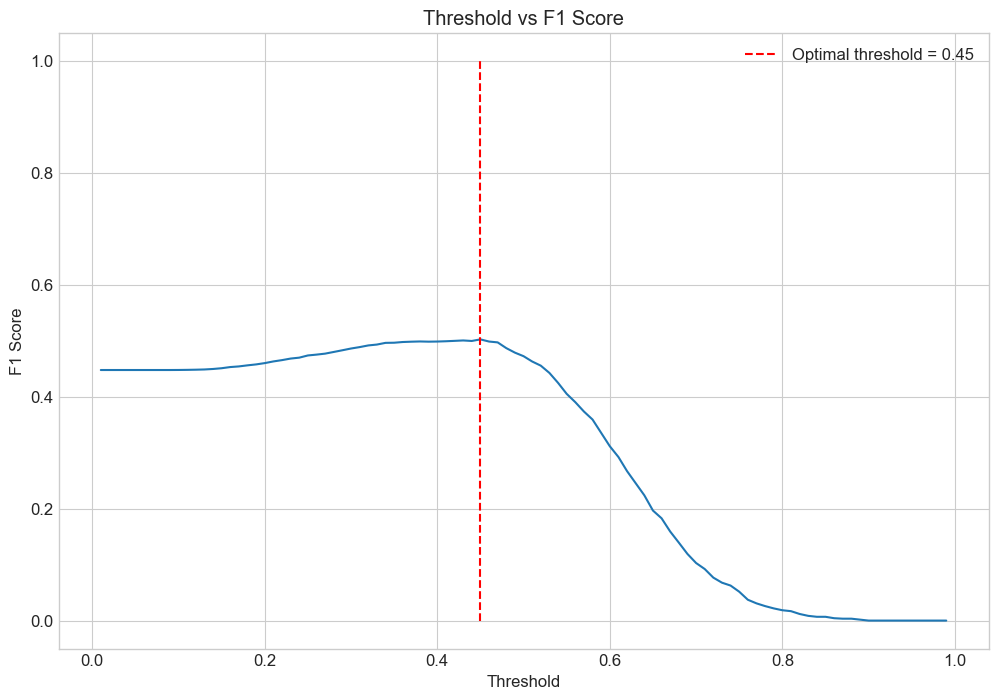

2025-03-19 21:13:58,293 - training_pipeline - INFO - Evaluating XGBoost_Churn_Predictor...


2025-03-19 21:13:58,339 - training_pipeline - INFO - Evaluation metrics: {'accuracy': 0.6139813907933399, 'precision': 0.39959788891681325, 'recall': 0.675446049277825, 'f1': 0.502131691141639, 'threshold': 0.45, 'auc': 0.6780684072284431, 'average_precision': 0.45178505697386834}


2025-03-19 21:13:58,340 - training_pipeline - INFO - Performing cross-validation...


2025-03-19 21:13:58,340 - training_pipeline - INFO - Performing 5-fold cross-validation with roc_auc scoring...


2025-03-19 21:13:58,347 - training_pipeline - INFO - Training fold 1/5...


2025-03-19 21:13:58,435 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:13:58,437 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9415}


2025-03-19 21:13:59,961 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


Set scale_pos_weight to 2.0 based on class distribution


2025-03-19 21:14:01,887 - training_pipeline - INFO - Fold 1/5 roc_auc: 0.6906


2025-03-19 21:14:01,889 - training_pipeline - INFO - Training fold 2/5...


2025-03-19 21:14:02,005 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:14:02,006 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9415}


2025-03-19 21:14:03,293 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


Set scale_pos_weight to 2.0 based on class distribution


2025-03-19 21:14:05,341 - training_pipeline - INFO - Fold 2/5 roc_auc: 0.6618


2025-03-19 21:14:05,342 - training_pipeline - INFO - Training fold 3/5...


2025-03-19 21:14:05,458 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:14:05,460 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9416}


2025-03-19 21:14:06,739 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


Set scale_pos_weight to 2.0 based on class distribution


2025-03-19 21:14:08,965 - training_pipeline - INFO - Fold 3/5 roc_auc: 0.6765


2025-03-19 21:14:08,966 - training_pipeline - INFO - Training fold 4/5...


2025-03-19 21:14:09,083 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:14:09,085 - training_pipeline - INFO - Original class distribution: {0: 23255, 1: 9415}


2025-03-19 21:14:10,491 - training_pipeline - INFO - Resampled class distribution: {0: 23255, 1: 11627}


Set scale_pos_weight to 2.000086006708523 based on class distribution


2025-03-19 21:14:12,683 - training_pipeline - INFO - Fold 4/5 roc_auc: 0.6711


2025-03-19 21:14:12,684 - training_pipeline - INFO - Training fold 5/5...


2025-03-19 21:14:12,801 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:14:12,802 - training_pipeline - INFO - Original class distribution: {0: 23255, 1: 9415}


2025-03-19 21:14:14,203 - training_pipeline - INFO - Resampled class distribution: {0: 23255, 1: 11627}


Set scale_pos_weight to 2.000086006708523 based on class distribution


2025-03-19 21:14:16,341 - training_pipeline - INFO - Fold 5/5 roc_auc: 0.6752


2025-03-19 21:14:16,342 - training_pipeline - INFO - Cross-validation results (roc_auc): 0.6750 ± 0.0093


2025-03-19 21:14:16,377 - training_pipeline - INFO - Creating evaluation visualizations...


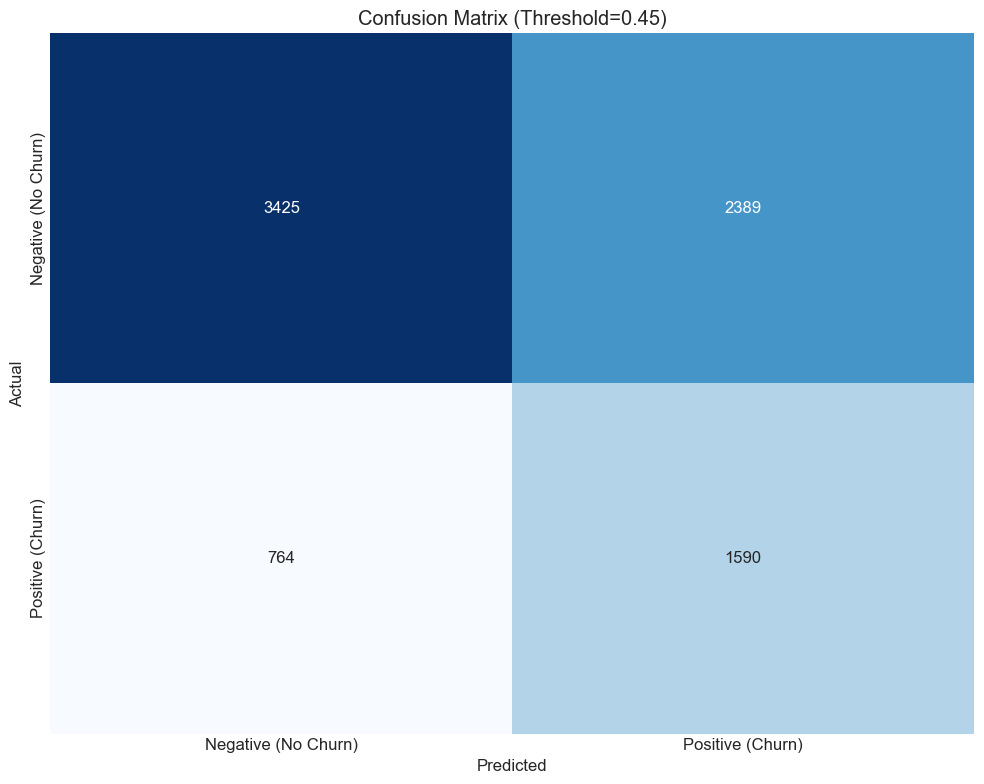

2025-03-19 21:14:16,548 - training_pipeline - INFO - Classification Report:
              precision    recall  f1-score      support
0              0.817618  0.589095  0.684795  5814.000000
1              0.399598  0.675446  0.502132  2354.000000
accuracy       0.613981  0.613981  0.613981     0.613981
macro avg      0.608608  0.632271  0.593463  8168.000000
weighted avg   0.697145  0.613981  0.632152  8168.000000


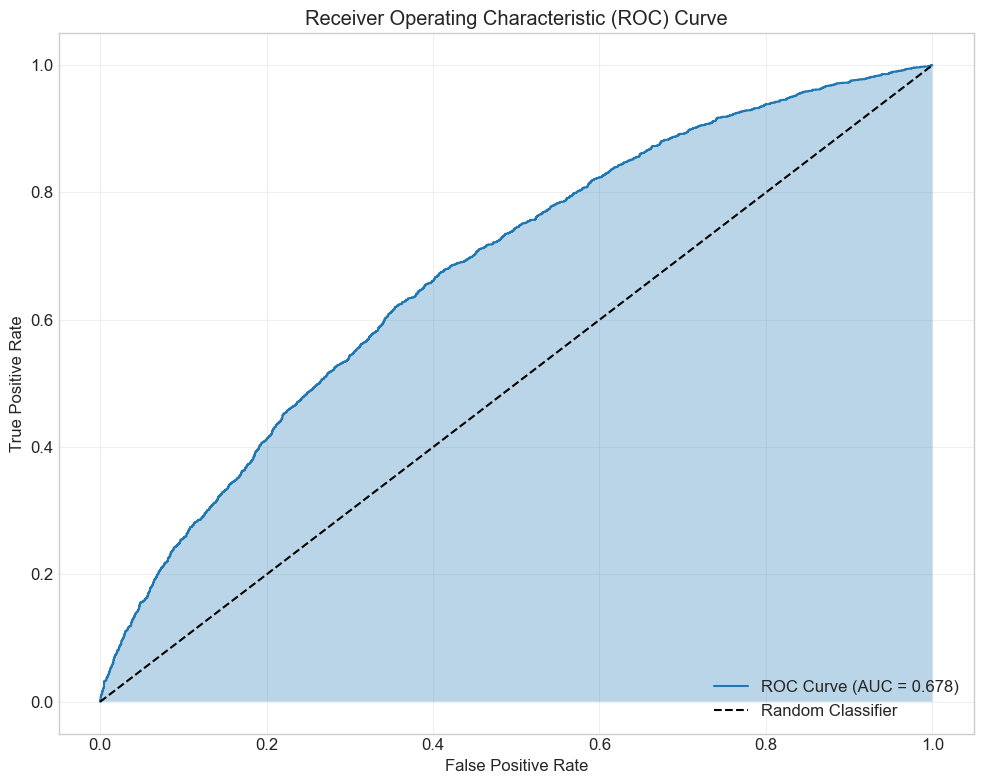

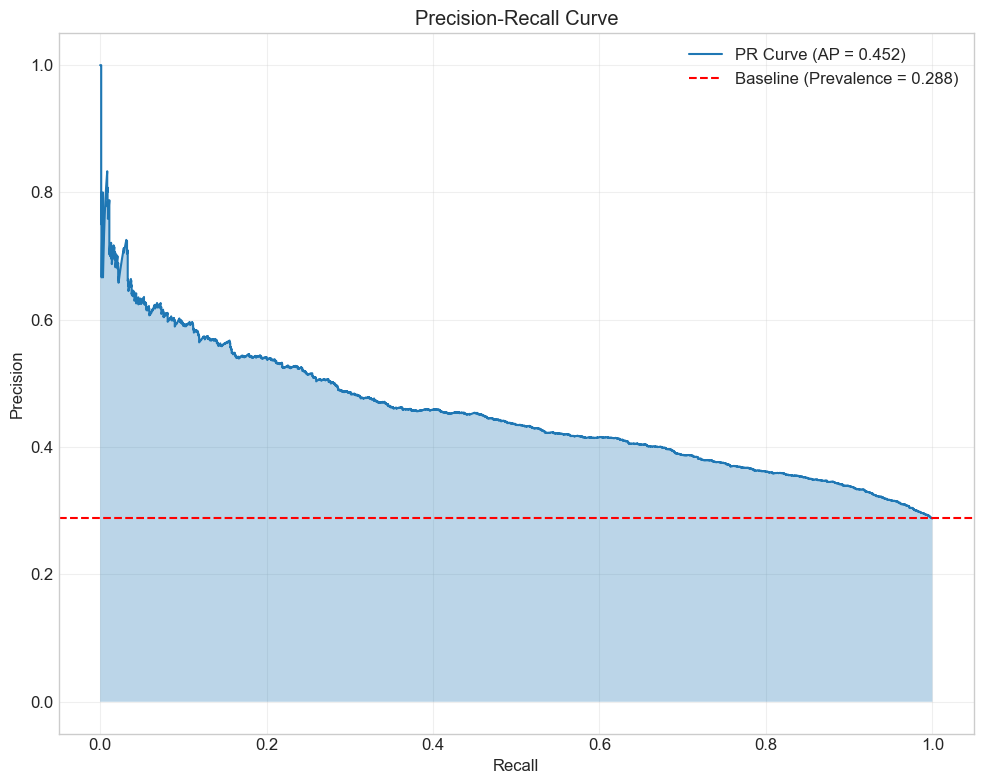

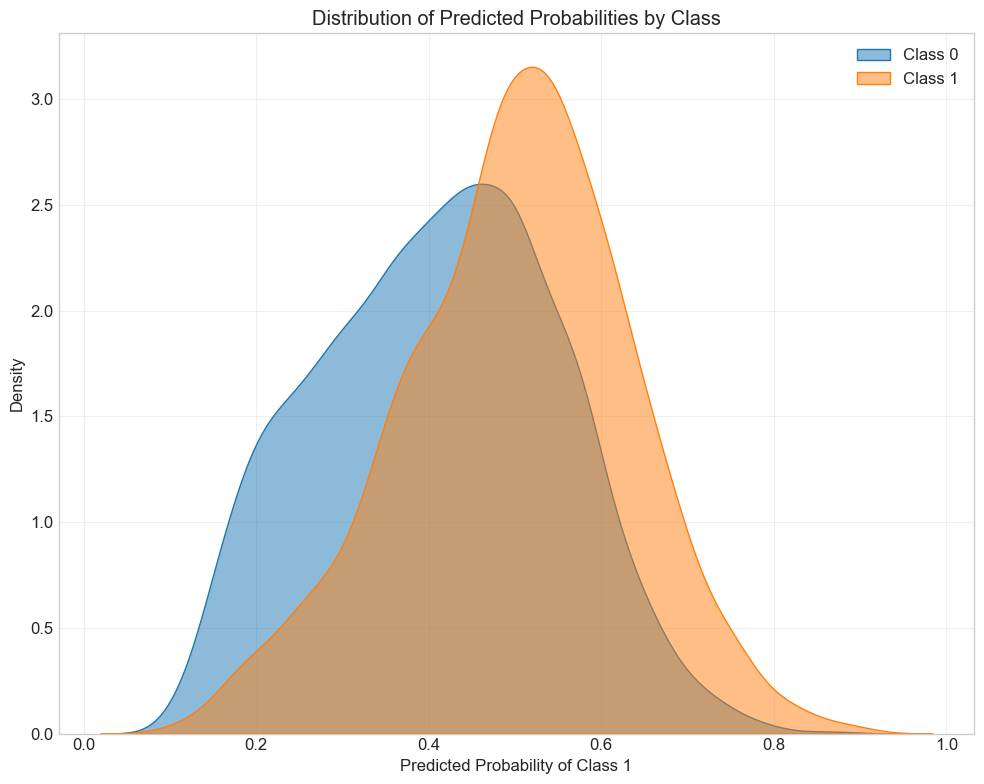

2025-03-19 21:14:17,244 - training_pipeline - INFO - Plotting feature importance...


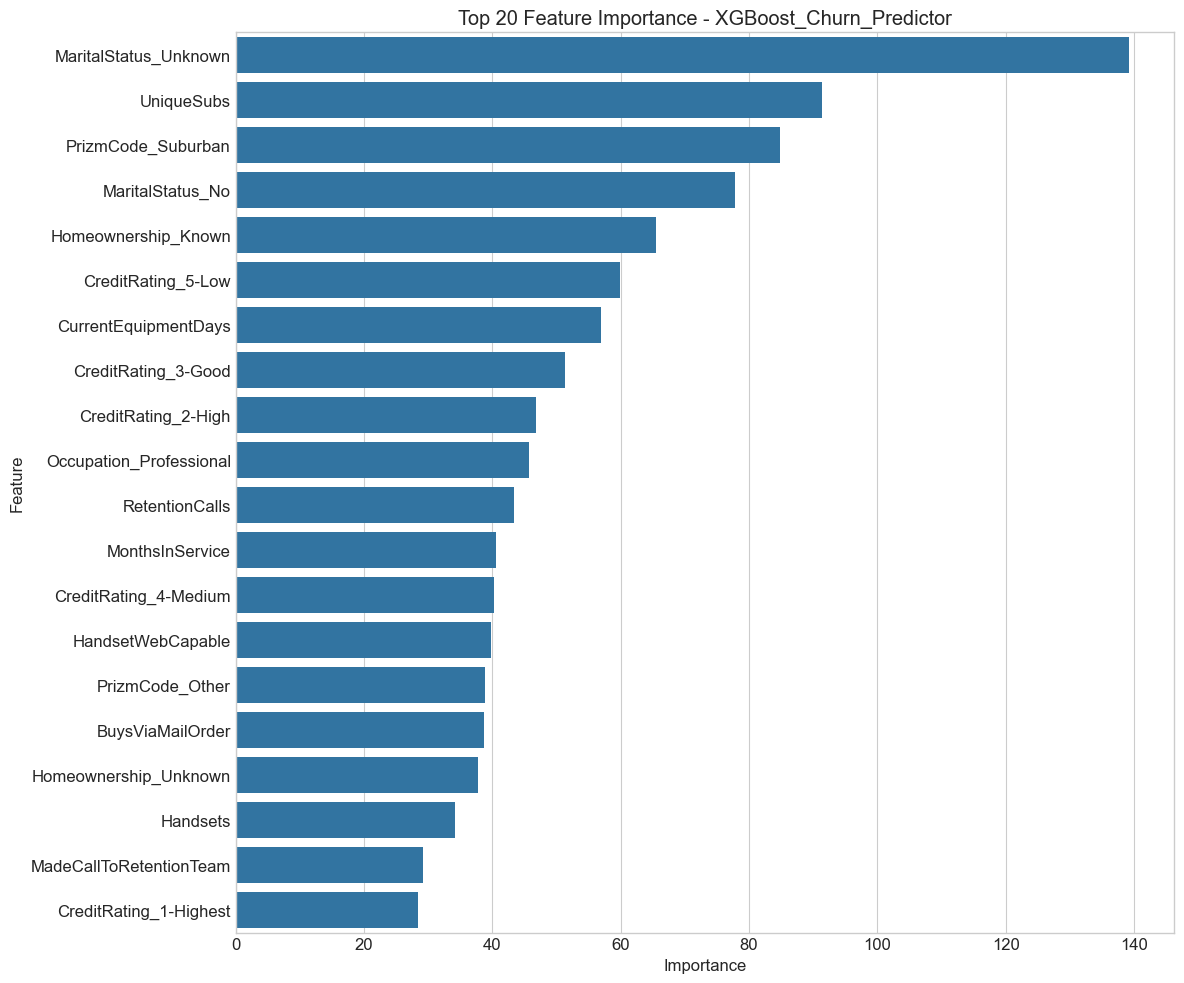

2025-03-19 21:14:17,517 - training_pipeline - INFO - Saving model...


2025-03-19 21:14:17,526 - training_pipeline - INFO - Saving training history...


2025-03-19 21:14:17,528 - training_pipeline - INFO - Training history saved to models\XGBoost_Churn_Predictor_history_20250319_211417.joblib


2025-03-19 21:14:17,529 - training_pipeline - INFO - Training pipeline completed in 23.53 seconds


Model saved to models\XGBoost_Churn_Predictor.joblib


In [5]:
# Run the training pipeline for XGBoost
xgb_results = xgb_trainer.run_training_pipeline(
    X_train, y_train,
    tune_hyperparameters=False,
    tune_threshold=True,
    cross_validate=True,
    cv=5,
    save_model=True,
    save_history=True,
    plot_cm=True,
    plot_roc=True,
    plot_pr=True,
    plot_prob_dist=True,
    plot_importance=True,
    importance_top_n=20,
    threshold_metric='f1'
)

## 5. Train and Evaluate LightGBM Model

2025-03-19 21:14:17,570 - training_pipeline - INFO - Starting training pipeline for LightGBM_Churn_Predictor...


2025-03-19 21:14:17,570 - training_pipeline - INFO - Splitting data into train and test sets...


2025-03-19 21:14:17,782 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:14:17,783 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9415}


2025-03-19 21:14:19,261 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


2025-03-19 21:14:19,271 - training_pipeline - INFO - Training the model...


2025-03-19 21:14:19,273 - training_pipeline - INFO - Training LightGBM_Churn_Predictor...


[LightGBM] [Info] Number of positive: 11627, number of negative: 23254
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13856
[LightGBM] [Info] Number of data points in the train set: 34881, number of used features: 352
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147


2025-03-19 21:14:20,007 - training_pipeline - INFO - Training completed in 0.73 seconds


2025-03-19 21:14:20,008 - training_pipeline - INFO - Evaluating on test set...


2025-03-19 21:14:20,008 - training_pipeline - INFO - Evaluating LightGBM_Churn_Predictor...


2025-03-19 21:14:20,064 - training_pipeline - INFO - Evaluation metrics: {'accuracy': 0.7226983349657199, 'precision': 0.5831775700934579, 'recall': 0.13254035683942225, 'f1': 0.21599169262720663, 'threshold': 0.5, 'auc': 0.6801397704366369, 'average_precision': 0.456916978960133}


2025-03-19 21:14:20,064 - training_pipeline - INFO - Finding optimal threshold...


2025-03-19 21:14:20,065 - training_pipeline - INFO - Finding optimal threshold for f1 score...


2025-03-19 21:14:20,393 - training_pipeline - INFO - Optimal threshold: 0.25 with f1 = 0.5043


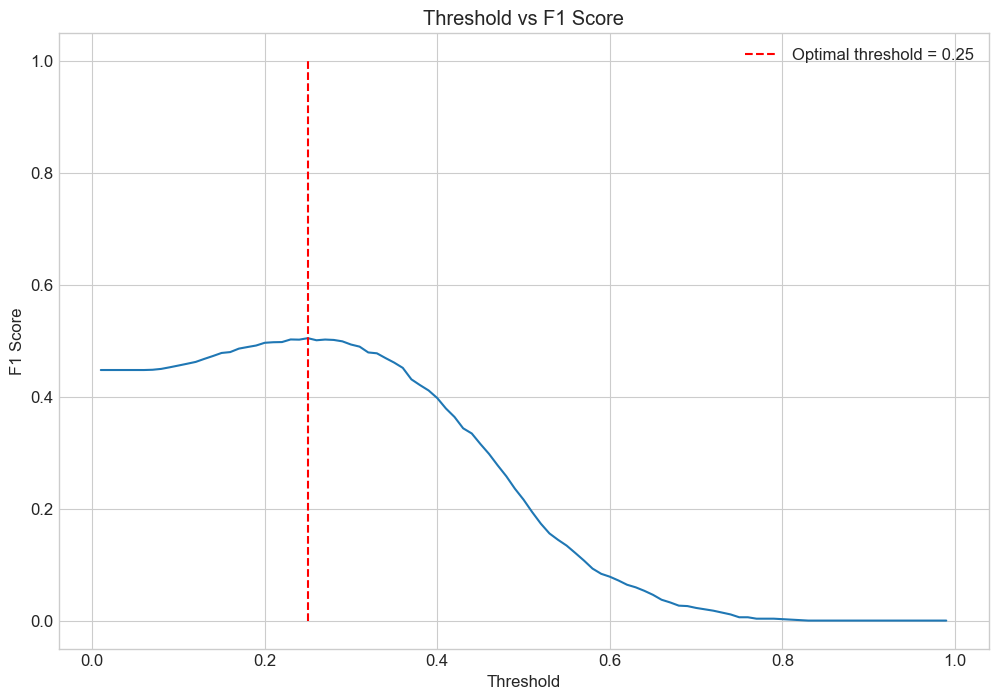

2025-03-19 21:14:20,517 - training_pipeline - INFO - Evaluating LightGBM_Churn_Predictor...


2025-03-19 21:14:20,568 - training_pipeline - INFO - Evaluation metrics: {'accuracy': 0.557664054848188, 'precision': 0.37244174265450863, 'recall': 0.7807986406117248, 'f1': 0.5043215804637124, 'threshold': 0.25, 'auc': 0.6801397704366369, 'average_precision': 0.456916978960133}


2025-03-19 21:14:20,568 - training_pipeline - INFO - Performing cross-validation...


2025-03-19 21:14:20,569 - training_pipeline - INFO - Performing 5-fold cross-validation with roc_auc scoring...


2025-03-19 21:14:20,575 - training_pipeline - INFO - Training fold 1/5...


2025-03-19 21:14:20,657 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:14:20,658 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9415}


2025-03-19 21:14:21,987 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


[LightGBM] [Info] Number of positive: 11627, number of negative: 23254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13864
[LightGBM] [Info] Number of data points in the train set: 34881, number of used features: 354
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

2025-03-19 21:14:22,639 - training_pipeline - INFO - Fold 1/5 roc_auc: 0.6914


2025-03-19 21:14:22,640 - training_pipeline - INFO - Training fold 2/5...


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

2025-03-19 21:14:22,757 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:14:22,758 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9415}


2025-03-19 21:14:24,107 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


[LightGBM] [Info] Number of positive: 11627, number of negative: 23254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13841
[LightGBM] [Info] Number of data points in the train set: 34881, number of used features: 359
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

2025-03-19 21:14:24,754 - training_pipeline - INFO - Fold 2/5 roc_auc: 0.6657


2025-03-19 21:14:24,756 - training_pipeline - INFO - Training fold 3/5...


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

2025-03-19 21:14:24,874 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:14:24,876 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9416}


2025-03-19 21:14:26,250 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


[LightGBM] [Info] Number of positive: 11627, number of negative: 23254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13852
[LightGBM] [Info] Number of data points in the train set: 34881, number of used features: 356
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

2025-03-19 21:14:26,898 - training_pipeline - INFO - Fold 3/5 roc_auc: 0.6786


2025-03-19 21:14:26,900 - training_pipeline - INFO - Training fold 4/5...


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

2025-03-19 21:14:27,015 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:14:27,017 - training_pipeline - INFO - Original class distribution: {0: 23255, 1: 9415}


2025-03-19 21:14:28,317 - training_pipeline - INFO - Resampled class distribution: {0: 23255, 1: 11627}


[LightGBM] [Info] Number of positive: 11627, number of negative: 23255
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13892
[LightGBM] [Info] Number of data points in the train set: 34882, number of used features: 359
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333324 -> initscore=-0.693190
[LightGBM] [Info] Start training from score -0.693190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

2025-03-19 21:14:28,981 - training_pipeline - INFO - Fold 4/5 roc_auc: 0.6712


2025-03-19 21:14:28,982 - training_pipeline - INFO - Training fold 5/5...


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

2025-03-19 21:14:29,097 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:14:29,098 - training_pipeline - INFO - Original class distribution: {0: 23255, 1: 9415}


2025-03-19 21:14:30,413 - training_pipeline - INFO - Resampled class distribution: {0: 23255, 1: 11627}


[LightGBM] [Info] Number of positive: 11627, number of negative: 23255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13846
[LightGBM] [Info] Number of data points in the train set: 34882, number of used features: 358
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333324 -> initscore=-0.693190
[LightGBM] [Info] Start training from score -0.693190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

2025-03-19 21:14:31,066 - training_pipeline - INFO - Fold 5/5 roc_auc: 0.6738


2025-03-19 21:14:31,067 - training_pipeline - INFO - Cross-validation results (roc_auc): 0.6761 ± 0.0087


2025-03-19 21:14:31,092 - training_pipeline - INFO - Creating evaluation visualizations...


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

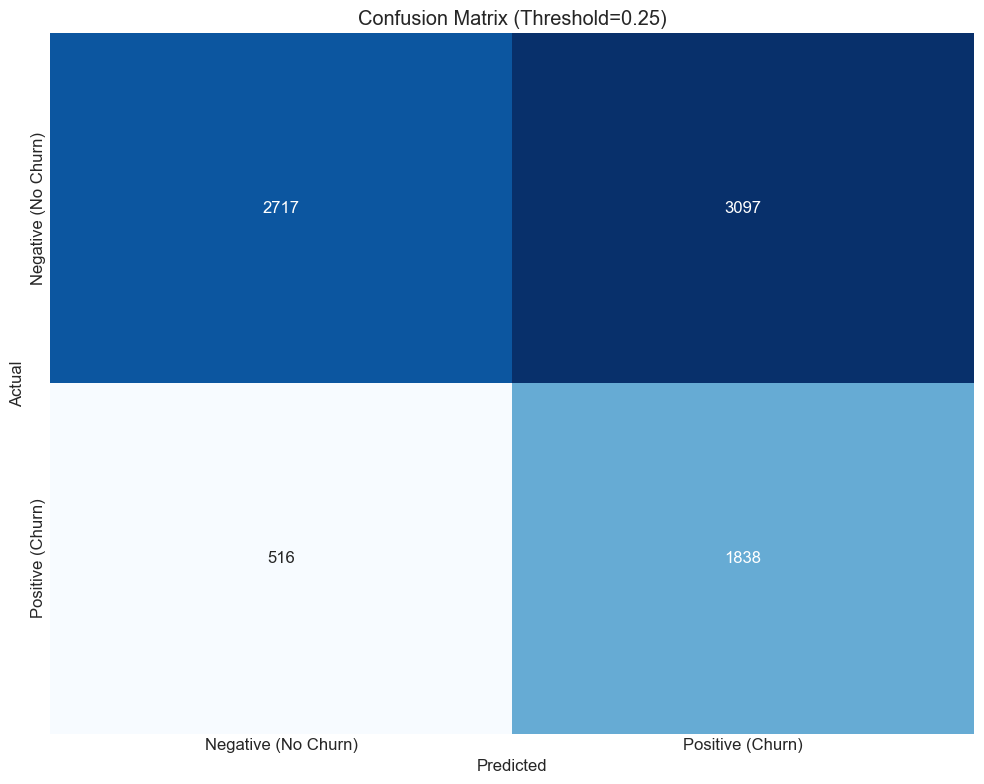

2025-03-19 21:14:31,257 - training_pipeline - INFO - Classification Report:
              precision    recall  f1-score      support
0              0.840396  0.467320  0.600641  5814.000000
1              0.372442  0.780799  0.504322  2354.000000
accuracy       0.557664  0.557664  0.557664     0.557664
macro avg      0.606419  0.624059  0.552481  8168.000000
weighted avg   0.705533  0.557664  0.572882  8168.000000


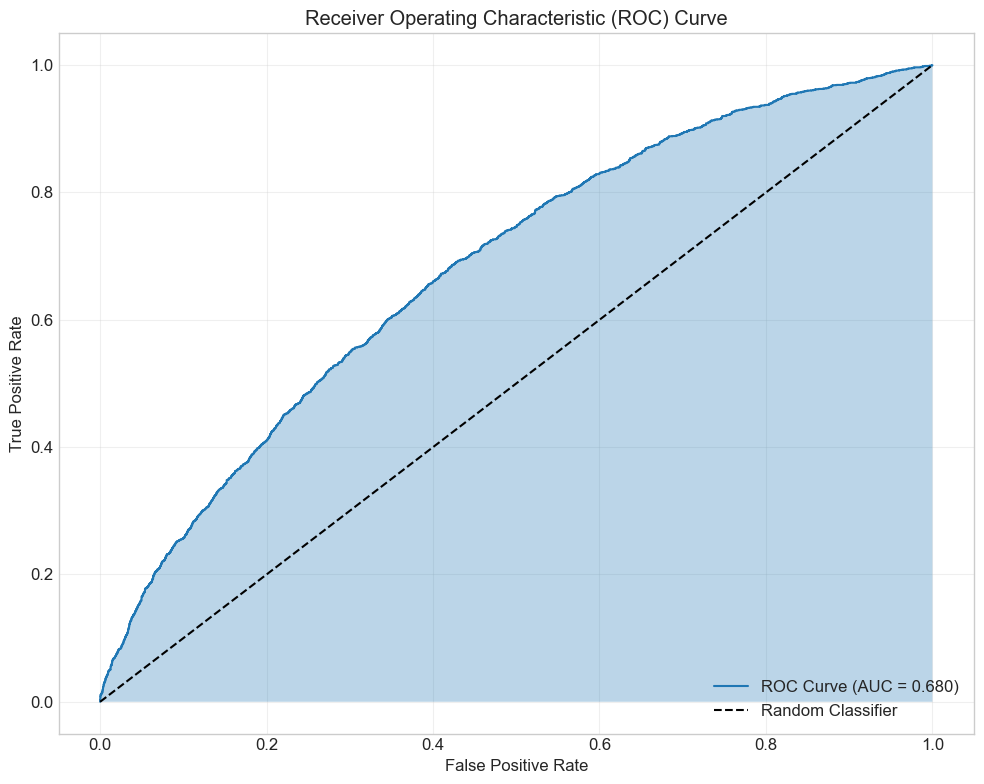

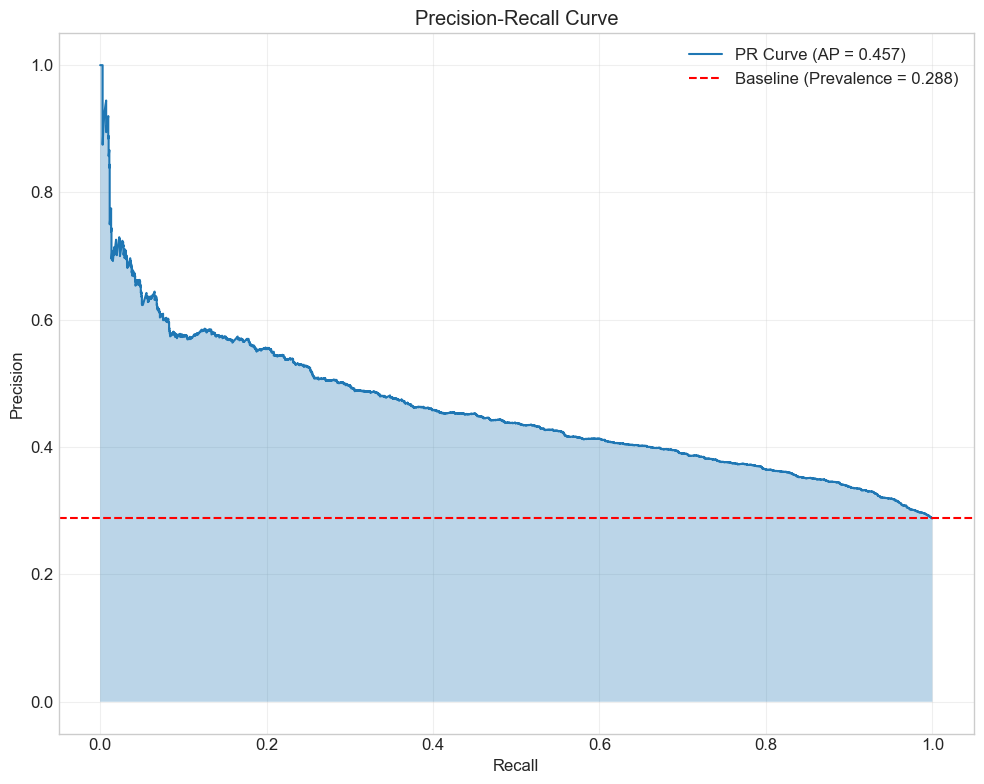

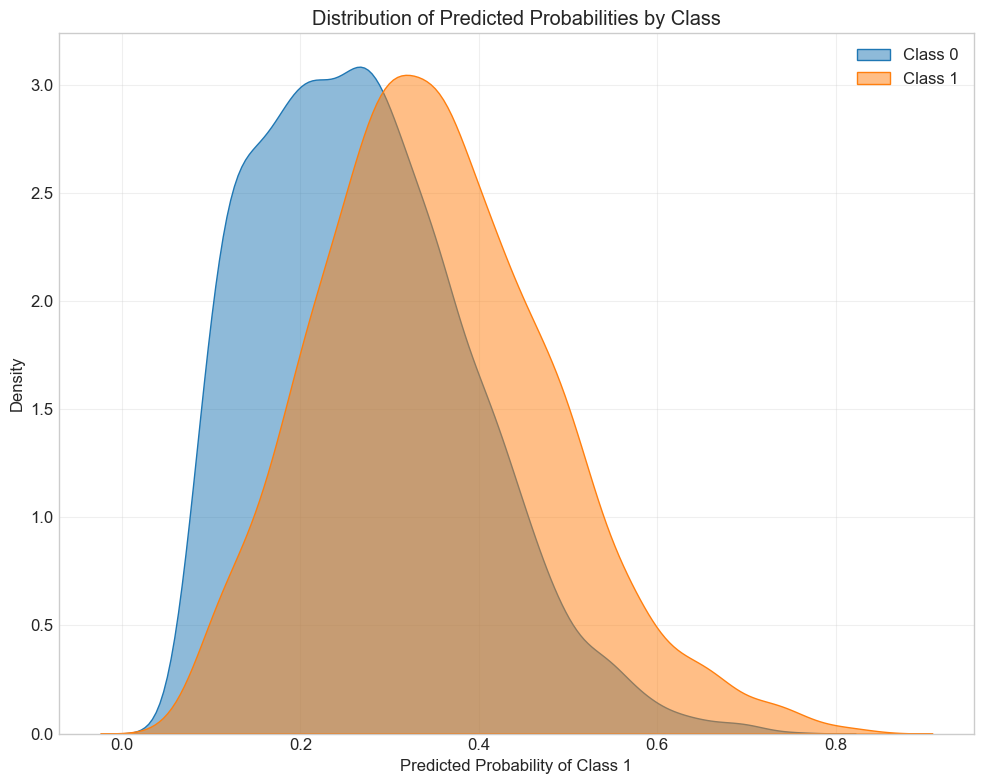

2025-03-19 21:14:31,937 - training_pipeline - INFO - Plotting feature importance...


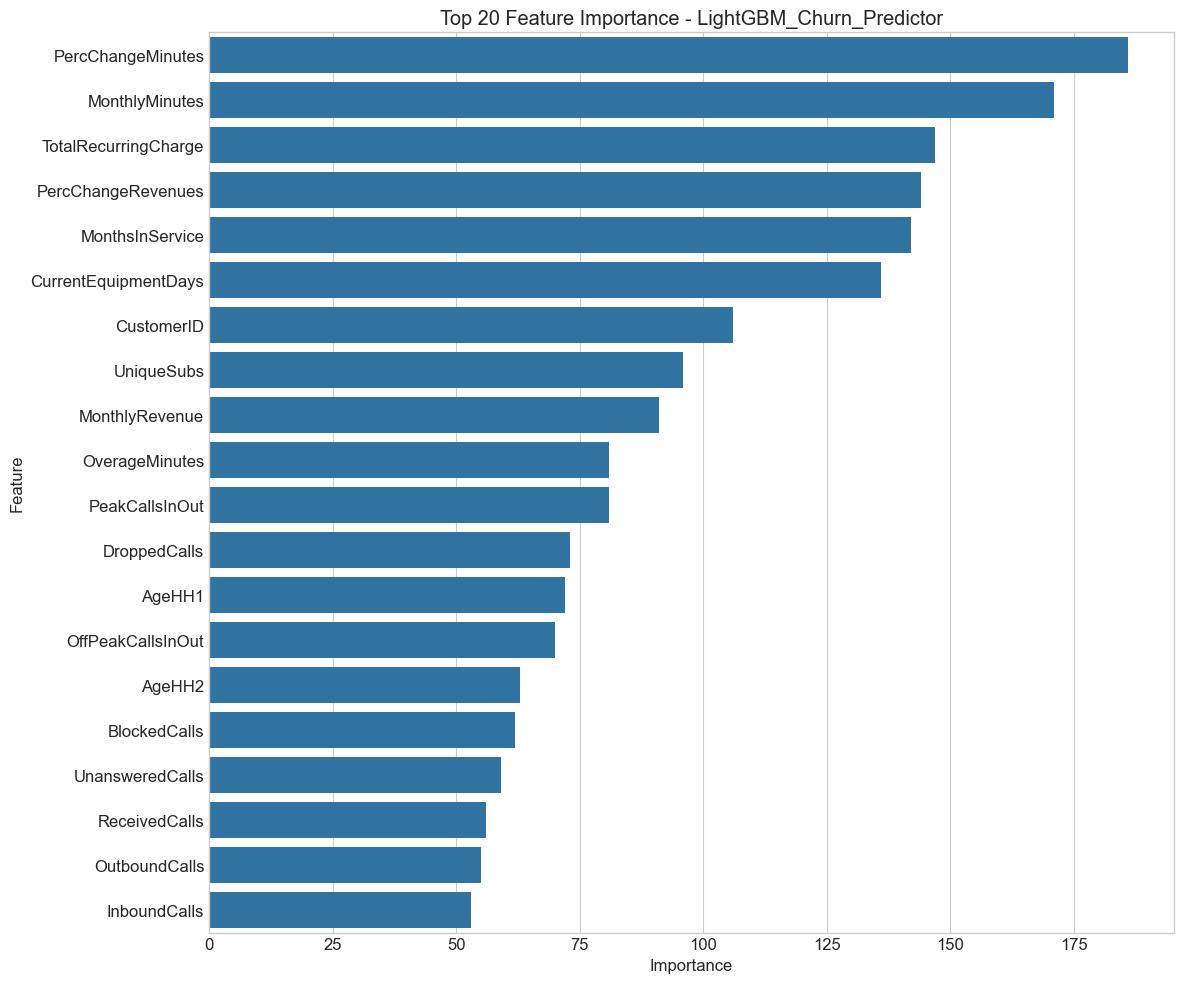

2025-03-19 21:14:32,378 - training_pipeline - INFO - Saving model...


2025-03-19 21:14:32,388 - training_pipeline - INFO - Saving training history...


2025-03-19 21:14:32,389 - training_pipeline - INFO - Training history saved to models\LightGBM_Churn_Predictor_history_20250319_211432.joblib


2025-03-19 21:14:32,390 - training_pipeline - INFO - Training pipeline completed in 14.82 seconds


Model saved to models\LightGBM_Churn_Predictor.joblib


In [6]:
# Run the training pipeline for LightGBM
lgb_results = lgb_trainer.run_training_pipeline(
    X_train, y_train,
    tune_hyperparameters=False,
    tune_threshold=True,
    cross_validate=True,
    cv=5,
    save_model=True,
    save_history=True,
    plot_cm=True,
    plot_roc=True,
    plot_pr=True,
    plot_prob_dist=True,
    plot_importance=True,
    importance_top_n=20,
    threshold_metric='f1'
)

## 6. Train and Evaluate Neural Network Model

2025-03-19 21:14:32,432 - training_pipeline - INFO - Starting training pipeline for NeuralNetwork_Churn_Predictor...


2025-03-19 21:14:32,432 - training_pipeline - INFO - Splitting data into train and test sets...


2025-03-19 21:14:32,638 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:14:32,639 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9415}


2025-03-19 21:14:33,947 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


2025-03-19 21:14:33,957 - training_pipeline - INFO - Training the model...


2025-03-19 21:14:33,958 - training_pipeline - INFO - Training NeuralNetwork_Churn_Predictor...


Epoch 1/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11:20 2s/step - accuracy: 0.3281 - auc: 0.5070 - loss: 0.8629 - precision: 0.2857 - recall: 0.8421

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4248 - auc: 0.5019 - loss: 0.8043 - precision: 0.2775 - recall: 0.6642  

 65/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4854 - auc: 0.5031 - loss: 0.7785 - precision: 0.2849 - recall: 0.5453

 99/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5138 - auc: 0.5054 - loss: 0.7634 - precision: 0.2893 - recall: 0.4851

133/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5313 - auc: 0.5076 - loss: 0.7521 - precision: 0.2932 - recall: 0.4492

167/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5436 - auc: 0.5089 - loss: 0.7441 - precision: 0.2966 - recall: 0.4231

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5529 - auc: 0.5096 - loss: 0.7377 - precision: 0.2985 - recall: 0.4033

234/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5605 - auc: 0.5101 - loss: 0.7324 - precision: 0.2995 - recall: 0.3855

268/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5673 - auc: 0.5107 - loss: 0.7281 - precision: 0.3004 - recall: 0.3698

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5733 - auc: 0.5111 - loss: 0.7245 - precision: 0.3010 - recall: 0.3554

336/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5786 - auc: 0.5113 - loss: 0.7213 - precision: 0.3012 - recall: 0.3422

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5835 - auc: 0.5114 - loss: 0.7186 - precision: 0.3015 - recall: 0.3305

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5881 - auc: 0.5116 - loss: 0.7160 - precision: 0.3017 - recall: 0.3194

436/436 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5924 - auc: 0.5117 - loss: 0.7137 - precision: 0.3018 - recall: 0.3091 - val_accuracy: 0.4776 - val_auc: 0.5672 - val_loss: 0.6978 - val_precision: 0.4667 - val_recall: 0.0019 - learning_rate: 0.0010


Epoch 2/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6875 - auc: 0.5585 - loss: 0.6720 - precision: 0.3333 - recall: 0.0526

 36/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7070 - auc: 0.5187 - loss: 0.6571 - precision: 0.2334 - recall: 0.0262 

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7069 - auc: 0.5300 - loss: 0.6591 - precision: 0.2913 - recall: 0.0334

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7060 - auc: 0.5335 - loss: 0.6608 - precision: 0.3221 - recall: 0.0385

134/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7048 - auc: 0.5343 - loss: 0.6620 - precision: 0.3347 - recall: 0.0405

168/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7034 - auc: 0.5346 - loss: 0.6632 - precision: 0.3426 - recall: 0.0419

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7026 - auc: 0.5346 - loss: 0.6636 - precision: 0.3459 - recall: 0.0430

234/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7018 - auc: 0.5348 - loss: 0.6639 - precision: 0.3459 - recall: 0.0436

267/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7013 - auc: 0.5347 - loss: 0.6642 - precision: 0.3460 - recall: 0.0442

300/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7008 - auc: 0.5345 - loss: 0.6644 - precision: 0.3455 - recall: 0.0448

334/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7004 - auc: 0.5343 - loss: 0.6646 - precision: 0.3450 - recall: 0.0453

368/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7002 - auc: 0.5342 - loss: 0.6646 - precision: 0.3447 - recall: 0.0455

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7001 - auc: 0.5339 - loss: 0.6646 - precision: 0.3441 - recall: 0.0456

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7002 - auc: 0.5338 - loss: 0.6645 - precision: 0.3433 - recall: 0.0455

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7002 - auc: 0.5338 - loss: 0.6645 - precision: 0.3433 - recall: 0.0455 - val_accuracy: 0.4787 - val_auc: 0.5874 - val_loss: 0.6989 - val_precision: 0.7059 - val_recall: 0.0033 - learning_rate: 0.0010


Epoch 3/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7188 - auc: 0.5942 - loss: 0.6478 - precision: 1.0000 - recall: 0.0526

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7166 - auc: 0.5209 - loss: 0.6574 - precision: 0.3606 - recall: 0.0246  

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7104 - auc: 0.5250 - loss: 0.6595 - precision: 0.2972 - recall: 0.0219

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7077 - auc: 0.5277 - loss: 0.6608 - precision: 0.2933 - recall: 0.0226

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7058 - auc: 0.5305 - loss: 0.6617 - precision: 0.2956 - recall: 0.0235

168/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7043 - auc: 0.5329 - loss: 0.6625 - precision: 0.3004 - recall: 0.0245

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7034 - auc: 0.5338 - loss: 0.6628 - precision: 0.3018 - recall: 0.0252

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7028 - auc: 0.5348 - loss: 0.6630 - precision: 0.3035 - recall: 0.0259

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7022 - auc: 0.5354 - loss: 0.6631 - precision: 0.3032 - recall: 0.0265

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7018 - auc: 0.5362 - loss: 0.6632 - precision: 0.3037 - recall: 0.0270

335/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7016 - auc: 0.5370 - loss: 0.6632 - precision: 0.3047 - recall: 0.0276

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7014 - auc: 0.5378 - loss: 0.6631 - precision: 0.3059 - recall: 0.0281

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7014 - auc: 0.5384 - loss: 0.6630 - precision: 0.3067 - recall: 0.0285

434/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7015 - auc: 0.5391 - loss: 0.6627 - precision: 0.3078 - recall: 0.0290

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7015 - auc: 0.5392 - loss: 0.6627 - precision: 0.3079 - recall: 0.0290 - val_accuracy: 0.4801 - val_auc: 0.6182 - val_loss: 0.6959 - val_precision: 0.8696 - val_recall: 0.0055 - learning_rate: 0.0010


Epoch 4/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7188 - auc: 0.5778 - loss: 0.6654 - precision: 1.0000 - recall: 0.0526

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7141 - auc: 0.5837 - loss: 0.6468 - precision: 0.3799 - recall: 0.0424 

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7105 - auc: 0.5822 - loss: 0.6500 - precision: 0.3751 - recall: 0.0456

103/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - auc: 0.5807 - loss: 0.6524 - precision: 0.3735 - recall: 0.0470

137/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7060 - auc: 0.5802 - loss: 0.6541 - precision: 0.3785 - recall: 0.0504

171/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7042 - auc: 0.5803 - loss: 0.6554 - precision: 0.3839 - recall: 0.0553

205/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7029 - auc: 0.5800 - loss: 0.6560 - precision: 0.3866 - recall: 0.0607

239/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7018 - auc: 0.5797 - loss: 0.6564 - precision: 0.3884 - recall: 0.0659

272/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7010 - auc: 0.5794 - loss: 0.6567 - precision: 0.3898 - recall: 0.0707

305/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7001 - auc: 0.5792 - loss: 0.6569 - precision: 0.3908 - recall: 0.0752

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6995 - auc: 0.5789 - loss: 0.6569 - precision: 0.3914 - recall: 0.0793

371/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6988 - auc: 0.5787 - loss: 0.6570 - precision: 0.3916 - recall: 0.0833

404/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6982 - auc: 0.5787 - loss: 0.6570 - precision: 0.3913 - recall: 0.0864

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6979 - auc: 0.5788 - loss: 0.6569 - precision: 0.3912 - recall: 0.0891 - val_accuracy: 0.4976 - val_auc: 0.6251 - val_loss: 0.6917 - val_precision: 0.7112 - val_recall: 0.0642 - learning_rate: 0.0010


Epoch 5/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7188 - auc: 0.5865 - loss: 0.6577 - precision: 1.0000 - recall: 0.0526

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7166 - auc: 0.6102 - loss: 0.6393 - precision: 0.4697 - recall: 0.1150 

 69/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7121 - auc: 0.6085 - loss: 0.6420 - precision: 0.4629 - recall: 0.1382

103/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7074 - auc: 0.6081 - loss: 0.6437 - precision: 0.4553 - recall: 0.1549

136/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7030 - auc: 0.6072 - loss: 0.6453 - precision: 0.4481 - recall: 0.1658

171/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6990 - auc: 0.6067 - loss: 0.6469 - precision: 0.4421 - recall: 0.1753

204/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6963 - auc: 0.6061 - loss: 0.6478 - precision: 0.4374 - recall: 0.1827

238/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6940 - auc: 0.6054 - loss: 0.6484 - precision: 0.4334 - recall: 0.1885

271/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6924 - auc: 0.6050 - loss: 0.6488 - precision: 0.4303 - recall: 0.1929

304/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6911 - auc: 0.6047 - loss: 0.6491 - precision: 0.4280 - recall: 0.1966

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - auc: 0.6045 - loss: 0.6493 - precision: 0.4258 - recall: 0.1994

368/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6892 - auc: 0.6042 - loss: 0.6495 - precision: 0.4238 - recall: 0.2014

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - auc: 0.6039 - loss: 0.6496 - precision: 0.4218 - recall: 0.2031

435/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - auc: 0.6037 - loss: 0.6495 - precision: 0.4201 - recall: 0.2043

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6879 - auc: 0.6037 - loss: 0.6495 - precision: 0.4200 - recall: 0.2044 - val_accuracy: 0.5170 - val_auc: 0.6318 - val_loss: 0.6855 - val_precision: 0.6798 - val_recall: 0.1422 - learning_rate: 0.0010


Epoch 6/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6562 - auc: 0.6480 - loss: 0.6381 - precision: 0.2857 - recall: 0.1053

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6926 - auc: 0.6079 - loss: 0.6361 - precision: 0.3874 - recall: 0.1913 

 66/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6890 - auc: 0.6106 - loss: 0.6393 - precision: 0.3912 - recall: 0.2009

100/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - auc: 0.6119 - loss: 0.6413 - precision: 0.3936 - recall: 0.2070

132/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6848 - auc: 0.6135 - loss: 0.6423 - precision: 0.3980 - recall: 0.2152

166/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6834 - auc: 0.6152 - loss: 0.6430 - precision: 0.4027 - recall: 0.2254

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6819 - auc: 0.6159 - loss: 0.6434 - precision: 0.4043 - recall: 0.2342

234/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - auc: 0.6165 - loss: 0.6435 - precision: 0.4056 - recall: 0.2414

268/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - auc: 0.6170 - loss: 0.6435 - precision: 0.4065 - recall: 0.2474

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6795 - auc: 0.6175 - loss: 0.6435 - precision: 0.4074 - recall: 0.2527

336/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - auc: 0.6180 - loss: 0.6435 - precision: 0.4080 - recall: 0.2576

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6784 - auc: 0.6183 - loss: 0.6435 - precision: 0.4082 - recall: 0.2614

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - auc: 0.6185 - loss: 0.6435 - precision: 0.4080 - recall: 0.2644

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - auc: 0.6186 - loss: 0.6434 - precision: 0.4077 - recall: 0.2666

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6776 - auc: 0.6186 - loss: 0.6434 - precision: 0.4077 - recall: 0.2666 - val_accuracy: 0.5290 - val_auc: 0.6348 - val_loss: 0.6842 - val_precision: 0.6598 - val_recall: 0.2028 - learning_rate: 0.0010


Epoch 7/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6406 - auc: 0.5936 - loss: 0.6292 - precision: 0.3333 - recall: 0.2105

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - auc: 0.6287 - loss: 0.6299 - precision: 0.4141 - recall: 0.2416 

 70/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6939 - auc: 0.6287 - loss: 0.6325 - precision: 0.4240 - recall: 0.2565

104/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6911 - auc: 0.6293 - loss: 0.6342 - precision: 0.4250 - recall: 0.2633

138/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6885 - auc: 0.6290 - loss: 0.6358 - precision: 0.4248 - recall: 0.2673

170/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - auc: 0.6290 - loss: 0.6372 - precision: 0.4251 - recall: 0.2718

204/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6848 - auc: 0.6285 - loss: 0.6380 - precision: 0.4243 - recall: 0.2762

236/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6837 - auc: 0.6285 - loss: 0.6384 - precision: 0.4240 - recall: 0.2798

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6829 - auc: 0.6286 - loss: 0.6387 - precision: 0.4237 - recall: 0.2830

303/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6823 - auc: 0.6288 - loss: 0.6389 - precision: 0.4237 - recall: 0.2860

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6817 - auc: 0.6290 - loss: 0.6390 - precision: 0.4234 - recall: 0.2888

371/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - auc: 0.6289 - loss: 0.6392 - precision: 0.4231 - recall: 0.2912

404/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - auc: 0.6288 - loss: 0.6393 - precision: 0.4227 - recall: 0.2929

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6807 - auc: 0.6288 - loss: 0.6393 - precision: 0.4223 - recall: 0.2942 - val_accuracy: 0.5409 - val_auc: 0.6305 - val_loss: 0.6855 - val_precision: 0.6513 - val_recall: 0.2604 - learning_rate: 0.0010


Epoch 8/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6562 - auc: 0.6614 - loss: 0.6289 - precision: 0.3846 - recall: 0.2632

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7012 - auc: 0.6414 - loss: 0.6294 - precision: 0.4456 - recall: 0.3185  

 69/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6977 - auc: 0.6415 - loss: 0.6311 - precision: 0.4461 - recall: 0.3242

102/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6945 - auc: 0.6401 - loss: 0.6328 - precision: 0.4450 - recall: 0.3274

137/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6920 - auc: 0.6394 - loss: 0.6341 - precision: 0.4448 - recall: 0.3310

171/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6897 - auc: 0.6393 - loss: 0.6349 - precision: 0.4443 - recall: 0.3358

204/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6876 - auc: 0.6389 - loss: 0.6353 - precision: 0.4425 - recall: 0.3395

236/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - auc: 0.6388 - loss: 0.6355 - precision: 0.4412 - recall: 0.3424

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6849 - auc: 0.6388 - loss: 0.6356 - precision: 0.4397 - recall: 0.3445

301/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6839 - auc: 0.6388 - loss: 0.6356 - precision: 0.4385 - recall: 0.3458

335/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - auc: 0.6388 - loss: 0.6356 - precision: 0.4373 - recall: 0.3469

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - auc: 0.6388 - loss: 0.6356 - precision: 0.4362 - recall: 0.3476

404/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6817 - auc: 0.6387 - loss: 0.6356 - precision: 0.4352 - recall: 0.3481

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6814 - auc: 0.6388 - loss: 0.6354 - precision: 0.4344 - recall: 0.3484 - val_accuracy: 0.5396 - val_auc: 0.6315 - val_loss: 0.6863 - val_precision: 0.6430 - val_recall: 0.2665 - learning_rate: 0.0010


Epoch 9/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6406 - auc: 0.5924 - loss: 0.6551 - precision: 0.3333 - recall: 0.2105

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - auc: 0.6425 - loss: 0.6342 - precision: 0.4050 - recall: 0.3039  

 66/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6829 - auc: 0.6442 - loss: 0.6327 - precision: 0.4122 - recall: 0.3138

 99/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - auc: 0.6456 - loss: 0.6323 - precision: 0.4164 - recall: 0.3228

132/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6799 - auc: 0.6459 - loss: 0.6326 - precision: 0.4189 - recall: 0.3287

165/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6785 - auc: 0.6461 - loss: 0.6332 - precision: 0.4212 - recall: 0.3359

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - auc: 0.6461 - loss: 0.6333 - precision: 0.4220 - recall: 0.3425

234/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - auc: 0.6459 - loss: 0.6335 - precision: 0.4221 - recall: 0.3473

267/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - auc: 0.6458 - loss: 0.6335 - precision: 0.4221 - recall: 0.3511

300/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - auc: 0.6458 - loss: 0.6335 - precision: 0.4225 - recall: 0.3544

334/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6744 - auc: 0.6459 - loss: 0.6335 - precision: 0.4226 - recall: 0.3576

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - auc: 0.6459 - loss: 0.6335 - precision: 0.4227 - recall: 0.3600

400/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6738 - auc: 0.6459 - loss: 0.6334 - precision: 0.4227 - recall: 0.3619

432/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6738 - auc: 0.6459 - loss: 0.6333 - precision: 0.4227 - recall: 0.3634

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6738 - auc: 0.6459 - loss: 0.6332 - precision: 0.4227 - recall: 0.3637 - val_accuracy: 0.5518 - val_auc: 0.6343 - val_loss: 0.6851 - val_precision: 0.6527 - val_recall: 0.3032 - learning_rate: 0.0010


Epoch 10/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5625 - auc: 0.5573 - loss: 0.6692 - precision: 0.2632 - recall: 0.2632

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6849 - auc: 0.6449 - loss: 0.6240 - precision: 0.4158 - recall: 0.3259 

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - auc: 0.6450 - loss: 0.6265 - precision: 0.4217 - recall: 0.3275

100/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6850 - auc: 0.6464 - loss: 0.6279 - precision: 0.4272 - recall: 0.3325

134/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - auc: 0.6480 - loss: 0.6286 - precision: 0.4311 - recall: 0.3405

167/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - auc: 0.6496 - loss: 0.6292 - precision: 0.4341 - recall: 0.3493

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - auc: 0.6503 - loss: 0.6294 - precision: 0.4353 - recall: 0.3573

233/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6817 - auc: 0.6506 - loss: 0.6296 - precision: 0.4353 - recall: 0.3632

266/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6807 - auc: 0.6507 - loss: 0.6298 - precision: 0.4349 - recall: 0.3681

299/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6799 - auc: 0.6509 - loss: 0.6299 - precision: 0.4347 - recall: 0.3720

333/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - auc: 0.6510 - loss: 0.6299 - precision: 0.4342 - recall: 0.3749

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6785 - auc: 0.6510 - loss: 0.6300 - precision: 0.4336 - recall: 0.3771

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6780 - auc: 0.6511 - loss: 0.6299 - precision: 0.4330 - recall: 0.3788

433/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - auc: 0.6512 - loss: 0.6298 - precision: 0.4324 - recall: 0.3799

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6776 - auc: 0.6512 - loss: 0.6297 - precision: 0.4323 - recall: 0.3800 - val_accuracy: 0.5488 - val_auc: 0.6325 - val_loss: 0.6867 - val_precision: 0.6452 - val_recall: 0.3024 - learning_rate: 0.0010


Epoch 11/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5938 - auc: 0.5842 - loss: 0.6423 - precision: 0.2667 - recall: 0.2105

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - auc: 0.6716 - loss: 0.6154 - precision: 0.4187 - recall: 0.3351 

 69/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6889 - auc: 0.6694 - loss: 0.6193 - precision: 0.4319 - recall: 0.3498

103/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6878 - auc: 0.6675 - loss: 0.6213 - precision: 0.4359 - recall: 0.3574

136/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6863 - auc: 0.6658 - loss: 0.6231 - precision: 0.4378 - recall: 0.3633

170/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - auc: 0.6652 - loss: 0.6241 - precision: 0.4401 - recall: 0.3705

204/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - auc: 0.6644 - loss: 0.6247 - precision: 0.4405 - recall: 0.3764

238/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6833 - auc: 0.6637 - loss: 0.6251 - precision: 0.4407 - recall: 0.3805

272/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - auc: 0.6632 - loss: 0.6254 - precision: 0.4405 - recall: 0.3838

306/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6819 - auc: 0.6628 - loss: 0.6256 - precision: 0.4403 - recall: 0.3862

340/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - auc: 0.6625 - loss: 0.6257 - precision: 0.4398 - recall: 0.3880

375/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6809 - auc: 0.6621 - loss: 0.6258 - precision: 0.4393 - recall: 0.3894

408/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6805 - auc: 0.6619 - loss: 0.6258 - precision: 0.4388 - recall: 0.3905

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6803 - auc: 0.6617 - loss: 0.6257 - precision: 0.4383 - recall: 0.3912 - val_accuracy: 0.5502 - val_auc: 0.6351 - val_loss: 0.6875 - val_precision: 0.6456 - val_recall: 0.3079 - learning_rate: 0.0010


Epoch 12/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6094 - auc: 0.6386 - loss: 0.6444 - precision: 0.2857 - recall: 0.2105

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6860 - auc: 0.6693 - loss: 0.6166 - precision: 0.4189 - recall: 0.3461 

 69/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6907 - auc: 0.6712 - loss: 0.6174 - precision: 0.4369 - recall: 0.3619

104/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6915 - auc: 0.6714 - loss: 0.6186 - precision: 0.4446 - recall: 0.3701

138/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6909 - auc: 0.6708 - loss: 0.6201 - precision: 0.4482 - recall: 0.3761

173/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6900 - auc: 0.6706 - loss: 0.6210 - precision: 0.4505 - recall: 0.3821

206/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6888 - auc: 0.6701 - loss: 0.6214 - precision: 0.4502 - recall: 0.3863

239/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6878 - auc: 0.6697 - loss: 0.6217 - precision: 0.4499 - recall: 0.3897

274/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - auc: 0.6695 - loss: 0.6219 - precision: 0.4496 - recall: 0.3928

308/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - auc: 0.6696 - loss: 0.6219 - precision: 0.4495 - recall: 0.3953

342/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6860 - auc: 0.6696 - loss: 0.6219 - precision: 0.4491 - recall: 0.3974

375/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6855 - auc: 0.6696 - loss: 0.6218 - precision: 0.4487 - recall: 0.3994

409/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - auc: 0.6696 - loss: 0.6217 - precision: 0.4482 - recall: 0.4013

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6849 - auc: 0.6697 - loss: 0.6214 - precision: 0.4478 - recall: 0.4027 - val_accuracy: 0.5664 - val_auc: 0.6375 - val_loss: 0.6866 - val_precision: 0.6444 - val_recall: 0.3790 - learning_rate: 5.0000e-04


Epoch 13/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6406 - auc: 0.6480 - loss: 0.6295 - precision: 0.4000 - recall: 0.4211

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - auc: 0.6783 - loss: 0.6144 - precision: 0.4388 - recall: 0.4484 

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - auc: 0.6754 - loss: 0.6157 - precision: 0.4358 - recall: 0.4466

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - auc: 0.6756 - loss: 0.6161 - precision: 0.4377 - recall: 0.4456

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - auc: 0.6757 - loss: 0.6166 - precision: 0.4401 - recall: 0.4447

168/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - auc: 0.6763 - loss: 0.6169 - precision: 0.4431 - recall: 0.4465

202/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6806 - auc: 0.6763 - loss: 0.6170 - precision: 0.4439 - recall: 0.4479

236/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - auc: 0.6762 - loss: 0.6170 - precision: 0.4441 - recall: 0.4486

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - auc: 0.6761 - loss: 0.6171 - precision: 0.4442 - recall: 0.4493

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - auc: 0.6761 - loss: 0.6171 - precision: 0.4445 - recall: 0.4499

336/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6796 - auc: 0.6761 - loss: 0.6171 - precision: 0.4446 - recall: 0.4504

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6793 - auc: 0.6760 - loss: 0.6171 - precision: 0.4445 - recall: 0.4505

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6793 - auc: 0.6760 - loss: 0.6171 - precision: 0.4443 - recall: 0.4507

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6793 - auc: 0.6761 - loss: 0.6169 - precision: 0.4441 - recall: 0.4507 - val_accuracy: 0.5670 - val_auc: 0.6382 - val_loss: 0.6879 - val_precision: 0.6459 - val_recall: 0.3784 - learning_rate: 5.0000e-04


Epoch 14/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5781 - auc: 0.6462 - loss: 0.6265 - precision: 0.3000 - recall: 0.3158

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - auc: 0.6902 - loss: 0.6043 - precision: 0.4466 - recall: 0.4441 

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6940 - auc: 0.6906 - loss: 0.6057 - precision: 0.4540 - recall: 0.4536

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6919 - auc: 0.6887 - loss: 0.6078 - precision: 0.4548 - recall: 0.4534

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6899 - auc: 0.6870 - loss: 0.6095 - precision: 0.4548 - recall: 0.4540

168/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - auc: 0.6863 - loss: 0.6107 - precision: 0.4555 - recall: 0.4562

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6869 - auc: 0.6853 - loss: 0.6114 - precision: 0.4547 - recall: 0.4579

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - auc: 0.6844 - loss: 0.6120 - precision: 0.4533 - recall: 0.4588

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.6837 - loss: 0.6124 - precision: 0.4522 - recall: 0.4592

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - auc: 0.6834 - loss: 0.6126 - precision: 0.4515 - recall: 0.4595

335/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6829 - auc: 0.6832 - loss: 0.6127 - precision: 0.4509 - recall: 0.4598

368/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - auc: 0.6829 - loss: 0.6128 - precision: 0.4502 - recall: 0.4602

400/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6820 - auc: 0.6827 - loss: 0.6128 - precision: 0.4496 - recall: 0.4605

434/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6817 - auc: 0.6825 - loss: 0.6127 - precision: 0.4490 - recall: 0.4606

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6817 - auc: 0.6825 - loss: 0.6127 - precision: 0.4490 - recall: 0.4606 - val_accuracy: 0.5687 - val_auc: 0.6385 - val_loss: 0.6869 - val_precision: 0.6479 - val_recall: 0.3817 - learning_rate: 5.0000e-04


Epoch 15/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6250 - auc: 0.6468 - loss: 0.6152 - precision: 0.3529 - recall: 0.3158

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6979 - auc: 0.6950 - loss: 0.5947 - precision: 0.4547 - recall: 0.4541 

 66/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - auc: 0.6935 - loss: 0.5990 - precision: 0.4551 - recall: 0.4552

 99/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - auc: 0.6925 - loss: 0.6015 - precision: 0.4541 - recall: 0.4511

130/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - auc: 0.6913 - loss: 0.6035 - precision: 0.4543 - recall: 0.4512

164/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6891 - auc: 0.6911 - loss: 0.6051 - precision: 0.4561 - recall: 0.4546

195/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - auc: 0.6906 - loss: 0.6060 - precision: 0.4564 - recall: 0.4577

225/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6874 - auc: 0.6901 - loss: 0.6067 - precision: 0.4561 - recall: 0.4598

255/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - auc: 0.6897 - loss: 0.6072 - precision: 0.4558 - recall: 0.4618

286/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6863 - auc: 0.6895 - loss: 0.6076 - precision: 0.4558 - recall: 0.4635

318/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6860 - auc: 0.6894 - loss: 0.6079 - precision: 0.4558 - recall: 0.4651

353/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - auc: 0.6893 - loss: 0.6081 - precision: 0.4557 - recall: 0.4668

388/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - auc: 0.6891 - loss: 0.6083 - precision: 0.4554 - recall: 0.4683

421/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - auc: 0.6891 - loss: 0.6084 - precision: 0.4552 - recall: 0.4695

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6852 - auc: 0.6891 - loss: 0.6083 - precision: 0.4551 - recall: 0.4700 - val_accuracy: 0.5669 - val_auc: 0.6377 - val_loss: 0.6891 - val_precision: 0.6398 - val_recall: 0.3905 - learning_rate: 5.0000e-04


Epoch 16/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6406 - auc: 0.6088 - loss: 0.6734 - precision: 0.3750 - recall: 0.3158

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6921 - auc: 0.6810 - loss: 0.6144 - precision: 0.4451 - recall: 0.4523  

 66/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6903 - auc: 0.6834 - loss: 0.6123 - precision: 0.4483 - recall: 0.4611

100/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6892 - auc: 0.6847 - loss: 0.6118 - precision: 0.4513 - recall: 0.4663

132/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - auc: 0.6850 - loss: 0.6121 - precision: 0.4520 - recall: 0.4689

167/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6863 - auc: 0.6855 - loss: 0.6125 - precision: 0.4534 - recall: 0.4730

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - auc: 0.6856 - loss: 0.6126 - precision: 0.4536 - recall: 0.4763

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - auc: 0.6858 - loss: 0.6125 - precision: 0.4536 - recall: 0.4792

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - auc: 0.6859 - loss: 0.6124 - precision: 0.4535 - recall: 0.4808

303/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - auc: 0.6861 - loss: 0.6122 - precision: 0.4534 - recall: 0.4818

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6833 - auc: 0.6863 - loss: 0.6119 - precision: 0.4533 - recall: 0.4827

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - auc: 0.6864 - loss: 0.6117 - precision: 0.4531 - recall: 0.4834

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6827 - auc: 0.6866 - loss: 0.6114 - precision: 0.4527 - recall: 0.4840

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6826 - auc: 0.6868 - loss: 0.6110 - precision: 0.4524 - recall: 0.4843 - val_accuracy: 0.5722 - val_auc: 0.6376 - val_loss: 0.6925 - val_precision: 0.6447 - val_recall: 0.4029 - learning_rate: 5.0000e-04


Epoch 17/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6562 - auc: 0.6620 - loss: 0.6194 - precision: 0.3846 - recall: 0.2632

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - auc: 0.6931 - loss: 0.6006 - precision: 0.4511 - recall: 0.4497  

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - auc: 0.6946 - loss: 0.6030 - precision: 0.4458 - recall: 0.4596

102/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6863 - auc: 0.6953 - loss: 0.6048 - precision: 0.4471 - recall: 0.4641

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - auc: 0.6954 - loss: 0.6059 - precision: 0.4484 - recall: 0.4664

169/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6841 - auc: 0.6959 - loss: 0.6066 - precision: 0.4501 - recall: 0.4698

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6834 - auc: 0.6958 - loss: 0.6069 - precision: 0.4504 - recall: 0.4726

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6827 - auc: 0.6957 - loss: 0.6071 - precision: 0.4506 - recall: 0.4751

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6823 - auc: 0.6956 - loss: 0.6071 - precision: 0.4507 - recall: 0.4776

304/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - auc: 0.6959 - loss: 0.6070 - precision: 0.4513 - recall: 0.4799

336/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6823 - auc: 0.6961 - loss: 0.6068 - precision: 0.4518 - recall: 0.4817

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - auc: 0.6962 - loss: 0.6067 - precision: 0.4522 - recall: 0.4833

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - auc: 0.6962 - loss: 0.6065 - precision: 0.4523 - recall: 0.4846

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6825 - auc: 0.6963 - loss: 0.6061 - precision: 0.4522 - recall: 0.4856 - val_accuracy: 0.5780 - val_auc: 0.6399 - val_loss: 0.6898 - val_precision: 0.6456 - val_recall: 0.4259 - learning_rate: 2.5000e-04


Epoch 18/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6719 - auc: 0.7468 - loss: 0.5671 - precision: 0.4444 - recall: 0.4211

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6933 - auc: 0.7056 - loss: 0.5866 - precision: 0.4517 - recall: 0.5010 

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6915 - auc: 0.7031 - loss: 0.5915 - precision: 0.4543 - recall: 0.5041

100/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - auc: 0.7012 - loss: 0.5947 - precision: 0.4541 - recall: 0.5016

133/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6869 - auc: 0.6993 - loss: 0.5975 - precision: 0.4539 - recall: 0.4998

166/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - auc: 0.6989 - loss: 0.5991 - precision: 0.4556 - recall: 0.5003

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - auc: 0.6984 - loss: 0.6001 - precision: 0.4557 - recall: 0.5009

234/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - auc: 0.6981 - loss: 0.6008 - precision: 0.4556 - recall: 0.5013

267/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.6981 - loss: 0.6010 - precision: 0.4557 - recall: 0.5018

300/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - auc: 0.6983 - loss: 0.6012 - precision: 0.4561 - recall: 0.5025

334/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.6986 - loss: 0.6013 - precision: 0.4565 - recall: 0.5035

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6841 - auc: 0.6988 - loss: 0.6014 - precision: 0.4565 - recall: 0.5044

399/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - auc: 0.6989 - loss: 0.6014 - precision: 0.4564 - recall: 0.5051

433/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - auc: 0.6992 - loss: 0.6012 - precision: 0.4562 - recall: 0.5056

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6840 - auc: 0.6992 - loss: 0.6012 - precision: 0.4562 - recall: 0.5056 - val_accuracy: 0.5780 - val_auc: 0.6413 - val_loss: 0.6900 - val_precision: 0.6439 - val_recall: 0.4297 - learning_rate: 2.5000e-04


Epoch 19/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6094 - auc: 0.6766 - loss: 0.6142 - precision: 0.3333 - recall: 0.3158

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - auc: 0.7022 - loss: 0.5857 - precision: 0.4211 - recall: 0.4662 

 66/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - auc: 0.7009 - loss: 0.5912 - precision: 0.4323 - recall: 0.4819

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6785 - auc: 0.7001 - loss: 0.5943 - precision: 0.4377 - recall: 0.4867

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - auc: 0.6994 - loss: 0.5967 - precision: 0.4413 - recall: 0.4889

168/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6793 - auc: 0.6996 - loss: 0.5981 - precision: 0.4450 - recall: 0.4921

202/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6796 - auc: 0.6996 - loss: 0.5989 - precision: 0.4469 - recall: 0.4954

236/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6794 - auc: 0.6995 - loss: 0.5994 - precision: 0.4478 - recall: 0.4975

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6794 - auc: 0.6995 - loss: 0.5996 - precision: 0.4484 - recall: 0.4992

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6795 - auc: 0.6998 - loss: 0.5997 - precision: 0.4491 - recall: 0.5007

335/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6796 - auc: 0.7002 - loss: 0.5997 - precision: 0.4497 - recall: 0.5023

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - auc: 0.7004 - loss: 0.5997 - precision: 0.4500 - recall: 0.5035

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - auc: 0.7006 - loss: 0.5997 - precision: 0.4502 - recall: 0.5046

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6800 - auc: 0.7009 - loss: 0.5995 - precision: 0.4504 - recall: 0.5056 - val_accuracy: 0.5798 - val_auc: 0.6417 - val_loss: 0.6905 - val_precision: 0.6445 - val_recall: 0.4358 - learning_rate: 2.5000e-04


Epoch 20/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6406 - auc: 0.7117 - loss: 0.5889 - precision: 0.3750 - recall: 0.3158

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6976 - auc: 0.7146 - loss: 0.5882 - precision: 0.4597 - recall: 0.5269 

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6961 - auc: 0.7124 - loss: 0.5900 - precision: 0.4628 - recall: 0.5307

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6944 - auc: 0.7122 - loss: 0.5913 - precision: 0.4641 - recall: 0.5311

134/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6926 - auc: 0.7115 - loss: 0.5928 - precision: 0.4645 - recall: 0.5311

167/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6910 - auc: 0.7110 - loss: 0.5940 - precision: 0.4648 - recall: 0.5314

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - auc: 0.7100 - loss: 0.5949 - precision: 0.4640 - recall: 0.5314

233/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - auc: 0.7090 - loss: 0.5956 - precision: 0.4628 - recall: 0.5305

266/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - auc: 0.7082 - loss: 0.5961 - precision: 0.4616 - recall: 0.5297

299/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - auc: 0.7076 - loss: 0.5966 - precision: 0.4608 - recall: 0.5290

331/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - auc: 0.7072 - loss: 0.5968 - precision: 0.4602 - recall: 0.5287

365/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6849 - auc: 0.7066 - loss: 0.5972 - precision: 0.4594 - recall: 0.5283

399/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - auc: 0.7061 - loss: 0.5973 - precision: 0.4588 - recall: 0.5279

432/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - auc: 0.7059 - loss: 0.5973 - precision: 0.4582 - recall: 0.5275

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6842 - auc: 0.7058 - loss: 0.5973 - precision: 0.4581 - recall: 0.5275 - val_accuracy: 0.5766 - val_auc: 0.6412 - val_loss: 0.6921 - val_precision: 0.6446 - val_recall: 0.4221 - learning_rate: 2.5000e-04


Epoch 21/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5938 - auc: 0.6749 - loss: 0.6232 - precision: 0.3158 - recall: 0.3158

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - auc: 0.6939 - loss: 0.6006 - precision: 0.4251 - recall: 0.4580 

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6804 - auc: 0.6938 - loss: 0.6009 - precision: 0.4349 - recall: 0.4751

102/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - auc: 0.6956 - loss: 0.6005 - precision: 0.4431 - recall: 0.4844

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6834 - auc: 0.6965 - loss: 0.6008 - precision: 0.4476 - recall: 0.4893

168/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - auc: 0.6976 - loss: 0.6011 - precision: 0.4516 - recall: 0.4939

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - auc: 0.6980 - loss: 0.6011 - precision: 0.4530 - recall: 0.4970

234/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6837 - auc: 0.6984 - loss: 0.6009 - precision: 0.4538 - recall: 0.4996

266/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6834 - auc: 0.6987 - loss: 0.6007 - precision: 0.4541 - recall: 0.5016

300/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6832 - auc: 0.6991 - loss: 0.6004 - precision: 0.4544 - recall: 0.5035

333/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6831 - auc: 0.6995 - loss: 0.6001 - precision: 0.4546 - recall: 0.5052

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - auc: 0.6998 - loss: 0.5999 - precision: 0.4545 - recall: 0.5066

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - auc: 0.7001 - loss: 0.5996 - precision: 0.4544 - recall: 0.5078

434/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6825 - auc: 0.7004 - loss: 0.5992 - precision: 0.4541 - recall: 0.5089

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6825 - auc: 0.7005 - loss: 0.5992 - precision: 0.4541 - recall: 0.5090 - val_accuracy: 0.5788 - val_auc: 0.6415 - val_loss: 0.6936 - val_precision: 0.6436 - val_recall: 0.4336 - learning_rate: 2.5000e-04


Epoch 22/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6094 - auc: 0.6883 - loss: 0.5989 - precision: 0.3500 - recall: 0.3684

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6828 - auc: 0.7082 - loss: 0.5824 - precision: 0.4366 - recall: 0.4980 

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - auc: 0.7091 - loss: 0.5852 - precision: 0.4423 - recall: 0.5059

100/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6817 - auc: 0.7088 - loss: 0.5874 - precision: 0.4443 - recall: 0.5057

133/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6810 - auc: 0.7081 - loss: 0.5894 - precision: 0.4461 - recall: 0.5058

167/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - auc: 0.7084 - loss: 0.5907 - precision: 0.4487 - recall: 0.5081

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - auc: 0.7084 - loss: 0.5914 - precision: 0.4500 - recall: 0.5101

234/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6805 - auc: 0.7083 - loss: 0.5919 - precision: 0.4507 - recall: 0.5116

267/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6805 - auc: 0.7084 - loss: 0.5922 - precision: 0.4512 - recall: 0.5131

301/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6806 - auc: 0.7086 - loss: 0.5923 - precision: 0.4519 - recall: 0.5146

334/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - auc: 0.7089 - loss: 0.5924 - precision: 0.4526 - recall: 0.5161

368/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - auc: 0.7089 - loss: 0.5925 - precision: 0.4529 - recall: 0.5172

402/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6810 - auc: 0.7089 - loss: 0.5926 - precision: 0.4531 - recall: 0.5182

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - auc: 0.7090 - loss: 0.5925 - precision: 0.4533 - recall: 0.5190

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6813 - auc: 0.7090 - loss: 0.5925 - precision: 0.4533 - recall: 0.5190 - val_accuracy: 0.5798 - val_auc: 0.6428 - val_loss: 0.6926 - val_precision: 0.6417 - val_recall: 0.4424 - learning_rate: 1.2500e-04


Epoch 23/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6562 - auc: 0.7018 - loss: 0.5815 - precision: 0.4286 - recall: 0.4737

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6943 - auc: 0.7266 - loss: 0.5762 - precision: 0.4560 - recall: 0.5332 

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6899 - auc: 0.7218 - loss: 0.5811 - precision: 0.4542 - recall: 0.5289

102/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6883 - auc: 0.7195 - loss: 0.5838 - precision: 0.4554 - recall: 0.5249

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - auc: 0.7172 - loss: 0.5863 - precision: 0.4563 - recall: 0.5225

169/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - auc: 0.7160 - loss: 0.5882 - precision: 0.4583 - recall: 0.5223

203/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6863 - auc: 0.7151 - loss: 0.5894 - precision: 0.4589 - recall: 0.5224

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6860 - auc: 0.7145 - loss: 0.5901 - precision: 0.4592 - recall: 0.5226

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6858 - auc: 0.7141 - loss: 0.5907 - precision: 0.4595 - recall: 0.5232

304/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - auc: 0.7138 - loss: 0.5912 - precision: 0.4599 - recall: 0.5237

338/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - auc: 0.7137 - loss: 0.5915 - precision: 0.4601 - recall: 0.5241

371/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - auc: 0.7135 - loss: 0.5918 - precision: 0.4602 - recall: 0.5245

404/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - auc: 0.7136 - loss: 0.5918 - precision: 0.4602 - recall: 0.5249

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6857 - auc: 0.7136 - loss: 0.5916 - precision: 0.4601 - recall: 0.5252 - val_accuracy: 0.5802 - val_auc: 0.6435 - val_loss: 0.6933 - val_precision: 0.6437 - val_recall: 0.4394 - learning_rate: 1.2500e-04


Epoch 24/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6406 - auc: 0.6480 - loss: 0.6447 - precision: 0.4000 - recall: 0.4211

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6721 - auc: 0.6962 - loss: 0.5912 - precision: 0.4200 - recall: 0.4824  

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - auc: 0.7018 - loss: 0.5904 - precision: 0.4304 - recall: 0.4981

100/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - auc: 0.7038 - loss: 0.5909 - precision: 0.4385 - recall: 0.5040

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6794 - auc: 0.7045 - loss: 0.5919 - precision: 0.4439 - recall: 0.5050

168/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6805 - auc: 0.7051 - loss: 0.5928 - precision: 0.4482 - recall: 0.5062

202/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - auc: 0.7051 - loss: 0.5934 - precision: 0.4503 - recall: 0.5076

236/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - auc: 0.7052 - loss: 0.5937 - precision: 0.4518 - recall: 0.5090

268/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6817 - auc: 0.7052 - loss: 0.5940 - precision: 0.4527 - recall: 0.5101

301/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6821 - auc: 0.7056 - loss: 0.5940 - precision: 0.4538 - recall: 0.5113

334/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6825 - auc: 0.7060 - loss: 0.5939 - precision: 0.4547 - recall: 0.5123

368/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - auc: 0.7063 - loss: 0.5938 - precision: 0.4553 - recall: 0.5132

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - auc: 0.7067 - loss: 0.5937 - precision: 0.4557 - recall: 0.5139

435/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6833 - auc: 0.7070 - loss: 0.5934 - precision: 0.4559 - recall: 0.5144

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6833 - auc: 0.7070 - loss: 0.5934 - precision: 0.4559 - recall: 0.5145 - val_accuracy: 0.5836 - val_auc: 0.6435 - val_loss: 0.6929 - val_precision: 0.6470 - val_recall: 0.4462 - learning_rate: 1.2500e-04


Epoch 25/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6094 - auc: 0.6386 - loss: 0.6465 - precision: 0.3333 - recall: 0.3158

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - auc: 0.6905 - loss: 0.5962 - precision: 0.4295 - recall: 0.4801 

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - auc: 0.6979 - loss: 0.5960 - precision: 0.4425 - recall: 0.4990

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - auc: 0.7025 - loss: 0.5952 - precision: 0.4513 - recall: 0.5073

134/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - auc: 0.7045 - loss: 0.5956 - precision: 0.4563 - recall: 0.5128

168/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - auc: 0.7059 - loss: 0.5961 - precision: 0.4599 - recall: 0.5171

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - auc: 0.7068 - loss: 0.5961 - precision: 0.4618 - recall: 0.5208

234/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6892 - auc: 0.7078 - loss: 0.5958 - precision: 0.4634 - recall: 0.5239

268/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6894 - auc: 0.7086 - loss: 0.5954 - precision: 0.4645 - recall: 0.5264

301/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6897 - auc: 0.7094 - loss: 0.5951 - precision: 0.4654 - recall: 0.5282

333/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - auc: 0.7099 - loss: 0.5947 - precision: 0.4659 - recall: 0.5296

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - auc: 0.7104 - loss: 0.5945 - precision: 0.4662 - recall: 0.5306

400/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - auc: 0.7107 - loss: 0.5942 - precision: 0.4662 - recall: 0.5314

434/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - auc: 0.7110 - loss: 0.5939 - precision: 0.4661 - recall: 0.5320

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6898 - auc: 0.7111 - loss: 0.5938 - precision: 0.4661 - recall: 0.5321 - val_accuracy: 0.5821 - val_auc: 0.6443 - val_loss: 0.6925 - val_precision: 0.6461 - val_recall: 0.4418 - learning_rate: 1.2500e-04


Epoch 26/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5938 - auc: 0.6725 - loss: 0.6130 - precision: 0.3158 - recall: 0.3158

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - auc: 0.7172 - loss: 0.5848 - precision: 0.4416 - recall: 0.5174 

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - auc: 0.7153 - loss: 0.5879 - precision: 0.4490 - recall: 0.5270

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - auc: 0.7151 - loss: 0.5897 - precision: 0.4540 - recall: 0.5285

133/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - auc: 0.7144 - loss: 0.5912 - precision: 0.4567 - recall: 0.5284

166/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6874 - auc: 0.7144 - loss: 0.5921 - precision: 0.4595 - recall: 0.5285

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6872 - auc: 0.7140 - loss: 0.5926 - precision: 0.4605 - recall: 0.5288

234/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6869 - auc: 0.7136 - loss: 0.5929 - precision: 0.4609 - recall: 0.5291

267/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6866 - auc: 0.7135 - loss: 0.5929 - precision: 0.4610 - recall: 0.5292

301/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - auc: 0.7136 - loss: 0.5927 - precision: 0.4614 - recall: 0.5295

333/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - auc: 0.7138 - loss: 0.5925 - precision: 0.4616 - recall: 0.5299

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - auc: 0.7138 - loss: 0.5924 - precision: 0.4616 - recall: 0.5303

400/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - auc: 0.7139 - loss: 0.5922 - precision: 0.4616 - recall: 0.5306

434/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - auc: 0.7141 - loss: 0.5918 - precision: 0.4614 - recall: 0.5308

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6864 - auc: 0.7141 - loss: 0.5918 - precision: 0.4614 - recall: 0.5308 - val_accuracy: 0.5815 - val_auc: 0.6437 - val_loss: 0.6947 - val_precision: 0.6441 - val_recall: 0.4440 - learning_rate: 1.2500e-04


Epoch 27/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5938 - auc: 0.6684 - loss: 0.6001 - precision: 0.3333 - recall: 0.3684

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - auc: 0.7062 - loss: 0.5876 - precision: 0.4340 - recall: 0.5118 

 69/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6810 - auc: 0.7056 - loss: 0.5909 - precision: 0.4409 - recall: 0.5159

103/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6820 - auc: 0.7068 - loss: 0.5914 - precision: 0.4459 - recall: 0.5156

138/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - auc: 0.7076 - loss: 0.5922 - precision: 0.4498 - recall: 0.5173

171/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6833 - auc: 0.7090 - loss: 0.5923 - precision: 0.4534 - recall: 0.5195

205/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - auc: 0.7100 - loss: 0.5921 - precision: 0.4549 - recall: 0.5210

239/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6837 - auc: 0.7109 - loss: 0.5919 - precision: 0.4561 - recall: 0.5229

272/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6839 - auc: 0.7115 - loss: 0.5917 - precision: 0.4570 - recall: 0.5249

307/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.7121 - loss: 0.5916 - precision: 0.4581 - recall: 0.5268

341/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6847 - auc: 0.7126 - loss: 0.5914 - precision: 0.4589 - recall: 0.5283

374/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6849 - auc: 0.7130 - loss: 0.5913 - precision: 0.4595 - recall: 0.5296

408/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - auc: 0.7133 - loss: 0.5912 - precision: 0.4599 - recall: 0.5307

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6856 - auc: 0.7136 - loss: 0.5909 - precision: 0.4602 - recall: 0.5315 - val_accuracy: 0.5821 - val_auc: 0.6438 - val_loss: 0.6948 - val_precision: 0.6450 - val_recall: 0.4443 - learning_rate: 6.2500e-05


Epoch 28/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6250 - auc: 0.6836 - loss: 0.6120 - precision: 0.3810 - recall: 0.4211

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - auc: 0.7127 - loss: 0.5743 - precision: 0.4279 - recall: 0.5008 

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - auc: 0.7152 - loss: 0.5773 - precision: 0.4379 - recall: 0.5169

102/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - auc: 0.7157 - loss: 0.5796 - precision: 0.4423 - recall: 0.5189

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6794 - auc: 0.7156 - loss: 0.5812 - precision: 0.4456 - recall: 0.5197

167/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - auc: 0.7159 - loss: 0.5825 - precision: 0.4488 - recall: 0.5209

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6805 - auc: 0.7160 - loss: 0.5832 - precision: 0.4508 - recall: 0.5227

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - auc: 0.7161 - loss: 0.5838 - precision: 0.4526 - recall: 0.5242

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6818 - auc: 0.7161 - loss: 0.5842 - precision: 0.4542 - recall: 0.5255

303/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6827 - auc: 0.7164 - loss: 0.5845 - precision: 0.4559 - recall: 0.5270

338/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - auc: 0.7167 - loss: 0.5846 - precision: 0.4573 - recall: 0.5282

371/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - auc: 0.7168 - loss: 0.5849 - precision: 0.4583 - recall: 0.5290

405/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - auc: 0.7168 - loss: 0.5850 - precision: 0.4590 - recall: 0.5297

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6850 - auc: 0.7169 - loss: 0.5850 - precision: 0.4594 - recall: 0.5301 - val_accuracy: 0.5800 - val_auc: 0.6441 - val_loss: 0.6959 - val_precision: 0.6444 - val_recall: 0.4372 - learning_rate: 6.2500e-05


Epoch 29/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7031 - auc: 0.7012 - loss: 0.6049 - precision: 0.5000 - recall: 0.5789

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6967 - auc: 0.7238 - loss: 0.5732 - precision: 0.4592 - recall: 0.5313  

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - auc: 0.7194 - loss: 0.5783 - precision: 0.4545 - recall: 0.5273

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6889 - auc: 0.7183 - loss: 0.5807 - precision: 0.4563 - recall: 0.5261

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - auc: 0.7173 - loss: 0.5830 - precision: 0.4584 - recall: 0.5262

169/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - auc: 0.7170 - loss: 0.5847 - precision: 0.4606 - recall: 0.5271

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6883 - auc: 0.7169 - loss: 0.5855 - precision: 0.4621 - recall: 0.5285

236/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6883 - auc: 0.7169 - loss: 0.5859 - precision: 0.4631 - recall: 0.5297

270/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - auc: 0.7170 - loss: 0.5862 - precision: 0.4639 - recall: 0.5307

303/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6890 - auc: 0.7173 - loss: 0.5864 - precision: 0.4650 - recall: 0.5318

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6894 - auc: 0.7177 - loss: 0.5864 - precision: 0.4659 - recall: 0.5329

371/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - auc: 0.7179 - loss: 0.5864 - precision: 0.4664 - recall: 0.5338

404/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6899 - auc: 0.7181 - loss: 0.5864 - precision: 0.4667 - recall: 0.5345

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - auc: 0.7183 - loss: 0.5863 - precision: 0.4669 - recall: 0.5350

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6901 - auc: 0.7183 - loss: 0.5863 - precision: 0.4669 - recall: 0.5350 - val_accuracy: 0.5816 - val_auc: 0.6444 - val_loss: 0.6959 - val_precision: 0.6477 - val_recall: 0.4363 - learning_rate: 6.2500e-05


Epoch 30/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6094 - auc: 0.6906 - loss: 0.5927 - precision: 0.3636 - recall: 0.4211

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - auc: 0.7255 - loss: 0.5716 - precision: 0.4514 - recall: 0.5327 

 66/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - auc: 0.7209 - loss: 0.5782 - precision: 0.4544 - recall: 0.5339

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6902 - auc: 0.7208 - loss: 0.5807 - precision: 0.4587 - recall: 0.5319

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - auc: 0.7206 - loss: 0.5826 - precision: 0.4619 - recall: 0.5304

168/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - auc: 0.7208 - loss: 0.5839 - precision: 0.4646 - recall: 0.5295

202/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - auc: 0.7203 - loss: 0.5849 - precision: 0.4657 - recall: 0.5292

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - auc: 0.7200 - loss: 0.5856 - precision: 0.4661 - recall: 0.5290

268/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6903 - auc: 0.7196 - loss: 0.5862 - precision: 0.4664 - recall: 0.5290

301/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6902 - auc: 0.7194 - loss: 0.5867 - precision: 0.4667 - recall: 0.5293

335/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - auc: 0.7193 - loss: 0.5869 - precision: 0.4668 - recall: 0.5296

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6900 - auc: 0.7191 - loss: 0.5872 - precision: 0.4668 - recall: 0.5299

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6900 - auc: 0.7190 - loss: 0.5874 - precision: 0.4668 - recall: 0.5301

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6901 - auc: 0.7190 - loss: 0.5873 - precision: 0.4667 - recall: 0.5304 - val_accuracy: 0.5823 - val_auc: 0.6446 - val_loss: 0.6957 - val_precision: 0.6479 - val_recall: 0.4388 - learning_rate: 6.2500e-05


Epoch 31/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5781 - auc: 0.6825 - loss: 0.5937 - precision: 0.3000 - recall: 0.3158

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6817 - auc: 0.7156 - loss: 0.5792 - precision: 0.4363 - recall: 0.5102  

 69/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6841 - auc: 0.7151 - loss: 0.5817 - precision: 0.4452 - recall: 0.5170

102/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - auc: 0.7157 - loss: 0.5828 - precision: 0.4510 - recall: 0.5191

136/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - auc: 0.7156 - loss: 0.5847 - precision: 0.4552 - recall: 0.5202

170/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - auc: 0.7161 - loss: 0.5859 - precision: 0.4592 - recall: 0.5227

202/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6878 - auc: 0.7164 - loss: 0.5865 - precision: 0.4611 - recall: 0.5243

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6883 - auc: 0.7166 - loss: 0.5868 - precision: 0.4627 - recall: 0.5259

268/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - auc: 0.7168 - loss: 0.5871 - precision: 0.4639 - recall: 0.5270

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6892 - auc: 0.7170 - loss: 0.5872 - precision: 0.4650 - recall: 0.5281

336/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - auc: 0.7172 - loss: 0.5873 - precision: 0.4659 - recall: 0.5289

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - auc: 0.7172 - loss: 0.5875 - precision: 0.4664 - recall: 0.5295

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6900 - auc: 0.7172 - loss: 0.5875 - precision: 0.4665 - recall: 0.5300

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - auc: 0.7173 - loss: 0.5875 - precision: 0.4666 - recall: 0.5304

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6901 - auc: 0.7173 - loss: 0.5875 - precision: 0.4666 - recall: 0.5304 - val_accuracy: 0.5828 - val_auc: 0.6445 - val_loss: 0.6948 - val_precision: 0.6476 - val_recall: 0.4413 - learning_rate: 6.2500e-05


Epoch 32/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6562 - auc: 0.6842 - loss: 0.6036 - precision: 0.4211 - recall: 0.4211

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - auc: 0.7267 - loss: 0.5721 - precision: 0.4557 - recall: 0.5367 

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6885 - auc: 0.7206 - loss: 0.5800 - precision: 0.4527 - recall: 0.5327

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - auc: 0.7182 - loss: 0.5831 - precision: 0.4536 - recall: 0.5293

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - auc: 0.7169 - loss: 0.5850 - precision: 0.4558 - recall: 0.5272

169/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - auc: 0.7166 - loss: 0.5865 - precision: 0.4582 - recall: 0.5270

202/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - auc: 0.7162 - loss: 0.5873 - precision: 0.4589 - recall: 0.5270

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6858 - auc: 0.7161 - loss: 0.5878 - precision: 0.4594 - recall: 0.5273

267/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6858 - auc: 0.7161 - loss: 0.5880 - precision: 0.4598 - recall: 0.5275

301/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6859 - auc: 0.7163 - loss: 0.5881 - precision: 0.4605 - recall: 0.5281

334/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - auc: 0.7167 - loss: 0.5880 - precision: 0.4611 - recall: 0.5289

368/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - auc: 0.7170 - loss: 0.5879 - precision: 0.4615 - recall: 0.5296

402/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - auc: 0.7174 - loss: 0.5877 - precision: 0.4620 - recall: 0.5303

435/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - auc: 0.7178 - loss: 0.5873 - precision: 0.4623 - recall: 0.5309

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6870 - auc: 0.7179 - loss: 0.5873 - precision: 0.4623 - recall: 0.5309 - val_accuracy: 0.5813 - val_auc: 0.6445 - val_loss: 0.6956 - val_precision: 0.6457 - val_recall: 0.4396 - learning_rate: 3.1250e-05


Epoch 33/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6094 - auc: 0.7099 - loss: 0.5648 - precision: 0.3333 - recall: 0.3158

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - auc: 0.7122 - loss: 0.5777 - precision: 0.4374 - recall: 0.4996 

 69/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6848 - auc: 0.7145 - loss: 0.5805 - precision: 0.4458 - recall: 0.5157

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - auc: 0.7150 - loss: 0.5826 - precision: 0.4504 - recall: 0.5209

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6858 - auc: 0.7149 - loss: 0.5844 - precision: 0.4543 - recall: 0.5232

169/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - auc: 0.7153 - loss: 0.5855 - precision: 0.4578 - recall: 0.5245

203/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - auc: 0.7154 - loss: 0.5863 - precision: 0.4596 - recall: 0.5256

238/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6872 - auc: 0.7156 - loss: 0.5869 - precision: 0.4611 - recall: 0.5267

272/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6876 - auc: 0.7157 - loss: 0.5872 - precision: 0.4623 - recall: 0.5277

306/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - auc: 0.7160 - loss: 0.5874 - precision: 0.4634 - recall: 0.5287

339/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6885 - auc: 0.7164 - loss: 0.5875 - precision: 0.4643 - recall: 0.5296

372/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - auc: 0.7166 - loss: 0.5876 - precision: 0.4649 - recall: 0.5303

404/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6891 - auc: 0.7168 - loss: 0.5876 - precision: 0.4653 - recall: 0.5310

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6894 - auc: 0.7171 - loss: 0.5874 - precision: 0.4656 - recall: 0.5315 - val_accuracy: 0.5811 - val_auc: 0.6442 - val_loss: 0.6957 - val_precision: 0.6450 - val_recall: 0.4402 - learning_rate: 3.1250e-05


Epoch 34/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6094 - auc: 0.6655 - loss: 0.6528 - precision: 0.3500 - recall: 0.3684

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - auc: 0.7133 - loss: 0.5839 - precision: 0.4440 - recall: 0.5179 

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - auc: 0.7140 - loss: 0.5846 - precision: 0.4466 - recall: 0.5211

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - auc: 0.7146 - loss: 0.5850 - precision: 0.4499 - recall: 0.5223

134/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6841 - auc: 0.7147 - loss: 0.5858 - precision: 0.4519 - recall: 0.5230

167/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - auc: 0.7153 - loss: 0.5865 - precision: 0.4552 - recall: 0.5250

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6848 - auc: 0.7155 - loss: 0.5869 - precision: 0.4570 - recall: 0.5257

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6849 - auc: 0.7157 - loss: 0.5872 - precision: 0.4580 - recall: 0.5266

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - auc: 0.7159 - loss: 0.5873 - precision: 0.4589 - recall: 0.5274

303/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - auc: 0.7163 - loss: 0.5873 - precision: 0.4600 - recall: 0.5282

338/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - auc: 0.7168 - loss: 0.5871 - precision: 0.4609 - recall: 0.5292

372/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - auc: 0.7172 - loss: 0.5870 - precision: 0.4618 - recall: 0.5302

406/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - auc: 0.7176 - loss: 0.5868 - precision: 0.4624 - recall: 0.5310

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6873 - auc: 0.7180 - loss: 0.5865 - precision: 0.4627 - recall: 0.5315 - val_accuracy: 0.5826 - val_auc: 0.6443 - val_loss: 0.6964 - val_precision: 0.6469 - val_recall: 0.4424 - learning_rate: 3.1250e-05


Epoch 35/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7188 - auc: 0.7374 - loss: 0.5626 - precision: 0.5263 - recall: 0.5263

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7110 - auc: 0.7323 - loss: 0.5713 - precision: 0.4804 - recall: 0.5300 

 69/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7029 - auc: 0.7268 - loss: 0.5764 - precision: 0.4733 - recall: 0.5300

103/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6997 - auc: 0.7252 - loss: 0.5786 - precision: 0.4723 - recall: 0.5302

137/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6978 - auc: 0.7242 - loss: 0.5805 - precision: 0.4724 - recall: 0.5304

170/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6965 - auc: 0.7239 - loss: 0.5816 - precision: 0.4729 - recall: 0.5315

203/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6952 - auc: 0.7231 - loss: 0.5823 - precision: 0.4723 - recall: 0.5321

237/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6940 - auc: 0.7224 - loss: 0.5830 - precision: 0.4715 - recall: 0.5328

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6934 - auc: 0.7219 - loss: 0.5835 - precision: 0.4711 - recall: 0.5335

303/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - auc: 0.7217 - loss: 0.5839 - precision: 0.4711 - recall: 0.5344

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - auc: 0.7216 - loss: 0.5841 - precision: 0.4709 - recall: 0.5349

370/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6925 - auc: 0.7215 - loss: 0.5842 - precision: 0.4706 - recall: 0.5353

402/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6923 - auc: 0.7216 - loss: 0.5842 - precision: 0.4703 - recall: 0.5356

434/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6922 - auc: 0.7217 - loss: 0.5841 - precision: 0.4701 - recall: 0.5360

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6922 - auc: 0.7217 - loss: 0.5841 - precision: 0.4700 - recall: 0.5360 - val_accuracy: 0.5838 - val_auc: 0.6441 - val_loss: 0.6965 - val_precision: 0.6465 - val_recall: 0.4481 - learning_rate: 3.1250e-05


Epoch 36/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6562 - auc: 0.6825 - loss: 0.6203 - precision: 0.4286 - recall: 0.4737

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - auc: 0.7113 - loss: 0.5813 - precision: 0.4487 - recall: 0.5362 

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6847 - auc: 0.7142 - loss: 0.5812 - precision: 0.4476 - recall: 0.5362

100/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.7173 - loss: 0.5808 - precision: 0.4506 - recall: 0.5352

133/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6847 - auc: 0.7180 - loss: 0.5819 - precision: 0.4538 - recall: 0.5342

166/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - auc: 0.7191 - loss: 0.5826 - precision: 0.4577 - recall: 0.5353

199/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - auc: 0.7195 - loss: 0.5829 - precision: 0.4600 - recall: 0.5362

233/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6869 - auc: 0.7198 - loss: 0.5832 - precision: 0.4615 - recall: 0.5373

266/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - auc: 0.7199 - loss: 0.5833 - precision: 0.4626 - recall: 0.5383

300/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6876 - auc: 0.7202 - loss: 0.5834 - precision: 0.4636 - recall: 0.5392

333/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - auc: 0.7204 - loss: 0.5835 - precision: 0.4644 - recall: 0.5401

366/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - auc: 0.7204 - loss: 0.5836 - precision: 0.4648 - recall: 0.5406

399/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - auc: 0.7205 - loss: 0.5836 - precision: 0.4651 - recall: 0.5410

434/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - auc: 0.7206 - loss: 0.5835 - precision: 0.4653 - recall: 0.5413

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6887 - auc: 0.7207 - loss: 0.5835 - precision: 0.4653 - recall: 0.5413 - val_accuracy: 0.5835 - val_auc: 0.6443 - val_loss: 0.6966 - val_precision: 0.6456 - val_recall: 0.4490 - learning_rate: 3.1250e-05


Epoch 37/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6250 - auc: 0.7099 - loss: 0.6248 - precision: 0.3684 - recall: 0.3684

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6885 - auc: 0.7317 - loss: 0.5692 - precision: 0.4474 - recall: 0.5298 

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - auc: 0.7283 - loss: 0.5736 - precision: 0.4514 - recall: 0.5340

100/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - auc: 0.7270 - loss: 0.5759 - precision: 0.4545 - recall: 0.5354

133/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - auc: 0.7260 - loss: 0.5776 - precision: 0.4569 - recall: 0.5359

166/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - auc: 0.7260 - loss: 0.5787 - precision: 0.4604 - recall: 0.5368

198/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - auc: 0.7254 - loss: 0.5795 - precision: 0.4621 - recall: 0.5369

232/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - auc: 0.7250 - loss: 0.5801 - precision: 0.4631 - recall: 0.5372

265/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - auc: 0.7248 - loss: 0.5804 - precision: 0.4641 - recall: 0.5379

299/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - auc: 0.7247 - loss: 0.5807 - precision: 0.4650 - recall: 0.5386

333/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6891 - auc: 0.7246 - loss: 0.5809 - precision: 0.4658 - recall: 0.5394

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6894 - auc: 0.7245 - loss: 0.5812 - precision: 0.4663 - recall: 0.5400

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6897 - auc: 0.7245 - loss: 0.5813 - precision: 0.4668 - recall: 0.5407

435/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - auc: 0.7246 - loss: 0.5813 - precision: 0.4672 - recall: 0.5413

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6901 - auc: 0.7246 - loss: 0.5813 - precision: 0.4672 - recall: 0.5413 - val_accuracy: 0.5836 - val_auc: 0.6443 - val_loss: 0.6968 - val_precision: 0.6461 - val_recall: 0.4484 - learning_rate: 1.5625e-05


Epoch 38/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6094 - auc: 0.6959 - loss: 0.5888 - precision: 0.3333 - recall: 0.3158

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6973 - auc: 0.7283 - loss: 0.5693 - precision: 0.4595 - recall: 0.5347 

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6943 - auc: 0.7266 - loss: 0.5744 - precision: 0.4608 - recall: 0.5416

102/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - auc: 0.7263 - loss: 0.5772 - precision: 0.4632 - recall: 0.5446

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6927 - auc: 0.7257 - loss: 0.5792 - precision: 0.4653 - recall: 0.5449

169/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - auc: 0.7258 - loss: 0.5804 - precision: 0.4681 - recall: 0.5450

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6929 - auc: 0.7258 - loss: 0.5809 - precision: 0.4693 - recall: 0.5451

234/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - auc: 0.7257 - loss: 0.5812 - precision: 0.4700 - recall: 0.5450

267/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6925 - auc: 0.7254 - loss: 0.5817 - precision: 0.4701 - recall: 0.5446

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6923 - auc: 0.7252 - loss: 0.5820 - precision: 0.4703 - recall: 0.5441

336/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6923 - auc: 0.7252 - loss: 0.5821 - precision: 0.4705 - recall: 0.5437

370/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6922 - auc: 0.7251 - loss: 0.5822 - precision: 0.4704 - recall: 0.5434

405/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6922 - auc: 0.7251 - loss: 0.5822 - precision: 0.4703 - recall: 0.5433

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6923 - auc: 0.7251 - loss: 0.5821 - precision: 0.4703 - recall: 0.5433 - val_accuracy: 0.5838 - val_auc: 0.6444 - val_loss: 0.6969 - val_precision: 0.6460 - val_recall: 0.4492 - learning_rate: 1.5625e-05


Epoch 39/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5938 - auc: 0.5942 - loss: 0.6711 - precision: 0.3478 - recall: 0.4211

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6866 - auc: 0.7053 - loss: 0.5873 - precision: 0.4436 - recall: 0.5129 

 67/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - auc: 0.7118 - loss: 0.5861 - precision: 0.4516 - recall: 0.5227

 98/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - auc: 0.7147 - loss: 0.5861 - precision: 0.4557 - recall: 0.5255

128/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - auc: 0.7159 - loss: 0.5865 - precision: 0.4583 - recall: 0.5274

160/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6890 - auc: 0.7169 - loss: 0.5873 - precision: 0.4615 - recall: 0.5290

190/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6892 - auc: 0.7174 - loss: 0.5879 - precision: 0.4631 - recall: 0.5300

219/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6890 - auc: 0.7175 - loss: 0.5882 - precision: 0.4636 - recall: 0.5308

249/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6889 - auc: 0.7178 - loss: 0.5883 - precision: 0.4642 - recall: 0.5321

279/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6890 - auc: 0.7181 - loss: 0.5883 - precision: 0.4648 - recall: 0.5331

310/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6893 - auc: 0.7185 - loss: 0.5882 - precision: 0.4656 - recall: 0.5342

340/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6895 - auc: 0.7189 - loss: 0.5880 - precision: 0.4661 - recall: 0.5350

371/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6897 - auc: 0.7192 - loss: 0.5878 - precision: 0.4665 - recall: 0.5358

402/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - auc: 0.7195 - loss: 0.5876 - precision: 0.4666 - recall: 0.5366

433/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6899 - auc: 0.7197 - loss: 0.5873 - precision: 0.4666 - recall: 0.5371

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6899 - auc: 0.7197 - loss: 0.5873 - precision: 0.4666 - recall: 0.5371 - val_accuracy: 0.5833 - val_auc: 0.6443 - val_loss: 0.6969 - val_precision: 0.6459 - val_recall: 0.4476 - learning_rate: 1.5625e-05


Epoch 40/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6250 - auc: 0.6965 - loss: 0.6003 - precision: 0.3333 - recall: 0.2632

 27/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6837 - auc: 0.7192 - loss: 0.5771 - precision: 0.4346 - recall: 0.4834 

 58/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6821 - auc: 0.7165 - loss: 0.5814 - precision: 0.4392 - recall: 0.5053

 91/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - auc: 0.7166 - loss: 0.5830 - precision: 0.4430 - recall: 0.5129

120/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - auc: 0.7168 - loss: 0.5836 - precision: 0.4457 - recall: 0.5166

151/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - auc: 0.7174 - loss: 0.5844 - precision: 0.4495 - recall: 0.5204

183/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6819 - auc: 0.7180 - loss: 0.5846 - precision: 0.4519 - recall: 0.5224

214/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - auc: 0.7182 - loss: 0.5848 - precision: 0.4533 - recall: 0.5237

242/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - auc: 0.7185 - loss: 0.5849 - precision: 0.4546 - recall: 0.5250

273/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6831 - auc: 0.7188 - loss: 0.5849 - precision: 0.4558 - recall: 0.5264

303/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - auc: 0.7192 - loss: 0.5849 - precision: 0.4569 - recall: 0.5277

333/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - auc: 0.7196 - loss: 0.5847 - precision: 0.4579 - recall: 0.5290

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6844 - auc: 0.7199 - loss: 0.5847 - precision: 0.4587 - recall: 0.5303

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6848 - auc: 0.7201 - loss: 0.5846 - precision: 0.4593 - recall: 0.5313

434/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - auc: 0.7204 - loss: 0.5844 - precision: 0.4597 - recall: 0.5321

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6852 - auc: 0.7204 - loss: 0.5844 - precision: 0.4597 - recall: 0.5321 - val_accuracy: 0.5833 - val_auc: 0.6445 - val_loss: 0.6971 - val_precision: 0.6463 - val_recall: 0.4468 - learning_rate: 1.5625e-05


2025-03-19 21:15:11,443 - training_pipeline - INFO - Training completed in 37.48 seconds


2025-03-19 21:15:11,444 - training_pipeline - INFO - Evaluating on test set...


2025-03-19 21:15:11,445 - training_pipeline - INFO - Evaluating NeuralNetwork_Churn_Predictor...


  1/256 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step

 81/256 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step

165/256 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step

251/256 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step


2025-03-19 21:15:11,882 - training_pipeline - INFO - Evaluation metrics: {'accuracy': 0.6418952007835456, 'precision': 0.38361190379127597, 'recall': 0.39974511469838575, 'f1': 0.39151237778240067, 'threshold': 0.5, 'auc': 0.6080737352401947, 'average_precision': 0.363065672163095}


2025-03-19 21:15:11,883 - training_pipeline - INFO - Finding optimal threshold...


2025-03-19 21:15:11,883 - training_pipeline - INFO - Finding optimal threshold for f1 score...


  1/256 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step

 85/256 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step

167/256 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step

247/256 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step


2025-03-19 21:15:12,525 - training_pipeline - INFO - Optimal threshold: 0.35 with f1 = 0.4664


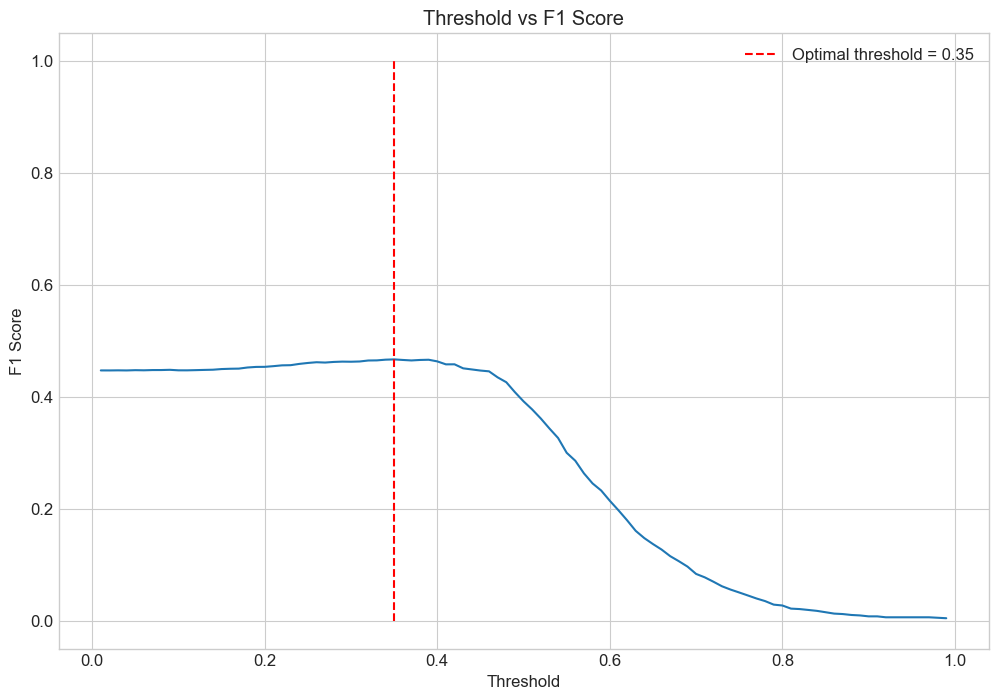

2025-03-19 21:15:12,649 - training_pipeline - INFO - Evaluating NeuralNetwork_Churn_Predictor...


  1/256 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step

 87/256 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step

174/256 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step


2025-03-19 21:15:13,000 - training_pipeline - INFO - Evaluation metrics: {'accuracy': 0.4817580803134182, 'precision': 0.33160064527693134, 'recall': 0.7858963466440102, 'f1': 0.4664061515189714, 'threshold': 0.35000000000000003, 'auc': 0.6080737352401947, 'average_precision': 0.363065672163095}


2025-03-19 21:15:13,001 - training_pipeline - INFO - Performing cross-validation...


2025-03-19 21:15:13,001 - training_pipeline - INFO - Performing 5-fold cross-validation with roc_auc scoring...


2025-03-19 21:15:13,007 - training_pipeline - INFO - Training fold 1/5...


2025-03-19 21:15:13,083 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:15:13,084 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9415}


2025-03-19 21:15:14,397 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


Epoch 1/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10:55 2s/step - accuracy: 0.6094 - auc: 0.4337 - loss: 0.9283 - precision: 0.4167 - recall: 0.2174

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5896 - auc: 0.5036 - loss: 0.7914 - precision: 0.2956 - recall: 0.2800  

 65/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5798 - auc: 0.5070 - loss: 0.7698 - precision: 0.2908 - recall: 0.3167

 99/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5750 - auc: 0.5078 - loss: 0.7575 - precision: 0.2904 - recall: 0.3280

131/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5734 - auc: 0.5077 - loss: 0.7496 - precision: 0.2907 - recall: 0.3316

165/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5736 - auc: 0.5075 - loss: 0.7431 - precision: 0.2914 - recall: 0.3326

197/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5746 - auc: 0.5073 - loss: 0.7381 - precision: 0.2919 - recall: 0.3317

229/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5758 - auc: 0.5069 - loss: 0.7342 - precision: 0.2919 - recall: 0.3293

263/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5773 - auc: 0.5064 - loss: 0.7307 - precision: 0.2915 - recall: 0.3252

297/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5791 - auc: 0.5061 - loss: 0.7275 - precision: 0.2912 - recall: 0.3204

329/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5812 - auc: 0.5059 - loss: 0.7248 - precision: 0.2911 - recall: 0.3157

361/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5833 - auc: 0.5057 - loss: 0.7224 - precision: 0.2910 - recall: 0.3107

394/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5855 - auc: 0.5055 - loss: 0.7202 - precision: 0.2911 - recall: 0.3055

427/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5878 - auc: 0.5054 - loss: 0.7182 - precision: 0.2914 - recall: 0.3006

436/436 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5884 - auc: 0.5054 - loss: 0.7177 - precision: 0.2914 - recall: 0.2992 - val_accuracy: 0.4880 - val_auc: 0.5612 - val_loss: 0.6947 - val_precision: 0.5109 - val_recall: 0.0394 - learning_rate: 0.0010


Epoch 2/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6719 - auc: 0.5270 - loss: 0.7244 - precision: 0.6250 - recall: 0.2174

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - auc: 0.5227 - loss: 0.6736 - precision: 0.3043 - recall: 0.1182  

 66/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6651 - auc: 0.5173 - loss: 0.6709 - precision: 0.2837 - recall: 0.1072

 95/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - auc: 0.5165 - loss: 0.6709 - precision: 0.2826 - recall: 0.1007

127/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6692 - auc: 0.5168 - loss: 0.6710 - precision: 0.2859 - recall: 0.0980

158/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - auc: 0.5165 - loss: 0.6710 - precision: 0.2874 - recall: 0.0967

189/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6707 - auc: 0.5162 - loss: 0.6710 - precision: 0.2874 - recall: 0.0953

219/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - auc: 0.5163 - loss: 0.6707 - precision: 0.2878 - recall: 0.0941

249/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6721 - auc: 0.5166 - loss: 0.6705 - precision: 0.2880 - recall: 0.0928

282/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - auc: 0.5170 - loss: 0.6703 - precision: 0.2883 - recall: 0.0914

314/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6738 - auc: 0.5173 - loss: 0.6701 - precision: 0.2886 - recall: 0.0899

348/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - auc: 0.5176 - loss: 0.6698 - precision: 0.2889 - recall: 0.0884

381/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6754 - auc: 0.5180 - loss: 0.6696 - precision: 0.2895 - recall: 0.0869

412/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - auc: 0.5185 - loss: 0.6695 - precision: 0.2905 - recall: 0.0857

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6767 - auc: 0.5189 - loss: 0.6693 - precision: 0.2912 - recall: 0.0849 - val_accuracy: 0.4879 - val_auc: 0.5744 - val_loss: 0.6936 - val_precision: 0.5150 - val_recall: 0.0240 - learning_rate: 0.0010


Epoch 3/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6719 - auc: 0.4958 - loss: 0.7121 - precision: 0.6667 - recall: 0.1739

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6889 - auc: 0.5262 - loss: 0.6699 - precision: 0.3692 - recall: 0.0915 

 66/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6912 - auc: 0.5249 - loss: 0.6653 - precision: 0.3329 - recall: 0.0786

 99/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6903 - auc: 0.5272 - loss: 0.6652 - precision: 0.3221 - recall: 0.0729

132/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - auc: 0.5300 - loss: 0.6653 - precision: 0.3200 - recall: 0.0705

165/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6895 - auc: 0.5310 - loss: 0.6654 - precision: 0.3172 - recall: 0.0688

196/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6895 - auc: 0.5321 - loss: 0.6653 - precision: 0.3163 - recall: 0.0678

226/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6897 - auc: 0.5330 - loss: 0.6651 - precision: 0.3157 - recall: 0.0670

257/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6899 - auc: 0.5336 - loss: 0.6649 - precision: 0.3147 - recall: 0.0659

288/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - auc: 0.5341 - loss: 0.6647 - precision: 0.3134 - recall: 0.0648

319/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6904 - auc: 0.5346 - loss: 0.6646 - precision: 0.3124 - recall: 0.0637

351/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - auc: 0.5353 - loss: 0.6644 - precision: 0.3119 - recall: 0.0626

385/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6910 - auc: 0.5361 - loss: 0.6642 - precision: 0.3119 - recall: 0.0616

419/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6913 - auc: 0.5369 - loss: 0.6641 - precision: 0.3122 - recall: 0.0608

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6914 - auc: 0.5373 - loss: 0.6640 - precision: 0.3124 - recall: 0.0605 - val_accuracy: 0.4889 - val_auc: 0.5897 - val_loss: 0.6889 - val_precision: 0.5200 - val_recall: 0.0436 - learning_rate: 0.0010


Epoch 4/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6562 - auc: 0.5912 - loss: 0.7736 - precision: 0.6000 - recall: 0.1304

 35/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6804 - auc: 0.5711 - loss: 0.6660 - precision: 0.3603 - recall: 0.1133  

 69/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6874 - auc: 0.5603 - loss: 0.6608 - precision: 0.3531 - recall: 0.1042

105/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6880 - auc: 0.5580 - loss: 0.6608 - precision: 0.3517 - recall: 0.0984

140/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6880 - auc: 0.5584 - loss: 0.6605 - precision: 0.3512 - recall: 0.0968

173/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6877 - auc: 0.5586 - loss: 0.6604 - precision: 0.3499 - recall: 0.0958

205/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6879 - auc: 0.5591 - loss: 0.6600 - precision: 0.3494 - recall: 0.0952

238/436 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6881 - auc: 0.5602 - loss: 0.6596 - precision: 0.3493 - recall: 0.0945

270/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6883 - auc: 0.5613 - loss: 0.6593 - precision: 0.3493 - recall: 0.0939

303/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - auc: 0.5625 - loss: 0.6590 - precision: 0.3496 - recall: 0.0932

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6892 - auc: 0.5638 - loss: 0.6587 - precision: 0.3505 - recall: 0.0927

371/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6895 - auc: 0.5650 - loss: 0.6584 - precision: 0.3512 - recall: 0.0921

404/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6897 - auc: 0.5661 - loss: 0.6583 - precision: 0.3523 - recall: 0.0920

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6898 - auc: 0.5670 - loss: 0.6581 - precision: 0.3535 - recall: 0.0926 - val_accuracy: 0.4978 - val_auc: 0.6038 - val_loss: 0.6847 - val_precision: 0.5529 - val_recall: 0.1082 - learning_rate: 0.0010


Epoch 5/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6562 - auc: 0.5875 - loss: 0.7181 - precision: 0.5455 - recall: 0.2609

 34/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6672 - auc: 0.5871 - loss: 0.6586 - precision: 0.3698 - recall: 0.1886 

 68/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - auc: 0.5848 - loss: 0.6541 - precision: 0.3658 - recall: 0.1765

101/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - auc: 0.5822 - loss: 0.6549 - precision: 0.3644 - recall: 0.1670

134/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6771 - auc: 0.5821 - loss: 0.6554 - precision: 0.3669 - recall: 0.1656

167/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - auc: 0.5819 - loss: 0.6558 - precision: 0.3663 - recall: 0.1667

202/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - auc: 0.5822 - loss: 0.6557 - precision: 0.3658 - recall: 0.1702

236/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6751 - auc: 0.5833 - loss: 0.6554 - precision: 0.3667 - recall: 0.1743

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - auc: 0.5841 - loss: 0.6551 - precision: 0.3672 - recall: 0.1778

303/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - auc: 0.5848 - loss: 0.6547 - precision: 0.3675 - recall: 0.1811

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - auc: 0.5857 - loss: 0.6543 - precision: 0.3681 - recall: 0.1842

370/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6738 - auc: 0.5865 - loss: 0.6540 - precision: 0.3687 - recall: 0.1869

395/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6735 - auc: 0.5871 - loss: 0.6539 - precision: 0.3692 - recall: 0.1890

426/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6732 - auc: 0.5877 - loss: 0.6537 - precision: 0.3697 - recall: 0.1918

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6731 - auc: 0.5879 - loss: 0.6536 - precision: 0.3699 - recall: 0.1928 - val_accuracy: 0.5389 - val_auc: 0.6144 - val_loss: 0.6812 - val_precision: 0.6129 - val_recall: 0.2739 - learning_rate: 0.0010


Epoch 6/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6562 - auc: 0.5832 - loss: 0.7133 - precision: 0.5385 - recall: 0.3043

 26/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6553 - auc: 0.6060 - loss: 0.6604 - precision: 0.4052 - recall: 0.3329  

 48/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6584 - auc: 0.6057 - loss: 0.6529 - precision: 0.3923 - recall: 0.3261

 71/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6594 - auc: 0.6038 - loss: 0.6510 - precision: 0.3862 - recall: 0.3147

 94/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6593 - auc: 0.6022 - loss: 0.6513 - precision: 0.3831 - recall: 0.3027

117/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - auc: 0.6012 - loss: 0.6515 - precision: 0.3817 - recall: 0.2960

138/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6592 - auc: 0.6010 - loss: 0.6514 - precision: 0.3810 - recall: 0.2924

164/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6593 - auc: 0.6005 - loss: 0.6515 - precision: 0.3806 - recall: 0.2891

187/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - auc: 0.6004 - loss: 0.6515 - precision: 0.3806 - recall: 0.2875

209/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - auc: 0.6006 - loss: 0.6513 - precision: 0.3808 - recall: 0.2865

231/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - auc: 0.6008 - loss: 0.6511 - precision: 0.3808 - recall: 0.2853

252/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - auc: 0.6011 - loss: 0.6509 - precision: 0.3809 - recall: 0.2842

273/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6607 - auc: 0.6015 - loss: 0.6506 - precision: 0.3809 - recall: 0.2833

290/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - auc: 0.6017 - loss: 0.6504 - precision: 0.3808 - recall: 0.2828

311/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - auc: 0.6021 - loss: 0.6502 - precision: 0.3808 - recall: 0.2824

331/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6612 - auc: 0.6024 - loss: 0.6500 - precision: 0.3810 - recall: 0.2821

348/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6614 - auc: 0.6028 - loss: 0.6499 - precision: 0.3812 - recall: 0.2820

364/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - auc: 0.6031 - loss: 0.6497 - precision: 0.3815 - recall: 0.2820

382/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - auc: 0.6035 - loss: 0.6496 - precision: 0.3819 - recall: 0.2823

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6619 - auc: 0.6040 - loss: 0.6494 - precision: 0.3823 - recall: 0.2827

428/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - auc: 0.6045 - loss: 0.6492 - precision: 0.3829 - recall: 0.2837

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6622 - auc: 0.6046 - loss: 0.6492 - precision: 0.3831 - recall: 0.2840 - val_accuracy: 0.5581 - val_auc: 0.6188 - val_loss: 0.6788 - val_precision: 0.6126 - val_recall: 0.3765 - learning_rate: 0.0010


Epoch 7/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.6094 - auc: 0.5371 - loss: 0.7456 - precision: 0.4375 - recall: 0.3043

 21/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6613 - auc: 0.6004 - loss: 0.6661 - precision: 0.4259 - recall: 0.3759  

 40/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6613 - auc: 0.6088 - loss: 0.6540 - precision: 0.4118 - recall: 0.3793

 57/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6616 - auc: 0.6122 - loss: 0.6492 - precision: 0.4057 - recall: 0.3722

 72/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6615 - auc: 0.6128 - loss: 0.6472 - precision: 0.4016 - recall: 0.3649

 87/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6613 - auc: 0.6133 - loss: 0.6467 - precision: 0.4002 - recall: 0.3584

102/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6610 - auc: 0.6135 - loss: 0.6466 - precision: 0.3996 - recall: 0.3547

115/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6610 - auc: 0.6137 - loss: 0.6465 - precision: 0.3997 - recall: 0.3532

130/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - auc: 0.6139 - loss: 0.6463 - precision: 0.3996 - recall: 0.3514

147/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - auc: 0.6138 - loss: 0.6462 - precision: 0.3995 - recall: 0.3498

166/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - auc: 0.6139 - loss: 0.6461 - precision: 0.3995 - recall: 0.3483

183/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - auc: 0.6139 - loss: 0.6460 - precision: 0.3994 - recall: 0.3475

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6612 - auc: 0.6141 - loss: 0.6458 - precision: 0.3995 - recall: 0.3474

215/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6613 - auc: 0.6144 - loss: 0.6456 - precision: 0.3995 - recall: 0.3473

231/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6613 - auc: 0.6146 - loss: 0.6455 - precision: 0.3993 - recall: 0.3471

247/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6612 - auc: 0.6148 - loss: 0.6453 - precision: 0.3991 - recall: 0.3465

265/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - auc: 0.6148 - loss: 0.6452 - precision: 0.3987 - recall: 0.3457

285/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - auc: 0.6149 - loss: 0.6451 - precision: 0.3981 - recall: 0.3448

306/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - auc: 0.6151 - loss: 0.6449 - precision: 0.3977 - recall: 0.3438

331/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - auc: 0.6154 - loss: 0.6447 - precision: 0.3975 - recall: 0.3429

360/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - auc: 0.6158 - loss: 0.6445 - precision: 0.3973 - recall: 0.3422

389/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - auc: 0.6162 - loss: 0.6444 - precision: 0.3973 - recall: 0.3420

418/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - auc: 0.6167 - loss: 0.6442 - precision: 0.3973 - recall: 0.3422

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6610 - auc: 0.6169 - loss: 0.6442 - precision: 0.3971 - recall: 0.3424 - val_accuracy: 0.5603 - val_auc: 0.6182 - val_loss: 0.6787 - val_precision: 0.6132 - val_recall: 0.3860 - learning_rate: 0.0010


Epoch 8/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.5938 - auc: 0.5970 - loss: 0.6921 - precision: 0.4286 - recall: 0.3913

 28/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - auc: 0.6170 - loss: 0.6547 - precision: 0.4173 - recall: 0.4233  

 54/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6556 - auc: 0.6158 - loss: 0.6478 - precision: 0.4035 - recall: 0.4042

 81/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - auc: 0.6171 - loss: 0.6453 - precision: 0.4011 - recall: 0.3877

107/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - auc: 0.6185 - loss: 0.6446 - precision: 0.4017 - recall: 0.3782

135/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6592 - auc: 0.6202 - loss: 0.6437 - precision: 0.4020 - recall: 0.3750

160/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6593 - auc: 0.6211 - loss: 0.6433 - precision: 0.4021 - recall: 0.3729

187/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6592 - auc: 0.6218 - loss: 0.6430 - precision: 0.4020 - recall: 0.3720

215/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6595 - auc: 0.6227 - loss: 0.6425 - precision: 0.4021 - recall: 0.3719

243/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6597 - auc: 0.6234 - loss: 0.6421 - precision: 0.4023 - recall: 0.3717

271/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - auc: 0.6240 - loss: 0.6417 - precision: 0.4023 - recall: 0.3714

300/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6599 - auc: 0.6247 - loss: 0.6413 - precision: 0.4023 - recall: 0.3714

328/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - auc: 0.6255 - loss: 0.6409 - precision: 0.4026 - recall: 0.3718

357/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6604 - auc: 0.6263 - loss: 0.6405 - precision: 0.4029 - recall: 0.3724

386/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - auc: 0.6270 - loss: 0.6402 - precision: 0.4033 - recall: 0.3733

418/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - auc: 0.6278 - loss: 0.6399 - precision: 0.4037 - recall: 0.3744

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6606 - auc: 0.6282 - loss: 0.6398 - precision: 0.4038 - recall: 0.3751 - val_accuracy: 0.5646 - val_auc: 0.6183 - val_loss: 0.6787 - val_precision: 0.6128 - val_recall: 0.4100 - learning_rate: 0.0010


Epoch 9/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.6406 - auc: 0.6379 - loss: 0.7194 - precision: 0.5000 - recall: 0.3913

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6597 - auc: 0.6443 - loss: 0.6405 - precision: 0.4244 - recall: 0.4312  

 64/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - auc: 0.6383 - loss: 0.6345 - precision: 0.4055 - recall: 0.4234

 97/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - auc: 0.6349 - loss: 0.6349 - precision: 0.4011 - recall: 0.4141

122/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - auc: 0.6350 - loss: 0.6350 - precision: 0.4014 - recall: 0.4135

150/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - auc: 0.6353 - loss: 0.6352 - precision: 0.4015 - recall: 0.4135

181/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.6357 - loss: 0.6353 - precision: 0.4019 - recall: 0.4133

211/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - auc: 0.6363 - loss: 0.6351 - precision: 0.4024 - recall: 0.4136

239/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6540 - auc: 0.6366 - loss: 0.6350 - precision: 0.4028 - recall: 0.4133

262/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6543 - auc: 0.6368 - loss: 0.6350 - precision: 0.4029 - recall: 0.4129

293/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - auc: 0.6370 - loss: 0.6349 - precision: 0.4029 - recall: 0.4120

324/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6548 - auc: 0.6373 - loss: 0.6348 - precision: 0.4029 - recall: 0.4113

354/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - auc: 0.6376 - loss: 0.6347 - precision: 0.4031 - recall: 0.4109

385/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - auc: 0.6380 - loss: 0.6346 - precision: 0.4033 - recall: 0.4108

416/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - auc: 0.6383 - loss: 0.6345 - precision: 0.4034 - recall: 0.4110

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6552 - auc: 0.6385 - loss: 0.6345 - precision: 0.4034 - recall: 0.4112 - val_accuracy: 0.5657 - val_auc: 0.6195 - val_loss: 0.6788 - val_precision: 0.6032 - val_recall: 0.4477 - learning_rate: 0.0010


Epoch 10/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.6562 - auc: 0.6755 - loss: 0.6932 - precision: 0.5200 - recall: 0.5652

 22/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6404 - auc: 0.6270 - loss: 0.6630 - precision: 0.4084 - recall: 0.4540  

 43/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6408 - auc: 0.6298 - loss: 0.6516 - precision: 0.3959 - recall: 0.4524

 64/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - auc: 0.6296 - loss: 0.6471 - precision: 0.3923 - recall: 0.4424

 85/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6437 - auc: 0.6297 - loss: 0.6453 - precision: 0.3909 - recall: 0.4313

106/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6452 - auc: 0.6309 - loss: 0.6441 - precision: 0.3925 - recall: 0.4244

128/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6467 - auc: 0.6323 - loss: 0.6432 - precision: 0.3943 - recall: 0.4208

151/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6479 - auc: 0.6331 - loss: 0.6424 - precision: 0.3954 - recall: 0.4176

171/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6489 - auc: 0.6336 - loss: 0.6419 - precision: 0.3965 - recall: 0.4152

197/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - auc: 0.6344 - loss: 0.6412 - precision: 0.3977 - recall: 0.4141

222/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - auc: 0.6353 - loss: 0.6405 - precision: 0.3990 - recall: 0.4139

247/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6518 - auc: 0.6360 - loss: 0.6398 - precision: 0.3998 - recall: 0.4136

274/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6524 - auc: 0.6366 - loss: 0.6392 - precision: 0.4003 - recall: 0.4129

301/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6527 - auc: 0.6368 - loss: 0.6387 - precision: 0.4005 - recall: 0.4120

327/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.6372 - loss: 0.6383 - precision: 0.4008 - recall: 0.4112

353/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - auc: 0.6376 - loss: 0.6379 - precision: 0.4012 - recall: 0.4107

377/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6539 - auc: 0.6380 - loss: 0.6376 - precision: 0.4015 - recall: 0.4103

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - auc: 0.6384 - loss: 0.6373 - precision: 0.4018 - recall: 0.4104

427/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - auc: 0.6388 - loss: 0.6370 - precision: 0.4020 - recall: 0.4108

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6543 - auc: 0.6390 - loss: 0.6369 - precision: 0.4021 - recall: 0.4109 - val_accuracy: 0.5618 - val_auc: 0.6151 - val_loss: 0.6823 - val_precision: 0.6037 - val_recall: 0.4240 - learning_rate: 0.0010


Epoch 11/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.6094 - auc: 0.5742 - loss: 0.7111 - precision: 0.4286 - recall: 0.2609

 28/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6373 - auc: 0.6259 - loss: 0.6481 - precision: 0.3883 - recall: 0.3882  

 56/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6421 - auc: 0.6340 - loss: 0.6377 - precision: 0.3873 - recall: 0.4133

 83/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6448 - auc: 0.6356 - loss: 0.6359 - precision: 0.3897 - recall: 0.4178

108/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6465 - auc: 0.6371 - loss: 0.6357 - precision: 0.3934 - recall: 0.4194

130/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - auc: 0.6385 - loss: 0.6353 - precision: 0.3953 - recall: 0.4215

151/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6477 - auc: 0.6391 - loss: 0.6352 - precision: 0.3960 - recall: 0.4221

173/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6483 - auc: 0.6400 - loss: 0.6350 - precision: 0.3972 - recall: 0.4232

194/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6488 - auc: 0.6406 - loss: 0.6348 - precision: 0.3981 - recall: 0.4245

216/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6493 - auc: 0.6412 - loss: 0.6346 - precision: 0.3988 - recall: 0.4256

242/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - auc: 0.6417 - loss: 0.6343 - precision: 0.3994 - recall: 0.4266

266/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6501 - auc: 0.6422 - loss: 0.6341 - precision: 0.3999 - recall: 0.4269

289/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - auc: 0.6425 - loss: 0.6338 - precision: 0.4002 - recall: 0.4270

314/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6508 - auc: 0.6430 - loss: 0.6335 - precision: 0.4005 - recall: 0.4269

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6512 - auc: 0.6435 - loss: 0.6332 - precision: 0.4010 - recall: 0.4269

365/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6516 - auc: 0.6440 - loss: 0.6329 - precision: 0.4015 - recall: 0.4272

394/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6520 - auc: 0.6446 - loss: 0.6326 - precision: 0.4021 - recall: 0.4278

416/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - auc: 0.6451 - loss: 0.6324 - precision: 0.4024 - recall: 0.4284

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6523 - auc: 0.6454 - loss: 0.6322 - precision: 0.4027 - recall: 0.4291 - val_accuracy: 0.5713 - val_auc: 0.6208 - val_loss: 0.6793 - val_precision: 0.6049 - val_recall: 0.4729 - learning_rate: 0.0010


Epoch 12/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6250 - auc: 0.6506 - loss: 0.6711 - precision: 0.4737 - recall: 0.3913

 27/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6441 - auc: 0.6447 - loss: 0.6367 - precision: 0.4095 - recall: 0.4459  

 54/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6443 - auc: 0.6437 - loss: 0.6317 - precision: 0.3982 - recall: 0.4510

 78/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - auc: 0.6433 - loss: 0.6305 - precision: 0.3966 - recall: 0.4451

102/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6462 - auc: 0.6440 - loss: 0.6302 - precision: 0.3970 - recall: 0.4401

128/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - auc: 0.6445 - loss: 0.6301 - precision: 0.3969 - recall: 0.4388

154/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6457 - auc: 0.6446 - loss: 0.6301 - precision: 0.3969 - recall: 0.4386

180/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - auc: 0.6449 - loss: 0.6302 - precision: 0.3974 - recall: 0.4394

206/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - auc: 0.6453 - loss: 0.6302 - precision: 0.3979 - recall: 0.4405

231/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6468 - auc: 0.6457 - loss: 0.6300 - precision: 0.3985 - recall: 0.4410

256/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - auc: 0.6461 - loss: 0.6298 - precision: 0.3992 - recall: 0.4409

282/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6478 - auc: 0.6463 - loss: 0.6296 - precision: 0.3995 - recall: 0.4406

308/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - auc: 0.6467 - loss: 0.6294 - precision: 0.3998 - recall: 0.4405

333/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6486 - auc: 0.6472 - loss: 0.6291 - precision: 0.4002 - recall: 0.4407

360/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6490 - auc: 0.6477 - loss: 0.6288 - precision: 0.4007 - recall: 0.4412

387/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6493 - auc: 0.6482 - loss: 0.6286 - precision: 0.4012 - recall: 0.4419

414/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6494 - auc: 0.6487 - loss: 0.6284 - precision: 0.4016 - recall: 0.4429

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6495 - auc: 0.6490 - loss: 0.6282 - precision: 0.4018 - recall: 0.4437 - val_accuracy: 0.5653 - val_auc: 0.6210 - val_loss: 0.6819 - val_precision: 0.6106 - val_recall: 0.4203 - learning_rate: 0.0010


Epoch 13/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.6406 - auc: 0.6495 - loss: 0.6846 - precision: 0.5000 - recall: 0.5652

 22/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6701 - auc: 0.6493 - loss: 0.6467 - precision: 0.4515 - recall: 0.4815  

 40/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6664 - auc: 0.6495 - loss: 0.6387 - precision: 0.4324 - recall: 0.4679

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6641 - auc: 0.6506 - loss: 0.6337 - precision: 0.4229 - recall: 0.4583

 85/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6632 - auc: 0.6524 - loss: 0.6317 - precision: 0.4200 - recall: 0.4531

110/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - auc: 0.6536 - loss: 0.6310 - precision: 0.4189 - recall: 0.4485

136/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6614 - auc: 0.6548 - loss: 0.6302 - precision: 0.4181 - recall: 0.4472

163/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - auc: 0.6554 - loss: 0.6296 - precision: 0.4173 - recall: 0.4462

193/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - auc: 0.6562 - loss: 0.6290 - precision: 0.4166 - recall: 0.4464

223/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6599 - auc: 0.6570 - loss: 0.6283 - precision: 0.4165 - recall: 0.4476

252/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - auc: 0.6578 - loss: 0.6276 - precision: 0.4166 - recall: 0.4485

282/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - auc: 0.6585 - loss: 0.6270 - precision: 0.4166 - recall: 0.4495

312/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - auc: 0.6593 - loss: 0.6263 - precision: 0.4167 - recall: 0.4507

343/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - auc: 0.6602 - loss: 0.6257 - precision: 0.4168 - recall: 0.4520

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - auc: 0.6609 - loss: 0.6252 - precision: 0.4170 - recall: 0.4533

399/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - auc: 0.6618 - loss: 0.6246 - precision: 0.4172 - recall: 0.4551

427/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - auc: 0.6625 - loss: 0.6241 - precision: 0.4174 - recall: 0.4568

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6600 - auc: 0.6627 - loss: 0.6239 - precision: 0.4175 - recall: 0.4574 - val_accuracy: 0.5786 - val_auc: 0.6217 - val_loss: 0.6884 - val_precision: 0.6032 - val_recall: 0.5210 - learning_rate: 5.0000e-04


Epoch 14/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6094 - auc: 0.6124 - loss: 0.7295 - precision: 0.4643 - recall: 0.5652

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6245 - auc: 0.6341 - loss: 0.6502 - precision: 0.3922 - recall: 0.4960  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6311 - auc: 0.6448 - loss: 0.6358 - precision: 0.3902 - recall: 0.4991

 92/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6353 - auc: 0.6489 - loss: 0.6322 - precision: 0.3941 - recall: 0.4982

122/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6383 - auc: 0.6526 - loss: 0.6298 - precision: 0.3983 - recall: 0.4984

151/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6403 - auc: 0.6553 - loss: 0.6282 - precision: 0.4010 - recall: 0.4996

181/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - auc: 0.6572 - loss: 0.6271 - precision: 0.4029 - recall: 0.4999

212/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6431 - auc: 0.6588 - loss: 0.6261 - precision: 0.4043 - recall: 0.5010

242/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - auc: 0.6599 - loss: 0.6253 - precision: 0.4052 - recall: 0.5014

272/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - auc: 0.6609 - loss: 0.6246 - precision: 0.4061 - recall: 0.5015

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - auc: 0.6616 - loss: 0.6240 - precision: 0.4067 - recall: 0.5015

333/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6461 - auc: 0.6626 - loss: 0.6233 - precision: 0.4074 - recall: 0.5017

363/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6468 - auc: 0.6636 - loss: 0.6226 - precision: 0.4082 - recall: 0.5022

392/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - auc: 0.6646 - loss: 0.6220 - precision: 0.4090 - recall: 0.5029

422/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6480 - auc: 0.6655 - loss: 0.6214 - precision: 0.4098 - recall: 0.5039

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6482 - auc: 0.6659 - loss: 0.6212 - precision: 0.4101 - recall: 0.5045 - val_accuracy: 0.5823 - val_auc: 0.6238 - val_loss: 0.6909 - val_precision: 0.6021 - val_recall: 0.5472 - learning_rate: 5.0000e-04


Epoch 15/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5938 - auc: 0.6384 - loss: 0.7220 - precision: 0.4545 - recall: 0.6522

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6280 - auc: 0.6513 - loss: 0.6374 - precision: 0.4037 - recall: 0.5470  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6311 - auc: 0.6562 - loss: 0.6266 - precision: 0.3970 - recall: 0.5419

 91/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6344 - auc: 0.6577 - loss: 0.6250 - precision: 0.3990 - recall: 0.5360

119/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6365 - auc: 0.6598 - loss: 0.6239 - precision: 0.4018 - recall: 0.5340

146/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6376 - auc: 0.6610 - loss: 0.6233 - precision: 0.4031 - recall: 0.5329

173/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6386 - auc: 0.6618 - loss: 0.6229 - precision: 0.4040 - recall: 0.5312

198/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6392 - auc: 0.6626 - loss: 0.6224 - precision: 0.4045 - recall: 0.5306

224/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6398 - auc: 0.6635 - loss: 0.6218 - precision: 0.4050 - recall: 0.5302

249/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6403 - auc: 0.6643 - loss: 0.6212 - precision: 0.4054 - recall: 0.5296

277/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - auc: 0.6649 - loss: 0.6207 - precision: 0.4056 - recall: 0.5289

307/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6412 - auc: 0.6655 - loss: 0.6203 - precision: 0.4058 - recall: 0.5283

338/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6417 - auc: 0.6662 - loss: 0.6198 - precision: 0.4062 - recall: 0.5280

368/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6423 - auc: 0.6669 - loss: 0.6194 - precision: 0.4068 - recall: 0.5281

398/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6429 - auc: 0.6678 - loss: 0.6189 - precision: 0.4076 - recall: 0.5287

428/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6435 - auc: 0.6686 - loss: 0.6184 - precision: 0.4083 - recall: 0.5293

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6436 - auc: 0.6688 - loss: 0.6183 - precision: 0.4085 - recall: 0.5295 - val_accuracy: 0.5889 - val_auc: 0.6236 - val_loss: 0.6925 - val_precision: 0.6081 - val_recall: 0.5581 - learning_rate: 5.0000e-04


Epoch 16/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6250 - auc: 0.6384 - loss: 0.6928 - precision: 0.4800 - recall: 0.5217

 30/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6337 - auc: 0.6588 - loss: 0.6353 - precision: 0.4072 - recall: 0.5227  

 58/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6375 - auc: 0.6643 - loss: 0.6247 - precision: 0.4035 - recall: 0.5366

 84/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6394 - auc: 0.6657 - loss: 0.6228 - precision: 0.4046 - recall: 0.5405

109/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6403 - auc: 0.6674 - loss: 0.6221 - precision: 0.4068 - recall: 0.5423

136/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - auc: 0.6687 - loss: 0.6214 - precision: 0.4077 - recall: 0.5441

161/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - auc: 0.6692 - loss: 0.6212 - precision: 0.4079 - recall: 0.5444

187/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6408 - auc: 0.6697 - loss: 0.6210 - precision: 0.4082 - recall: 0.5446

213/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6411 - auc: 0.6703 - loss: 0.6207 - precision: 0.4085 - recall: 0.5452

239/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6415 - auc: 0.6707 - loss: 0.6204 - precision: 0.4088 - recall: 0.5452

269/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6420 - auc: 0.6713 - loss: 0.6199 - precision: 0.4093 - recall: 0.5451

299/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - auc: 0.6717 - loss: 0.6195 - precision: 0.4096 - recall: 0.5448

329/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - auc: 0.6723 - loss: 0.6190 - precision: 0.4102 - recall: 0.5446

360/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - auc: 0.6731 - loss: 0.6184 - precision: 0.4109 - recall: 0.5447

390/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6446 - auc: 0.6739 - loss: 0.6178 - precision: 0.4117 - recall: 0.5450

420/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6452 - auc: 0.6746 - loss: 0.6172 - precision: 0.4124 - recall: 0.5456

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6454 - auc: 0.6750 - loss: 0.6170 - precision: 0.4127 - recall: 0.5459 - val_accuracy: 0.5892 - val_auc: 0.6271 - val_loss: 0.6944 - val_precision: 0.6060 - val_recall: 0.5690 - learning_rate: 5.0000e-04


Epoch 17/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6094 - auc: 0.7174 - loss: 0.6299 - precision: 0.4706 - recall: 0.6957

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6142 - auc: 0.6550 - loss: 0.6360 - precision: 0.3890 - recall: 0.5403  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6219 - auc: 0.6605 - loss: 0.6245 - precision: 0.3875 - recall: 0.5400

 92/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6266 - auc: 0.6641 - loss: 0.6211 - precision: 0.3916 - recall: 0.5386

123/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6293 - auc: 0.6669 - loss: 0.6194 - precision: 0.3953 - recall: 0.5402

154/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6312 - auc: 0.6689 - loss: 0.6181 - precision: 0.3979 - recall: 0.5422

185/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6327 - auc: 0.6703 - loss: 0.6173 - precision: 0.3997 - recall: 0.5434

215/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6338 - auc: 0.6714 - loss: 0.6166 - precision: 0.4008 - recall: 0.5446

247/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6349 - auc: 0.6723 - loss: 0.6160 - precision: 0.4019 - recall: 0.5453

277/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - auc: 0.6730 - loss: 0.6155 - precision: 0.4029 - recall: 0.5454

308/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6369 - auc: 0.6736 - loss: 0.6150 - precision: 0.4038 - recall: 0.5453

339/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6381 - auc: 0.6744 - loss: 0.6144 - precision: 0.4049 - recall: 0.5456

370/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6392 - auc: 0.6752 - loss: 0.6139 - precision: 0.4061 - recall: 0.5462

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - auc: 0.6761 - loss: 0.6134 - precision: 0.4073 - recall: 0.5470

431/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6409 - auc: 0.6768 - loss: 0.6130 - precision: 0.4082 - recall: 0.5478

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6410 - auc: 0.6770 - loss: 0.6129 - precision: 0.4084 - recall: 0.5480 - val_accuracy: 0.5915 - val_auc: 0.6272 - val_loss: 0.6920 - val_precision: 0.6050 - val_recall: 0.5861 - learning_rate: 5.0000e-04


Epoch 18/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6875 - auc: 0.7296 - loss: 0.6392 - precision: 0.5484 - recall: 0.7391

 30/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6394 - auc: 0.6740 - loss: 0.6350 - precision: 0.4208 - recall: 0.5879  

 59/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6413 - auc: 0.6763 - loss: 0.6238 - precision: 0.4139 - recall: 0.5893

 89/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6421 - auc: 0.6771 - loss: 0.6208 - precision: 0.4133 - recall: 0.5853

119/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - auc: 0.6784 - loss: 0.6194 - precision: 0.4146 - recall: 0.5847

150/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6429 - auc: 0.6794 - loss: 0.6183 - precision: 0.4153 - recall: 0.5850

181/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - auc: 0.6802 - loss: 0.6174 - precision: 0.4159 - recall: 0.5853

211/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6435 - auc: 0.6810 - loss: 0.6166 - precision: 0.4161 - recall: 0.5861

240/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - auc: 0.6816 - loss: 0.6158 - precision: 0.4163 - recall: 0.5866

271/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6441 - auc: 0.6822 - loss: 0.6151 - precision: 0.4167 - recall: 0.5868

297/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6444 - auc: 0.6826 - loss: 0.6146 - precision: 0.4169 - recall: 0.5869

325/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6448 - auc: 0.6831 - loss: 0.6139 - precision: 0.4172 - recall: 0.5870

353/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6452 - auc: 0.6837 - loss: 0.6133 - precision: 0.4175 - recall: 0.5872

381/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6455 - auc: 0.6842 - loss: 0.6128 - precision: 0.4179 - recall: 0.5873

409/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - auc: 0.6847 - loss: 0.6123 - precision: 0.4183 - recall: 0.5876

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6462 - auc: 0.6852 - loss: 0.6118 - precision: 0.4186 - recall: 0.5878 - val_accuracy: 0.5902 - val_auc: 0.6286 - val_loss: 0.6941 - val_precision: 0.6086 - val_recall: 0.5629 - learning_rate: 2.5000e-04


Epoch 19/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6094 - auc: 0.6474 - loss: 0.6922 - precision: 0.4667 - recall: 0.6087

 28/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - auc: 0.6824 - loss: 0.6218 - precision: 0.4384 - recall: 0.5791  

 56/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - auc: 0.6863 - loss: 0.6107 - precision: 0.4253 - recall: 0.5721

 85/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - auc: 0.6875 - loss: 0.6080 - precision: 0.4235 - recall: 0.5693

113/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - auc: 0.6885 - loss: 0.6073 - precision: 0.4243 - recall: 0.5700

143/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - auc: 0.6891 - loss: 0.6069 - precision: 0.4245 - recall: 0.5723

170/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - auc: 0.6894 - loss: 0.6068 - precision: 0.4249 - recall: 0.5738

197/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6529 - auc: 0.6895 - loss: 0.6067 - precision: 0.4249 - recall: 0.5753

225/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6529 - auc: 0.6899 - loss: 0.6065 - precision: 0.4249 - recall: 0.5768

253/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - auc: 0.6903 - loss: 0.6062 - precision: 0.4252 - recall: 0.5779

280/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - auc: 0.6906 - loss: 0.6060 - precision: 0.4252 - recall: 0.5787

306/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.6909 - loss: 0.6057 - precision: 0.4252 - recall: 0.5792

336/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - auc: 0.6915 - loss: 0.6053 - precision: 0.4254 - recall: 0.5798

363/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - auc: 0.6920 - loss: 0.6050 - precision: 0.4256 - recall: 0.5802

388/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - auc: 0.6924 - loss: 0.6047 - precision: 0.4259 - recall: 0.5807

414/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6540 - auc: 0.6929 - loss: 0.6044 - precision: 0.4262 - recall: 0.5812

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6541 - auc: 0.6932 - loss: 0.6042 - precision: 0.4264 - recall: 0.5815 - val_accuracy: 0.5921 - val_auc: 0.6281 - val_loss: 0.6970 - val_precision: 0.6091 - val_recall: 0.5710 - learning_rate: 2.5000e-04


Epoch 20/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6250 - auc: 0.6601 - loss: 0.7329 - precision: 0.4815 - recall: 0.5652

 27/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - auc: 0.6772 - loss: 0.6292 - precision: 0.4213 - recall: 0.5501  

 55/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6453 - auc: 0.6821 - loss: 0.6149 - precision: 0.4150 - recall: 0.5579

 84/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - auc: 0.6814 - loss: 0.6122 - precision: 0.4125 - recall: 0.5590

110/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6449 - auc: 0.6827 - loss: 0.6111 - precision: 0.4144 - recall: 0.5633

138/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6449 - auc: 0.6836 - loss: 0.6104 - precision: 0.4152 - recall: 0.5676

162/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - auc: 0.6840 - loss: 0.6101 - precision: 0.4153 - recall: 0.5697

186/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6442 - auc: 0.6843 - loss: 0.6100 - precision: 0.4153 - recall: 0.5714

214/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6443 - auc: 0.6849 - loss: 0.6096 - precision: 0.4155 - recall: 0.5738

240/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6446 - auc: 0.6855 - loss: 0.6092 - precision: 0.4159 - recall: 0.5757

267/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6449 - auc: 0.6862 - loss: 0.6087 - precision: 0.4164 - recall: 0.5770

292/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6452 - auc: 0.6867 - loss: 0.6083 - precision: 0.4167 - recall: 0.5781

318/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6456 - auc: 0.6873 - loss: 0.6078 - precision: 0.4171 - recall: 0.5791

342/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6461 - auc: 0.6880 - loss: 0.6073 - precision: 0.4176 - recall: 0.5801

366/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - auc: 0.6886 - loss: 0.6069 - precision: 0.4182 - recall: 0.5809

387/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - auc: 0.6891 - loss: 0.6066 - precision: 0.4187 - recall: 0.5816

409/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - auc: 0.6897 - loss: 0.6062 - precision: 0.4192 - recall: 0.5824

431/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6477 - auc: 0.6902 - loss: 0.6058 - precision: 0.4196 - recall: 0.5832

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6477 - auc: 0.6903 - loss: 0.6057 - precision: 0.4197 - recall: 0.5834 - val_accuracy: 0.5929 - val_auc: 0.6271 - val_loss: 0.7006 - val_precision: 0.6086 - val_recall: 0.5780 - learning_rate: 2.5000e-04


Epoch 21/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6875 - auc: 0.7296 - loss: 0.6321 - precision: 0.5600 - recall: 0.6087

 26/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6558 - auc: 0.6894 - loss: 0.6160 - precision: 0.4414 - recall: 0.5903  

 51/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6524 - auc: 0.6897 - loss: 0.6077 - precision: 0.4272 - recall: 0.5922

 78/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6513 - auc: 0.6903 - loss: 0.6050 - precision: 0.4235 - recall: 0.5911

103/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6511 - auc: 0.6910 - loss: 0.6047 - precision: 0.4240 - recall: 0.5904

129/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6508 - auc: 0.6918 - loss: 0.6041 - precision: 0.4242 - recall: 0.5911

155/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - auc: 0.6921 - loss: 0.6039 - precision: 0.4239 - recall: 0.5917

183/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6501 - auc: 0.6926 - loss: 0.6035 - precision: 0.4240 - recall: 0.5925

210/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - auc: 0.6931 - loss: 0.6031 - precision: 0.4238 - recall: 0.5939

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - auc: 0.6934 - loss: 0.6027 - precision: 0.4236 - recall: 0.5952

260/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - auc: 0.6937 - loss: 0.6024 - precision: 0.4237 - recall: 0.5963

286/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - auc: 0.6939 - loss: 0.6022 - precision: 0.4236 - recall: 0.5973

311/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - auc: 0.6942 - loss: 0.6019 - precision: 0.4236 - recall: 0.5981

339/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - auc: 0.6947 - loss: 0.6016 - precision: 0.4239 - recall: 0.5991

363/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - auc: 0.6951 - loss: 0.6013 - precision: 0.4241 - recall: 0.5999

385/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - auc: 0.6955 - loss: 0.6011 - precision: 0.4244 - recall: 0.6007

407/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6505 - auc: 0.6959 - loss: 0.6008 - precision: 0.4247 - recall: 0.6015

432/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - auc: 0.6963 - loss: 0.6005 - precision: 0.4249 - recall: 0.6022

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6507 - auc: 0.6964 - loss: 0.6005 - precision: 0.4250 - recall: 0.6024 - val_accuracy: 0.5952 - val_auc: 0.6260 - val_loss: 0.7010 - val_precision: 0.6062 - val_recall: 0.6015 - learning_rate: 2.5000e-04


Epoch 22/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.6250 - auc: 0.7010 - loss: 0.6556 - precision: 0.4828 - recall: 0.6087

 26/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6515 - auc: 0.6993 - loss: 0.6128 - precision: 0.4386 - recall: 0.6109  

 55/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6450 - auc: 0.6957 - loss: 0.6062 - precision: 0.4209 - recall: 0.6096

 85/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6424 - auc: 0.6942 - loss: 0.6055 - precision: 0.4167 - recall: 0.6096

112/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6421 - auc: 0.6944 - loss: 0.6052 - precision: 0.4175 - recall: 0.6117

139/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6420 - auc: 0.6950 - loss: 0.6042 - precision: 0.4177 - recall: 0.6133

166/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6417 - auc: 0.6954 - loss: 0.6036 - precision: 0.4178 - recall: 0.6141

193/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6416 - auc: 0.6956 - loss: 0.6030 - precision: 0.4178 - recall: 0.6154

220/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6416 - auc: 0.6958 - loss: 0.6025 - precision: 0.4178 - recall: 0.6166

247/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6415 - auc: 0.6960 - loss: 0.6021 - precision: 0.4178 - recall: 0.6174

274/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6417 - auc: 0.6962 - loss: 0.6017 - precision: 0.4179 - recall: 0.6181

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6420 - auc: 0.6965 - loss: 0.6013 - precision: 0.4182 - recall: 0.6189

327/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - auc: 0.6969 - loss: 0.6009 - precision: 0.4186 - recall: 0.6195

351/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6429 - auc: 0.6973 - loss: 0.6005 - precision: 0.4190 - recall: 0.6201

375/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6433 - auc: 0.6977 - loss: 0.6002 - precision: 0.4194 - recall: 0.6206

400/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6437 - auc: 0.6982 - loss: 0.5998 - precision: 0.4200 - recall: 0.6212

427/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6442 - auc: 0.6987 - loss: 0.5995 - precision: 0.4204 - recall: 0.6218

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6443 - auc: 0.6988 - loss: 0.5993 - precision: 0.4206 - recall: 0.6220 - val_accuracy: 0.5932 - val_auc: 0.6249 - val_loss: 0.7018 - val_precision: 0.6052 - val_recall: 0.5947 - learning_rate: 2.5000e-04


Epoch 23/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.6562 - auc: 0.7354 - loss: 0.6488 - precision: 0.5185 - recall: 0.6087

 28/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6392 - auc: 0.6955 - loss: 0.6071 - precision: 0.4239 - recall: 0.6008  

 55/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6366 - auc: 0.6918 - loss: 0.6029 - precision: 0.4119 - recall: 0.6034

 84/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6375 - auc: 0.6908 - loss: 0.6026 - precision: 0.4114 - recall: 0.6067

114/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6387 - auc: 0.6910 - loss: 0.6030 - precision: 0.4139 - recall: 0.6100

145/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6395 - auc: 0.6919 - loss: 0.6025 - precision: 0.4152 - recall: 0.6125

176/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - auc: 0.6927 - loss: 0.6023 - precision: 0.4162 - recall: 0.6138

206/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - auc: 0.6933 - loss: 0.6020 - precision: 0.4167 - recall: 0.6152

237/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6412 - auc: 0.6940 - loss: 0.6017 - precision: 0.4174 - recall: 0.6166

267/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6420 - auc: 0.6948 - loss: 0.6012 - precision: 0.4182 - recall: 0.6179

297/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - auc: 0.6956 - loss: 0.6007 - precision: 0.4187 - recall: 0.6192

325/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - auc: 0.6964 - loss: 0.6002 - precision: 0.4193 - recall: 0.6202

353/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - auc: 0.6972 - loss: 0.5996 - precision: 0.4199 - recall: 0.6211

379/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6443 - auc: 0.6980 - loss: 0.5992 - precision: 0.4205 - recall: 0.6220

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6448 - auc: 0.6987 - loss: 0.5987 - precision: 0.4211 - recall: 0.6229

431/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6453 - auc: 0.6995 - loss: 0.5982 - precision: 0.4217 - recall: 0.6239

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6454 - auc: 0.6996 - loss: 0.5981 - precision: 0.4218 - recall: 0.6241 - val_accuracy: 0.5907 - val_auc: 0.6262 - val_loss: 0.7028 - val_precision: 0.6023 - val_recall: 0.5942 - learning_rate: 1.2500e-04


Epoch 24/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6250 - auc: 0.6935 - loss: 0.6384 - precision: 0.4839 - recall: 0.6522

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6344 - auc: 0.6936 - loss: 0.6172 - precision: 0.4171 - recall: 0.6049  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - auc: 0.6978 - loss: 0.6058 - precision: 0.4171 - recall: 0.6131

 94/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6456 - auc: 0.6989 - loss: 0.6041 - precision: 0.4209 - recall: 0.6167

124/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - auc: 0.7004 - loss: 0.6027 - precision: 0.4240 - recall: 0.6214

155/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - auc: 0.7011 - loss: 0.6017 - precision: 0.4255 - recall: 0.6239

185/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6489 - auc: 0.7016 - loss: 0.6011 - precision: 0.4261 - recall: 0.6252

217/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - auc: 0.7019 - loss: 0.6006 - precision: 0.4264 - recall: 0.6269

247/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6493 - auc: 0.7022 - loss: 0.6001 - precision: 0.4265 - recall: 0.6279

278/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6495 - auc: 0.7025 - loss: 0.5997 - precision: 0.4267 - recall: 0.6286

308/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - auc: 0.7027 - loss: 0.5992 - precision: 0.4267 - recall: 0.6291

338/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6499 - auc: 0.7032 - loss: 0.5987 - precision: 0.4269 - recall: 0.6296

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - auc: 0.7036 - loss: 0.5982 - precision: 0.4272 - recall: 0.6300

399/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6505 - auc: 0.7040 - loss: 0.5978 - precision: 0.4276 - recall: 0.6305

429/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - auc: 0.7044 - loss: 0.5973 - precision: 0.4278 - recall: 0.6309

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6507 - auc: 0.7045 - loss: 0.5972 - precision: 0.4279 - recall: 0.6311 - val_accuracy: 0.5950 - val_auc: 0.6266 - val_loss: 0.7021 - val_precision: 0.6077 - val_recall: 0.5928 - learning_rate: 1.2500e-04


Epoch 25/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6562 - auc: 0.7185 - loss: 0.6383 - precision: 0.5172 - recall: 0.6522

 30/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6345 - auc: 0.6827 - loss: 0.6144 - precision: 0.4149 - recall: 0.5758  

 61/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6403 - auc: 0.6898 - loss: 0.6045 - precision: 0.4129 - recall: 0.5891

 92/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6437 - auc: 0.6943 - loss: 0.6014 - precision: 0.4163 - recall: 0.5946

122/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - auc: 0.6964 - loss: 0.5999 - precision: 0.4185 - recall: 0.5979

152/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6451 - auc: 0.6977 - loss: 0.5989 - precision: 0.4195 - recall: 0.6007

183/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6455 - auc: 0.6987 - loss: 0.5983 - precision: 0.4203 - recall: 0.6031

214/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - auc: 0.6995 - loss: 0.5978 - precision: 0.4209 - recall: 0.6059

246/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - auc: 0.7003 - loss: 0.5973 - precision: 0.4215 - recall: 0.6088

277/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6465 - auc: 0.7009 - loss: 0.5968 - precision: 0.4218 - recall: 0.6111

308/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6468 - auc: 0.7014 - loss: 0.5965 - precision: 0.4221 - recall: 0.6128

339/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6472 - auc: 0.7020 - loss: 0.5960 - precision: 0.4226 - recall: 0.6145

370/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - auc: 0.7027 - loss: 0.5955 - precision: 0.4231 - recall: 0.6160

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6479 - auc: 0.7033 - loss: 0.5951 - precision: 0.4236 - recall: 0.6174

431/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - auc: 0.7039 - loss: 0.5947 - precision: 0.4240 - recall: 0.6184

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6483 - auc: 0.7040 - loss: 0.5946 - precision: 0.4241 - recall: 0.6186 - val_accuracy: 0.5941 - val_auc: 0.6275 - val_loss: 0.7024 - val_precision: 0.6062 - val_recall: 0.5950 - learning_rate: 1.2500e-04


Epoch 26/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6875 - auc: 0.7375 - loss: 0.6159 - precision: 0.5600 - recall: 0.6087

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6675 - auc: 0.7104 - loss: 0.6037 - precision: 0.4556 - recall: 0.6432  

 61/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - auc: 0.7074 - loss: 0.5973 - precision: 0.4385 - recall: 0.6358

 91/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - auc: 0.7067 - loss: 0.5961 - precision: 0.4341 - recall: 0.6328

122/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6549 - auc: 0.7066 - loss: 0.5956 - precision: 0.4327 - recall: 0.6319

153/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - auc: 0.7070 - loss: 0.5949 - precision: 0.4318 - recall: 0.6324

184/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - auc: 0.7073 - loss: 0.5945 - precision: 0.4311 - recall: 0.6323

214/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6527 - auc: 0.7078 - loss: 0.5940 - precision: 0.4307 - recall: 0.6331

244/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6524 - auc: 0.7080 - loss: 0.5935 - precision: 0.4302 - recall: 0.6333

274/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - auc: 0.7081 - loss: 0.5932 - precision: 0.4299 - recall: 0.6332

304/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - auc: 0.7083 - loss: 0.5929 - precision: 0.4297 - recall: 0.6331

336/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - auc: 0.7086 - loss: 0.5925 - precision: 0.4296 - recall: 0.6332

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - auc: 0.7090 - loss: 0.5922 - precision: 0.4298 - recall: 0.6335

395/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - auc: 0.7093 - loss: 0.5919 - precision: 0.4300 - recall: 0.6338

420/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6526 - auc: 0.7096 - loss: 0.5917 - precision: 0.4301 - recall: 0.6340

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6526 - auc: 0.7098 - loss: 0.5915 - precision: 0.4302 - recall: 0.6340 - val_accuracy: 0.5929 - val_auc: 0.6279 - val_loss: 0.7038 - val_precision: 0.6061 - val_recall: 0.5892 - learning_rate: 1.2500e-04


Epoch 27/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6094 - auc: 0.7317 - loss: 0.6239 - precision: 0.4706 - recall: 0.6957

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6252 - auc: 0.6746 - loss: 0.6282 - precision: 0.4096 - recall: 0.6132  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - auc: 0.6829 - loss: 0.6137 - precision: 0.4063 - recall: 0.6069

 93/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6362 - auc: 0.6883 - loss: 0.6089 - precision: 0.4105 - recall: 0.6076

123/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6384 - auc: 0.6916 - loss: 0.6063 - precision: 0.4137 - recall: 0.6105

154/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - auc: 0.6936 - loss: 0.6047 - precision: 0.4155 - recall: 0.6124

184/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6405 - auc: 0.6949 - loss: 0.6038 - precision: 0.4165 - recall: 0.6136

215/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6411 - auc: 0.6961 - loss: 0.6029 - precision: 0.4171 - recall: 0.6155

246/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6415 - auc: 0.6973 - loss: 0.6020 - precision: 0.4177 - recall: 0.6171

276/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - auc: 0.6982 - loss: 0.6012 - precision: 0.4181 - recall: 0.6185

307/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6423 - auc: 0.6989 - loss: 0.6006 - precision: 0.4184 - recall: 0.6198

339/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6428 - auc: 0.6997 - loss: 0.5999 - precision: 0.4190 - recall: 0.6211

370/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6433 - auc: 0.7005 - loss: 0.5993 - precision: 0.4196 - recall: 0.6225

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - auc: 0.7014 - loss: 0.5986 - precision: 0.4203 - recall: 0.6238

432/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6444 - auc: 0.7021 - loss: 0.5981 - precision: 0.4209 - recall: 0.6250

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6445 - auc: 0.7022 - loss: 0.5980 - precision: 0.4210 - recall: 0.6252 - val_accuracy: 0.5934 - val_auc: 0.6271 - val_loss: 0.7032 - val_precision: 0.6059 - val_recall: 0.5925 - learning_rate: 1.2500e-04


Epoch 28/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6250 - auc: 0.6257 - loss: 0.6663 - precision: 0.4848 - recall: 0.6957

 28/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6457 - auc: 0.6950 - loss: 0.6131 - precision: 0.4329 - recall: 0.6279  

 55/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6477 - auc: 0.6987 - loss: 0.6029 - precision: 0.4243 - recall: 0.6198

 83/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6475 - auc: 0.6994 - loss: 0.6000 - precision: 0.4221 - recall: 0.6161

111/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6486 - auc: 0.7008 - loss: 0.5993 - precision: 0.4243 - recall: 0.6173

138/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - auc: 0.7024 - loss: 0.5981 - precision: 0.4253 - recall: 0.6190

167/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6488 - auc: 0.7031 - loss: 0.5974 - precision: 0.4253 - recall: 0.6195

196/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6489 - auc: 0.7037 - loss: 0.5970 - precision: 0.4256 - recall: 0.6207

224/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6489 - auc: 0.7043 - loss: 0.5965 - precision: 0.4256 - recall: 0.6221

252/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6490 - auc: 0.7047 - loss: 0.5960 - precision: 0.4257 - recall: 0.6233

280/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - auc: 0.7051 - loss: 0.5956 - precision: 0.4258 - recall: 0.6246

308/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - auc: 0.7055 - loss: 0.5952 - precision: 0.4260 - recall: 0.6258

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - auc: 0.7061 - loss: 0.5947 - precision: 0.4263 - recall: 0.6271

366/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6499 - auc: 0.7066 - loss: 0.5942 - precision: 0.4267 - recall: 0.6283

396/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - auc: 0.7072 - loss: 0.5938 - precision: 0.4271 - recall: 0.6295

427/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6505 - auc: 0.7078 - loss: 0.5933 - precision: 0.4275 - recall: 0.6306

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6505 - auc: 0.7080 - loss: 0.5932 - precision: 0.4276 - recall: 0.6309 - val_accuracy: 0.5934 - val_auc: 0.6267 - val_loss: 0.7034 - val_precision: 0.6049 - val_recall: 0.5970 - learning_rate: 6.2500e-05


  1/256 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step

 67/256 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step

141/256 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step

217/256 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step


2025-03-19 21:15:46,268 - training_pipeline - INFO - Fold 1/5 roc_auc: 0.6202


2025-03-19 21:15:46,270 - training_pipeline - INFO - Training fold 2/5...


2025-03-19 21:15:46,368 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:15:46,370 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9415}


2025-03-19 21:15:48,133 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


Epoch 1/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11:53 2s/step - accuracy: 0.5312 - auc: 0.4972 - loss: 0.7531 - precision: 0.3333 - recall: 0.5000

 30/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5408 - auc: 0.5077 - loss: 0.7451 - precision: 0.3093 - recall: 0.4757  

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5349 - auc: 0.5050 - loss: 0.7414 - precision: 0.3025 - recall: 0.4686

 91/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5339 - auc: 0.5031 - loss: 0.7369 - precision: 0.2984 - recall: 0.4559

123/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5360 - auc: 0.5019 - loss: 0.7330 - precision: 0.2960 - recall: 0.4411

154/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5406 - auc: 0.5020 - loss: 0.7293 - precision: 0.2957 - recall: 0.4263

185/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5460 - auc: 0.5024 - loss: 0.7259 - precision: 0.2956 - recall: 0.4118

216/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5514 - auc: 0.5028 - loss: 0.7229 - precision: 0.2957 - recall: 0.3980

246/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5561 - auc: 0.5030 - loss: 0.7204 - precision: 0.2958 - recall: 0.3855

278/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5612 - auc: 0.5034 - loss: 0.7180 - precision: 0.2960 - recall: 0.3736

309/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5660 - auc: 0.5037 - loss: 0.7158 - precision: 0.2964 - recall: 0.3628

340/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5704 - auc: 0.5041 - loss: 0.7140 - precision: 0.2970 - recall: 0.3526

372/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5745 - auc: 0.5042 - loss: 0.7123 - precision: 0.2975 - recall: 0.3429

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5782 - auc: 0.5044 - loss: 0.7108 - precision: 0.2979 - recall: 0.3343

433/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5816 - auc: 0.5045 - loss: 0.7094 - precision: 0.2982 - recall: 0.3263

436/436 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5821 - auc: 0.5045 - loss: 0.7092 - precision: 0.2982 - recall: 0.3253 - val_accuracy: 0.4899 - val_auc: 0.5625 - val_loss: 0.6951 - val_precision: 0.5000 - val_recall: 0.0093 - learning_rate: 0.0010


Epoch 2/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7188 - auc: 0.5494 - loss: 0.6706 - precision: 0.7500 - recall: 0.1500

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6994 - auc: 0.5181 - loss: 0.6668 - precision: 0.4024 - recall: 0.0827  

 61/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - auc: 0.5119 - loss: 0.6676 - precision: 0.3632 - recall: 0.0704

 92/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - auc: 0.5110 - loss: 0.6674 - precision: 0.3491 - recall: 0.0646

123/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - auc: 0.5102 - loss: 0.6674 - precision: 0.3395 - recall: 0.0605

153/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6949 - auc: 0.5102 - loss: 0.6677 - precision: 0.3344 - recall: 0.0574

183/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6949 - auc: 0.5106 - loss: 0.6676 - precision: 0.3304 - recall: 0.0550

214/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6949 - auc: 0.5115 - loss: 0.6676 - precision: 0.3282 - recall: 0.0532

244/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6949 - auc: 0.5124 - loss: 0.6676 - precision: 0.3275 - recall: 0.0519

275/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6952 - auc: 0.5136 - loss: 0.6675 - precision: 0.3275 - recall: 0.0509

306/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6955 - auc: 0.5146 - loss: 0.6673 - precision: 0.3279 - recall: 0.0501

338/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6957 - auc: 0.5156 - loss: 0.6672 - precision: 0.3288 - recall: 0.0494

370/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6958 - auc: 0.5165 - loss: 0.6671 - precision: 0.3293 - recall: 0.0490

400/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6959 - auc: 0.5172 - loss: 0.6671 - precision: 0.3299 - recall: 0.0488

429/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - auc: 0.5178 - loss: 0.6670 - precision: 0.3300 - recall: 0.0485

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6960 - auc: 0.5180 - loss: 0.6670 - precision: 0.3299 - recall: 0.0485 - val_accuracy: 0.4903 - val_auc: 0.5984 - val_loss: 0.6936 - val_precision: 0.5333 - val_recall: 0.0067 - learning_rate: 0.0010


Epoch 3/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7031 - auc: 0.4125 - loss: 0.6949 - precision: 1.0000 - recall: 0.0500

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - auc: 0.5237 - loss: 0.6652 - precision: 0.4172 - recall: 0.0440  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7039 - auc: 0.5358 - loss: 0.6633 - precision: 0.3930 - recall: 0.0446

 93/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7031 - auc: 0.5391 - loss: 0.6634 - precision: 0.3800 - recall: 0.0435

122/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7025 - auc: 0.5405 - loss: 0.6634 - precision: 0.3717 - recall: 0.0425

152/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7015 - auc: 0.5406 - loss: 0.6639 - precision: 0.3659 - recall: 0.0418

183/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7011 - auc: 0.5414 - loss: 0.6638 - precision: 0.3621 - recall: 0.0417

213/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7006 - auc: 0.5422 - loss: 0.6639 - precision: 0.3581 - recall: 0.0416

244/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7003 - auc: 0.5426 - loss: 0.6639 - precision: 0.3567 - recall: 0.0418

275/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7001 - auc: 0.5431 - loss: 0.6638 - precision: 0.3552 - recall: 0.0420

307/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7001 - auc: 0.5436 - loss: 0.6637 - precision: 0.3546 - recall: 0.0422

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7000 - auc: 0.5442 - loss: 0.6636 - precision: 0.3550 - recall: 0.0426

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7000 - auc: 0.5448 - loss: 0.6636 - precision: 0.3562 - recall: 0.0431

398/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6999 - auc: 0.5454 - loss: 0.6636 - precision: 0.3577 - recall: 0.0440

428/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6998 - auc: 0.5461 - loss: 0.6635 - precision: 0.3586 - recall: 0.0450

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6998 - auc: 0.5463 - loss: 0.6634 - precision: 0.3588 - recall: 0.0453 - val_accuracy: 0.4962 - val_auc: 0.6230 - val_loss: 0.6888 - val_precision: 0.6122 - val_recall: 0.0337 - learning_rate: 0.0010


Epoch 4/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7500 - auc: 0.6534 - loss: 0.6824 - precision: 0.8333 - recall: 0.2500

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7179 - auc: 0.5946 - loss: 0.6551 - precision: 0.5565 - recall: 0.1122  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7109 - auc: 0.5851 - loss: 0.6552 - precision: 0.4956 - recall: 0.1035

 94/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7071 - auc: 0.5814 - loss: 0.6557 - precision: 0.4683 - recall: 0.1018

124/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7043 - auc: 0.5796 - loss: 0.6562 - precision: 0.4515 - recall: 0.1017

155/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - auc: 0.5786 - loss: 0.6569 - precision: 0.4391 - recall: 0.1024

186/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7000 - auc: 0.5785 - loss: 0.6570 - precision: 0.4303 - recall: 0.1030

217/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6986 - auc: 0.5785 - loss: 0.6571 - precision: 0.4235 - recall: 0.1036

248/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6975 - auc: 0.5786 - loss: 0.6572 - precision: 0.4189 - recall: 0.1050

279/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6967 - auc: 0.5787 - loss: 0.6571 - precision: 0.4155 - recall: 0.1069

311/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - auc: 0.5789 - loss: 0.6570 - precision: 0.4132 - recall: 0.1091

341/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - auc: 0.5791 - loss: 0.6570 - precision: 0.4113 - recall: 0.1114

372/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - auc: 0.5794 - loss: 0.6569 - precision: 0.4101 - recall: 0.1143

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6940 - auc: 0.5797 - loss: 0.6569 - precision: 0.4089 - recall: 0.1173

433/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6934 - auc: 0.5801 - loss: 0.6568 - precision: 0.4076 - recall: 0.1201

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6933 - auc: 0.5801 - loss: 0.6567 - precision: 0.4074 - recall: 0.1205 - val_accuracy: 0.5372 - val_auc: 0.6257 - val_loss: 0.6804 - val_precision: 0.6452 - val_recall: 0.2060 - learning_rate: 0.0010


Epoch 5/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6562 - auc: 0.6028 - loss: 0.6804 - precision: 0.4375 - recall: 0.3500

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - auc: 0.5971 - loss: 0.6550 - precision: 0.3824 - recall: 0.2223  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6744 - auc: 0.6002 - loss: 0.6522 - precision: 0.3850 - recall: 0.2138

 93/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6754 - auc: 0.5998 - loss: 0.6515 - precision: 0.3861 - recall: 0.2107

124/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - auc: 0.5988 - loss: 0.6516 - precision: 0.3874 - recall: 0.2117

155/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6751 - auc: 0.5983 - loss: 0.6519 - precision: 0.3884 - recall: 0.2136

187/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - auc: 0.5983 - loss: 0.6517 - precision: 0.3892 - recall: 0.2170

218/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - auc: 0.5989 - loss: 0.6514 - precision: 0.3907 - recall: 0.2201

248/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6745 - auc: 0.5993 - loss: 0.6513 - precision: 0.3918 - recall: 0.2231

278/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6744 - auc: 0.5999 - loss: 0.6511 - precision: 0.3925 - recall: 0.2263

309/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - auc: 0.6003 - loss: 0.6509 - precision: 0.3931 - recall: 0.2292

339/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - auc: 0.6007 - loss: 0.6508 - precision: 0.3936 - recall: 0.2317

370/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - auc: 0.6010 - loss: 0.6507 - precision: 0.3939 - recall: 0.2342

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - auc: 0.6012 - loss: 0.6506 - precision: 0.3938 - recall: 0.2364

433/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - auc: 0.6016 - loss: 0.6505 - precision: 0.3939 - recall: 0.2384

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6730 - auc: 0.6016 - loss: 0.6505 - precision: 0.3939 - recall: 0.2387 - val_accuracy: 0.5531 - val_auc: 0.6308 - val_loss: 0.6772 - val_precision: 0.6362 - val_recall: 0.2894 - learning_rate: 0.0010


Epoch 6/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6562 - auc: 0.5205 - loss: 0.7043 - precision: 0.4167 - recall: 0.2500

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6787 - auc: 0.6099 - loss: 0.6512 - precision: 0.4150 - recall: 0.2694  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6792 - auc: 0.6119 - loss: 0.6492 - precision: 0.4147 - recall: 0.2714

 95/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - auc: 0.6111 - loss: 0.6492 - precision: 0.4134 - recall: 0.2736

128/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6770 - auc: 0.6114 - loss: 0.6489 - precision: 0.4122 - recall: 0.2772

160/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - auc: 0.6112 - loss: 0.6492 - precision: 0.4102 - recall: 0.2807

190/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6736 - auc: 0.6116 - loss: 0.6490 - precision: 0.4085 - recall: 0.2830

221/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6727 - auc: 0.6123 - loss: 0.6488 - precision: 0.4076 - recall: 0.2849

253/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - auc: 0.6129 - loss: 0.6486 - precision: 0.4069 - recall: 0.2866

284/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - auc: 0.6134 - loss: 0.6483 - precision: 0.4062 - recall: 0.2882

313/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - auc: 0.6139 - loss: 0.6480 - precision: 0.4055 - recall: 0.2894

343/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6705 - auc: 0.6142 - loss: 0.6478 - precision: 0.4051 - recall: 0.2911

375/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - auc: 0.6146 - loss: 0.6477 - precision: 0.4047 - recall: 0.2934

405/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - auc: 0.6149 - loss: 0.6476 - precision: 0.4043 - recall: 0.2956

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6690 - auc: 0.6152 - loss: 0.6474 - precision: 0.4040 - recall: 0.2976

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6690 - auc: 0.6153 - loss: 0.6474 - precision: 0.4040 - recall: 0.2977 - val_accuracy: 0.5547 - val_auc: 0.6300 - val_loss: 0.6763 - val_precision: 0.6265 - val_recall: 0.3144 - learning_rate: 0.0010


Epoch 7/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6719 - auc: 0.5892 - loss: 0.6848 - precision: 0.4667 - recall: 0.3500

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - auc: 0.6492 - loss: 0.6331 - precision: 0.4346 - recall: 0.3489  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - auc: 0.6456 - loss: 0.6330 - precision: 0.4260 - recall: 0.3484

 95/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6731 - auc: 0.6403 - loss: 0.6356 - precision: 0.4203 - recall: 0.3473

126/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - auc: 0.6361 - loss: 0.6375 - precision: 0.4151 - recall: 0.3460

157/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - auc: 0.6337 - loss: 0.6388 - precision: 0.4122 - recall: 0.3455

188/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6666 - auc: 0.6326 - loss: 0.6393 - precision: 0.4104 - recall: 0.3453

219/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - auc: 0.6320 - loss: 0.6398 - precision: 0.4096 - recall: 0.3457

250/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - auc: 0.6315 - loss: 0.6402 - precision: 0.4089 - recall: 0.3462

281/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - auc: 0.6312 - loss: 0.6404 - precision: 0.4082 - recall: 0.3468

311/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - auc: 0.6311 - loss: 0.6404 - precision: 0.4075 - recall: 0.3474

341/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - auc: 0.6309 - loss: 0.6405 - precision: 0.4071 - recall: 0.3481

372/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - auc: 0.6308 - loss: 0.6407 - precision: 0.4068 - recall: 0.3495

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6631 - auc: 0.6307 - loss: 0.6407 - precision: 0.4065 - recall: 0.3515

433/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6627 - auc: 0.6307 - loss: 0.6407 - precision: 0.4062 - recall: 0.3535

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6626 - auc: 0.6307 - loss: 0.6407 - precision: 0.4062 - recall: 0.3538 - val_accuracy: 0.5647 - val_auc: 0.6265 - val_loss: 0.6767 - val_precision: 0.6141 - val_recall: 0.3948 - learning_rate: 0.0010


Epoch 8/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6094 - auc: 0.5818 - loss: 0.6763 - precision: 0.3529 - recall: 0.3000

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - auc: 0.6474 - loss: 0.6369 - precision: 0.4432 - recall: 0.4125  

 64/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - auc: 0.6455 - loss: 0.6366 - precision: 0.4340 - recall: 0.4095

 96/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - auc: 0.6415 - loss: 0.6379 - precision: 0.4276 - recall: 0.4066

125/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - auc: 0.6391 - loss: 0.6386 - precision: 0.4230 - recall: 0.4032

155/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6666 - auc: 0.6378 - loss: 0.6394 - precision: 0.4205 - recall: 0.4006

185/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6654 - auc: 0.6373 - loss: 0.6395 - precision: 0.4186 - recall: 0.3990

215/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - auc: 0.6368 - loss: 0.6397 - precision: 0.4173 - recall: 0.3978

244/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - auc: 0.6366 - loss: 0.6399 - precision: 0.4165 - recall: 0.3977

275/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6631 - auc: 0.6365 - loss: 0.6398 - precision: 0.4155 - recall: 0.3984

306/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6626 - auc: 0.6365 - loss: 0.6397 - precision: 0.4148 - recall: 0.3992

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - auc: 0.6365 - loss: 0.6396 - precision: 0.4142 - recall: 0.4000

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - auc: 0.6365 - loss: 0.6395 - precision: 0.4137 - recall: 0.4012

397/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - auc: 0.6366 - loss: 0.6394 - precision: 0.4132 - recall: 0.4025

428/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - auc: 0.6368 - loss: 0.6392 - precision: 0.4127 - recall: 0.4039

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6604 - auc: 0.6368 - loss: 0.6392 - precision: 0.4126 - recall: 0.4043 - val_accuracy: 0.5727 - val_auc: 0.6296 - val_loss: 0.6765 - val_precision: 0.6195 - val_recall: 0.4209 - learning_rate: 0.0010


Epoch 9/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6250 - auc: 0.6148 - loss: 0.6490 - precision: 0.3889 - recall: 0.3500

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6666 - auc: 0.6487 - loss: 0.6307 - precision: 0.4225 - recall: 0.4122  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6627 - auc: 0.6470 - loss: 0.6307 - precision: 0.4158 - recall: 0.4150

 94/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6604 - auc: 0.6442 - loss: 0.6325 - precision: 0.4135 - recall: 0.4197

125/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - auc: 0.6420 - loss: 0.6338 - precision: 0.4120 - recall: 0.4236

155/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6573 - auc: 0.6414 - loss: 0.6346 - precision: 0.4115 - recall: 0.4266

185/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6568 - auc: 0.6415 - loss: 0.6347 - precision: 0.4112 - recall: 0.4285

215/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6567 - auc: 0.6419 - loss: 0.6348 - precision: 0.4114 - recall: 0.4288

242/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - auc: 0.6422 - loss: 0.6348 - precision: 0.4116 - recall: 0.4289

268/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6565 - auc: 0.6425 - loss: 0.6347 - precision: 0.4114 - recall: 0.4291

295/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6565 - auc: 0.6426 - loss: 0.6346 - precision: 0.4112 - recall: 0.4290

323/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6563 - auc: 0.6426 - loss: 0.6346 - precision: 0.4109 - recall: 0.4286

350/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - auc: 0.6428 - loss: 0.6346 - precision: 0.4107 - recall: 0.4285

376/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6559 - auc: 0.6429 - loss: 0.6346 - precision: 0.4105 - recall: 0.4287

402/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - auc: 0.6431 - loss: 0.6346 - precision: 0.4104 - recall: 0.4291

432/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6556 - auc: 0.6432 - loss: 0.6345 - precision: 0.4102 - recall: 0.4297

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6555 - auc: 0.6433 - loss: 0.6344 - precision: 0.4102 - recall: 0.4298 - val_accuracy: 0.5835 - val_auc: 0.6298 - val_loss: 0.6758 - val_precision: 0.6196 - val_recall: 0.4754 - learning_rate: 0.0010


Epoch 10/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7031 - auc: 0.6580 - loss: 0.6822 - precision: 0.5263 - recall: 0.5000

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6630 - auc: 0.6630 - loss: 0.6309 - precision: 0.4251 - recall: 0.4638  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6588 - auc: 0.6606 - loss: 0.6297 - precision: 0.4180 - recall: 0.4624

 95/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - auc: 0.6576 - loss: 0.6302 - precision: 0.4141 - recall: 0.4601

127/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6549 - auc: 0.6554 - loss: 0.6309 - precision: 0.4126 - recall: 0.4585

159/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6540 - auc: 0.6542 - loss: 0.6316 - precision: 0.4121 - recall: 0.4580

191/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - auc: 0.6539 - loss: 0.6317 - precision: 0.4119 - recall: 0.4579

222/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - auc: 0.6537 - loss: 0.6317 - precision: 0.4122 - recall: 0.4580

253/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - auc: 0.6537 - loss: 0.6316 - precision: 0.4123 - recall: 0.4585

284/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - auc: 0.6536 - loss: 0.6315 - precision: 0.4121 - recall: 0.4592

317/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.6532 - loss: 0.6314 - precision: 0.4118 - recall: 0.4594

349/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - auc: 0.6529 - loss: 0.6314 - precision: 0.4117 - recall: 0.4600

380/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6527 - auc: 0.6527 - loss: 0.6315 - precision: 0.4116 - recall: 0.4607

410/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - auc: 0.6525 - loss: 0.6316 - precision: 0.4115 - recall: 0.4615

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6524 - auc: 0.6523 - loss: 0.6316 - precision: 0.4114 - recall: 0.4619 - val_accuracy: 0.5745 - val_auc: 0.6289 - val_loss: 0.6759 - val_precision: 0.6211 - val_recall: 0.4251 - learning_rate: 0.0010


Epoch 11/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6406 - auc: 0.6233 - loss: 0.6527 - precision: 0.4211 - recall: 0.4000

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - auc: 0.6680 - loss: 0.6210 - precision: 0.4507 - recall: 0.4601  

 65/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - auc: 0.6682 - loss: 0.6211 - precision: 0.4414 - recall: 0.4665

 97/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6706 - auc: 0.6653 - loss: 0.6225 - precision: 0.4348 - recall: 0.4655

128/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6675 - auc: 0.6629 - loss: 0.6238 - precision: 0.4306 - recall: 0.4636

160/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - auc: 0.6609 - loss: 0.6252 - precision: 0.4275 - recall: 0.4621

192/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - auc: 0.6600 - loss: 0.6259 - precision: 0.4253 - recall: 0.4605

223/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6619 - auc: 0.6594 - loss: 0.6263 - precision: 0.4234 - recall: 0.4588

255/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6607 - auc: 0.6588 - loss: 0.6266 - precision: 0.4217 - recall: 0.4577

286/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - auc: 0.6584 - loss: 0.6267 - precision: 0.4202 - recall: 0.4574

318/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - auc: 0.6580 - loss: 0.6269 - precision: 0.4189 - recall: 0.4571

350/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6578 - auc: 0.6577 - loss: 0.6270 - precision: 0.4178 - recall: 0.4573

381/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6571 - auc: 0.6575 - loss: 0.6271 - precision: 0.4171 - recall: 0.4581

412/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6565 - auc: 0.6574 - loss: 0.6272 - precision: 0.4165 - recall: 0.4592

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6561 - auc: 0.6574 - loss: 0.6272 - precision: 0.4160 - recall: 0.4600 - val_accuracy: 0.5862 - val_auc: 0.6270 - val_loss: 0.6764 - val_precision: 0.6144 - val_recall: 0.5069 - learning_rate: 0.0010


Epoch 12/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6406 - auc: 0.5778 - loss: 0.7251 - precision: 0.4211 - recall: 0.4000

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6684 - auc: 0.6751 - loss: 0.6244 - precision: 0.4371 - recall: 0.5066  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6644 - auc: 0.6701 - loss: 0.6249 - precision: 0.4305 - recall: 0.5036

 94/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6623 - auc: 0.6674 - loss: 0.6256 - precision: 0.4275 - recall: 0.5005

125/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6604 - auc: 0.6652 - loss: 0.6264 - precision: 0.4250 - recall: 0.4977

157/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6588 - auc: 0.6640 - loss: 0.6271 - precision: 0.4238 - recall: 0.4977

189/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6579 - auc: 0.6634 - loss: 0.6273 - precision: 0.4231 - recall: 0.4992

220/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6572 - auc: 0.6632 - loss: 0.6275 - precision: 0.4227 - recall: 0.5008

251/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6565 - auc: 0.6629 - loss: 0.6276 - precision: 0.4222 - recall: 0.5017

281/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - auc: 0.6627 - loss: 0.6276 - precision: 0.4216 - recall: 0.5023

312/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - auc: 0.6627 - loss: 0.6275 - precision: 0.4211 - recall: 0.5024

344/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6554 - auc: 0.6626 - loss: 0.6275 - precision: 0.4208 - recall: 0.5024

375/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - auc: 0.6627 - loss: 0.6274 - precision: 0.4207 - recall: 0.5029

406/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6549 - auc: 0.6629 - loss: 0.6273 - precision: 0.4206 - recall: 0.5037

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6548 - auc: 0.6630 - loss: 0.6271 - precision: 0.4204 - recall: 0.5045

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6548 - auc: 0.6631 - loss: 0.6271 - precision: 0.4204 - recall: 0.5045 - val_accuracy: 0.5875 - val_auc: 0.6287 - val_loss: 0.6803 - val_precision: 0.6184 - val_recall: 0.4999 - learning_rate: 0.0010


Epoch 13/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7031 - auc: 0.6369 - loss: 0.7135 - precision: 0.5238 - recall: 0.5500

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - auc: 0.6727 - loss: 0.6233 - precision: 0.4355 - recall: 0.5247  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - auc: 0.6700 - loss: 0.6229 - precision: 0.4288 - recall: 0.5170

 93/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - auc: 0.6669 - loss: 0.6248 - precision: 0.4252 - recall: 0.5078

123/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6584 - auc: 0.6652 - loss: 0.6258 - precision: 0.4234 - recall: 0.5054

155/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6576 - auc: 0.6647 - loss: 0.6266 - precision: 0.4234 - recall: 0.5067

186/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6572 - auc: 0.6650 - loss: 0.6265 - precision: 0.4234 - recall: 0.5088

217/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6567 - auc: 0.6651 - loss: 0.6263 - precision: 0.4231 - recall: 0.5095

248/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - auc: 0.6653 - loss: 0.6261 - precision: 0.4229 - recall: 0.5104

278/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - auc: 0.6655 - loss: 0.6257 - precision: 0.4223 - recall: 0.5113

308/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - auc: 0.6656 - loss: 0.6254 - precision: 0.4218 - recall: 0.5121

335/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - auc: 0.6657 - loss: 0.6252 - precision: 0.4212 - recall: 0.5129

362/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - auc: 0.6657 - loss: 0.6250 - precision: 0.4208 - recall: 0.5140

390/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - auc: 0.6659 - loss: 0.6247 - precision: 0.4204 - recall: 0.5153

418/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - auc: 0.6660 - loss: 0.6245 - precision: 0.4200 - recall: 0.5168

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6526 - auc: 0.6661 - loss: 0.6244 - precision: 0.4197 - recall: 0.5176 - val_accuracy: 0.5912 - val_auc: 0.6281 - val_loss: 0.6791 - val_precision: 0.6143 - val_recall: 0.5339 - learning_rate: 0.0010


Epoch 14/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6094 - auc: 0.6301 - loss: 0.6605 - precision: 0.4000 - recall: 0.5000

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - auc: 0.6759 - loss: 0.6151 - precision: 0.4238 - recall: 0.5647  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - auc: 0.6749 - loss: 0.6167 - precision: 0.4240 - recall: 0.5570

 95/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6528 - auc: 0.6728 - loss: 0.6189 - precision: 0.4222 - recall: 0.5504

126/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6518 - auc: 0.6713 - loss: 0.6199 - precision: 0.4206 - recall: 0.5451

158/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6511 - auc: 0.6707 - loss: 0.6206 - precision: 0.4204 - recall: 0.5441

189/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - auc: 0.6706 - loss: 0.6207 - precision: 0.4202 - recall: 0.5439

220/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6505 - auc: 0.6705 - loss: 0.6208 - precision: 0.4201 - recall: 0.5434

251/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - auc: 0.6705 - loss: 0.6208 - precision: 0.4199 - recall: 0.5431

282/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6499 - auc: 0.6706 - loss: 0.6206 - precision: 0.4196 - recall: 0.5431

313/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - auc: 0.6707 - loss: 0.6205 - precision: 0.4193 - recall: 0.5428

344/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6494 - auc: 0.6707 - loss: 0.6204 - precision: 0.4190 - recall: 0.5426

375/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - auc: 0.6709 - loss: 0.6203 - precision: 0.4188 - recall: 0.5430

407/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6489 - auc: 0.6711 - loss: 0.6201 - precision: 0.4187 - recall: 0.5437

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6488 - auc: 0.6713 - loss: 0.6199 - precision: 0.4186 - recall: 0.5444 - val_accuracy: 0.5950 - val_auc: 0.6317 - val_loss: 0.6815 - val_precision: 0.6190 - val_recall: 0.5358 - learning_rate: 0.0010


Epoch 15/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6094 - auc: 0.6318 - loss: 0.6726 - precision: 0.3810 - recall: 0.4000

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6664 - auc: 0.6767 - loss: 0.6228 - precision: 0.4374 - recall: 0.5349  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - auc: 0.6829 - loss: 0.6169 - precision: 0.4388 - recall: 0.5448

 92/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - auc: 0.6824 - loss: 0.6161 - precision: 0.4368 - recall: 0.5458

124/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6639 - auc: 0.6818 - loss: 0.6156 - precision: 0.4347 - recall: 0.5457

155/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - auc: 0.6822 - loss: 0.6151 - precision: 0.4344 - recall: 0.5478

185/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6620 - auc: 0.6825 - loss: 0.6145 - precision: 0.4339 - recall: 0.5501

216/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6612 - auc: 0.6828 - loss: 0.6141 - precision: 0.4334 - recall: 0.5516

248/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - auc: 0.6830 - loss: 0.6137 - precision: 0.4330 - recall: 0.5525

278/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - auc: 0.6831 - loss: 0.6133 - precision: 0.4324 - recall: 0.5532

309/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - auc: 0.6831 - loss: 0.6130 - precision: 0.4318 - recall: 0.5535

341/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6590 - auc: 0.6831 - loss: 0.6129 - precision: 0.4312 - recall: 0.5538

371/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - auc: 0.6831 - loss: 0.6127 - precision: 0.4309 - recall: 0.5542

402/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6582 - auc: 0.6833 - loss: 0.6125 - precision: 0.4306 - recall: 0.5549

433/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6580 - auc: 0.6836 - loss: 0.6122 - precision: 0.4303 - recall: 0.5556

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6579 - auc: 0.6836 - loss: 0.6122 - precision: 0.4303 - recall: 0.5557 - val_accuracy: 0.5938 - val_auc: 0.6303 - val_loss: 0.6849 - val_precision: 0.6153 - val_recall: 0.5434 - learning_rate: 5.0000e-04


Epoch 16/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6719 - auc: 0.6994 - loss: 0.6417 - precision: 0.4762 - recall: 0.5000

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - auc: 0.6946 - loss: 0.6042 - precision: 0.4178 - recall: 0.5526  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - auc: 0.6967 - loss: 0.6031 - precision: 0.4252 - recall: 0.5623

 93/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - auc: 0.6939 - loss: 0.6049 - precision: 0.4257 - recall: 0.5611

124/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - auc: 0.6914 - loss: 0.6068 - precision: 0.4261 - recall: 0.5592

154/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - auc: 0.6896 - loss: 0.6082 - precision: 0.4269 - recall: 0.5605

183/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6546 - auc: 0.6887 - loss: 0.6089 - precision: 0.4267 - recall: 0.5620

215/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - auc: 0.6880 - loss: 0.6094 - precision: 0.4267 - recall: 0.5630

246/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6540 - auc: 0.6877 - loss: 0.6098 - precision: 0.4267 - recall: 0.5635

277/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - auc: 0.6876 - loss: 0.6098 - precision: 0.4265 - recall: 0.5641

308/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - auc: 0.6877 - loss: 0.6097 - precision: 0.4263 - recall: 0.5644

339/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - auc: 0.6877 - loss: 0.6097 - precision: 0.4260 - recall: 0.5646

370/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - auc: 0.6877 - loss: 0.6097 - precision: 0.4258 - recall: 0.5650

400/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6529 - auc: 0.6878 - loss: 0.6096 - precision: 0.4257 - recall: 0.5655

431/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6527 - auc: 0.6880 - loss: 0.6094 - precision: 0.4256 - recall: 0.5663

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6527 - auc: 0.6881 - loss: 0.6094 - precision: 0.4256 - recall: 0.5664 - val_accuracy: 0.5954 - val_auc: 0.6275 - val_loss: 0.6873 - val_precision: 0.6143 - val_recall: 0.5558 - learning_rate: 5.0000e-04


Epoch 17/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6719 - auc: 0.6926 - loss: 0.6207 - precision: 0.4800 - recall: 0.6000

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - auc: 0.6967 - loss: 0.6006 - precision: 0.4288 - recall: 0.5786  

 64/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6584 - auc: 0.6969 - loss: 0.5998 - precision: 0.4310 - recall: 0.5741

 95/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - auc: 0.6959 - loss: 0.6012 - precision: 0.4311 - recall: 0.5736

126/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6579 - auc: 0.6947 - loss: 0.6024 - precision: 0.4307 - recall: 0.5742

156/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - auc: 0.6940 - loss: 0.6036 - precision: 0.4307 - recall: 0.5759

187/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - auc: 0.6937 - loss: 0.6041 - precision: 0.4302 - recall: 0.5781

218/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6558 - auc: 0.6935 - loss: 0.6045 - precision: 0.4301 - recall: 0.5800

250/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6554 - auc: 0.6934 - loss: 0.6048 - precision: 0.4301 - recall: 0.5818

281/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6553 - auc: 0.6937 - loss: 0.6046 - precision: 0.4301 - recall: 0.5835

312/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - auc: 0.6938 - loss: 0.6046 - precision: 0.4301 - recall: 0.5846

343/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - auc: 0.6940 - loss: 0.6045 - precision: 0.4301 - recall: 0.5857

373/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - auc: 0.6942 - loss: 0.6045 - precision: 0.4302 - recall: 0.5868

404/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - auc: 0.6944 - loss: 0.6044 - precision: 0.4303 - recall: 0.5881

435/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6549 - auc: 0.6946 - loss: 0.6043 - precision: 0.4303 - recall: 0.5892

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6549 - auc: 0.6946 - loss: 0.6043 - precision: 0.4303 - recall: 0.5893 - val_accuracy: 0.5942 - val_auc: 0.6286 - val_loss: 0.6880 - val_precision: 0.6142 - val_recall: 0.5499 - learning_rate: 5.0000e-04


Epoch 18/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5781 - auc: 0.5847 - loss: 0.7060 - precision: 0.3704 - recall: 0.5000

 30/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - auc: 0.6799 - loss: 0.6206 - precision: 0.4284 - recall: 0.5748  

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - auc: 0.6878 - loss: 0.6151 - precision: 0.4271 - recall: 0.5790

 92/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - auc: 0.6900 - loss: 0.6130 - precision: 0.4264 - recall: 0.5801

122/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - auc: 0.6905 - loss: 0.6124 - precision: 0.4261 - recall: 0.5801

152/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6528 - auc: 0.6907 - loss: 0.6122 - precision: 0.4267 - recall: 0.5811

183/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6526 - auc: 0.6911 - loss: 0.6116 - precision: 0.4267 - recall: 0.5824

215/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6526 - auc: 0.6915 - loss: 0.6110 - precision: 0.4271 - recall: 0.5834

244/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6526 - auc: 0.6918 - loss: 0.6106 - precision: 0.4273 - recall: 0.5841

276/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - auc: 0.6923 - loss: 0.6099 - precision: 0.4273 - recall: 0.5849

307/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - auc: 0.6927 - loss: 0.6094 - precision: 0.4272 - recall: 0.5855

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6524 - auc: 0.6930 - loss: 0.6090 - precision: 0.4273 - recall: 0.5860

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6524 - auc: 0.6933 - loss: 0.6086 - precision: 0.4274 - recall: 0.5868

399/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - auc: 0.6936 - loss: 0.6083 - precision: 0.4275 - recall: 0.5876

429/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - auc: 0.6939 - loss: 0.6079 - precision: 0.4275 - recall: 0.5884

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6523 - auc: 0.6940 - loss: 0.6079 - precision: 0.4275 - recall: 0.5886 - val_accuracy: 0.5942 - val_auc: 0.6285 - val_loss: 0.6880 - val_precision: 0.6133 - val_recall: 0.5535 - learning_rate: 5.0000e-04


Epoch 19/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6875 - auc: 0.6364 - loss: 0.7170 - precision: 0.5000 - recall: 0.5500

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - auc: 0.7107 - loss: 0.6067 - precision: 0.4633 - recall: 0.6054  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6787 - auc: 0.7112 - loss: 0.6009 - precision: 0.4578 - recall: 0.6105

 93/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - auc: 0.7101 - loss: 0.5999 - precision: 0.4543 - recall: 0.6069

125/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6744 - auc: 0.7087 - loss: 0.6001 - precision: 0.4525 - recall: 0.6041

155/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6723 - auc: 0.7076 - loss: 0.6005 - precision: 0.4506 - recall: 0.6028

185/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6704 - auc: 0.7068 - loss: 0.6004 - precision: 0.4486 - recall: 0.6023

215/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6690 - auc: 0.7062 - loss: 0.6004 - precision: 0.4471 - recall: 0.6013

246/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - auc: 0.7058 - loss: 0.6004 - precision: 0.4461 - recall: 0.6005

275/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - auc: 0.7056 - loss: 0.6001 - precision: 0.4453 - recall: 0.6002

306/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - auc: 0.7054 - loss: 0.5999 - precision: 0.4444 - recall: 0.5998

336/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6660 - auc: 0.7050 - loss: 0.5998 - precision: 0.4436 - recall: 0.5995

366/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - auc: 0.7048 - loss: 0.5998 - precision: 0.4430 - recall: 0.5995

397/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - auc: 0.7046 - loss: 0.5998 - precision: 0.4424 - recall: 0.5997

429/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6642 - auc: 0.7045 - loss: 0.5997 - precision: 0.4418 - recall: 0.6002

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6641 - auc: 0.7045 - loss: 0.5997 - precision: 0.4416 - recall: 0.6003 - val_accuracy: 0.5932 - val_auc: 0.6285 - val_loss: 0.6872 - val_precision: 0.6106 - val_recall: 0.5591 - learning_rate: 5.0000e-04


Epoch 20/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6406 - auc: 0.6290 - loss: 0.6865 - precision: 0.4444 - recall: 0.6000

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6607 - auc: 0.6925 - loss: 0.6145 - precision: 0.4371 - recall: 0.5996  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - auc: 0.6994 - loss: 0.6077 - precision: 0.4391 - recall: 0.6078

 92/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - auc: 0.6986 - loss: 0.6069 - precision: 0.4365 - recall: 0.6055

124/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - auc: 0.6981 - loss: 0.6063 - precision: 0.4348 - recall: 0.6039

154/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6578 - auc: 0.6982 - loss: 0.6058 - precision: 0.4344 - recall: 0.6042

186/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - auc: 0.6986 - loss: 0.6049 - precision: 0.4337 - recall: 0.6049

217/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6563 - auc: 0.6990 - loss: 0.6042 - precision: 0.4333 - recall: 0.6052

248/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - auc: 0.6995 - loss: 0.6035 - precision: 0.4332 - recall: 0.6055

279/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - auc: 0.7001 - loss: 0.6026 - precision: 0.4331 - recall: 0.6059

310/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - auc: 0.7007 - loss: 0.6019 - precision: 0.4331 - recall: 0.6063

340/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - auc: 0.7011 - loss: 0.6013 - precision: 0.4332 - recall: 0.6066

371/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - auc: 0.7016 - loss: 0.6008 - precision: 0.4333 - recall: 0.6071

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - auc: 0.7022 - loss: 0.6003 - precision: 0.4334 - recall: 0.6077

435/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - auc: 0.7026 - loss: 0.5998 - precision: 0.4335 - recall: 0.6081

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6561 - auc: 0.7026 - loss: 0.5998 - precision: 0.4335 - recall: 0.6081 - val_accuracy: 0.5947 - val_auc: 0.6295 - val_loss: 0.6914 - val_precision: 0.6124 - val_recall: 0.5597 - learning_rate: 2.5000e-04


Epoch 21/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6562 - auc: 0.7170 - loss: 0.6265 - precision: 0.4583 - recall: 0.5500

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - auc: 0.7263 - loss: 0.5929 - precision: 0.4457 - recall: 0.6089  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6664 - auc: 0.7211 - loss: 0.5924 - precision: 0.4436 - recall: 0.6103

 93/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - auc: 0.7176 - loss: 0.5929 - precision: 0.4416 - recall: 0.6084

125/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - auc: 0.7148 - loss: 0.5938 - precision: 0.4403 - recall: 0.6071

156/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6626 - auc: 0.7131 - loss: 0.5949 - precision: 0.4400 - recall: 0.6081

186/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - auc: 0.7122 - loss: 0.5951 - precision: 0.4392 - recall: 0.6092

216/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - auc: 0.7116 - loss: 0.5953 - precision: 0.4387 - recall: 0.6099

246/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - auc: 0.7113 - loss: 0.5954 - precision: 0.4385 - recall: 0.6103

278/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - auc: 0.7112 - loss: 0.5952 - precision: 0.4382 - recall: 0.6109

305/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - auc: 0.7112 - loss: 0.5950 - precision: 0.4379 - recall: 0.6115

331/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - auc: 0.7112 - loss: 0.5949 - precision: 0.4378 - recall: 0.6121

359/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - auc: 0.7113 - loss: 0.5947 - precision: 0.4378 - recall: 0.6129

387/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6595 - auc: 0.7114 - loss: 0.5946 - precision: 0.4378 - recall: 0.6137

415/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6594 - auc: 0.7115 - loss: 0.5944 - precision: 0.4377 - recall: 0.6146

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6594 - auc: 0.7115 - loss: 0.5943 - precision: 0.4377 - recall: 0.6152 - val_accuracy: 0.5937 - val_auc: 0.6317 - val_loss: 0.6908 - val_precision: 0.6109 - val_recall: 0.5603 - learning_rate: 2.5000e-04


Epoch 22/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6875 - auc: 0.7040 - loss: 0.6244 - precision: 0.5000 - recall: 0.6500

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - auc: 0.7139 - loss: 0.5948 - precision: 0.4514 - recall: 0.6309  

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6666 - auc: 0.7149 - loss: 0.5927 - precision: 0.4450 - recall: 0.6244

 87/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - auc: 0.7140 - loss: 0.5924 - precision: 0.4423 - recall: 0.6183

116/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6632 - auc: 0.7123 - loss: 0.5930 - precision: 0.4402 - recall: 0.6122

145/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - auc: 0.7112 - loss: 0.5935 - precision: 0.4392 - recall: 0.6099

175/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - auc: 0.7104 - loss: 0.5938 - precision: 0.4375 - recall: 0.6095

204/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6593 - auc: 0.7101 - loss: 0.5938 - precision: 0.4368 - recall: 0.6092

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - auc: 0.7100 - loss: 0.5938 - precision: 0.4365 - recall: 0.6093

264/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - auc: 0.7100 - loss: 0.5936 - precision: 0.4360 - recall: 0.6093

295/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6580 - auc: 0.7101 - loss: 0.5933 - precision: 0.4357 - recall: 0.6097

326/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6577 - auc: 0.7101 - loss: 0.5931 - precision: 0.4353 - recall: 0.6100

357/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6575 - auc: 0.7103 - loss: 0.5930 - precision: 0.4353 - recall: 0.6107

389/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6574 - auc: 0.7105 - loss: 0.5928 - precision: 0.4353 - recall: 0.6115

415/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6574 - auc: 0.7107 - loss: 0.5926 - precision: 0.4353 - recall: 0.6123

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6573 - auc: 0.7108 - loss: 0.5925 - precision: 0.4353 - recall: 0.6128 - val_accuracy: 0.5940 - val_auc: 0.6316 - val_loss: 0.6920 - val_precision: 0.6120 - val_recall: 0.5572 - learning_rate: 2.5000e-04


Epoch 23/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6094 - auc: 0.6687 - loss: 0.6339 - precision: 0.3810 - recall: 0.4000

 33/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - auc: 0.7099 - loss: 0.5980 - precision: 0.4338 - recall: 0.6002  

 64/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - auc: 0.7160 - loss: 0.5936 - precision: 0.4419 - recall: 0.6179

 94/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - auc: 0.7153 - loss: 0.5932 - precision: 0.4423 - recall: 0.6205

122/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - auc: 0.7142 - loss: 0.5933 - precision: 0.4424 - recall: 0.6207

149/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - auc: 0.7139 - loss: 0.5935 - precision: 0.4432 - recall: 0.6220

176/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6646 - auc: 0.7139 - loss: 0.5934 - precision: 0.4433 - recall: 0.6235

202/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - auc: 0.7142 - loss: 0.5931 - precision: 0.4437 - recall: 0.6247

230/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - auc: 0.7144 - loss: 0.5929 - precision: 0.4441 - recall: 0.6257

256/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - auc: 0.7146 - loss: 0.5926 - precision: 0.4442 - recall: 0.6263

285/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - auc: 0.7147 - loss: 0.5923 - precision: 0.4443 - recall: 0.6270

312/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - auc: 0.7147 - loss: 0.5920 - precision: 0.4442 - recall: 0.6273

336/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6646 - auc: 0.7147 - loss: 0.5919 - precision: 0.4442 - recall: 0.6275

362/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - auc: 0.7148 - loss: 0.5917 - precision: 0.4441 - recall: 0.6279

386/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6644 - auc: 0.7149 - loss: 0.5915 - precision: 0.4441 - recall: 0.6283

413/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6644 - auc: 0.7150 - loss: 0.5913 - precision: 0.4441 - recall: 0.6286

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6644 - auc: 0.7151 - loss: 0.5910 - precision: 0.4441 - recall: 0.6289 - val_accuracy: 0.5909 - val_auc: 0.6306 - val_loss: 0.6946 - val_precision: 0.6082 - val_recall: 0.5569 - learning_rate: 2.5000e-04


Epoch 24/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6250 - auc: 0.6489 - loss: 0.6483 - precision: 0.4231 - recall: 0.5500

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6679 - auc: 0.7191 - loss: 0.5913 - precision: 0.4472 - recall: 0.6222  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6682 - auc: 0.7223 - loss: 0.5886 - precision: 0.4471 - recall: 0.6311

 94/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - auc: 0.7204 - loss: 0.5890 - precision: 0.4460 - recall: 0.6294

125/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6670 - auc: 0.7189 - loss: 0.5894 - precision: 0.4458 - recall: 0.6279

156/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6663 - auc: 0.7179 - loss: 0.5902 - precision: 0.4457 - recall: 0.6275

187/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6655 - auc: 0.7173 - loss: 0.5905 - precision: 0.4449 - recall: 0.6273

217/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - auc: 0.7169 - loss: 0.5906 - precision: 0.4446 - recall: 0.6272

248/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - auc: 0.7167 - loss: 0.5906 - precision: 0.4444 - recall: 0.6270

279/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6644 - auc: 0.7167 - loss: 0.5905 - precision: 0.4440 - recall: 0.6270

311/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - auc: 0.7167 - loss: 0.5903 - precision: 0.4436 - recall: 0.6268

342/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - auc: 0.7166 - loss: 0.5903 - precision: 0.4433 - recall: 0.6268

373/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - auc: 0.7166 - loss: 0.5902 - precision: 0.4431 - recall: 0.6270

403/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6632 - auc: 0.7166 - loss: 0.5901 - precision: 0.4429 - recall: 0.6272

432/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6631 - auc: 0.7166 - loss: 0.5899 - precision: 0.4427 - recall: 0.6275

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6630 - auc: 0.7167 - loss: 0.5899 - precision: 0.4427 - recall: 0.6275 - val_accuracy: 0.5905 - val_auc: 0.6299 - val_loss: 0.6930 - val_precision: 0.6079 - val_recall: 0.5558 - learning_rate: 2.5000e-04


  1/256 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step

 64/256 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step

130/256 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step

202/256 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step


2025-03-19 21:16:14,040 - training_pipeline - INFO - Fold 2/5 roc_auc: 0.6023


2025-03-19 21:16:14,041 - training_pipeline - INFO - Training fold 3/5...


2025-03-19 21:16:14,140 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:16:14,142 - training_pipeline - INFO - Original class distribution: {0: 23254, 1: 9416}


2025-03-19 21:16:15,637 - training_pipeline - INFO - Resampled class distribution: {0: 23254, 1: 11627}


Epoch 1/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11:48 2s/step - accuracy: 0.6406 - auc: 0.5463 - loss: 0.7145 - precision: 0.2000 - recall: 0.1176

 29/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - auc: 0.5072 - loss: 0.7840 - precision: 0.2923 - recall: 0.1931  

 57/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6074 - auc: 0.5073 - loss: 0.7641 - precision: 0.2977 - recall: 0.2466

 86/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5964 - auc: 0.5078 - loss: 0.7524 - precision: 0.2987 - recall: 0.2779

115/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5896 - auc: 0.5073 - loss: 0.7449 - precision: 0.2985 - recall: 0.2954

146/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5844 - auc: 0.5067 - loss: 0.7395 - precision: 0.2983 - recall: 0.3078

175/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5817 - auc: 0.5064 - loss: 0.7353 - precision: 0.2980 - recall: 0.3142

204/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5808 - auc: 0.5062 - loss: 0.7316 - precision: 0.2977 - recall: 0.3164

234/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5810 - auc: 0.5059 - loss: 0.7282 - precision: 0.2974 - recall: 0.3159

264/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5815 - auc: 0.5055 - loss: 0.7255 - precision: 0.2974 - recall: 0.3140

294/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5827 - auc: 0.5050 - loss: 0.7229 - precision: 0.2972 - recall: 0.3112

323/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5843 - auc: 0.5049 - loss: 0.7207 - precision: 0.2973 - recall: 0.3080

352/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5862 - auc: 0.5049 - loss: 0.7185 - precision: 0.2977 - recall: 0.3046

381/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5882 - auc: 0.5050 - loss: 0.7166 - precision: 0.2980 - recall: 0.3010

411/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5902 - auc: 0.5052 - loss: 0.7148 - precision: 0.2983 - recall: 0.2970

436/436 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5921 - auc: 0.5052 - loss: 0.7133 - precision: 0.2986 - recall: 0.2934 - val_accuracy: 0.4909 - val_auc: 0.5696 - val_loss: 0.6936 - val_precision: 0.5116 - val_recall: 0.0124 - learning_rate: 0.0010


Epoch 2/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7344 - auc: 0.6139 - loss: 0.6304 - precision: 0.5000 - recall: 0.1176

 30/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - auc: 0.5378 - loss: 0.6785 - precision: 0.3713 - recall: 0.0895  

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6810 - auc: 0.5330 - loss: 0.6774 - precision: 0.3387 - recall: 0.0813

 89/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - auc: 0.5294 - loss: 0.6763 - precision: 0.3290 - recall: 0.0767

118/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6823 - auc: 0.5276 - loss: 0.6757 - precision: 0.3253 - recall: 0.0739

147/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6829 - auc: 0.5268 - loss: 0.6752 - precision: 0.3258 - recall: 0.0728

177/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - auc: 0.5272 - loss: 0.6745 - precision: 0.3277 - recall: 0.0721

206/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6847 - auc: 0.5280 - loss: 0.6738 - precision: 0.3301 - recall: 0.0714

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - auc: 0.5285 - loss: 0.6734 - precision: 0.3320 - recall: 0.0707

262/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6858 - auc: 0.5290 - loss: 0.6731 - precision: 0.3331 - recall: 0.0701

289/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6863 - auc: 0.5293 - loss: 0.6728 - precision: 0.3339 - recall: 0.0696

317/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - auc: 0.5296 - loss: 0.6725 - precision: 0.3349 - recall: 0.0693

342/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - auc: 0.5297 - loss: 0.6723 - precision: 0.3356 - recall: 0.0691

368/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6874 - auc: 0.5298 - loss: 0.6721 - precision: 0.3359 - recall: 0.0689

393/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - auc: 0.5299 - loss: 0.6719 - precision: 0.3361 - recall: 0.0687

419/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - auc: 0.5300 - loss: 0.6717 - precision: 0.3360 - recall: 0.0683

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6882 - auc: 0.5300 - loss: 0.6715 - precision: 0.3359 - recall: 0.0681 - val_accuracy: 0.4903 - val_auc: 0.5879 - val_loss: 0.6947 - val_precision: 0.4667 - val_recall: 0.0039 - learning_rate: 0.0010


Epoch 3/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7031 - auc: 0.5332 - loss: 0.6631 - precision: 0.0000e+00 - recall: 0.0000e+00

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6784 - auc: 0.5361 - loss: 0.6753 - precision: 0.1630 - recall: 0.0188          

 61/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6847 - auc: 0.5320 - loss: 0.6711 - precision: 0.2129 - recall: 0.0255

 91/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - auc: 0.5330 - loss: 0.6693 - precision: 0.2507 - recall: 0.0302

121/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6900 - auc: 0.5351 - loss: 0.6683 - precision: 0.2729 - recall: 0.0325

152/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6912 - auc: 0.5370 - loss: 0.6679 - precision: 0.2871 - recall: 0.0340

183/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6920 - auc: 0.5388 - loss: 0.6674 - precision: 0.2944 - recall: 0.0348

213/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6927 - auc: 0.5402 - loss: 0.6670 - precision: 0.2998 - recall: 0.0353

243/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - auc: 0.5417 - loss: 0.6668 - precision: 0.3049 - recall: 0.0359

273/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6935 - auc: 0.5428 - loss: 0.6666 - precision: 0.3101 - recall: 0.0368

303/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6940 - auc: 0.5438 - loss: 0.6663 - precision: 0.3147 - recall: 0.0376

333/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6943 - auc: 0.5446 - loss: 0.6662 - precision: 0.3188 - recall: 0.0384

363/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - auc: 0.5452 - loss: 0.6659 - precision: 0.3219 - recall: 0.0391

393/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6950 - auc: 0.5459 - loss: 0.6657 - precision: 0.3247 - recall: 0.0397

423/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6953 - auc: 0.5465 - loss: 0.6655 - precision: 0.3270 - recall: 0.0403

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6954 - auc: 0.5468 - loss: 0.6654 - precision: 0.3280 - recall: 0.0406 - val_accuracy: 0.4910 - val_auc: 0.6058 - val_loss: 0.6911 - val_precision: 0.5283 - val_recall: 0.0079 - learning_rate: 0.0010


Epoch 4/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7031 - auc: 0.4937 - loss: 0.6592 - precision: 0.0000e+00 - recall: 0.0000e+00

 30/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - auc: 0.5753 - loss: 0.6686 - precision: 0.2881 - recall: 0.0373          

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - auc: 0.5672 - loss: 0.6668 - precision: 0.3117 - recall: 0.0444

 91/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - auc: 0.5645 - loss: 0.6665 - precision: 0.3212 - recall: 0.0474

119/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - auc: 0.5643 - loss: 0.6659 - precision: 0.3311 - recall: 0.0502

144/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6912 - auc: 0.5648 - loss: 0.6656 - precision: 0.3387 - recall: 0.0527

169/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6914 - auc: 0.5657 - loss: 0.6652 - precision: 0.3426 - recall: 0.0547

195/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6916 - auc: 0.5664 - loss: 0.6648 - precision: 0.3454 - recall: 0.0567

220/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6918 - auc: 0.5670 - loss: 0.6645 - precision: 0.3477 - recall: 0.0585

245/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6918 - auc: 0.5674 - loss: 0.6643 - precision: 0.3504 - recall: 0.0603

270/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6916 - auc: 0.5677 - loss: 0.6642 - precision: 0.3522 - recall: 0.0620

296/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - auc: 0.5679 - loss: 0.6639 - precision: 0.3536 - recall: 0.0638

321/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - auc: 0.5680 - loss: 0.6637 - precision: 0.3550 - recall: 0.0654

347/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6916 - auc: 0.5682 - loss: 0.6635 - precision: 0.3561 - recall: 0.0670

374/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6916 - auc: 0.5685 - loss: 0.6633 - precision: 0.3569 - recall: 0.0686

401/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6916 - auc: 0.5688 - loss: 0.6631 - precision: 0.3578 - recall: 0.0701

427/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6916 - auc: 0.5692 - loss: 0.6628 - precision: 0.3588 - recall: 0.0716

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6916 - auc: 0.5693 - loss: 0.6627 - precision: 0.3592 - recall: 0.0722 - val_accuracy: 0.5057 - val_auc: 0.6325 - val_loss: 0.6843 - val_precision: 0.6677 - val_recall: 0.0588 - learning_rate: 0.0010


Epoch 5/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7969 - auc: 0.6740 - loss: 0.6126 - precision: 1.0000 - recall: 0.2353

 28/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6908 - auc: 0.5947 - loss: 0.6636 - precision: 0.4753 - recall: 0.1325  

 56/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6872 - auc: 0.5918 - loss: 0.6601 - precision: 0.4277 - recall: 0.1345

 81/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - auc: 0.5894 - loss: 0.6599 - precision: 0.4091 - recall: 0.1366

108/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6823 - auc: 0.5874 - loss: 0.6595 - precision: 0.3993 - recall: 0.1390

138/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - auc: 0.5865 - loss: 0.6593 - precision: 0.3943 - recall: 0.1422

168/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6807 - auc: 0.5866 - loss: 0.6590 - precision: 0.3923 - recall: 0.1453

197/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6805 - auc: 0.5871 - loss: 0.6586 - precision: 0.3910 - recall: 0.1476

226/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6804 - auc: 0.5873 - loss: 0.6585 - precision: 0.3904 - recall: 0.1497

257/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6802 - auc: 0.5874 - loss: 0.6585 - precision: 0.3905 - recall: 0.1524

287/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - auc: 0.5875 - loss: 0.6584 - precision: 0.3905 - recall: 0.1555

317/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6799 - auc: 0.5876 - loss: 0.6582 - precision: 0.3906 - recall: 0.1585

348/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - auc: 0.5878 - loss: 0.6580 - precision: 0.3908 - recall: 0.1616

379/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6795 - auc: 0.5880 - loss: 0.6579 - precision: 0.3907 - recall: 0.1645

407/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6794 - auc: 0.5883 - loss: 0.6577 - precision: 0.3908 - recall: 0.1671

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6793 - auc: 0.5886 - loss: 0.6574 - precision: 0.3909 - recall: 0.1696 - val_accuracy: 0.5418 - val_auc: 0.6282 - val_loss: 0.6810 - val_precision: 0.6362 - val_recall: 0.2347 - learning_rate: 0.0010


Epoch 6/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7656 - auc: 0.7447 - loss: 0.6029 - precision: 0.5714 - recall: 0.4706

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6989 - auc: 0.6464 - loss: 0.6472 - precision: 0.4971 - recall: 0.3418  

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - auc: 0.6328 - loss: 0.6485 - precision: 0.4634 - recall: 0.3223

 94/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6823 - auc: 0.6245 - loss: 0.6499 - precision: 0.4454 - recall: 0.3116

121/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6786 - auc: 0.6198 - loss: 0.6508 - precision: 0.4353 - recall: 0.3054

148/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - auc: 0.6171 - loss: 0.6513 - precision: 0.4294 - recall: 0.3018

174/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - auc: 0.6155 - loss: 0.6514 - precision: 0.4254 - recall: 0.2999

200/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6739 - auc: 0.6146 - loss: 0.6514 - precision: 0.4227 - recall: 0.2989

225/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6732 - auc: 0.6138 - loss: 0.6514 - precision: 0.4205 - recall: 0.2984

250/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6722 - auc: 0.6131 - loss: 0.6516 - precision: 0.4186 - recall: 0.2980

276/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - auc: 0.6126 - loss: 0.6516 - precision: 0.4168 - recall: 0.2985

306/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6706 - auc: 0.6120 - loss: 0.6516 - precision: 0.4150 - recall: 0.2990

337/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - auc: 0.6115 - loss: 0.6515 - precision: 0.4136 - recall: 0.2997

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6695 - auc: 0.6111 - loss: 0.6515 - precision: 0.4124 - recall: 0.3004

397/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6691 - auc: 0.6108 - loss: 0.6514 - precision: 0.4114 - recall: 0.3010

426/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - auc: 0.6107 - loss: 0.6512 - precision: 0.4105 - recall: 0.3016

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6687 - auc: 0.6107 - loss: 0.6511 - precision: 0.4101 - recall: 0.3017 - val_accuracy: 0.5643 - val_auc: 0.6320 - val_loss: 0.6782 - val_precision: 0.6388 - val_recall: 0.3329 - learning_rate: 0.0010


Epoch 7/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7344 - auc: 0.7059 - loss: 0.5943 - precision: 0.5000 - recall: 0.3529

 26/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - auc: 0.6369 - loss: 0.6487 - precision: 0.4273 - recall: 0.3321  

 52/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6665 - auc: 0.6362 - loss: 0.6438 - precision: 0.4217 - recall: 0.3356

 81/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6660 - auc: 0.6322 - loss: 0.6443 - precision: 0.4186 - recall: 0.3342

110/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - auc: 0.6281 - loss: 0.6449 - precision: 0.4153 - recall: 0.3337

140/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - auc: 0.6256 - loss: 0.6455 - precision: 0.4127 - recall: 0.3321

171/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - auc: 0.6249 - loss: 0.6456 - precision: 0.4113 - recall: 0.3315

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6639 - auc: 0.6247 - loss: 0.6454 - precision: 0.4109 - recall: 0.3316

231/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - auc: 0.6245 - loss: 0.6454 - precision: 0.4103 - recall: 0.3318

258/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - auc: 0.6242 - loss: 0.6455 - precision: 0.4099 - recall: 0.3326

285/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6630 - auc: 0.6238 - loss: 0.6456 - precision: 0.4090 - recall: 0.3336

314/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - auc: 0.6234 - loss: 0.6456 - precision: 0.4080 - recall: 0.3344

341/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - auc: 0.6231 - loss: 0.6457 - precision: 0.4073 - recall: 0.3352

367/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6619 - auc: 0.6228 - loss: 0.6457 - precision: 0.4067 - recall: 0.3361

391/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - auc: 0.6227 - loss: 0.6456 - precision: 0.4062 - recall: 0.3368

416/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - auc: 0.6226 - loss: 0.6455 - precision: 0.4058 - recall: 0.3376

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6615 - auc: 0.6227 - loss: 0.6454 - precision: 0.4056 - recall: 0.3382 - val_accuracy: 0.5770 - val_auc: 0.6362 - val_loss: 0.6751 - val_precision: 0.6335 - val_recall: 0.4026 - learning_rate: 0.0010


Epoch 8/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7500 - auc: 0.6283 - loss: 0.6110 - precision: 0.5455 - recall: 0.3529

 29/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - auc: 0.6232 - loss: 0.6533 - precision: 0.4293 - recall: 0.3780  

 57/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - auc: 0.6289 - loss: 0.6485 - precision: 0.4212 - recall: 0.3867

 85/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - auc: 0.6288 - loss: 0.6475 - precision: 0.4169 - recall: 0.3872

111/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6571 - auc: 0.6273 - loss: 0.6473 - precision: 0.4134 - recall: 0.3874

138/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6565 - auc: 0.6269 - loss: 0.6472 - precision: 0.4122 - recall: 0.3884

166/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - auc: 0.6272 - loss: 0.6468 - precision: 0.4116 - recall: 0.3897

194/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6564 - auc: 0.6280 - loss: 0.6461 - precision: 0.4114 - recall: 0.3904

220/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6568 - auc: 0.6286 - loss: 0.6456 - precision: 0.4115 - recall: 0.3912

244/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6569 - auc: 0.6291 - loss: 0.6453 - precision: 0.4117 - recall: 0.3915

271/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - auc: 0.6294 - loss: 0.6451 - precision: 0.4118 - recall: 0.3921

298/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - auc: 0.6297 - loss: 0.6447 - precision: 0.4115 - recall: 0.3927

322/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - auc: 0.6298 - loss: 0.6445 - precision: 0.4113 - recall: 0.3930

347/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6571 - auc: 0.6299 - loss: 0.6443 - precision: 0.4112 - recall: 0.3933

370/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6572 - auc: 0.6300 - loss: 0.6441 - precision: 0.4111 - recall: 0.3935

396/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6574 - auc: 0.6301 - loss: 0.6439 - precision: 0.4111 - recall: 0.3938

422/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6575 - auc: 0.6302 - loss: 0.6436 - precision: 0.4111 - recall: 0.3942

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6576 - auc: 0.6303 - loss: 0.6435 - precision: 0.4111 - recall: 0.3944 - val_accuracy: 0.5772 - val_auc: 0.6364 - val_loss: 0.6774 - val_precision: 0.6413 - val_recall: 0.3858 - learning_rate: 0.0010


Epoch 9/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6875 - auc: 0.6101 - loss: 0.6457 - precision: 0.4000 - recall: 0.3529

 28/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - auc: 0.6458 - loss: 0.6506 - precision: 0.4636 - recall: 0.4169  

 56/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6792 - auc: 0.6477 - loss: 0.6442 - precision: 0.4545 - recall: 0.4136

 83/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - auc: 0.6452 - loss: 0.6434 - precision: 0.4477 - recall: 0.4058

112/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - auc: 0.6424 - loss: 0.6430 - precision: 0.4415 - recall: 0.4000

140/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - auc: 0.6415 - loss: 0.6425 - precision: 0.4388 - recall: 0.3976

169/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - auc: 0.6415 - loss: 0.6419 - precision: 0.4366 - recall: 0.3971

197/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - auc: 0.6420 - loss: 0.6411 - precision: 0.4353 - recall: 0.3969

226/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - auc: 0.6422 - loss: 0.6406 - precision: 0.4340 - recall: 0.3969

254/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6704 - auc: 0.6423 - loss: 0.6404 - precision: 0.4331 - recall: 0.3975

283/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6698 - auc: 0.6424 - loss: 0.6401 - precision: 0.4321 - recall: 0.3985

311/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - auc: 0.6424 - loss: 0.6398 - precision: 0.4312 - recall: 0.3993

340/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6689 - auc: 0.6424 - loss: 0.6396 - precision: 0.4302 - recall: 0.3999

369/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6685 - auc: 0.6424 - loss: 0.6394 - precision: 0.4294 - recall: 0.4005

400/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6682 - auc: 0.6425 - loss: 0.6391 - precision: 0.4286 - recall: 0.4009

430/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - auc: 0.6426 - loss: 0.6389 - precision: 0.4280 - recall: 0.4012

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6680 - auc: 0.6426 - loss: 0.6389 - precision: 0.4278 - recall: 0.4012 - val_accuracy: 0.5763 - val_auc: 0.6335 - val_loss: 0.6787 - val_precision: 0.6276 - val_recall: 0.4139 - learning_rate: 0.0010


Epoch 10/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.7344 - auc: 0.7278 - loss: 0.5842 - precision: 0.5000 - recall: 0.4706

 29/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6728 - auc: 0.6657 - loss: 0.6312 - precision: 0.4526 - recall: 0.4137  

 56/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - auc: 0.6595 - loss: 0.6309 - precision: 0.4406 - recall: 0.4178

 81/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - auc: 0.6547 - loss: 0.6330 - precision: 0.4355 - recall: 0.4145

104/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6669 - auc: 0.6509 - loss: 0.6346 - precision: 0.4320 - recall: 0.4112

128/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - auc: 0.6481 - loss: 0.6358 - precision: 0.4296 - recall: 0.4071

152/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - auc: 0.6471 - loss: 0.6363 - precision: 0.4287 - recall: 0.4044

179/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - auc: 0.6466 - loss: 0.6365 - precision: 0.4281 - recall: 0.4029

202/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6663 - auc: 0.6465 - loss: 0.6366 - precision: 0.4279 - recall: 0.4023

226/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6664 - auc: 0.6462 - loss: 0.6367 - precision: 0.4275 - recall: 0.4022

249/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6662 - auc: 0.6460 - loss: 0.6369 - precision: 0.4273 - recall: 0.4026

275/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - auc: 0.6459 - loss: 0.6370 - precision: 0.4270 - recall: 0.4037

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6657 - auc: 0.6458 - loss: 0.6369 - precision: 0.4264 - recall: 0.4049

329/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6655 - auc: 0.6457 - loss: 0.6368 - precision: 0.4260 - recall: 0.4062

356/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - auc: 0.6457 - loss: 0.6367 - precision: 0.4255 - recall: 0.4077

381/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - auc: 0.6457 - loss: 0.6366 - precision: 0.4252 - recall: 0.4090

407/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - auc: 0.6457 - loss: 0.6365 - precision: 0.4247 - recall: 0.4102

433/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - auc: 0.6457 - loss: 0.6363 - precision: 0.4244 - recall: 0.4113

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6646 - auc: 0.6457 - loss: 0.6363 - precision: 0.4243 - recall: 0.4115 - val_accuracy: 0.5852 - val_auc: 0.6335 - val_loss: 0.6766 - val_precision: 0.6164 - val_recall: 0.4916 - learning_rate: 0.0010


Epoch 11/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6562 - auc: 0.6233 - loss: 0.6175 - precision: 0.3684 - recall: 0.4118

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - auc: 0.6582 - loss: 0.6357 - precision: 0.4373 - recall: 0.4707  

 61/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6658 - auc: 0.6653 - loss: 0.6304 - precision: 0.4404 - recall: 0.4800

 90/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - auc: 0.6628 - loss: 0.6308 - precision: 0.4358 - recall: 0.4776

120/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - auc: 0.6592 - loss: 0.6319 - precision: 0.4310 - recall: 0.4741

151/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6592 - auc: 0.6570 - loss: 0.6325 - precision: 0.4282 - recall: 0.4713

181/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - auc: 0.6563 - loss: 0.6325 - precision: 0.4266 - recall: 0.4695

212/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - auc: 0.6563 - loss: 0.6321 - precision: 0.4261 - recall: 0.4687

242/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - auc: 0.6562 - loss: 0.6320 - precision: 0.4257 - recall: 0.4679

273/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - auc: 0.6560 - loss: 0.6320 - precision: 0.4254 - recall: 0.4682

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6582 - auc: 0.6559 - loss: 0.6319 - precision: 0.4249 - recall: 0.4686

332/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - auc: 0.6556 - loss: 0.6319 - precision: 0.4245 - recall: 0.4688

362/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - auc: 0.6555 - loss: 0.6318 - precision: 0.4243 - recall: 0.4692

392/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - auc: 0.6555 - loss: 0.6317 - precision: 0.4240 - recall: 0.4692

423/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - auc: 0.6554 - loss: 0.6315 - precision: 0.4238 - recall: 0.4691

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6583 - auc: 0.6555 - loss: 0.6314 - precision: 0.4238 - recall: 0.4690 - val_accuracy: 0.5907 - val_auc: 0.6357 - val_loss: 0.6783 - val_precision: 0.6312 - val_recall: 0.4724 - learning_rate: 0.0010


Epoch 12/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8125 - auc: 0.7810 - loss: 0.5683 - precision: 0.6471 - recall: 0.6471

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6768 - auc: 0.6792 - loss: 0.6258 - precision: 0.4660 - recall: 0.4928  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - auc: 0.6766 - loss: 0.6239 - precision: 0.4495 - recall: 0.4798

 92/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6663 - auc: 0.6714 - loss: 0.6256 - precision: 0.4398 - recall: 0.4715

122/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - auc: 0.6669 - loss: 0.6274 - precision: 0.4341 - recall: 0.4659

151/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6619 - auc: 0.6648 - loss: 0.6284 - precision: 0.4312 - recall: 0.4628

181/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6613 - auc: 0.6640 - loss: 0.6287 - precision: 0.4296 - recall: 0.4612

211/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6611 - auc: 0.6637 - loss: 0.6287 - precision: 0.4287 - recall: 0.4607

241/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - auc: 0.6632 - loss: 0.6289 - precision: 0.4281 - recall: 0.4606

271/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6604 - auc: 0.6628 - loss: 0.6291 - precision: 0.4276 - recall: 0.4611

301/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - auc: 0.6623 - loss: 0.6291 - precision: 0.4268 - recall: 0.4618

331/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - auc: 0.6619 - loss: 0.6292 - precision: 0.4262 - recall: 0.4623

361/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6597 - auc: 0.6617 - loss: 0.6291 - precision: 0.4258 - recall: 0.4631

392/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - auc: 0.6617 - loss: 0.6290 - precision: 0.4255 - recall: 0.4640

423/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - auc: 0.6617 - loss: 0.6288 - precision: 0.4252 - recall: 0.4649

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6596 - auc: 0.6617 - loss: 0.6287 - precision: 0.4251 - recall: 0.4652 - val_accuracy: 0.5874 - val_auc: 0.6355 - val_loss: 0.6821 - val_precision: 0.6254 - val_recall: 0.4736 - learning_rate: 0.0010


Epoch 13/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6875 - auc: 0.7297 - loss: 0.5863 - precision: 0.4286 - recall: 0.5294

 29/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6726 - auc: 0.6673 - loss: 0.6313 - precision: 0.4593 - recall: 0.4974  

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6690 - auc: 0.6719 - loss: 0.6256 - precision: 0.4471 - recall: 0.4965

 91/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6655 - auc: 0.6702 - loss: 0.6257 - precision: 0.4405 - recall: 0.4935

120/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - auc: 0.6683 - loss: 0.6261 - precision: 0.4366 - recall: 0.4909

151/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - auc: 0.6675 - loss: 0.6262 - precision: 0.4344 - recall: 0.4888

182/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - auc: 0.6680 - loss: 0.6257 - precision: 0.4339 - recall: 0.4886

213/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - auc: 0.6685 - loss: 0.6252 - precision: 0.4337 - recall: 0.4892

244/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - auc: 0.6687 - loss: 0.6251 - precision: 0.4336 - recall: 0.4896

274/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - auc: 0.6688 - loss: 0.6249 - precision: 0.4334 - recall: 0.4903

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - auc: 0.6689 - loss: 0.6247 - precision: 0.4329 - recall: 0.4910

331/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6619 - auc: 0.6690 - loss: 0.6245 - precision: 0.4326 - recall: 0.4917

361/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - auc: 0.6692 - loss: 0.6242 - precision: 0.4322 - recall: 0.4926

392/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - auc: 0.6694 - loss: 0.6239 - precision: 0.4319 - recall: 0.4934

422/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - auc: 0.6697 - loss: 0.6236 - precision: 0.4317 - recall: 0.4940

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6617 - auc: 0.6698 - loss: 0.6235 - precision: 0.4315 - recall: 0.4943 - val_accuracy: 0.5952 - val_auc: 0.6384 - val_loss: 0.6832 - val_precision: 0.6278 - val_recall: 0.5045 - learning_rate: 5.0000e-04


Epoch 14/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7656 - auc: 0.7378 - loss: 0.5934 - precision: 0.5455 - recall: 0.7059

 27/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - auc: 0.6927 - loss: 0.6176 - precision: 0.4624 - recall: 0.5433  

 53/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - auc: 0.6918 - loss: 0.6129 - precision: 0.4536 - recall: 0.5398

 82/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - auc: 0.6867 - loss: 0.6150 - precision: 0.4482 - recall: 0.5353

112/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - auc: 0.6820 - loss: 0.6173 - precision: 0.4427 - recall: 0.5297

141/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - auc: 0.6792 - loss: 0.6190 - precision: 0.4399 - recall: 0.5249

171/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - auc: 0.6777 - loss: 0.6197 - precision: 0.4378 - recall: 0.5210

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - auc: 0.6770 - loss: 0.6199 - precision: 0.4367 - recall: 0.5182

231/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6620 - auc: 0.6767 - loss: 0.6199 - precision: 0.4359 - recall: 0.5160

260/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6620 - auc: 0.6766 - loss: 0.6200 - precision: 0.4358 - recall: 0.5148

290/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6619 - auc: 0.6765 - loss: 0.6200 - precision: 0.4352 - recall: 0.5138

319/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - auc: 0.6764 - loss: 0.6199 - precision: 0.4348 - recall: 0.5130

350/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - auc: 0.6763 - loss: 0.6198 - precision: 0.4343 - recall: 0.5126

380/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - auc: 0.6763 - loss: 0.6197 - precision: 0.4339 - recall: 0.5125

410/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - auc: 0.6763 - loss: 0.6195 - precision: 0.4336 - recall: 0.5125

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6617 - auc: 0.6765 - loss: 0.6194 - precision: 0.4335 - recall: 0.5126 - val_accuracy: 0.5968 - val_auc: 0.6386 - val_loss: 0.6830 - val_precision: 0.6282 - val_recall: 0.5107 - learning_rate: 5.0000e-04


Epoch 15/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7188 - auc: 0.7503 - loss: 0.5544 - precision: 0.4737 - recall: 0.5294

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6819 - auc: 0.7015 - loss: 0.6124 - precision: 0.4730 - recall: 0.5276  

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6775 - auc: 0.6981 - loss: 0.6104 - precision: 0.4614 - recall: 0.5307

 86/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - auc: 0.6929 - loss: 0.6121 - precision: 0.4541 - recall: 0.5243

113/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6698 - auc: 0.6884 - loss: 0.6139 - precision: 0.4481 - recall: 0.5198

139/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6682 - auc: 0.6861 - loss: 0.6150 - precision: 0.4455 - recall: 0.5176

164/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6672 - auc: 0.6851 - loss: 0.6154 - precision: 0.4439 - recall: 0.5170

190/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6670 - auc: 0.6849 - loss: 0.6154 - precision: 0.4432 - recall: 0.5171

216/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - auc: 0.6850 - loss: 0.6152 - precision: 0.4431 - recall: 0.5175

242/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - auc: 0.6850 - loss: 0.6152 - precision: 0.4432 - recall: 0.5176

272/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - auc: 0.6850 - loss: 0.6153 - precision: 0.4432 - recall: 0.5178

301/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - auc: 0.6850 - loss: 0.6152 - precision: 0.4428 - recall: 0.5181

329/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - auc: 0.6849 - loss: 0.6151 - precision: 0.4425 - recall: 0.5184

360/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - auc: 0.6848 - loss: 0.6151 - precision: 0.4421 - recall: 0.5188

390/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6672 - auc: 0.6848 - loss: 0.6149 - precision: 0.4418 - recall: 0.5191

421/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6672 - auc: 0.6848 - loss: 0.6148 - precision: 0.4415 - recall: 0.5194

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6672 - auc: 0.6848 - loss: 0.6147 - precision: 0.4413 - recall: 0.5196 - val_accuracy: 0.5981 - val_auc: 0.6392 - val_loss: 0.6847 - val_precision: 0.6254 - val_recall: 0.5262 - learning_rate: 5.0000e-04


Epoch 16/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7188 - auc: 0.7053 - loss: 0.5739 - precision: 0.4762 - recall: 0.5882

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - auc: 0.7028 - loss: 0.6100 - precision: 0.4638 - recall: 0.5650  

 61/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6679 - auc: 0.7017 - loss: 0.6071 - precision: 0.4515 - recall: 0.5596

 91/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6643 - auc: 0.6976 - loss: 0.6086 - precision: 0.4449 - recall: 0.5521

121/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - auc: 0.6937 - loss: 0.6104 - precision: 0.4404 - recall: 0.5464

151/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - auc: 0.6919 - loss: 0.6115 - precision: 0.4389 - recall: 0.5442

181/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6611 - auc: 0.6912 - loss: 0.6117 - precision: 0.4385 - recall: 0.5433

212/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6615 - auc: 0.6909 - loss: 0.6118 - precision: 0.4384 - recall: 0.5425

243/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - auc: 0.6906 - loss: 0.6120 - precision: 0.4385 - recall: 0.5420

272/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - auc: 0.6903 - loss: 0.6122 - precision: 0.4385 - recall: 0.5418

302/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - auc: 0.6899 - loss: 0.6123 - precision: 0.4382 - recall: 0.5417

331/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - auc: 0.6894 - loss: 0.6125 - precision: 0.4377 - recall: 0.5413

361/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6615 - auc: 0.6890 - loss: 0.6126 - precision: 0.4372 - recall: 0.5412

391/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6614 - auc: 0.6887 - loss: 0.6127 - precision: 0.4367 - recall: 0.5409

421/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6614 - auc: 0.6885 - loss: 0.6127 - precision: 0.4363 - recall: 0.5406

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6614 - auc: 0.6885 - loss: 0.6127 - precision: 0.4362 - recall: 0.5404 - val_accuracy: 0.5929 - val_auc: 0.6390 - val_loss: 0.6864 - val_precision: 0.6250 - val_recall: 0.5023 - learning_rate: 5.0000e-04


Epoch 17/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6875 - auc: 0.7059 - loss: 0.5757 - precision: 0.4286 - recall: 0.5294

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6918 - auc: 0.7261 - loss: 0.5981 - precision: 0.4882 - recall: 0.5582  

 62/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - auc: 0.7235 - loss: 0.5972 - precision: 0.4790 - recall: 0.5526

 93/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6832 - auc: 0.7160 - loss: 0.6008 - precision: 0.4685 - recall: 0.5454

123/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - auc: 0.7101 - loss: 0.6038 - precision: 0.4618 - recall: 0.5409

152/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6768 - auc: 0.7066 - loss: 0.6055 - precision: 0.4584 - recall: 0.5389

183/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - auc: 0.7044 - loss: 0.6063 - precision: 0.4563 - recall: 0.5384

212/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - auc: 0.7032 - loss: 0.6068 - precision: 0.4550 - recall: 0.5379

241/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6744 - auc: 0.7022 - loss: 0.6071 - precision: 0.4540 - recall: 0.5375

270/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6739 - auc: 0.7014 - loss: 0.6074 - precision: 0.4534 - recall: 0.5375

300/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - auc: 0.7008 - loss: 0.6075 - precision: 0.4524 - recall: 0.5377

328/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - auc: 0.7001 - loss: 0.6076 - precision: 0.4515 - recall: 0.5378

357/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6723 - auc: 0.6994 - loss: 0.6077 - precision: 0.4506 - recall: 0.5380

386/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - auc: 0.6988 - loss: 0.6078 - precision: 0.4497 - recall: 0.5383

414/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - auc: 0.6983 - loss: 0.6078 - precision: 0.4490 - recall: 0.5385

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6713 - auc: 0.6980 - loss: 0.6078 - precision: 0.4485 - recall: 0.5388 - val_accuracy: 0.5974 - val_auc: 0.6393 - val_loss: 0.6891 - val_precision: 0.6251 - val_recall: 0.5236 - learning_rate: 5.0000e-04


Epoch 18/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6875 - auc: 0.6877 - loss: 0.5934 - precision: 0.4286 - recall: 0.5294

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - auc: 0.7123 - loss: 0.6018 - precision: 0.4762 - recall: 0.5584  

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - auc: 0.7111 - loss: 0.5994 - precision: 0.4662 - recall: 0.5588

 88/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - auc: 0.7054 - loss: 0.6022 - precision: 0.4581 - recall: 0.5531

118/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - auc: 0.7004 - loss: 0.6046 - precision: 0.4523 - recall: 0.5492

147/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - auc: 0.6980 - loss: 0.6062 - precision: 0.4499 - recall: 0.5482

176/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - auc: 0.6968 - loss: 0.6069 - precision: 0.4482 - recall: 0.5482

205/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - auc: 0.6963 - loss: 0.6071 - precision: 0.4472 - recall: 0.5484

235/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - auc: 0.6961 - loss: 0.6072 - precision: 0.4467 - recall: 0.5483

265/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - auc: 0.6961 - loss: 0.6073 - precision: 0.4468 - recall: 0.5484

295/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - auc: 0.6959 - loss: 0.6073 - precision: 0.4464 - recall: 0.5484

324/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - auc: 0.6958 - loss: 0.6072 - precision: 0.4461 - recall: 0.5483

354/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - auc: 0.6959 - loss: 0.6071 - precision: 0.4460 - recall: 0.5486

382/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6682 - auc: 0.6959 - loss: 0.6069 - precision: 0.4459 - recall: 0.5488

412/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6684 - auc: 0.6961 - loss: 0.6067 - precision: 0.4459 - recall: 0.5492

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6686 - auc: 0.6962 - loss: 0.6065 - precision: 0.4459 - recall: 0.5495 - val_accuracy: 0.5998 - val_auc: 0.6387 - val_loss: 0.6925 - val_precision: 0.6256 - val_recall: 0.5340 - learning_rate: 2.5000e-04


Epoch 19/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7969 - auc: 0.7810 - loss: 0.5329 - precision: 0.6000 - recall: 0.7059

 30/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - auc: 0.6992 - loss: 0.6129 - precision: 0.4852 - recall: 0.5808 

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - auc: 0.7029 - loss: 0.6066 - precision: 0.4740 - recall: 0.5826

 89/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - auc: 0.7025 - loss: 0.6058 - precision: 0.4684 - recall: 0.5791

118/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - auc: 0.7012 - loss: 0.6059 - precision: 0.4642 - recall: 0.5756

147/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6771 - auc: 0.7007 - loss: 0.6061 - precision: 0.4613 - recall: 0.5736

176/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - auc: 0.7009 - loss: 0.6058 - precision: 0.4597 - recall: 0.5727

206/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - auc: 0.7012 - loss: 0.6054 - precision: 0.4584 - recall: 0.5715

236/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - auc: 0.7012 - loss: 0.6053 - precision: 0.4575 - recall: 0.5704

265/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - auc: 0.7013 - loss: 0.6052 - precision: 0.4569 - recall: 0.5695

295/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - auc: 0.7011 - loss: 0.6051 - precision: 0.4559 - recall: 0.5685

324/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6738 - auc: 0.7009 - loss: 0.6050 - precision: 0.4549 - recall: 0.5675

352/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - auc: 0.7007 - loss: 0.6050 - precision: 0.4541 - recall: 0.5670

381/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - auc: 0.7006 - loss: 0.6049 - precision: 0.4533 - recall: 0.5666

411/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6727 - auc: 0.7006 - loss: 0.6047 - precision: 0.4527 - recall: 0.5663

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6726 - auc: 0.7007 - loss: 0.6046 - precision: 0.4522 - recall: 0.5663 - val_accuracy: 0.5975 - val_auc: 0.6365 - val_loss: 0.6933 - val_precision: 0.6216 - val_recall: 0.5366 - learning_rate: 2.5000e-04


Epoch 20/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7188 - auc: 0.7904 - loss: 0.5518 - precision: 0.4762 - recall: 0.5882

 30/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6872 - auc: 0.7278 - loss: 0.5939 - precision: 0.4826 - recall: 0.5684  

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6832 - auc: 0.7231 - loss: 0.5930 - precision: 0.4715 - recall: 0.5738

 90/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - auc: 0.7171 - loss: 0.5957 - precision: 0.4644 - recall: 0.5698

119/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - auc: 0.7129 - loss: 0.5977 - precision: 0.4597 - recall: 0.5675

148/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - auc: 0.7105 - loss: 0.5988 - precision: 0.4569 - recall: 0.5668

179/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - auc: 0.7093 - loss: 0.5993 - precision: 0.4551 - recall: 0.5669

208/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6727 - auc: 0.7086 - loss: 0.5995 - precision: 0.4544 - recall: 0.5674

237/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6723 - auc: 0.7078 - loss: 0.5999 - precision: 0.4537 - recall: 0.5674

266/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6721 - auc: 0.7074 - loss: 0.6002 - precision: 0.4534 - recall: 0.5675

294/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - auc: 0.7071 - loss: 0.6002 - precision: 0.4528 - recall: 0.5677

324/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - auc: 0.7068 - loss: 0.6003 - precision: 0.4521 - recall: 0.5678

354/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - auc: 0.7066 - loss: 0.6002 - precision: 0.4515 - recall: 0.5681

383/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - auc: 0.7064 - loss: 0.6001 - precision: 0.4510 - recall: 0.5685

412/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6709 - auc: 0.7064 - loss: 0.6000 - precision: 0.4506 - recall: 0.5690

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6708 - auc: 0.7065 - loss: 0.5999 - precision: 0.4503 - recall: 0.5694 - val_accuracy: 0.5987 - val_auc: 0.6371 - val_loss: 0.6948 - val_precision: 0.6194 - val_recall: 0.5504 - learning_rate: 2.5000e-04


Epoch 21/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7500 - auc: 0.7409 - loss: 0.6011 - precision: 0.5217 - recall: 0.7059

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - auc: 0.7091 - loss: 0.6063 - precision: 0.4685 - recall: 0.5837  

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - auc: 0.7122 - loss: 0.5994 - precision: 0.4610 - recall: 0.5893

 90/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6721 - auc: 0.7101 - loss: 0.5992 - precision: 0.4571 - recall: 0.5886

120/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6705 - auc: 0.7083 - loss: 0.5998 - precision: 0.4542 - recall: 0.5871

149/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - auc: 0.7079 - loss: 0.5999 - precision: 0.4534 - recall: 0.5872

175/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6698 - auc: 0.7080 - loss: 0.5996 - precision: 0.4529 - recall: 0.5877

201/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - auc: 0.7083 - loss: 0.5992 - precision: 0.4527 - recall: 0.5883

227/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6702 - auc: 0.7085 - loss: 0.5988 - precision: 0.4526 - recall: 0.5885

253/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - auc: 0.7087 - loss: 0.5987 - precision: 0.4528 - recall: 0.5886

280/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6705 - auc: 0.7088 - loss: 0.5986 - precision: 0.4528 - recall: 0.5884

307/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6706 - auc: 0.7088 - loss: 0.5984 - precision: 0.4526 - recall: 0.5882

334/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6707 - auc: 0.7087 - loss: 0.5984 - precision: 0.4525 - recall: 0.5880

362/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6707 - auc: 0.7087 - loss: 0.5982 - precision: 0.4523 - recall: 0.5879

389/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - auc: 0.7087 - loss: 0.5981 - precision: 0.4521 - recall: 0.5879

415/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - auc: 0.7086 - loss: 0.5980 - precision: 0.4519 - recall: 0.5877

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6709 - auc: 0.7086 - loss: 0.5978 - precision: 0.4517 - recall: 0.5876 - val_accuracy: 0.5984 - val_auc: 0.6392 - val_loss: 0.6955 - val_precision: 0.6230 - val_recall: 0.5357 - learning_rate: 2.5000e-04


Epoch 22/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7812 - auc: 0.7103 - loss: 0.5940 - precision: 0.5714 - recall: 0.7059

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6855 - auc: 0.7181 - loss: 0.5994 - precision: 0.4804 - recall: 0.5687  

 61/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6819 - auc: 0.7186 - loss: 0.5958 - precision: 0.4701 - recall: 0.5739

 91/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6783 - auc: 0.7150 - loss: 0.5970 - precision: 0.4642 - recall: 0.5749

121/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - auc: 0.7122 - loss: 0.5984 - precision: 0.4609 - recall: 0.5762

152/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - auc: 0.7108 - loss: 0.5992 - precision: 0.4590 - recall: 0.5784

182/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - auc: 0.7105 - loss: 0.5992 - precision: 0.4582 - recall: 0.5803

213/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - auc: 0.7107 - loss: 0.5990 - precision: 0.4579 - recall: 0.5814

243/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - auc: 0.7107 - loss: 0.5990 - precision: 0.4578 - recall: 0.5815

274/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - auc: 0.7107 - loss: 0.5990 - precision: 0.4575 - recall: 0.5813

304/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6744 - auc: 0.7105 - loss: 0.5989 - precision: 0.4569 - recall: 0.5810

334/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6741 - auc: 0.7103 - loss: 0.5990 - precision: 0.4562 - recall: 0.5806

365/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6738 - auc: 0.7101 - loss: 0.5989 - precision: 0.4556 - recall: 0.5803

396/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6736 - auc: 0.7099 - loss: 0.5988 - precision: 0.4550 - recall: 0.5802

426/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6735 - auc: 0.7099 - loss: 0.5986 - precision: 0.4545 - recall: 0.5803

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6735 - auc: 0.7099 - loss: 0.5985 - precision: 0.4544 - recall: 0.5803 - val_accuracy: 0.5997 - val_auc: 0.6372 - val_loss: 0.6970 - val_precision: 0.6200 - val_recall: 0.5532 - learning_rate: 2.5000e-04


Epoch 23/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7500 - auc: 0.7284 - loss: 0.5777 - precision: 0.5217 - recall: 0.7059

 32/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6876 - auc: 0.7317 - loss: 0.5872 - precision: 0.4838 - recall: 0.6162 

 63/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6820 - auc: 0.7310 - loss: 0.5848 - precision: 0.4719 - recall: 0.6162

 93/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6769 - auc: 0.7251 - loss: 0.5876 - precision: 0.4641 - recall: 0.6096

123/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - auc: 0.7213 - loss: 0.5898 - precision: 0.4598 - recall: 0.6068

154/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6725 - auc: 0.7194 - loss: 0.5912 - precision: 0.4575 - recall: 0.6043

185/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - auc: 0.7184 - loss: 0.5917 - precision: 0.4563 - recall: 0.6029

214/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - auc: 0.7178 - loss: 0.5920 - precision: 0.4559 - recall: 0.6022

244/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - auc: 0.7172 - loss: 0.5924 - precision: 0.4554 - recall: 0.6009

274/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - auc: 0.7165 - loss: 0.5928 - precision: 0.4551 - recall: 0.5996

305/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - auc: 0.7159 - loss: 0.5930 - precision: 0.4544 - recall: 0.5984

335/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - auc: 0.7154 - loss: 0.5932 - precision: 0.4540 - recall: 0.5974

364/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - auc: 0.7150 - loss: 0.5933 - precision: 0.4536 - recall: 0.5968

394/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - auc: 0.7147 - loss: 0.5933 - precision: 0.4533 - recall: 0.5963

425/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - auc: 0.7145 - loss: 0.5933 - precision: 0.4528 - recall: 0.5960

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6712 - auc: 0.7145 - loss: 0.5932 - precision: 0.4527 - recall: 0.5959 - val_accuracy: 0.6015 - val_auc: 0.6380 - val_loss: 0.6986 - val_precision: 0.6214 - val_recall: 0.5574 - learning_rate: 1.2500e-04


Epoch 24/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7656 - auc: 0.7103 - loss: 0.5927 - precision: 0.5556 - recall: 0.5882

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6998 - auc: 0.7266 - loss: 0.5923 - precision: 0.5006 - recall: 0.6306  

 60/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6936 - auc: 0.7271 - loss: 0.5892 - precision: 0.4872 - recall: 0.6322

 89/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6885 - auc: 0.7238 - loss: 0.5907 - precision: 0.4794 - recall: 0.6280

118/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.7204 - loss: 0.5921 - precision: 0.4732 - recall: 0.6237

147/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - auc: 0.7187 - loss: 0.5930 - precision: 0.4690 - recall: 0.6209

172/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - auc: 0.7177 - loss: 0.5933 - precision: 0.4659 - recall: 0.6187

197/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6774 - auc: 0.7171 - loss: 0.5933 - precision: 0.4636 - recall: 0.6168

223/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - auc: 0.7165 - loss: 0.5935 - precision: 0.4617 - recall: 0.6151

248/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - auc: 0.7161 - loss: 0.5937 - precision: 0.4605 - recall: 0.6136

274/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - auc: 0.7159 - loss: 0.5938 - precision: 0.4595 - recall: 0.6122

300/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - auc: 0.7156 - loss: 0.5938 - precision: 0.4584 - recall: 0.6109

327/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - auc: 0.7153 - loss: 0.5937 - precision: 0.4574 - recall: 0.6095

357/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - auc: 0.7152 - loss: 0.5936 - precision: 0.4565 - recall: 0.6084

387/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6726 - auc: 0.7152 - loss: 0.5934 - precision: 0.4558 - recall: 0.6077

417/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - auc: 0.7152 - loss: 0.5933 - precision: 0.4552 - recall: 0.6073

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6723 - auc: 0.7152 - loss: 0.5932 - precision: 0.4548 - recall: 0.6071 - val_accuracy: 0.5987 - val_auc: 0.6375 - val_loss: 0.7002 - val_precision: 0.6188 - val_recall: 0.5526 - learning_rate: 1.2500e-04


Epoch 25/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7500 - auc: 0.7359 - loss: 0.5695 - precision: 0.5263 - recall: 0.5882

 29/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6974 - auc: 0.7360 - loss: 0.5885 - precision: 0.4985 - recall: 0.6116 

 59/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - auc: 0.7300 - loss: 0.5879 - precision: 0.4787 - recall: 0.6106

 88/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - auc: 0.7254 - loss: 0.5895 - precision: 0.4696 - recall: 0.6063

117/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6768 - auc: 0.7214 - loss: 0.5916 - precision: 0.4634 - recall: 0.6034

147/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - auc: 0.7190 - loss: 0.5932 - precision: 0.4598 - recall: 0.6024

177/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6728 - auc: 0.7180 - loss: 0.5937 - precision: 0.4578 - recall: 0.6025

207/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6722 - auc: 0.7176 - loss: 0.5938 - precision: 0.4566 - recall: 0.6027

237/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - auc: 0.7172 - loss: 0.5939 - precision: 0.4559 - recall: 0.6024

268/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - auc: 0.7169 - loss: 0.5939 - precision: 0.4555 - recall: 0.6018

299/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - auc: 0.7166 - loss: 0.5937 - precision: 0.4548 - recall: 0.6010

328/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - auc: 0.7163 - loss: 0.5937 - precision: 0.4542 - recall: 0.6002

357/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - auc: 0.7162 - loss: 0.5935 - precision: 0.4538 - recall: 0.5998

386/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - auc: 0.7161 - loss: 0.5933 - precision: 0.4534 - recall: 0.5995

415/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - auc: 0.7160 - loss: 0.5930 - precision: 0.4530 - recall: 0.5991

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6710 - auc: 0.7160 - loss: 0.5929 - precision: 0.4528 - recall: 0.5990 - val_accuracy: 0.5995 - val_auc: 0.6381 - val_loss: 0.7010 - val_precision: 0.6199 - val_recall: 0.5529 - learning_rate: 1.2500e-04


Epoch 26/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.7500 - auc: 0.7397 - loss: 0.5922 - precision: 0.5263 - recall: 0.5882

 27/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6869 - auc: 0.7240 - loss: 0.6022 - precision: 0.4845 - recall: 0.5773  

 52/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6872 - auc: 0.7272 - loss: 0.5946 - precision: 0.4779 - recall: 0.5924

 82/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - auc: 0.7255 - loss: 0.5937 - precision: 0.4715 - recall: 0.5958

113/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6792 - auc: 0.7224 - loss: 0.5943 - precision: 0.4655 - recall: 0.5944

144/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6774 - auc: 0.7208 - loss: 0.5947 - precision: 0.4629 - recall: 0.5935

173/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6768 - auc: 0.7205 - loss: 0.5943 - precision: 0.4618 - recall: 0.5943

202/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - auc: 0.7204 - loss: 0.5939 - precision: 0.4613 - recall: 0.5953

231/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6765 - auc: 0.7202 - loss: 0.5937 - precision: 0.4607 - recall: 0.5958

260/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - auc: 0.7200 - loss: 0.5936 - precision: 0.4604 - recall: 0.5958

288/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - auc: 0.7196 - loss: 0.5935 - precision: 0.4598 - recall: 0.5957

317/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - auc: 0.7191 - loss: 0.5936 - precision: 0.4591 - recall: 0.5954

348/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - auc: 0.7187 - loss: 0.5936 - precision: 0.4584 - recall: 0.5952

378/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - auc: 0.7183 - loss: 0.5936 - precision: 0.4577 - recall: 0.5950

408/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - auc: 0.7179 - loss: 0.5935 - precision: 0.4570 - recall: 0.5947

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6743 - auc: 0.7177 - loss: 0.5935 - precision: 0.4563 - recall: 0.5946 - val_accuracy: 0.5995 - val_auc: 0.6380 - val_loss: 0.7000 - val_precision: 0.6183 - val_recall: 0.5588 - learning_rate: 1.2500e-04


Epoch 27/100


  1/436 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7656 - auc: 0.8411 - loss: 0.5038 - precision: 0.5556 - recall: 0.5882

 31/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - auc: 0.7403 - loss: 0.5810 - precision: 0.4726 - recall: 0.6280 

 61/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6773 - auc: 0.7355 - loss: 0.5810 - precision: 0.4668 - recall: 0.6270

 90/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - auc: 0.7317 - loss: 0.5830 - precision: 0.4632 - recall: 0.6212

117/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - auc: 0.7280 - loss: 0.5856 - precision: 0.4606 - recall: 0.6169

146/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6732 - auc: 0.7256 - loss: 0.5873 - precision: 0.4589 - recall: 0.6138

176/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - auc: 0.7247 - loss: 0.5880 - precision: 0.4581 - recall: 0.6125

206/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - auc: 0.7243 - loss: 0.5881 - precision: 0.4582 - recall: 0.6125

237/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - auc: 0.7239 - loss: 0.5883 - precision: 0.4582 - recall: 0.6123

267/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6739 - auc: 0.7235 - loss: 0.5885 - precision: 0.4585 - recall: 0.6119

298/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - auc: 0.7230 - loss: 0.5887 - precision: 0.4582 - recall: 0.6111

329/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - auc: 0.7226 - loss: 0.5889 - precision: 0.4580 - recall: 0.6104

359/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - auc: 0.7222 - loss: 0.5890 - precision: 0.4578 - recall: 0.6099

390/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - auc: 0.7219 - loss: 0.5890 - precision: 0.4577 - recall: 0.6095

421/436 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6744 - auc: 0.7217 - loss: 0.5890 - precision: 0.4574 - recall: 0.6092

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6744 - auc: 0.7216 - loss: 0.5890 - precision: 0.4573 - recall: 0.6091 - val_accuracy: 0.6011 - val_auc: 0.6379 - val_loss: 0.7016 - val_precision: 0.6195 - val_recall: 0.5622 - learning_rate: 1.2500e-04


  1/256 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step

 71/256 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step

141/256 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step

210/256 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


2025-03-19 21:16:45,716 - training_pipeline - INFO - Fold 3/5 roc_auc: 0.6033


2025-03-19 21:16:45,718 - training_pipeline - INFO - Training fold 4/5...


2025-03-19 21:16:45,825 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:16:45,827 - training_pipeline - INFO - Original class distribution: {0: 23255, 1: 9415}


2025-03-19 21:16:47,253 - training_pipeline - INFO - Resampled class distribution: {0: 23255, 1: 11627}


Epoch 1/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 14:20 2s/step - accuracy: 0.5625 - auc: 0.3680 - loss: 0.9495 - precision: 0.3125 - recall: 0.2273

 25/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5631 - auc: 0.4684 - loss: 0.8552 - precision: 0.3096 - recall: 0.3133  

 49/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5460 - auc: 0.4703 - loss: 0.8267 - precision: 0.2998 - recall: 0.3491

 74/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5390 - auc: 0.4742 - loss: 0.8067 - precision: 0.2959 - recall: 0.3688

 99/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5375 - auc: 0.4782 - loss: 0.7932 - precision: 0.2948 - recall: 0.3781

126/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5379 - auc: 0.4817 - loss: 0.7825 - precision: 0.2951 - recall: 0.3830

154/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5399 - auc: 0.4847 - loss: 0.7741 - precision: 0.2959 - recall: 0.3850

182/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5420 - auc: 0.4868 - loss: 0.7673 - precision: 0.2963 - recall: 0.3848

207/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5444 - auc: 0.4885 - loss: 0.7621 - precision: 0.2969 - recall: 0.3831

232/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5470 - auc: 0.4899 - loss: 0.7576 - precision: 0.2975 - recall: 0.3805

257/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5497 - auc: 0.4912 - loss: 0.7536 - precision: 0.2981 - recall: 0.3772

281/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5525 - auc: 0.4923 - loss: 0.7500 - precision: 0.2986 - recall: 0.3736

304/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5554 - auc: 0.4933 - loss: 0.7468 - precision: 0.2991 - recall: 0.3696

326/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5582 - auc: 0.4942 - loss: 0.7441 - precision: 0.2995 - recall: 0.3654

351/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5614 - auc: 0.4952 - loss: 0.7412 - precision: 0.2999 - recall: 0.3602

376/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5645 - auc: 0.4961 - loss: 0.7386 - precision: 0.3003 - recall: 0.3548

401/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5676 - auc: 0.4968 - loss: 0.7361 - precision: 0.3006 - recall: 0.3494

427/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5706 - auc: 0.4975 - loss: 0.7337 - precision: 0.3010 - recall: 0.3438

437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5719 - auc: 0.4978 - loss: 0.7328 - precision: 0.3012 - recall: 0.3415 - val_accuracy: 0.4876 - val_auc: 0.5567 - val_loss: 0.6957 - val_precision: 0.4476 - val_recall: 0.0132 - learning_rate: 0.0010


Epoch 2/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6250 - auc: 0.5666 - loss: 0.7002 - precision: 0.0000e+00 - recall: 0.0000e+00

 28/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6655 - auc: 0.5326 - loss: 0.6826 - precision: 0.3436 - recall: 0.0860          

 55/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - auc: 0.5338 - loss: 0.6781 - precision: 0.3656 - recall: 0.1027

 81/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - auc: 0.5322 - loss: 0.6765 - precision: 0.3629 - recall: 0.1052

108/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - auc: 0.5303 - loss: 0.6758 - precision: 0.3604 - recall: 0.1047

135/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - auc: 0.5291 - loss: 0.6754 - precision: 0.3578 - recall: 0.1034

162/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - auc: 0.5275 - loss: 0.6750 - precision: 0.3551 - recall: 0.1027

189/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - auc: 0.5263 - loss: 0.6746 - precision: 0.3537 - recall: 0.1025

216/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6766 - auc: 0.5253 - loss: 0.6742 - precision: 0.3520 - recall: 0.1021

240/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6769 - auc: 0.5246 - loss: 0.6740 - precision: 0.3507 - recall: 0.1017

263/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - auc: 0.5243 - loss: 0.6737 - precision: 0.3501 - recall: 0.1016

289/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6778 - auc: 0.5243 - loss: 0.6733 - precision: 0.3499 - recall: 0.1013

315/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6784 - auc: 0.5243 - loss: 0.6729 - precision: 0.3497 - recall: 0.1008

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - auc: 0.5243 - loss: 0.6725 - precision: 0.3494 - recall: 0.1003

365/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6796 - auc: 0.5242 - loss: 0.6722 - precision: 0.3491 - recall: 0.0996

390/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6802 - auc: 0.5242 - loss: 0.6718 - precision: 0.3488 - recall: 0.0989

415/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6807 - auc: 0.5242 - loss: 0.6715 - precision: 0.3485 - recall: 0.0981

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6811 - auc: 0.5242 - loss: 0.6713 - precision: 0.3482 - recall: 0.0973 - val_accuracy: 0.4895 - val_auc: 0.5799 - val_loss: 0.6955 - val_precision: 0.5125 - val_recall: 0.0115 - learning_rate: 0.0010


Epoch 3/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.6562 - auc: 0.4767 - loss: 0.6981 - precision: 0.0000e+00 - recall: 0.0000e+00

 27/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6793 - auc: 0.5385 - loss: 0.6805 - precision: 0.3834 - recall: 0.0514          

 52/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6825 - auc: 0.5447 - loss: 0.6757 - precision: 0.3867 - recall: 0.0618

 76/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.5451 - loss: 0.6731 - precision: 0.3819 - recall: 0.0662

101/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - auc: 0.5451 - loss: 0.6716 - precision: 0.3793 - recall: 0.0690

127/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - auc: 0.5447 - loss: 0.6710 - precision: 0.3747 - recall: 0.0710

154/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - auc: 0.5446 - loss: 0.6705 - precision: 0.3733 - recall: 0.0735

181/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6855 - auc: 0.5439 - loss: 0.6703 - precision: 0.3724 - recall: 0.0762

204/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - auc: 0.5431 - loss: 0.6702 - precision: 0.3705 - recall: 0.0779

223/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - auc: 0.5426 - loss: 0.6701 - precision: 0.3696 - recall: 0.0791

241/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - auc: 0.5421 - loss: 0.6700 - precision: 0.3685 - recall: 0.0800

258/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - auc: 0.5417 - loss: 0.6699 - precision: 0.3677 - recall: 0.0808

283/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - auc: 0.5413 - loss: 0.6696 - precision: 0.3668 - recall: 0.0817

308/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - auc: 0.5409 - loss: 0.6693 - precision: 0.3658 - recall: 0.0822

335/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - auc: 0.5407 - loss: 0.6690 - precision: 0.3649 - recall: 0.0826

358/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - auc: 0.5407 - loss: 0.6687 - precision: 0.3642 - recall: 0.0827

384/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - auc: 0.5408 - loss: 0.6684 - precision: 0.3636 - recall: 0.0827

409/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - auc: 0.5410 - loss: 0.6681 - precision: 0.3633 - recall: 0.0827

437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - auc: 0.5413 - loss: 0.6678 - precision: 0.3634 - recall: 0.0827

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6875 - auc: 0.5413 - loss: 0.6678 - precision: 0.3634 - recall: 0.0827 - val_accuracy: 0.4912 - val_auc: 0.6139 - val_loss: 0.6912 - val_precision: 0.5493 - val_recall: 0.0219 - learning_rate: 0.0010


Epoch 4/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6406 - auc: 0.4702 - loss: 0.7215 - precision: 0.0000e+00 - recall: 0.0000e+00

 29/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6821 - auc: 0.5513 - loss: 0.6804 - precision: 0.4509 - recall: 0.1070          

 57/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6858 - auc: 0.5649 - loss: 0.6729 - precision: 0.4492 - recall: 0.1216

 80/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6860 - auc: 0.5699 - loss: 0.6695 - precision: 0.4399 - recall: 0.1299

105/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - auc: 0.5724 - loss: 0.6681 - precision: 0.4319 - recall: 0.1359

132/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.5741 - loss: 0.6672 - precision: 0.4267 - recall: 0.1416

159/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - auc: 0.5751 - loss: 0.6664 - precision: 0.4226 - recall: 0.1469

186/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6831 - auc: 0.5758 - loss: 0.6658 - precision: 0.4196 - recall: 0.1518

213/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - auc: 0.5764 - loss: 0.6653 - precision: 0.4173 - recall: 0.1559

241/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - auc: 0.5771 - loss: 0.6648 - precision: 0.4155 - recall: 0.1599

270/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6818 - auc: 0.5776 - loss: 0.6643 - precision: 0.4136 - recall: 0.1638

298/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - auc: 0.5779 - loss: 0.6638 - precision: 0.4119 - recall: 0.1667

325/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - auc: 0.5782 - loss: 0.6633 - precision: 0.4102 - recall: 0.1686

352/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - auc: 0.5785 - loss: 0.6629 - precision: 0.4088 - recall: 0.1698

378/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - auc: 0.5787 - loss: 0.6624 - precision: 0.4077 - recall: 0.1706

399/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - auc: 0.5789 - loss: 0.6621 - precision: 0.4068 - recall: 0.1711

418/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - auc: 0.5791 - loss: 0.6618 - precision: 0.4062 - recall: 0.1715

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6817 - auc: 0.5794 - loss: 0.6615 - precision: 0.4058 - recall: 0.1720 - val_accuracy: 0.5272 - val_auc: 0.6240 - val_loss: 0.6834 - val_precision: 0.6217 - val_recall: 0.1900 - learning_rate: 0.0010


Epoch 5/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6250 - auc: 0.5455 - loss: 0.7232 - precision: 0.3750 - recall: 0.1364

 27/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6484 - auc: 0.5617 - loss: 0.6764 - precision: 0.3835 - recall: 0.2014  

 52/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - auc: 0.5717 - loss: 0.6699 - precision: 0.3790 - recall: 0.2134

 80/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - auc: 0.5757 - loss: 0.6661 - precision: 0.3767 - recall: 0.2215

105/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - auc: 0.5775 - loss: 0.6645 - precision: 0.3765 - recall: 0.2251

133/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - auc: 0.5791 - loss: 0.6634 - precision: 0.3777 - recall: 0.2287

160/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6555 - auc: 0.5802 - loss: 0.6624 - precision: 0.3779 - recall: 0.2312

185/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - auc: 0.5811 - loss: 0.6616 - precision: 0.3782 - recall: 0.2337

214/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - auc: 0.5820 - loss: 0.6610 - precision: 0.3784 - recall: 0.2358

243/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - auc: 0.5829 - loss: 0.6604 - precision: 0.3787 - recall: 0.2378

271/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6573 - auc: 0.5838 - loss: 0.6599 - precision: 0.3789 - recall: 0.2398

301/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6578 - auc: 0.5847 - loss: 0.6593 - precision: 0.3792 - recall: 0.2418

322/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - auc: 0.5854 - loss: 0.6588 - precision: 0.3795 - recall: 0.2429

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - auc: 0.5859 - loss: 0.6585 - precision: 0.3798 - recall: 0.2435

360/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - auc: 0.5865 - loss: 0.6581 - precision: 0.3800 - recall: 0.2441

388/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6597 - auc: 0.5873 - loss: 0.6576 - precision: 0.3803 - recall: 0.2448

415/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - auc: 0.5879 - loss: 0.6571 - precision: 0.3806 - recall: 0.2452

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6607 - auc: 0.5884 - loss: 0.6568 - precision: 0.3809 - recall: 0.2455 - val_accuracy: 0.5446 - val_auc: 0.6288 - val_loss: 0.6796 - val_precision: 0.6198 - val_recall: 0.2809 - learning_rate: 0.0010


Epoch 6/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6250 - auc: 0.5958 - loss: 0.6823 - precision: 0.4286 - recall: 0.2727

 27/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6642 - auc: 0.5914 - loss: 0.6760 - precision: 0.4414 - recall: 0.2724  

 55/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6672 - auc: 0.5983 - loss: 0.6667 - precision: 0.4339 - recall: 0.2752

 83/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6670 - auc: 0.6008 - loss: 0.6620 - precision: 0.4257 - recall: 0.2791

110/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6666 - auc: 0.6020 - loss: 0.6599 - precision: 0.4218 - recall: 0.2824

137/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6658 - auc: 0.6032 - loss: 0.6585 - precision: 0.4186 - recall: 0.2854

164/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - auc: 0.6043 - loss: 0.6572 - precision: 0.4160 - recall: 0.2882

192/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - auc: 0.6053 - loss: 0.6562 - precision: 0.4139 - recall: 0.2908

220/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6642 - auc: 0.6062 - loss: 0.6553 - precision: 0.4121 - recall: 0.2929

248/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - auc: 0.6070 - loss: 0.6546 - precision: 0.4106 - recall: 0.2950

275/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - auc: 0.6077 - loss: 0.6539 - precision: 0.4094 - recall: 0.2971

304/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6632 - auc: 0.6083 - loss: 0.6532 - precision: 0.4081 - recall: 0.2987

333/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6632 - auc: 0.6089 - loss: 0.6526 - precision: 0.4070 - recall: 0.2998

362/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - auc: 0.6094 - loss: 0.6520 - precision: 0.4061 - recall: 0.3003

390/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - auc: 0.6101 - loss: 0.6514 - precision: 0.4056 - recall: 0.3008

418/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - auc: 0.6107 - loss: 0.6509 - precision: 0.4051 - recall: 0.3012

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6638 - auc: 0.6111 - loss: 0.6506 - precision: 0.4048 - recall: 0.3015 - val_accuracy: 0.5666 - val_auc: 0.6320 - val_loss: 0.6755 - val_precision: 0.6181 - val_recall: 0.3965 - learning_rate: 0.0010


Epoch 7/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6094 - auc: 0.6023 - loss: 0.6991 - precision: 0.4286 - recall: 0.4091

 30/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - auc: 0.6107 - loss: 0.6652 - precision: 0.4158 - recall: 0.3625  

 59/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - auc: 0.6193 - loss: 0.6582 - precision: 0.4200 - recall: 0.3745

 89/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6515 - auc: 0.6212 - loss: 0.6547 - precision: 0.4167 - recall: 0.3769

117/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6519 - auc: 0.6212 - loss: 0.6537 - precision: 0.4146 - recall: 0.3761

145/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - auc: 0.6218 - loss: 0.6526 - precision: 0.4132 - recall: 0.3763

174/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6528 - auc: 0.6221 - loss: 0.6517 - precision: 0.4124 - recall: 0.3765

203/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - auc: 0.6224 - loss: 0.6510 - precision: 0.4115 - recall: 0.3766

231/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - auc: 0.6226 - loss: 0.6505 - precision: 0.4110 - recall: 0.3763

259/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - auc: 0.6228 - loss: 0.6500 - precision: 0.4105 - recall: 0.3759

288/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6543 - auc: 0.6231 - loss: 0.6494 - precision: 0.4101 - recall: 0.3753

318/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6549 - auc: 0.6232 - loss: 0.6489 - precision: 0.4096 - recall: 0.3743

346/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6554 - auc: 0.6233 - loss: 0.6485 - precision: 0.4091 - recall: 0.3732

375/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - auc: 0.6232 - loss: 0.6481 - precision: 0.4085 - recall: 0.3719

402/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - auc: 0.6233 - loss: 0.6477 - precision: 0.4081 - recall: 0.3707

430/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6567 - auc: 0.6234 - loss: 0.6474 - precision: 0.4079 - recall: 0.3694

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6568 - auc: 0.6235 - loss: 0.6473 - precision: 0.4078 - recall: 0.3691 - val_accuracy: 0.5710 - val_auc: 0.6366 - val_loss: 0.6741 - val_precision: 0.6242 - val_recall: 0.4026 - learning_rate: 0.0010


Epoch 8/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7500 - auc: 0.6997 - loss: 0.6574 - precision: 0.7143 - recall: 0.4545

 29/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6528 - auc: 0.6275 - loss: 0.6582 - precision: 0.4338 - recall: 0.3521  

 59/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6471 - auc: 0.6269 - loss: 0.6529 - precision: 0.4140 - recall: 0.3574

 87/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - auc: 0.6272 - loss: 0.6501 - precision: 0.4078 - recall: 0.3641

115/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - auc: 0.6274 - loss: 0.6489 - precision: 0.4055 - recall: 0.3666

141/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6464 - auc: 0.6276 - loss: 0.6480 - precision: 0.4041 - recall: 0.3689

168/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6468 - auc: 0.6280 - loss: 0.6469 - precision: 0.4034 - recall: 0.3710

194/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6472 - auc: 0.6285 - loss: 0.6460 - precision: 0.4030 - recall: 0.3728

222/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - auc: 0.6291 - loss: 0.6453 - precision: 0.4029 - recall: 0.3748

250/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6481 - auc: 0.6297 - loss: 0.6446 - precision: 0.4031 - recall: 0.3770

277/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6484 - auc: 0.6302 - loss: 0.6440 - precision: 0.4030 - recall: 0.3792

304/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6487 - auc: 0.6305 - loss: 0.6435 - precision: 0.4028 - recall: 0.3808

332/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - auc: 0.6309 - loss: 0.6429 - precision: 0.4025 - recall: 0.3819

360/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - auc: 0.6312 - loss: 0.6424 - precision: 0.4024 - recall: 0.3825

389/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6501 - auc: 0.6315 - loss: 0.6420 - precision: 0.4024 - recall: 0.3830

417/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6506 - auc: 0.6317 - loss: 0.6417 - precision: 0.4024 - recall: 0.3832

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6510 - auc: 0.6320 - loss: 0.6414 - precision: 0.4025 - recall: 0.3834 - val_accuracy: 0.5816 - val_auc: 0.6367 - val_loss: 0.6733 - val_precision: 0.6231 - val_recall: 0.4579 - learning_rate: 0.0010


Epoch 9/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6406 - auc: 0.6077 - loss: 0.7034 - precision: 0.4762 - recall: 0.4545

 30/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6355 - auc: 0.6345 - loss: 0.6546 - precision: 0.4141 - recall: 0.4045  

 58/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6436 - auc: 0.6414 - loss: 0.6483 - precision: 0.4177 - recall: 0.4137

 86/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - auc: 0.6426 - loss: 0.6453 - precision: 0.4177 - recall: 0.4190

114/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - auc: 0.6423 - loss: 0.6441 - precision: 0.4159 - recall: 0.4197

143/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - auc: 0.6422 - loss: 0.6432 - precision: 0.4144 - recall: 0.4208

173/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6483 - auc: 0.6427 - loss: 0.6420 - precision: 0.4143 - recall: 0.4228

201/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - auc: 0.6433 - loss: 0.6411 - precision: 0.4144 - recall: 0.4242

230/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - auc: 0.6437 - loss: 0.6403 - precision: 0.4142 - recall: 0.4244

257/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - auc: 0.6441 - loss: 0.6398 - precision: 0.4139 - recall: 0.4244

286/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - auc: 0.6444 - loss: 0.6391 - precision: 0.4135 - recall: 0.4244

312/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6509 - auc: 0.6446 - loss: 0.6387 - precision: 0.4132 - recall: 0.4242

332/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6512 - auc: 0.6448 - loss: 0.6383 - precision: 0.4129 - recall: 0.4241

356/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6516 - auc: 0.6449 - loss: 0.6379 - precision: 0.4127 - recall: 0.4237

383/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - auc: 0.6451 - loss: 0.6375 - precision: 0.4125 - recall: 0.4232

411/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6526 - auc: 0.6452 - loss: 0.6371 - precision: 0.4123 - recall: 0.4225

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6530 - auc: 0.6454 - loss: 0.6368 - precision: 0.4123 - recall: 0.4221 - val_accuracy: 0.5813 - val_auc: 0.6348 - val_loss: 0.6763 - val_precision: 0.6180 - val_recall: 0.4725 - learning_rate: 0.0010


Epoch 10/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6719 - auc: 0.6726 - loss: 0.6600 - precision: 0.5263 - recall: 0.4545

 29/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6639 - auc: 0.6531 - loss: 0.6483 - precision: 0.4610 - recall: 0.4454  

 56/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - auc: 0.6554 - loss: 0.6414 - precision: 0.4489 - recall: 0.4577

 83/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6578 - auc: 0.6547 - loss: 0.6384 - precision: 0.4396 - recall: 0.4615

111/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6553 - auc: 0.6542 - loss: 0.6369 - precision: 0.4338 - recall: 0.4629

139/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - auc: 0.6540 - loss: 0.6360 - precision: 0.4303 - recall: 0.4650

167/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6533 - auc: 0.6542 - loss: 0.6351 - precision: 0.4285 - recall: 0.4678

195/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.6544 - loss: 0.6344 - precision: 0.4274 - recall: 0.4699

223/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.6546 - loss: 0.6340 - precision: 0.4267 - recall: 0.4711

252/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.6547 - loss: 0.6337 - precision: 0.4259 - recall: 0.4717

281/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6533 - auc: 0.6549 - loss: 0.6333 - precision: 0.4251 - recall: 0.4721

309/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - auc: 0.6549 - loss: 0.6329 - precision: 0.4243 - recall: 0.4721

338/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - auc: 0.6550 - loss: 0.6325 - precision: 0.4236 - recall: 0.4719

366/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - auc: 0.6548 - loss: 0.6324 - precision: 0.4228 - recall: 0.4712

394/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6539 - auc: 0.6547 - loss: 0.6321 - precision: 0.4221 - recall: 0.4701

421/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - auc: 0.6547 - loss: 0.6319 - precision: 0.4217 - recall: 0.4689

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6543 - auc: 0.6547 - loss: 0.6318 - precision: 0.4215 - recall: 0.4683 - val_accuracy: 0.5805 - val_auc: 0.6324 - val_loss: 0.6778 - val_precision: 0.6200 - val_recall: 0.4618 - learning_rate: 0.0010


Epoch 11/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6094 - auc: 0.6964 - loss: 0.6353 - precision: 0.4286 - recall: 0.4091

 29/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6421 - auc: 0.6522 - loss: 0.6442 - precision: 0.4285 - recall: 0.4340  

 57/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6512 - auc: 0.6578 - loss: 0.6387 - precision: 0.4340 - recall: 0.4526

 84/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - auc: 0.6589 - loss: 0.6364 - precision: 0.4319 - recall: 0.4575

113/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - auc: 0.6587 - loss: 0.6353 - precision: 0.4298 - recall: 0.4603

141/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.6588 - loss: 0.6343 - precision: 0.4287 - recall: 0.4640

167/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - auc: 0.6595 - loss: 0.6332 - precision: 0.4283 - recall: 0.4674

193/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - auc: 0.6603 - loss: 0.6323 - precision: 0.4284 - recall: 0.4709

220/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - auc: 0.6607 - loss: 0.6317 - precision: 0.4282 - recall: 0.4736

249/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - auc: 0.6609 - loss: 0.6313 - precision: 0.4278 - recall: 0.4756

277/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - auc: 0.6611 - loss: 0.6308 - precision: 0.4271 - recall: 0.4774

304/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - auc: 0.6613 - loss: 0.6303 - precision: 0.4263 - recall: 0.4787

331/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - auc: 0.6614 - loss: 0.6298 - precision: 0.4256 - recall: 0.4798

359/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - auc: 0.6615 - loss: 0.6295 - precision: 0.4250 - recall: 0.4806

388/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6546 - auc: 0.6616 - loss: 0.6291 - precision: 0.4245 - recall: 0.4813

417/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - auc: 0.6617 - loss: 0.6288 - precision: 0.4240 - recall: 0.4818

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6548 - auc: 0.6618 - loss: 0.6286 - precision: 0.4238 - recall: 0.4822 - val_accuracy: 0.5927 - val_auc: 0.6335 - val_loss: 0.6769 - val_precision: 0.6193 - val_recall: 0.5258 - learning_rate: 0.0010


Epoch 12/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6875 - auc: 0.7354 - loss: 0.6415 - precision: 0.5455 - recall: 0.5455

 29/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6413 - auc: 0.6608 - loss: 0.6424 - precision: 0.4346 - recall: 0.4890  

 57/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6488 - auc: 0.6656 - loss: 0.6356 - precision: 0.4371 - recall: 0.5043

 86/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - auc: 0.6651 - loss: 0.6332 - precision: 0.4341 - recall: 0.5073

115/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - auc: 0.6643 - loss: 0.6325 - precision: 0.4318 - recall: 0.5072

144/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6499 - auc: 0.6639 - loss: 0.6317 - precision: 0.4301 - recall: 0.5089

173/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - auc: 0.6638 - loss: 0.6310 - precision: 0.4285 - recall: 0.5100

202/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6499 - auc: 0.6637 - loss: 0.6305 - precision: 0.4277 - recall: 0.5104

232/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6501 - auc: 0.6637 - loss: 0.6300 - precision: 0.4271 - recall: 0.5101

261/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - auc: 0.6637 - loss: 0.6296 - precision: 0.4263 - recall: 0.5094

290/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - auc: 0.6636 - loss: 0.6292 - precision: 0.4253 - recall: 0.5087

318/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - auc: 0.6635 - loss: 0.6288 - precision: 0.4244 - recall: 0.5080

347/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - auc: 0.6635 - loss: 0.6284 - precision: 0.4234 - recall: 0.5071

376/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6501 - auc: 0.6634 - loss: 0.6281 - precision: 0.4226 - recall: 0.5062

405/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - auc: 0.6634 - loss: 0.6277 - precision: 0.4218 - recall: 0.5053

435/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - auc: 0.6634 - loss: 0.6274 - precision: 0.4213 - recall: 0.5044

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6504 - auc: 0.6634 - loss: 0.6274 - precision: 0.4212 - recall: 0.5044 - val_accuracy: 0.5915 - val_auc: 0.6335 - val_loss: 0.6778 - val_precision: 0.6167 - val_recall: 0.5295 - learning_rate: 0.0010


Epoch 13/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.6719 - auc: 0.7440 - loss: 0.6120 - precision: 0.5217 - recall: 0.5455

 30/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6232 - auc: 0.6729 - loss: 0.6257 - precision: 0.4136 - recall: 0.4958  

 59/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6287 - auc: 0.6700 - loss: 0.6263 - precision: 0.4136 - recall: 0.5080

 88/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6311 - auc: 0.6675 - loss: 0.6269 - precision: 0.4125 - recall: 0.5135

118/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6325 - auc: 0.6661 - loss: 0.6273 - precision: 0.4123 - recall: 0.5166

147/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6338 - auc: 0.6663 - loss: 0.6268 - precision: 0.4127 - recall: 0.5206

176/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6348 - auc: 0.6669 - loss: 0.6262 - precision: 0.4130 - recall: 0.5234

205/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - auc: 0.6673 - loss: 0.6258 - precision: 0.4135 - recall: 0.5257

235/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6368 - auc: 0.6676 - loss: 0.6255 - precision: 0.4139 - recall: 0.5270

263/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6376 - auc: 0.6679 - loss: 0.6251 - precision: 0.4142 - recall: 0.5283

292/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6383 - auc: 0.6682 - loss: 0.6247 - precision: 0.4143 - recall: 0.5293

321/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6390 - auc: 0.6684 - loss: 0.6243 - precision: 0.4143 - recall: 0.5299

349/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - auc: 0.6685 - loss: 0.6240 - precision: 0.4143 - recall: 0.5300

377/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6402 - auc: 0.6686 - loss: 0.6237 - precision: 0.4143 - recall: 0.5298

405/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6409 - auc: 0.6687 - loss: 0.6234 - precision: 0.4143 - recall: 0.5294

432/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6414 - auc: 0.6688 - loss: 0.6232 - precision: 0.4144 - recall: 0.5289

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6416 - auc: 0.6689 - loss: 0.6231 - precision: 0.4144 - recall: 0.5288 - val_accuracy: 0.5924 - val_auc: 0.6349 - val_loss: 0.6772 - val_precision: 0.6149 - val_recall: 0.5407 - learning_rate: 0.0010


Epoch 14/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.5938 - auc: 0.6088 - loss: 0.6848 - precision: 0.4167 - recall: 0.4545

 31/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6283 - auc: 0.6578 - loss: 0.6416 - precision: 0.4214 - recall: 0.5151  

 59/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6336 - auc: 0.6621 - loss: 0.6363 - precision: 0.4211 - recall: 0.5239

 85/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6346 - auc: 0.6639 - loss: 0.6333 - precision: 0.4184 - recall: 0.5265

112/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6354 - auc: 0.6656 - loss: 0.6312 - precision: 0.4174 - recall: 0.5284

141/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6366 - auc: 0.6672 - loss: 0.6295 - precision: 0.4176 - recall: 0.5319

161/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6374 - auc: 0.6685 - loss: 0.6283 - precision: 0.4179 - recall: 0.5347

182/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6384 - auc: 0.6697 - loss: 0.6272 - precision: 0.4185 - recall: 0.5372

205/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6394 - auc: 0.6708 - loss: 0.6262 - precision: 0.4191 - recall: 0.5394

226/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6403 - auc: 0.6718 - loss: 0.6255 - precision: 0.4197 - recall: 0.5407

247/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6410 - auc: 0.6726 - loss: 0.6247 - precision: 0.4201 - recall: 0.5416

271/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - auc: 0.6735 - loss: 0.6239 - precision: 0.4205 - recall: 0.5426

295/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - auc: 0.6742 - loss: 0.6231 - precision: 0.4207 - recall: 0.5435

318/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6434 - auc: 0.6749 - loss: 0.6223 - precision: 0.4210 - recall: 0.5442

342/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6441 - auc: 0.6756 - loss: 0.6216 - precision: 0.4213 - recall: 0.5448

365/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - auc: 0.6760 - loss: 0.6211 - precision: 0.4214 - recall: 0.5450

387/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6453 - auc: 0.6765 - loss: 0.6206 - precision: 0.4215 - recall: 0.5451

410/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6458 - auc: 0.6769 - loss: 0.6200 - precision: 0.4217 - recall: 0.5451

434/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6464 - auc: 0.6774 - loss: 0.6195 - precision: 0.4219 - recall: 0.5451

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6465 - auc: 0.6775 - loss: 0.6194 - precision: 0.4219 - recall: 0.5451 - val_accuracy: 0.5938 - val_auc: 0.6350 - val_loss: 0.6834 - val_precision: 0.6184 - val_recall: 0.5351 - learning_rate: 5.0000e-04


Epoch 15/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6875 - auc: 0.6997 - loss: 0.6354 - precision: 0.5500 - recall: 0.5000

 29/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6446 - auc: 0.6651 - loss: 0.6441 - precision: 0.4422 - recall: 0.5204  

 56/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6478 - auc: 0.6727 - loss: 0.6343 - precision: 0.4394 - recall: 0.5345

 85/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6488 - auc: 0.6752 - loss: 0.6298 - precision: 0.4362 - recall: 0.5410

115/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6493 - auc: 0.6770 - loss: 0.6267 - precision: 0.4348 - recall: 0.5437

145/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - auc: 0.6787 - loss: 0.6243 - precision: 0.4343 - recall: 0.5466

173/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6506 - auc: 0.6800 - loss: 0.6224 - precision: 0.4340 - recall: 0.5486

202/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6513 - auc: 0.6812 - loss: 0.6209 - precision: 0.4339 - recall: 0.5506

230/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6519 - auc: 0.6821 - loss: 0.6198 - precision: 0.4339 - recall: 0.5521

257/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - auc: 0.6828 - loss: 0.6189 - precision: 0.4339 - recall: 0.5532

287/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6528 - auc: 0.6836 - loss: 0.6179 - precision: 0.4337 - recall: 0.5542

315/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.6841 - loss: 0.6171 - precision: 0.4334 - recall: 0.5549

343/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - auc: 0.6846 - loss: 0.6164 - precision: 0.4331 - recall: 0.5554

371/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - auc: 0.6849 - loss: 0.6158 - precision: 0.4328 - recall: 0.5559

398/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6540 - auc: 0.6852 - loss: 0.6153 - precision: 0.4325 - recall: 0.5562

427/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - auc: 0.6855 - loss: 0.6148 - precision: 0.4323 - recall: 0.5564

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6545 - auc: 0.6857 - loss: 0.6146 - precision: 0.4322 - recall: 0.5564 - val_accuracy: 0.5961 - val_auc: 0.6364 - val_loss: 0.6831 - val_precision: 0.6147 - val_recall: 0.5609 - learning_rate: 5.0000e-04


Epoch 16/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6875 - auc: 0.7024 - loss: 0.6424 - precision: 0.5417 - recall: 0.5909

 30/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - auc: 0.6726 - loss: 0.6323 - precision: 0.4391 - recall: 0.5506  

 58/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6422 - auc: 0.6764 - loss: 0.6261 - precision: 0.4350 - recall: 0.5601

 87/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6435 - auc: 0.6779 - loss: 0.6233 - precision: 0.4324 - recall: 0.5647

115/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - auc: 0.6793 - loss: 0.6216 - precision: 0.4319 - recall: 0.5667

144/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - auc: 0.6807 - loss: 0.6201 - precision: 0.4314 - recall: 0.5686

172/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - auc: 0.6822 - loss: 0.6188 - precision: 0.4314 - recall: 0.5709

201/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6471 - auc: 0.6836 - loss: 0.6176 - precision: 0.4315 - recall: 0.5727

229/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6478 - auc: 0.6846 - loss: 0.6166 - precision: 0.4316 - recall: 0.5736

257/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6484 - auc: 0.6855 - loss: 0.6157 - precision: 0.4316 - recall: 0.5742

285/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6490 - auc: 0.6864 - loss: 0.6148 - precision: 0.4316 - recall: 0.5748

310/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - auc: 0.6871 - loss: 0.6140 - precision: 0.4315 - recall: 0.5751

338/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - auc: 0.6877 - loss: 0.6132 - precision: 0.4315 - recall: 0.5753

367/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - auc: 0.6882 - loss: 0.6126 - precision: 0.4314 - recall: 0.5753

395/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6511 - auc: 0.6886 - loss: 0.6120 - precision: 0.4312 - recall: 0.5753

422/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6515 - auc: 0.6890 - loss: 0.6115 - precision: 0.4311 - recall: 0.5753

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6518 - auc: 0.6893 - loss: 0.6112 - precision: 0.4311 - recall: 0.5753 - val_accuracy: 0.5901 - val_auc: 0.6349 - val_loss: 0.6872 - val_precision: 0.6108 - val_recall: 0.5443 - learning_rate: 5.0000e-04


Epoch 17/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7031 - auc: 0.7235 - loss: 0.6560 - precision: 0.5556 - recall: 0.6818

 30/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6410 - auc: 0.6822 - loss: 0.6262 - precision: 0.4387 - recall: 0.5419  

 58/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6392 - auc: 0.6825 - loss: 0.6219 - precision: 0.4306 - recall: 0.5508

 87/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - auc: 0.6825 - loss: 0.6195 - precision: 0.4271 - recall: 0.5543

114/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6409 - auc: 0.6829 - loss: 0.6180 - precision: 0.4267 - recall: 0.5564

143/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - auc: 0.6840 - loss: 0.6168 - precision: 0.4274 - recall: 0.5596

172/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6441 - auc: 0.6852 - loss: 0.6155 - precision: 0.4281 - recall: 0.5626

202/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6453 - auc: 0.6862 - loss: 0.6143 - precision: 0.4286 - recall: 0.5644

230/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6461 - auc: 0.6869 - loss: 0.6135 - precision: 0.4288 - recall: 0.5656

258/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6468 - auc: 0.6876 - loss: 0.6128 - precision: 0.4291 - recall: 0.5667

282/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - auc: 0.6881 - loss: 0.6122 - precision: 0.4291 - recall: 0.5676

310/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6479 - auc: 0.6886 - loss: 0.6115 - precision: 0.4290 - recall: 0.5685

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6484 - auc: 0.6891 - loss: 0.6108 - precision: 0.4289 - recall: 0.5693

362/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6487 - auc: 0.6893 - loss: 0.6103 - precision: 0.4287 - recall: 0.5696

387/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - auc: 0.6896 - loss: 0.6099 - precision: 0.4286 - recall: 0.5700

413/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6495 - auc: 0.6899 - loss: 0.6094 - precision: 0.4285 - recall: 0.5703

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6498 - auc: 0.6902 - loss: 0.6091 - precision: 0.4284 - recall: 0.5705 - val_accuracy: 0.5911 - val_auc: 0.6347 - val_loss: 0.6866 - val_precision: 0.6105 - val_recall: 0.5511 - learning_rate: 5.0000e-04


Epoch 18/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6719 - auc: 0.7787 - loss: 0.5919 - precision: 0.5172 - recall: 0.6818

 27/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6440 - auc: 0.7051 - loss: 0.6090 - precision: 0.4493 - recall: 0.6076  

 54/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - auc: 0.7064 - loss: 0.6066 - precision: 0.4468 - recall: 0.6066

 81/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6508 - auc: 0.7051 - loss: 0.6054 - precision: 0.4444 - recall: 0.6040

108/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6511 - auc: 0.7044 - loss: 0.6044 - precision: 0.4423 - recall: 0.6017

135/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - auc: 0.7037 - loss: 0.6040 - precision: 0.4405 - recall: 0.6006

164/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - auc: 0.7038 - loss: 0.6032 - precision: 0.4396 - recall: 0.6012

192/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6515 - auc: 0.7036 - loss: 0.6028 - precision: 0.4391 - recall: 0.6013

220/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - auc: 0.7036 - loss: 0.6025 - precision: 0.4390 - recall: 0.6014

247/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6526 - auc: 0.7036 - loss: 0.6023 - precision: 0.4390 - recall: 0.6014

276/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.7037 - loss: 0.6019 - precision: 0.4388 - recall: 0.6015

303/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - auc: 0.7036 - loss: 0.6017 - precision: 0.4385 - recall: 0.6014

333/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6540 - auc: 0.7036 - loss: 0.6014 - precision: 0.4382 - recall: 0.6014

362/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - auc: 0.7035 - loss: 0.6012 - precision: 0.4381 - recall: 0.6012

390/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - auc: 0.7034 - loss: 0.6010 - precision: 0.4379 - recall: 0.6010

417/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6554 - auc: 0.7034 - loss: 0.6008 - precision: 0.4379 - recall: 0.6007

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6558 - auc: 0.7034 - loss: 0.6007 - precision: 0.4379 - recall: 0.6004 - val_accuracy: 0.5898 - val_auc: 0.6349 - val_loss: 0.6893 - val_precision: 0.6131 - val_recall: 0.5340 - learning_rate: 5.0000e-04


  1/256 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step

 73/256 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step

152/256 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step

229/256 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step


2025-03-19 21:17:09,600 - training_pipeline - INFO - Fold 4/5 roc_auc: 0.5891


2025-03-19 21:17:09,601 - training_pipeline - INFO - Training fold 5/5...


2025-03-19 21:17:09,703 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:17:09,704 - training_pipeline - INFO - Original class distribution: {0: 23255, 1: 9415}


2025-03-19 21:17:11,382 - training_pipeline - INFO - Resampled class distribution: {0: 23255, 1: 11627}


Epoch 1/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 12:20 2s/step - accuracy: 0.3594 - auc: 0.4968 - loss: 0.9145 - precision: 0.3273 - recall: 0.8182

 25/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4195 - auc: 0.4913 - loss: 0.8496 - precision: 0.3219 - recall: 0.7573  

 51/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4608 - auc: 0.5046 - loss: 0.8002 - precision: 0.3056 - recall: 0.6450

 78/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4919 - auc: 0.5077 - loss: 0.7755 - precision: 0.3013 - recall: 0.5665

105/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5133 - auc: 0.5087 - loss: 0.7598 - precision: 0.2994 - recall: 0.5126

132/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5298 - auc: 0.5098 - loss: 0.7484 - precision: 0.2987 - recall: 0.4728

159/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5426 - auc: 0.5104 - loss: 0.7404 - precision: 0.2980 - recall: 0.4408

186/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5530 - auc: 0.5107 - loss: 0.7342 - precision: 0.2977 - recall: 0.4148

213/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5615 - auc: 0.5111 - loss: 0.7294 - precision: 0.2981 - recall: 0.3937

239/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5685 - auc: 0.5114 - loss: 0.7254 - precision: 0.2986 - recall: 0.3769

268/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5751 - auc: 0.5118 - loss: 0.7217 - precision: 0.2993 - recall: 0.3606

295/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5803 - auc: 0.5121 - loss: 0.7188 - precision: 0.3000 - recall: 0.3473

323/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5851 - auc: 0.5126 - loss: 0.7162 - precision: 0.3007 - recall: 0.3353

352/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5895 - auc: 0.5130 - loss: 0.7138 - precision: 0.3015 - recall: 0.3244

382/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5934 - auc: 0.5135 - loss: 0.7116 - precision: 0.3020 - recall: 0.3144

410/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5968 - auc: 0.5137 - loss: 0.7098 - precision: 0.3024 - recall: 0.3058

437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5999 - auc: 0.5140 - loss: 0.7081 - precision: 0.3027 - recall: 0.2980 - val_accuracy: 0.4863 - val_auc: 0.6038 - val_loss: 0.6931 - val_precision: 0.4797 - val_recall: 0.0165 - learning_rate: 0.0010


Epoch 2/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6562 - auc: 0.6548 - loss: 0.6901 - precision: 0.5000 - recall: 0.0909

 31/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6639 - auc: 0.5687 - loss: 0.6791 - precision: 0.3549 - recall: 0.1016 

 62/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - auc: 0.5589 - loss: 0.6695 - precision: 0.3376 - recall: 0.1053

 91/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6771 - auc: 0.5553 - loss: 0.6665 - precision: 0.3345 - recall: 0.1069

120/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - auc: 0.5539 - loss: 0.6647 - precision: 0.3362 - recall: 0.1081

150/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6819 - auc: 0.5532 - loss: 0.6636 - precision: 0.3393 - recall: 0.1091

180/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6833 - auc: 0.5528 - loss: 0.6629 - precision: 0.3418 - recall: 0.1098

210/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.5524 - loss: 0.6627 - precision: 0.3444 - recall: 0.1102

241/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6848 - auc: 0.5523 - loss: 0.6625 - precision: 0.3464 - recall: 0.1106

272/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - auc: 0.5522 - loss: 0.6625 - precision: 0.3484 - recall: 0.1110

301/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - auc: 0.5519 - loss: 0.6626 - precision: 0.3498 - recall: 0.1111

332/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - auc: 0.5517 - loss: 0.6628 - precision: 0.3511 - recall: 0.1112

361/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6855 - auc: 0.5516 - loss: 0.6628 - precision: 0.3523 - recall: 0.1114

390/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - auc: 0.5516 - loss: 0.6629 - precision: 0.3534 - recall: 0.1115

420/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - auc: 0.5516 - loss: 0.6628 - precision: 0.3543 - recall: 0.1116

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6858 - auc: 0.5517 - loss: 0.6628 - precision: 0.3549 - recall: 0.1117 - val_accuracy: 0.5004 - val_auc: 0.6312 - val_loss: 0.6891 - val_precision: 0.6380 - val_recall: 0.0601 - learning_rate: 0.0010


Epoch 3/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6406 - auc: 0.5238 - loss: 0.6991 - precision: 0.3333 - recall: 0.0455

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6678 - auc: 0.5415 - loss: 0.6778 - precision: 0.3846 - recall: 0.1281  

 62/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6799 - auc: 0.5582 - loss: 0.6645 - precision: 0.3867 - recall: 0.1439

 92/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6837 - auc: 0.5643 - loss: 0.6608 - precision: 0.3886 - recall: 0.1487

123/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - auc: 0.5680 - loss: 0.6588 - precision: 0.3914 - recall: 0.1533

154/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - auc: 0.5704 - loss: 0.6575 - precision: 0.3904 - recall: 0.1554

186/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6874 - auc: 0.5722 - loss: 0.6568 - precision: 0.3897 - recall: 0.1571

217/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - auc: 0.5734 - loss: 0.6566 - precision: 0.3897 - recall: 0.1589

246/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6872 - auc: 0.5743 - loss: 0.6564 - precision: 0.3896 - recall: 0.1604

277/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - auc: 0.5749 - loss: 0.6565 - precision: 0.3895 - recall: 0.1616

308/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - auc: 0.5751 - loss: 0.6568 - precision: 0.3889 - recall: 0.1623

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - auc: 0.5752 - loss: 0.6571 - precision: 0.3886 - recall: 0.1632

370/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - auc: 0.5754 - loss: 0.6572 - precision: 0.3885 - recall: 0.1641

401/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - auc: 0.5757 - loss: 0.6573 - precision: 0.3884 - recall: 0.1651

434/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6849 - auc: 0.5760 - loss: 0.6574 - precision: 0.3886 - recall: 0.1661

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6849 - auc: 0.5761 - loss: 0.6574 - precision: 0.3887 - recall: 0.1662 - val_accuracy: 0.5247 - val_auc: 0.6430 - val_loss: 0.6813 - val_precision: 0.6503 - val_recall: 0.1590 - learning_rate: 0.0010


Epoch 4/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5938 - auc: 0.5703 - loss: 0.6920 - precision: 0.3333 - recall: 0.1818

 30/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6478 - auc: 0.5776 - loss: 0.6721 - precision: 0.3817 - recall: 0.2154 

 60/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6640 - auc: 0.5857 - loss: 0.6599 - precision: 0.3844 - recall: 0.2265

 90/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - auc: 0.5899 - loss: 0.6562 - precision: 0.3900 - recall: 0.2332

120/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - auc: 0.5925 - loss: 0.6542 - precision: 0.3920 - recall: 0.2359

151/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - auc: 0.5944 - loss: 0.6528 - precision: 0.3931 - recall: 0.2364

181/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6765 - auc: 0.5966 - loss: 0.6517 - precision: 0.3948 - recall: 0.2370

211/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - auc: 0.5980 - loss: 0.6512 - precision: 0.3960 - recall: 0.2377

241/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - auc: 0.5990 - loss: 0.6508 - precision: 0.3970 - recall: 0.2388

272/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - auc: 0.5997 - loss: 0.6507 - precision: 0.3978 - recall: 0.2399

303/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - auc: 0.6000 - loss: 0.6507 - precision: 0.3984 - recall: 0.2406

333/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6774 - auc: 0.6003 - loss: 0.6509 - precision: 0.3988 - recall: 0.2412

364/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6773 - auc: 0.6005 - loss: 0.6509 - precision: 0.3991 - recall: 0.2418

395/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6773 - auc: 0.6009 - loss: 0.6508 - precision: 0.3994 - recall: 0.2423

415/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - auc: 0.6011 - loss: 0.6508 - precision: 0.3996 - recall: 0.2427

434/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - auc: 0.6012 - loss: 0.6508 - precision: 0.3998 - recall: 0.2431

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6772 - auc: 0.6013 - loss: 0.6507 - precision: 0.3998 - recall: 0.2432 - val_accuracy: 0.5522 - val_auc: 0.6392 - val_loss: 0.6771 - val_precision: 0.6432 - val_recall: 0.2856 - learning_rate: 0.0010


Epoch 5/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5938 - auc: 0.6510 - loss: 0.6755 - precision: 0.3000 - recall: 0.1364

 31/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - auc: 0.6098 - loss: 0.6604 - precision: 0.4085 - recall: 0.3033  

 60/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - auc: 0.6140 - loss: 0.6498 - precision: 0.4080 - recall: 0.3099

 88/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - auc: 0.6166 - loss: 0.6467 - precision: 0.4078 - recall: 0.3086

115/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6697 - auc: 0.6183 - loss: 0.6448 - precision: 0.4077 - recall: 0.3093

143/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - auc: 0.6192 - loss: 0.6435 - precision: 0.4063 - recall: 0.3093

172/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - auc: 0.6199 - loss: 0.6428 - precision: 0.4061 - recall: 0.3095

200/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6721 - auc: 0.6201 - loss: 0.6425 - precision: 0.4062 - recall: 0.3093

228/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - auc: 0.6203 - loss: 0.6425 - precision: 0.4063 - recall: 0.3089

256/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6725 - auc: 0.6202 - loss: 0.6425 - precision: 0.4063 - recall: 0.3083

283/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - auc: 0.6199 - loss: 0.6427 - precision: 0.4063 - recall: 0.3076

310/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6723 - auc: 0.6196 - loss: 0.6430 - precision: 0.4064 - recall: 0.3072

338/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6721 - auc: 0.6192 - loss: 0.6433 - precision: 0.4065 - recall: 0.3071

365/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - auc: 0.6190 - loss: 0.6435 - precision: 0.4066 - recall: 0.3072

392/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - auc: 0.6188 - loss: 0.6436 - precision: 0.4067 - recall: 0.3073

419/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - auc: 0.6187 - loss: 0.6437 - precision: 0.4068 - recall: 0.3075

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6718 - auc: 0.6187 - loss: 0.6438 - precision: 0.4069 - recall: 0.3077 - val_accuracy: 0.5637 - val_auc: 0.6399 - val_loss: 0.6758 - val_precision: 0.6433 - val_recall: 0.3356 - learning_rate: 0.0010


Epoch 6/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5625 - auc: 0.6180 - loss: 0.6777 - precision: 0.2500 - recall: 0.1364

 31/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6307 - auc: 0.6014 - loss: 0.6652 - precision: 0.3726 - recall: 0.2845  

 62/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - auc: 0.6154 - loss: 0.6500 - precision: 0.3870 - recall: 0.3035

 92/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - auc: 0.6215 - loss: 0.6454 - precision: 0.3944 - recall: 0.3083

123/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - auc: 0.6244 - loss: 0.6428 - precision: 0.3992 - recall: 0.3128

154/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6672 - auc: 0.6256 - loss: 0.6414 - precision: 0.4007 - recall: 0.3141

184/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6687 - auc: 0.6265 - loss: 0.6405 - precision: 0.4020 - recall: 0.3150

213/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - auc: 0.6272 - loss: 0.6401 - precision: 0.4035 - recall: 0.3158

240/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6702 - auc: 0.6276 - loss: 0.6398 - precision: 0.4044 - recall: 0.3168

268/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - auc: 0.6280 - loss: 0.6397 - precision: 0.4051 - recall: 0.3179

294/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - auc: 0.6280 - loss: 0.6398 - precision: 0.4056 - recall: 0.3189

321/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - auc: 0.6280 - loss: 0.6399 - precision: 0.4060 - recall: 0.3200

349/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6699 - auc: 0.6280 - loss: 0.6400 - precision: 0.4063 - recall: 0.3213

378/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6698 - auc: 0.6280 - loss: 0.6401 - precision: 0.4066 - recall: 0.3225

407/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - auc: 0.6280 - loss: 0.6401 - precision: 0.4067 - recall: 0.3238

436/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - auc: 0.6281 - loss: 0.6401 - precision: 0.4068 - recall: 0.3250

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6694 - auc: 0.6281 - loss: 0.6401 - precision: 0.4069 - recall: 0.3251 - val_accuracy: 0.5788 - val_auc: 0.6405 - val_loss: 0.6745 - val_precision: 0.6408 - val_recall: 0.4068 - learning_rate: 0.0010


Epoch 7/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5938 - auc: 0.5768 - loss: 0.7028 - precision: 0.4000 - recall: 0.3636

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6235 - auc: 0.6022 - loss: 0.6682 - precision: 0.3895 - recall: 0.3896  

 64/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - auc: 0.6206 - loss: 0.6505 - precision: 0.3979 - recall: 0.4043

 95/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - auc: 0.6286 - loss: 0.6445 - precision: 0.4041 - recall: 0.4066

126/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - auc: 0.6331 - loss: 0.6411 - precision: 0.4068 - recall: 0.4073

157/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - auc: 0.6354 - loss: 0.6390 - precision: 0.4075 - recall: 0.4062

189/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - auc: 0.6373 - loss: 0.6376 - precision: 0.4084 - recall: 0.4051

220/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - auc: 0.6384 - loss: 0.6369 - precision: 0.4094 - recall: 0.4042

251/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6623 - auc: 0.6390 - loss: 0.6365 - precision: 0.4102 - recall: 0.4036

282/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - auc: 0.6392 - loss: 0.6365 - precision: 0.4106 - recall: 0.4028

314/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - auc: 0.6391 - loss: 0.6366 - precision: 0.4107 - recall: 0.4018

345/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6623 - auc: 0.6390 - loss: 0.6367 - precision: 0.4108 - recall: 0.4013

376/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - auc: 0.6390 - loss: 0.6367 - precision: 0.4108 - recall: 0.4008

407/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - auc: 0.6391 - loss: 0.6367 - precision: 0.4109 - recall: 0.4005

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6623 - auc: 0.6393 - loss: 0.6367 - precision: 0.4110 - recall: 0.4004 - val_accuracy: 0.5746 - val_auc: 0.6396 - val_loss: 0.6750 - val_precision: 0.6351 - val_recall: 0.4012 - learning_rate: 0.0010


Epoch 8/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7031 - auc: 0.6953 - loss: 0.6481 - precision: 0.5789 - recall: 0.5000

 31/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - auc: 0.6179 - loss: 0.6664 - precision: 0.4310 - recall: 0.4139 

 62/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - auc: 0.6293 - loss: 0.6486 - precision: 0.4218 - recall: 0.4136

 92/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - auc: 0.6342 - loss: 0.6429 - precision: 0.4209 - recall: 0.4131

123/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6655 - auc: 0.6368 - loss: 0.6397 - precision: 0.4204 - recall: 0.4136

155/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6672 - auc: 0.6382 - loss: 0.6379 - precision: 0.4203 - recall: 0.4128

185/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - auc: 0.6396 - loss: 0.6365 - precision: 0.4215 - recall: 0.4126

216/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6697 - auc: 0.6407 - loss: 0.6358 - precision: 0.4225 - recall: 0.4121

247/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - auc: 0.6413 - loss: 0.6352 - precision: 0.4226 - recall: 0.4116

277/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6698 - auc: 0.6415 - loss: 0.6350 - precision: 0.4225 - recall: 0.4111

307/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6695 - auc: 0.6416 - loss: 0.6350 - precision: 0.4224 - recall: 0.4110

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6691 - auc: 0.6416 - loss: 0.6350 - precision: 0.4223 - recall: 0.4112

371/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - auc: 0.6418 - loss: 0.6349 - precision: 0.4221 - recall: 0.4115

401/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - auc: 0.6419 - loss: 0.6349 - precision: 0.4220 - recall: 0.4118

432/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6685 - auc: 0.6422 - loss: 0.6347 - precision: 0.4221 - recall: 0.4122

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6685 - auc: 0.6423 - loss: 0.6347 - precision: 0.4221 - recall: 0.4123 - val_accuracy: 0.5874 - val_auc: 0.6388 - val_loss: 0.6744 - val_precision: 0.6365 - val_recall: 0.4560 - learning_rate: 0.0010


Epoch 9/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5938 - auc: 0.6423 - loss: 0.6747 - precision: 0.3750 - recall: 0.2727

 33/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - auc: 0.6312 - loss: 0.6545 - precision: 0.4128 - recall: 0.4173  

 64/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - auc: 0.6413 - loss: 0.6410 - precision: 0.4099 - recall: 0.4205

 95/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6569 - auc: 0.6468 - loss: 0.6360 - precision: 0.4125 - recall: 0.4191

126/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - auc: 0.6494 - loss: 0.6335 - precision: 0.4144 - recall: 0.4175

156/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - auc: 0.6508 - loss: 0.6322 - precision: 0.4156 - recall: 0.4166

188/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - auc: 0.6522 - loss: 0.6314 - precision: 0.4170 - recall: 0.4165

219/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6662 - auc: 0.6530 - loss: 0.6309 - precision: 0.4182 - recall: 0.4164

250/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6668 - auc: 0.6536 - loss: 0.6306 - precision: 0.4188 - recall: 0.4166

282/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6671 - auc: 0.6539 - loss: 0.6304 - precision: 0.4196 - recall: 0.4169

313/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - auc: 0.6542 - loss: 0.6304 - precision: 0.4205 - recall: 0.4174

344/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - auc: 0.6543 - loss: 0.6304 - precision: 0.4210 - recall: 0.4181

374/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - auc: 0.6543 - loss: 0.6304 - precision: 0.4213 - recall: 0.4186

406/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - auc: 0.6544 - loss: 0.6304 - precision: 0.4215 - recall: 0.4192

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6674 - auc: 0.6545 - loss: 0.6303 - precision: 0.4217 - recall: 0.4199 - val_accuracy: 0.5862 - val_auc: 0.6429 - val_loss: 0.6747 - val_precision: 0.6362 - val_recall: 0.4515 - learning_rate: 0.0010


Epoch 10/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6562 - auc: 0.7154 - loss: 0.6442 - precision: 0.5000 - recall: 0.4545

 33/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - auc: 0.6294 - loss: 0.6578 - precision: 0.4077 - recall: 0.4216  

 64/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6465 - auc: 0.6412 - loss: 0.6428 - precision: 0.4072 - recall: 0.4332

 95/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6529 - auc: 0.6466 - loss: 0.6377 - precision: 0.4100 - recall: 0.4337

125/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6569 - auc: 0.6497 - loss: 0.6345 - precision: 0.4121 - recall: 0.4346

157/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6594 - auc: 0.6518 - loss: 0.6323 - precision: 0.4134 - recall: 0.4351

187/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6614 - auc: 0.6535 - loss: 0.6308 - precision: 0.4151 - recall: 0.4364

219/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - auc: 0.6549 - loss: 0.6298 - precision: 0.4169 - recall: 0.4378

249/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - auc: 0.6559 - loss: 0.6290 - precision: 0.4180 - recall: 0.4390

279/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - auc: 0.6566 - loss: 0.6285 - precision: 0.4190 - recall: 0.4400

309/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6643 - auc: 0.6571 - loss: 0.6283 - precision: 0.4199 - recall: 0.4410

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6644 - auc: 0.6575 - loss: 0.6282 - precision: 0.4206 - recall: 0.4422

367/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6646 - auc: 0.6578 - loss: 0.6281 - precision: 0.4211 - recall: 0.4434

396/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6646 - auc: 0.6580 - loss: 0.6280 - precision: 0.4215 - recall: 0.4444

425/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6646 - auc: 0.6583 - loss: 0.6278 - precision: 0.4218 - recall: 0.4454

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6647 - auc: 0.6584 - loss: 0.6277 - precision: 0.4218 - recall: 0.4458 - val_accuracy: 0.5904 - val_auc: 0.6415 - val_loss: 0.6739 - val_precision: 0.6320 - val_recall: 0.4823 - learning_rate: 0.0010


Epoch 11/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6875 - auc: 0.7430 - loss: 0.6138 - precision: 0.5556 - recall: 0.4545

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6285 - auc: 0.6556 - loss: 0.6414 - precision: 0.4126 - recall: 0.4700  

 62/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6412 - auc: 0.6613 - loss: 0.6289 - precision: 0.4087 - recall: 0.4758

 90/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6477 - auc: 0.6636 - loss: 0.6255 - precision: 0.4107 - recall: 0.4726

118/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6523 - auc: 0.6650 - loss: 0.6235 - precision: 0.4129 - recall: 0.4698

147/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6556 - auc: 0.6657 - loss: 0.6222 - precision: 0.4144 - recall: 0.4685

175/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6578 - auc: 0.6664 - loss: 0.6215 - precision: 0.4160 - recall: 0.4679

204/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6597 - auc: 0.6669 - loss: 0.6211 - precision: 0.4176 - recall: 0.4673

232/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - auc: 0.6672 - loss: 0.6210 - precision: 0.4191 - recall: 0.4670

262/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6619 - auc: 0.6673 - loss: 0.6209 - precision: 0.4202 - recall: 0.4663

292/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6626 - auc: 0.6673 - loss: 0.6211 - precision: 0.4213 - recall: 0.4659

321/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6630 - auc: 0.6671 - loss: 0.6214 - precision: 0.4222 - recall: 0.4656

350/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - auc: 0.6669 - loss: 0.6216 - precision: 0.4230 - recall: 0.4659

379/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - auc: 0.6668 - loss: 0.6218 - precision: 0.4237 - recall: 0.4659

410/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6642 - auc: 0.6668 - loss: 0.6218 - precision: 0.4243 - recall: 0.4659

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6645 - auc: 0.6669 - loss: 0.6218 - precision: 0.4248 - recall: 0.4659 - val_accuracy: 0.5888 - val_auc: 0.6424 - val_loss: 0.6779 - val_precision: 0.6303 - val_recall: 0.4797 - learning_rate: 0.0010


Epoch 12/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6094 - auc: 0.6748 - loss: 0.6397 - precision: 0.4286 - recall: 0.4091

 30/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6408 - auc: 0.6601 - loss: 0.6430 - precision: 0.4285 - recall: 0.4660  

 58/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - auc: 0.6690 - loss: 0.6283 - precision: 0.4250 - recall: 0.4796

 86/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6599 - auc: 0.6721 - loss: 0.6237 - precision: 0.4273 - recall: 0.4806

112/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6623 - auc: 0.6730 - loss: 0.6216 - precision: 0.4271 - recall: 0.4806

137/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - auc: 0.6732 - loss: 0.6204 - precision: 0.4266 - recall: 0.4821

165/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - auc: 0.6732 - loss: 0.6196 - precision: 0.4259 - recall: 0.4825

192/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - auc: 0.6733 - loss: 0.6192 - precision: 0.4257 - recall: 0.4829

218/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - auc: 0.6734 - loss: 0.6190 - precision: 0.4260 - recall: 0.4835

244/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - auc: 0.6736 - loss: 0.6188 - precision: 0.4264 - recall: 0.4842

272/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - auc: 0.6736 - loss: 0.6188 - precision: 0.4268 - recall: 0.4850

300/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - auc: 0.6736 - loss: 0.6189 - precision: 0.4271 - recall: 0.4855

329/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6651 - auc: 0.6734 - loss: 0.6191 - precision: 0.4273 - recall: 0.4862

359/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - auc: 0.6734 - loss: 0.6192 - precision: 0.4274 - recall: 0.4870

386/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - auc: 0.6733 - loss: 0.6192 - precision: 0.4275 - recall: 0.4877

415/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6646 - auc: 0.6733 - loss: 0.6192 - precision: 0.4275 - recall: 0.4884

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6646 - auc: 0.6734 - loss: 0.6191 - precision: 0.4276 - recall: 0.4888 - val_accuracy: 0.5898 - val_auc: 0.6406 - val_loss: 0.6789 - val_precision: 0.6306 - val_recall: 0.4837 - learning_rate: 0.0010


Epoch 13/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6875 - auc: 0.7202 - loss: 0.6346 - precision: 0.5417 - recall: 0.5909

 27/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6378 - auc: 0.6494 - loss: 0.6482 - precision: 0.4316 - recall: 0.4800  

 57/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6524 - auc: 0.6640 - loss: 0.6271 - precision: 0.4242 - recall: 0.4837

 87/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - auc: 0.6695 - loss: 0.6210 - precision: 0.4268 - recall: 0.4809

112/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - auc: 0.6726 - loss: 0.6179 - precision: 0.4292 - recall: 0.4820

141/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6668 - auc: 0.6749 - loss: 0.6158 - precision: 0.4310 - recall: 0.4848

170/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6683 - auc: 0.6763 - loss: 0.6146 - precision: 0.4317 - recall: 0.4859

197/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6692 - auc: 0.6774 - loss: 0.6139 - precision: 0.4324 - recall: 0.4869

221/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6698 - auc: 0.6781 - loss: 0.6137 - precision: 0.4331 - recall: 0.4879

251/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - auc: 0.6788 - loss: 0.6134 - precision: 0.4337 - recall: 0.4889

279/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6704 - auc: 0.6790 - loss: 0.6134 - precision: 0.4341 - recall: 0.4894

307/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6702 - auc: 0.6791 - loss: 0.6136 - precision: 0.4343 - recall: 0.4898

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6699 - auc: 0.6791 - loss: 0.6138 - precision: 0.4342 - recall: 0.4903

372/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6697 - auc: 0.6791 - loss: 0.6140 - precision: 0.4343 - recall: 0.4907

403/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6695 - auc: 0.6791 - loss: 0.6141 - precision: 0.4342 - recall: 0.4910

434/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - auc: 0.6792 - loss: 0.6142 - precision: 0.4343 - recall: 0.4914

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6694 - auc: 0.6792 - loss: 0.6142 - precision: 0.4343 - recall: 0.4914 - val_accuracy: 0.5925 - val_auc: 0.6433 - val_loss: 0.6787 - val_precision: 0.6400 - val_recall: 0.4700 - learning_rate: 0.0010


Epoch 14/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6562 - auc: 0.7316 - loss: 0.6195 - precision: 0.5000 - recall: 0.5455

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6366 - auc: 0.6595 - loss: 0.6361 - precision: 0.4238 - recall: 0.4950  

 63/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6520 - auc: 0.6716 - loss: 0.6202 - precision: 0.4241 - recall: 0.5005

 95/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - auc: 0.6770 - loss: 0.6151 - precision: 0.4274 - recall: 0.4999

126/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - auc: 0.6797 - loss: 0.6126 - precision: 0.4289 - recall: 0.5027

156/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6644 - auc: 0.6808 - loss: 0.6117 - precision: 0.4296 - recall: 0.5047

187/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - auc: 0.6815 - loss: 0.6112 - precision: 0.4305 - recall: 0.5060

217/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6670 - auc: 0.6818 - loss: 0.6113 - precision: 0.4318 - recall: 0.5067

247/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6678 - auc: 0.6820 - loss: 0.6115 - precision: 0.4326 - recall: 0.5072

277/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6682 - auc: 0.6819 - loss: 0.6118 - precision: 0.4332 - recall: 0.5070

308/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6685 - auc: 0.6819 - loss: 0.6122 - precision: 0.4341 - recall: 0.5072

336/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6687 - auc: 0.6818 - loss: 0.6126 - precision: 0.4347 - recall: 0.5075

366/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6689 - auc: 0.6819 - loss: 0.6128 - precision: 0.4352 - recall: 0.5079

390/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6690 - auc: 0.6819 - loss: 0.6129 - precision: 0.4356 - recall: 0.5081

419/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6693 - auc: 0.6821 - loss: 0.6129 - precision: 0.4360 - recall: 0.5083

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6694 - auc: 0.6823 - loss: 0.6129 - precision: 0.4362 - recall: 0.5084 - val_accuracy: 0.5955 - val_auc: 0.6463 - val_loss: 0.6797 - val_precision: 0.6371 - val_recall: 0.4915 - learning_rate: 0.0010


Epoch 15/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6250 - auc: 0.7105 - loss: 0.6508 - precision: 0.4500 - recall: 0.4091

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - auc: 0.6717 - loss: 0.6271 - precision: 0.4283 - recall: 0.4895  

 63/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6519 - auc: 0.6780 - loss: 0.6143 - precision: 0.4237 - recall: 0.4976

 95/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6567 - auc: 0.6811 - loss: 0.6109 - precision: 0.4244 - recall: 0.5004

125/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - auc: 0.6824 - loss: 0.6095 - precision: 0.4247 - recall: 0.5038

156/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - auc: 0.6827 - loss: 0.6089 - precision: 0.4243 - recall: 0.5057

187/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - auc: 0.6830 - loss: 0.6086 - precision: 0.4244 - recall: 0.5067

218/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - auc: 0.6830 - loss: 0.6088 - precision: 0.4250 - recall: 0.5073

248/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - auc: 0.6831 - loss: 0.6090 - precision: 0.4255 - recall: 0.5078

279/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - auc: 0.6829 - loss: 0.6094 - precision: 0.4261 - recall: 0.5082

310/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6627 - auc: 0.6828 - loss: 0.6099 - precision: 0.4269 - recall: 0.5089

340/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6629 - auc: 0.6827 - loss: 0.6104 - precision: 0.4275 - recall: 0.5098

372/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6631 - auc: 0.6827 - loss: 0.6107 - precision: 0.4282 - recall: 0.5105

404/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - auc: 0.6828 - loss: 0.6108 - precision: 0.4286 - recall: 0.5109

435/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - auc: 0.6830 - loss: 0.6108 - precision: 0.4292 - recall: 0.5114

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6637 - auc: 0.6830 - loss: 0.6108 - precision: 0.4292 - recall: 0.5115 - val_accuracy: 0.5934 - val_auc: 0.6481 - val_loss: 0.6811 - val_precision: 0.6401 - val_recall: 0.4736 - learning_rate: 0.0010


Epoch 16/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7188 - auc: 0.7311 - loss: 0.6097 - precision: 0.5909 - recall: 0.5909

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6689 - auc: 0.6755 - loss: 0.6322 - precision: 0.4669 - recall: 0.5189  

 63/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - auc: 0.6876 - loss: 0.6153 - precision: 0.4558 - recall: 0.5272

 93/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6773 - auc: 0.6920 - loss: 0.6098 - precision: 0.4538 - recall: 0.5281

125/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6783 - auc: 0.6942 - loss: 0.6069 - precision: 0.4520 - recall: 0.5304

156/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6787 - auc: 0.6952 - loss: 0.6055 - precision: 0.4507 - recall: 0.5320

186/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - auc: 0.6959 - loss: 0.6047 - precision: 0.4499 - recall: 0.5333

217/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - auc: 0.6964 - loss: 0.6044 - precision: 0.4499 - recall: 0.5345

249/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - auc: 0.6968 - loss: 0.6041 - precision: 0.4499 - recall: 0.5353

280/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - auc: 0.6970 - loss: 0.6040 - precision: 0.4499 - recall: 0.5355

309/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6786 - auc: 0.6970 - loss: 0.6042 - precision: 0.4499 - recall: 0.5358

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - auc: 0.6970 - loss: 0.6044 - precision: 0.4497 - recall: 0.5360

370/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6778 - auc: 0.6971 - loss: 0.6044 - precision: 0.4495 - recall: 0.5361

401/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6775 - auc: 0.6972 - loss: 0.6044 - precision: 0.4493 - recall: 0.5363

433/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6774 - auc: 0.6975 - loss: 0.6042 - precision: 0.4492 - recall: 0.5367

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6774 - auc: 0.6976 - loss: 0.6042 - precision: 0.4492 - recall: 0.5367 - val_accuracy: 0.5914 - val_auc: 0.6484 - val_loss: 0.6837 - val_precision: 0.6374 - val_recall: 0.4719 - learning_rate: 5.0000e-04


Epoch 17/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7500 - auc: 0.7451 - loss: 0.6632 - precision: 0.6875 - recall: 0.5000

 31/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - auc: 0.6936 - loss: 0.6279 - precision: 0.4677 - recall: 0.5258  

 62/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6722 - auc: 0.6986 - loss: 0.6097 - precision: 0.4539 - recall: 0.5266

 94/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - auc: 0.7007 - loss: 0.6043 - precision: 0.4519 - recall: 0.5245

126/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - auc: 0.7018 - loss: 0.6014 - precision: 0.4507 - recall: 0.5250

157/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - auc: 0.7018 - loss: 0.6002 - precision: 0.4491 - recall: 0.5244

188/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6778 - auc: 0.7019 - loss: 0.5997 - precision: 0.4481 - recall: 0.5238

219/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - auc: 0.7019 - loss: 0.5998 - precision: 0.4479 - recall: 0.5236

250/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6781 - auc: 0.7020 - loss: 0.5997 - precision: 0.4480 - recall: 0.5241

280/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - auc: 0.7019 - loss: 0.5999 - precision: 0.4483 - recall: 0.5242

311/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6780 - auc: 0.7017 - loss: 0.6002 - precision: 0.4484 - recall: 0.5245

342/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - auc: 0.7014 - loss: 0.6005 - precision: 0.4483 - recall: 0.5250

373/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6774 - auc: 0.7014 - loss: 0.6007 - precision: 0.4484 - recall: 0.5257

404/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6774 - auc: 0.7015 - loss: 0.6007 - precision: 0.4484 - recall: 0.5265

435/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6774 - auc: 0.7017 - loss: 0.6006 - precision: 0.4486 - recall: 0.5273

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6774 - auc: 0.7017 - loss: 0.6006 - precision: 0.4486 - recall: 0.5273 - val_accuracy: 0.5897 - val_auc: 0.6466 - val_loss: 0.6852 - val_precision: 0.6341 - val_recall: 0.4730 - learning_rate: 5.0000e-04


Epoch 18/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7188 - auc: 0.7630 - loss: 0.6007 - precision: 0.6250 - recall: 0.4545

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - auc: 0.6824 - loss: 0.6266 - precision: 0.4487 - recall: 0.4816  

 63/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6682 - auc: 0.6969 - loss: 0.6078 - precision: 0.4462 - recall: 0.5054

 94/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - auc: 0.7021 - loss: 0.6021 - precision: 0.4450 - recall: 0.5094

125/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6736 - auc: 0.7048 - loss: 0.5988 - precision: 0.4447 - recall: 0.5123

156/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - auc: 0.7062 - loss: 0.5971 - precision: 0.4446 - recall: 0.5152

187/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - auc: 0.7073 - loss: 0.5958 - precision: 0.4450 - recall: 0.5181

218/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6765 - auc: 0.7078 - loss: 0.5954 - precision: 0.4456 - recall: 0.5202

249/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - auc: 0.7080 - loss: 0.5952 - precision: 0.4459 - recall: 0.5218

281/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - auc: 0.7080 - loss: 0.5953 - precision: 0.4461 - recall: 0.5229

313/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - auc: 0.7079 - loss: 0.5955 - precision: 0.4463 - recall: 0.5240

344/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - auc: 0.7077 - loss: 0.5957 - precision: 0.4463 - recall: 0.5250

375/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - auc: 0.7075 - loss: 0.5959 - precision: 0.4464 - recall: 0.5261

406/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - auc: 0.7075 - loss: 0.5960 - precision: 0.4464 - recall: 0.5271

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6759 - auc: 0.7075 - loss: 0.5960 - precision: 0.4466 - recall: 0.5282 - val_accuracy: 0.5908 - val_auc: 0.6471 - val_loss: 0.6844 - val_precision: 0.6360 - val_recall: 0.4730 - learning_rate: 5.0000e-04


Epoch 19/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7656 - auc: 0.8360 - loss: 0.5394 - precision: 0.6842 - recall: 0.5909

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6731 - auc: 0.7042 - loss: 0.6104 - precision: 0.4755 - recall: 0.5266  

 63/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6773 - auc: 0.7115 - loss: 0.5955 - precision: 0.4610 - recall: 0.5357

 94/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - auc: 0.7129 - loss: 0.5918 - precision: 0.4584 - recall: 0.5350

125/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - auc: 0.7137 - loss: 0.5899 - precision: 0.4570 - recall: 0.5354

156/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6813 - auc: 0.7132 - loss: 0.5893 - precision: 0.4550 - recall: 0.5357

187/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - auc: 0.7133 - loss: 0.5890 - precision: 0.4540 - recall: 0.5361

219/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - auc: 0.7133 - loss: 0.5890 - precision: 0.4537 - recall: 0.5370

250/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - auc: 0.7134 - loss: 0.5889 - precision: 0.4536 - recall: 0.5377

281/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6813 - auc: 0.7133 - loss: 0.5891 - precision: 0.4536 - recall: 0.5382

312/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6810 - auc: 0.7131 - loss: 0.5895 - precision: 0.4536 - recall: 0.5387

343/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6806 - auc: 0.7128 - loss: 0.5899 - precision: 0.4535 - recall: 0.5394

374/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6802 - auc: 0.7125 - loss: 0.5902 - precision: 0.4533 - recall: 0.5401

405/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - auc: 0.7123 - loss: 0.5904 - precision: 0.4531 - recall: 0.5408

435/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - auc: 0.7122 - loss: 0.5906 - precision: 0.4530 - recall: 0.5414

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6798 - auc: 0.7122 - loss: 0.5906 - precision: 0.4530 - recall: 0.5414 - val_accuracy: 0.5891 - val_auc: 0.6475 - val_loss: 0.6841 - val_precision: 0.6427 - val_recall: 0.4479 - learning_rate: 5.0000e-04


Epoch 20/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7031 - auc: 0.7938 - loss: 0.5694 - precision: 0.5789 - recall: 0.5000

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6783 - auc: 0.7225 - loss: 0.5962 - precision: 0.4804 - recall: 0.5134 

 64/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - auc: 0.7271 - loss: 0.5843 - precision: 0.4720 - recall: 0.5301

 95/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - auc: 0.7267 - loss: 0.5821 - precision: 0.4676 - recall: 0.5317

126/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - auc: 0.7267 - loss: 0.5808 - precision: 0.4660 - recall: 0.5344

158/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - auc: 0.7260 - loss: 0.5808 - precision: 0.4647 - recall: 0.5359

188/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6889 - auc: 0.7254 - loss: 0.5811 - precision: 0.4641 - recall: 0.5371

219/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - auc: 0.7245 - loss: 0.5820 - precision: 0.4636 - recall: 0.5376

250/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6885 - auc: 0.7237 - loss: 0.5827 - precision: 0.4631 - recall: 0.5378

282/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - auc: 0.7228 - loss: 0.5836 - precision: 0.4626 - recall: 0.5376

313/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6876 - auc: 0.7220 - loss: 0.5844 - precision: 0.4624 - recall: 0.5376

344/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - auc: 0.7213 - loss: 0.5851 - precision: 0.4620 - recall: 0.5376

375/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - auc: 0.7206 - loss: 0.5858 - precision: 0.4618 - recall: 0.5378

406/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - auc: 0.7201 - loss: 0.5863 - precision: 0.4614 - recall: 0.5381

437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - auc: 0.7197 - loss: 0.5866 - precision: 0.4613 - recall: 0.5385

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6862 - auc: 0.7197 - loss: 0.5866 - precision: 0.4613 - recall: 0.5385 - val_accuracy: 0.5859 - val_auc: 0.6485 - val_loss: 0.6847 - val_precision: 0.6395 - val_recall: 0.4420 - learning_rate: 5.0000e-04


Epoch 21/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7500 - auc: 0.8279 - loss: 0.5531 - precision: 0.6875 - recall: 0.5000

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - auc: 0.7171 - loss: 0.5997 - precision: 0.4949 - recall: 0.5135  

 63/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - auc: 0.7216 - loss: 0.5879 - precision: 0.4828 - recall: 0.5261

 94/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - auc: 0.7223 - loss: 0.5854 - precision: 0.4799 - recall: 0.5285

125/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6959 - auc: 0.7225 - loss: 0.5843 - precision: 0.4773 - recall: 0.5291

156/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6959 - auc: 0.7222 - loss: 0.5839 - precision: 0.4751 - recall: 0.5301

187/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6959 - auc: 0.7225 - loss: 0.5834 - precision: 0.4740 - recall: 0.5313

218/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6956 - auc: 0.7224 - loss: 0.5835 - precision: 0.4733 - recall: 0.5321

247/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6953 - auc: 0.7223 - loss: 0.5836 - precision: 0.4726 - recall: 0.5330

278/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - auc: 0.7222 - loss: 0.5838 - precision: 0.4721 - recall: 0.5336

309/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6944 - auc: 0.7222 - loss: 0.5840 - precision: 0.4719 - recall: 0.5343

340/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6938 - auc: 0.7220 - loss: 0.5843 - precision: 0.4715 - recall: 0.5349

372/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6934 - auc: 0.7219 - loss: 0.5845 - precision: 0.4712 - recall: 0.5357

402/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - auc: 0.7218 - loss: 0.5846 - precision: 0.4709 - recall: 0.5365

432/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6930 - auc: 0.7219 - loss: 0.5846 - precision: 0.4708 - recall: 0.5373

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6929 - auc: 0.7219 - loss: 0.5846 - precision: 0.4708 - recall: 0.5374 - val_accuracy: 0.5886 - val_auc: 0.6468 - val_loss: 0.6867 - val_precision: 0.6379 - val_recall: 0.4582 - learning_rate: 2.5000e-04


Epoch 22/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7031 - auc: 0.8398 - loss: 0.5219 - precision: 0.5714 - recall: 0.5455

 31/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - auc: 0.7210 - loss: 0.5908 - precision: 0.4705 - recall: 0.5228  

 62/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6820 - auc: 0.7282 - loss: 0.5783 - precision: 0.4663 - recall: 0.5333

 94/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - auc: 0.7289 - loss: 0.5768 - precision: 0.4662 - recall: 0.5338

125/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - auc: 0.7301 - loss: 0.5758 - precision: 0.4669 - recall: 0.5365

156/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - auc: 0.7306 - loss: 0.5756 - precision: 0.4674 - recall: 0.5396

188/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6919 - auc: 0.7313 - loss: 0.5754 - precision: 0.4684 - recall: 0.5424

219/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6927 - auc: 0.7315 - loss: 0.5757 - precision: 0.4694 - recall: 0.5443

251/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - auc: 0.7315 - loss: 0.5760 - precision: 0.4699 - recall: 0.5457

282/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - auc: 0.7312 - loss: 0.5765 - precision: 0.4702 - recall: 0.5464

314/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - auc: 0.7307 - loss: 0.5771 - precision: 0.4705 - recall: 0.5471

345/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - auc: 0.7302 - loss: 0.5777 - precision: 0.4704 - recall: 0.5478

376/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6925 - auc: 0.7298 - loss: 0.5782 - precision: 0.4704 - recall: 0.5486

407/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6923 - auc: 0.7295 - loss: 0.5785 - precision: 0.4702 - recall: 0.5495

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6921 - auc: 0.7293 - loss: 0.5787 - precision: 0.4700 - recall: 0.5504 - val_accuracy: 0.5864 - val_auc: 0.6470 - val_loss: 0.6870 - val_precision: 0.6311 - val_recall: 0.4661 - learning_rate: 2.5000e-04


Epoch 23/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7969 - auc: 0.8896 - loss: 0.4816 - precision: 0.7368 - recall: 0.6364

 30/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6841 - auc: 0.7286 - loss: 0.5888 - precision: 0.4944 - recall: 0.5654  

 61/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - auc: 0.7308 - loss: 0.5789 - precision: 0.4760 - recall: 0.5675

 92/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - auc: 0.7313 - loss: 0.5775 - precision: 0.4722 - recall: 0.5666

123/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - auc: 0.7317 - loss: 0.5767 - precision: 0.4702 - recall: 0.5685

154/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - auc: 0.7314 - loss: 0.5765 - precision: 0.4685 - recall: 0.5694

185/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6904 - auc: 0.7317 - loss: 0.5763 - precision: 0.4681 - recall: 0.5707

215/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - auc: 0.7315 - loss: 0.5766 - precision: 0.4680 - recall: 0.5709

246/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6908 - auc: 0.7314 - loss: 0.5769 - precision: 0.4681 - recall: 0.5709

278/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - auc: 0.7310 - loss: 0.5774 - precision: 0.4682 - recall: 0.5706

309/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - auc: 0.7307 - loss: 0.5779 - precision: 0.4684 - recall: 0.5703

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - auc: 0.7305 - loss: 0.5783 - precision: 0.4686 - recall: 0.5703

369/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - auc: 0.7303 - loss: 0.5787 - precision: 0.4688 - recall: 0.5706

400/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - auc: 0.7302 - loss: 0.5789 - precision: 0.4689 - recall: 0.5709

432/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6904 - auc: 0.7301 - loss: 0.5790 - precision: 0.4689 - recall: 0.5711

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6904 - auc: 0.7301 - loss: 0.5790 - precision: 0.4689 - recall: 0.5711 - val_accuracy: 0.5871 - val_auc: 0.6455 - val_loss: 0.6891 - val_precision: 0.6338 - val_recall: 0.4619 - learning_rate: 2.5000e-04


Epoch 24/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7656 - auc: 0.8350 - loss: 0.5284 - precision: 0.6400 - recall: 0.7273

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - auc: 0.7305 - loss: 0.5811 - precision: 0.4745 - recall: 0.5413  

 63/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - auc: 0.7326 - loss: 0.5734 - precision: 0.4658 - recall: 0.5474

 95/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - auc: 0.7331 - loss: 0.5721 - precision: 0.4656 - recall: 0.5489

127/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - auc: 0.7340 - loss: 0.5709 - precision: 0.4655 - recall: 0.5504

158/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - auc: 0.7338 - loss: 0.5707 - precision: 0.4654 - recall: 0.5509

188/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - auc: 0.7336 - loss: 0.5710 - precision: 0.4655 - recall: 0.5511

219/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - auc: 0.7332 - loss: 0.5717 - precision: 0.4660 - recall: 0.5514

250/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - auc: 0.7330 - loss: 0.5722 - precision: 0.4664 - recall: 0.5521

280/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - auc: 0.7327 - loss: 0.5728 - precision: 0.4667 - recall: 0.5525

310/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - auc: 0.7324 - loss: 0.5735 - precision: 0.4671 - recall: 0.5530

341/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6904 - auc: 0.7320 - loss: 0.5742 - precision: 0.4673 - recall: 0.5537

372/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6903 - auc: 0.7318 - loss: 0.5747 - precision: 0.4675 - recall: 0.5544

404/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6903 - auc: 0.7316 - loss: 0.5751 - precision: 0.4676 - recall: 0.5553

434/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6902 - auc: 0.7316 - loss: 0.5753 - precision: 0.4677 - recall: 0.5561

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6902 - auc: 0.7316 - loss: 0.5753 - precision: 0.4677 - recall: 0.5563 - val_accuracy: 0.5876 - val_auc: 0.6458 - val_loss: 0.6892 - val_precision: 0.6360 - val_recall: 0.4585 - learning_rate: 2.5000e-04


Epoch 25/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7500 - auc: 0.7895 - loss: 0.5908 - precision: 0.6250 - recall: 0.6818

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - auc: 0.7263 - loss: 0.5924 - precision: 0.4948 - recall: 0.5831  

 62/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6919 - auc: 0.7289 - loss: 0.5818 - precision: 0.4812 - recall: 0.5749

 94/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6950 - auc: 0.7310 - loss: 0.5785 - precision: 0.4797 - recall: 0.5682

123/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6962 - auc: 0.7323 - loss: 0.5767 - precision: 0.4786 - recall: 0.5676

154/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6966 - auc: 0.7330 - loss: 0.5757 - precision: 0.4771 - recall: 0.5679

184/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6970 - auc: 0.7337 - loss: 0.5748 - precision: 0.4766 - recall: 0.5687

214/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6969 - auc: 0.7339 - loss: 0.5746 - precision: 0.4762 - recall: 0.5686

246/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6967 - auc: 0.7341 - loss: 0.5743 - precision: 0.4757 - recall: 0.5686

277/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6963 - auc: 0.7341 - loss: 0.5743 - precision: 0.4754 - recall: 0.5683

308/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - auc: 0.7340 - loss: 0.5743 - precision: 0.4753 - recall: 0.5684

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6956 - auc: 0.7339 - loss: 0.5746 - precision: 0.4752 - recall: 0.5686

370/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6953 - auc: 0.7338 - loss: 0.5747 - precision: 0.4750 - recall: 0.5692

402/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6950 - auc: 0.7338 - loss: 0.5748 - precision: 0.4748 - recall: 0.5700

433/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - auc: 0.7338 - loss: 0.5748 - precision: 0.4747 - recall: 0.5709

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6948 - auc: 0.7338 - loss: 0.5748 - precision: 0.4747 - recall: 0.5711 - val_accuracy: 0.5901 - val_auc: 0.6456 - val_loss: 0.6893 - val_precision: 0.6334 - val_recall: 0.4769 - learning_rate: 2.5000e-04


Epoch 26/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7656 - auc: 0.8236 - loss: 0.5315 - precision: 0.6522 - recall: 0.6818

 33/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - auc: 0.7283 - loss: 0.5862 - precision: 0.4731 - recall: 0.5609  

 65/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - auc: 0.7318 - loss: 0.5752 - precision: 0.4615 - recall: 0.5639

 96/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6813 - auc: 0.7328 - loss: 0.5730 - precision: 0.4613 - recall: 0.5655

127/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - auc: 0.7337 - loss: 0.5718 - precision: 0.4620 - recall: 0.5676

157/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - auc: 0.7340 - loss: 0.5714 - precision: 0.4625 - recall: 0.5690

185/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - auc: 0.7346 - loss: 0.5710 - precision: 0.4635 - recall: 0.5699

215/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - auc: 0.7347 - loss: 0.5712 - precision: 0.4644 - recall: 0.5701

247/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - auc: 0.7349 - loss: 0.5714 - precision: 0.4651 - recall: 0.5707

278/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - auc: 0.7347 - loss: 0.5717 - precision: 0.4654 - recall: 0.5708

309/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - auc: 0.7346 - loss: 0.5720 - precision: 0.4657 - recall: 0.5709

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - auc: 0.7344 - loss: 0.5724 - precision: 0.4659 - recall: 0.5709

369/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - auc: 0.7343 - loss: 0.5727 - precision: 0.4662 - recall: 0.5711

400/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - auc: 0.7342 - loss: 0.5729 - precision: 0.4664 - recall: 0.5714

431/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - auc: 0.7342 - loss: 0.5731 - precision: 0.4666 - recall: 0.5718

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6887 - auc: 0.7342 - loss: 0.5731 - precision: 0.4666 - recall: 0.5719 - val_accuracy: 0.5878 - val_auc: 0.6457 - val_loss: 0.6899 - val_precision: 0.6304 - val_recall: 0.4747 - learning_rate: 1.2500e-04


Epoch 27/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7188 - auc: 0.8176 - loss: 0.5285 - precision: 0.5833 - recall: 0.6364

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - auc: 0.7187 - loss: 0.5945 - precision: 0.4715 - recall: 0.5635  

 62/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6810 - auc: 0.7289 - loss: 0.5798 - precision: 0.4664 - recall: 0.5646

 94/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - auc: 0.7327 - loss: 0.5750 - precision: 0.4668 - recall: 0.5628

125/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - auc: 0.7347 - loss: 0.5727 - precision: 0.4680 - recall: 0.5639

156/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - auc: 0.7355 - loss: 0.5716 - precision: 0.4688 - recall: 0.5653

187/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6920 - auc: 0.7363 - loss: 0.5709 - precision: 0.4697 - recall: 0.5663

217/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6925 - auc: 0.7365 - loss: 0.5708 - precision: 0.4702 - recall: 0.5664

248/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6929 - auc: 0.7367 - loss: 0.5707 - precision: 0.4706 - recall: 0.5666

278/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - auc: 0.7369 - loss: 0.5707 - precision: 0.4712 - recall: 0.5667

308/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6934 - auc: 0.7370 - loss: 0.5708 - precision: 0.4717 - recall: 0.5668

339/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - auc: 0.7369 - loss: 0.5711 - precision: 0.4719 - recall: 0.5668

370/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - auc: 0.7368 - loss: 0.5712 - precision: 0.4720 - recall: 0.5670

401/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6930 - auc: 0.7369 - loss: 0.5713 - precision: 0.4720 - recall: 0.5674

431/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6930 - auc: 0.7370 - loss: 0.5712 - precision: 0.4721 - recall: 0.5679

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6929 - auc: 0.7370 - loss: 0.5712 - precision: 0.4720 - recall: 0.5680 - val_accuracy: 0.5888 - val_auc: 0.6467 - val_loss: 0.6907 - val_precision: 0.6333 - val_recall: 0.4714 - learning_rate: 1.2500e-04


Epoch 28/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7500 - auc: 0.8101 - loss: 0.5359 - precision: 0.6500 - recall: 0.5909

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - auc: 0.7276 - loss: 0.5847 - precision: 0.4964 - recall: 0.5886  

 63/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6973 - auc: 0.7364 - loss: 0.5718 - precision: 0.4896 - recall: 0.5920

 93/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6984 - auc: 0.7376 - loss: 0.5700 - precision: 0.4858 - recall: 0.5906

124/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6983 - auc: 0.7382 - loss: 0.5687 - precision: 0.4825 - recall: 0.5887

155/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6980 - auc: 0.7384 - loss: 0.5679 - precision: 0.4801 - recall: 0.5876

186/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6978 - auc: 0.7387 - loss: 0.5674 - precision: 0.4787 - recall: 0.5871

217/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6975 - auc: 0.7387 - loss: 0.5676 - precision: 0.4779 - recall: 0.5862

246/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6972 - auc: 0.7387 - loss: 0.5677 - precision: 0.4773 - recall: 0.5856

276/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - auc: 0.7386 - loss: 0.5679 - precision: 0.4769 - recall: 0.5847

306/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6964 - auc: 0.7384 - loss: 0.5684 - precision: 0.4766 - recall: 0.5837

337/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6958 - auc: 0.7380 - loss: 0.5689 - precision: 0.4762 - recall: 0.5828

367/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - auc: 0.7379 - loss: 0.5692 - precision: 0.4758 - recall: 0.5822

398/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6950 - auc: 0.7377 - loss: 0.5694 - precision: 0.4754 - recall: 0.5816

429/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6946 - auc: 0.7376 - loss: 0.5695 - precision: 0.4750 - recall: 0.5811

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6945 - auc: 0.7376 - loss: 0.5695 - precision: 0.4749 - recall: 0.5810 - val_accuracy: 0.5876 - val_auc: 0.6473 - val_loss: 0.6916 - val_precision: 0.6340 - val_recall: 0.4641 - learning_rate: 1.2500e-04


Epoch 29/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7656 - auc: 0.8333 - loss: 0.5321 - precision: 0.6667 - recall: 0.6364

 31/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - auc: 0.7107 - loss: 0.5969 - precision: 0.4738 - recall: 0.5349  

 60/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - auc: 0.7216 - loss: 0.5805 - precision: 0.4674 - recall: 0.5503

 91/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6874 - auc: 0.7272 - loss: 0.5751 - precision: 0.4699 - recall: 0.5572

122/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6913 - auc: 0.7304 - loss: 0.5726 - precision: 0.4722 - recall: 0.5620

153/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6935 - auc: 0.7321 - loss: 0.5711 - precision: 0.4732 - recall: 0.5643

184/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6951 - auc: 0.7334 - loss: 0.5702 - precision: 0.4743 - recall: 0.5658

215/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - auc: 0.7342 - loss: 0.5698 - precision: 0.4752 - recall: 0.5668

245/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6966 - auc: 0.7350 - loss: 0.5694 - precision: 0.4759 - recall: 0.5677

276/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - auc: 0.7354 - loss: 0.5694 - precision: 0.4764 - recall: 0.5680

305/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6969 - auc: 0.7356 - loss: 0.5695 - precision: 0.4769 - recall: 0.5684

337/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6969 - auc: 0.7358 - loss: 0.5698 - precision: 0.4772 - recall: 0.5687

368/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6969 - auc: 0.7359 - loss: 0.5699 - precision: 0.4774 - recall: 0.5692

399/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - auc: 0.7361 - loss: 0.5700 - precision: 0.4775 - recall: 0.5695

430/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6967 - auc: 0.7363 - loss: 0.5700 - precision: 0.4774 - recall: 0.5701

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6966 - auc: 0.7364 - loss: 0.5700 - precision: 0.4774 - recall: 0.5702 - val_accuracy: 0.5871 - val_auc: 0.6483 - val_loss: 0.6919 - val_precision: 0.6328 - val_recall: 0.4647 - learning_rate: 1.2500e-04


Epoch 30/100


  1/437 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7031 - auc: 0.8139 - loss: 0.5429 - precision: 0.5652 - recall: 0.5909

 32/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - auc: 0.7222 - loss: 0.5856 - precision: 0.4765 - recall: 0.5552  

 62/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6855 - auc: 0.7316 - loss: 0.5718 - precision: 0.4727 - recall: 0.5658

 91/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6913 - auc: 0.7351 - loss: 0.5683 - precision: 0.4754 - recall: 0.5681

122/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - auc: 0.7367 - loss: 0.5669 - precision: 0.4759 - recall: 0.5696

151/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6950 - auc: 0.7368 - loss: 0.5667 - precision: 0.4755 - recall: 0.5704

182/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6957 - auc: 0.7369 - loss: 0.5668 - precision: 0.4752 - recall: 0.5711

213/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - auc: 0.7369 - loss: 0.5673 - precision: 0.4752 - recall: 0.5715

243/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6963 - auc: 0.7370 - loss: 0.5676 - precision: 0.4756 - recall: 0.5718

274/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6966 - auc: 0.7370 - loss: 0.5680 - precision: 0.4760 - recall: 0.5719

304/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6967 - auc: 0.7370 - loss: 0.5684 - precision: 0.4766 - recall: 0.5721

334/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - auc: 0.7369 - loss: 0.5689 - precision: 0.4771 - recall: 0.5725

366/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6969 - auc: 0.7369 - loss: 0.5692 - precision: 0.4775 - recall: 0.5732

397/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6970 - auc: 0.7370 - loss: 0.5693 - precision: 0.4777 - recall: 0.5739

429/437 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6970 - auc: 0.7372 - loss: 0.5694 - precision: 0.4779 - recall: 0.5745

437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6970 - auc: 0.7372 - loss: 0.5694 - precision: 0.4780 - recall: 0.5747 - val_accuracy: 0.5843 - val_auc: 0.6474 - val_loss: 0.6927 - val_precision: 0.6326 - val_recall: 0.4526 - learning_rate: 1.2500e-04


  1/256 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step

 77/256 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step

160/256 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step

245/256 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step


2025-03-19 21:17:42,834 - training_pipeline - INFO - Fold 5/5 roc_auc: 0.6029


2025-03-19 21:17:42,835 - training_pipeline - INFO - Cross-validation results (roc_auc): 0.6036 ± 0.0099


2025-03-19 21:17:42,856 - training_pipeline - INFO - Creating evaluation visualizations...


  1/256 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step

 78/256 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step

160/256 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step

242/256 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step


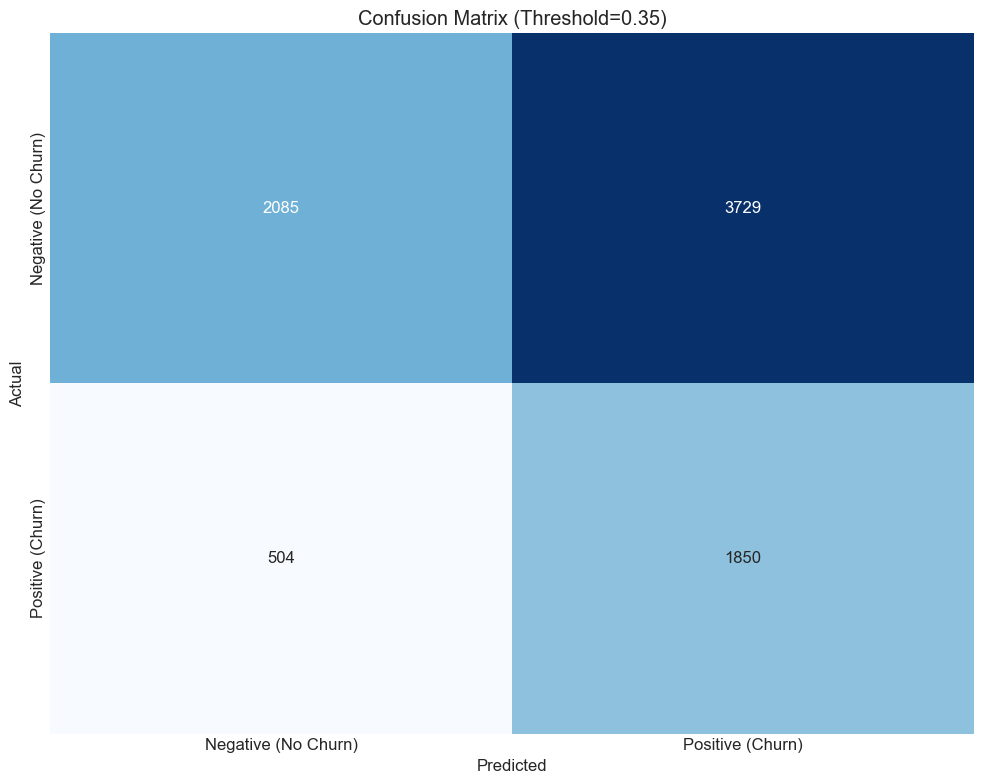

2025-03-19 21:17:43,333 - training_pipeline - INFO - Classification Report:
              precision    recall  f1-score      support
0              0.805330  0.358617  0.496251  5814.000000
1              0.331601  0.785896  0.466406  2354.000000
accuracy       0.481758  0.481758  0.481758     0.481758
macro avg      0.568465  0.572257  0.481329  8168.000000
weighted avg   0.668802  0.481758  0.487650  8168.000000


  1/256 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step

 88/256 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step

172/256 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step


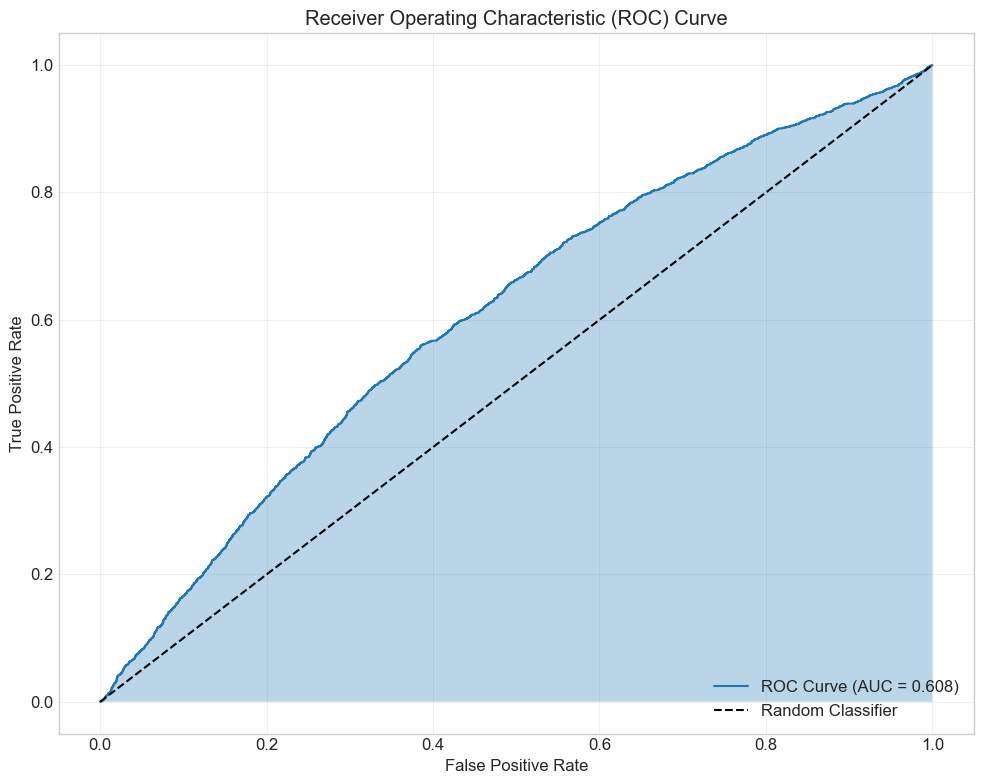

  1/256 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step

 84/256 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step

166/256 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step

251/256 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step


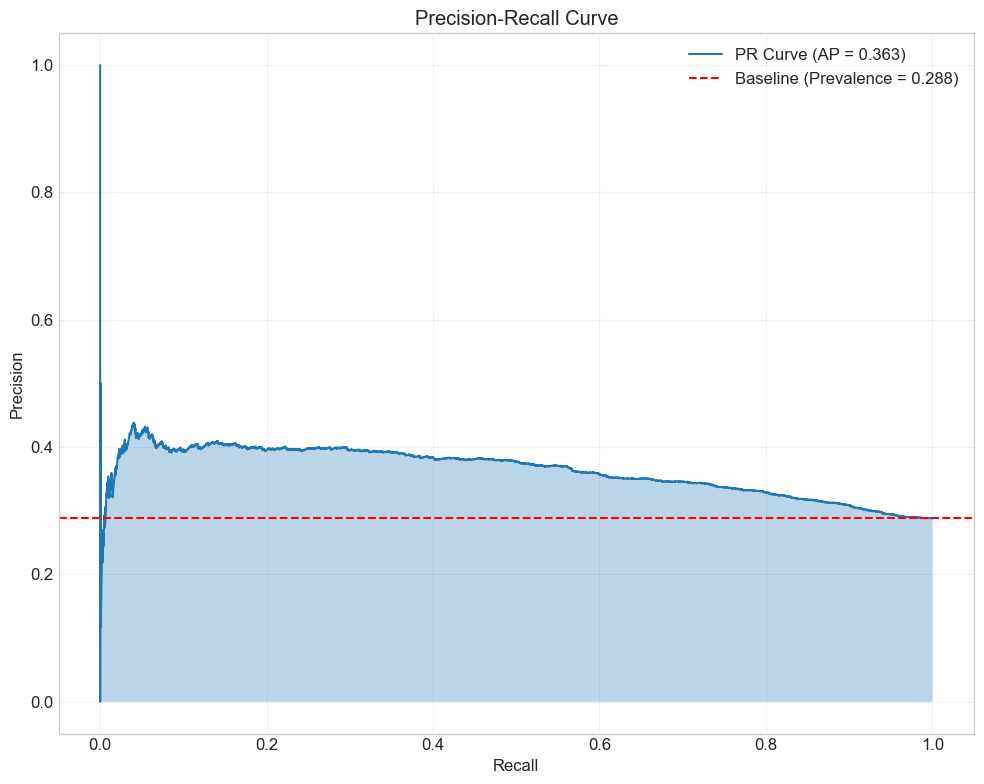

  1/256 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step

 85/256 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step

168/256 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step

254/256 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step


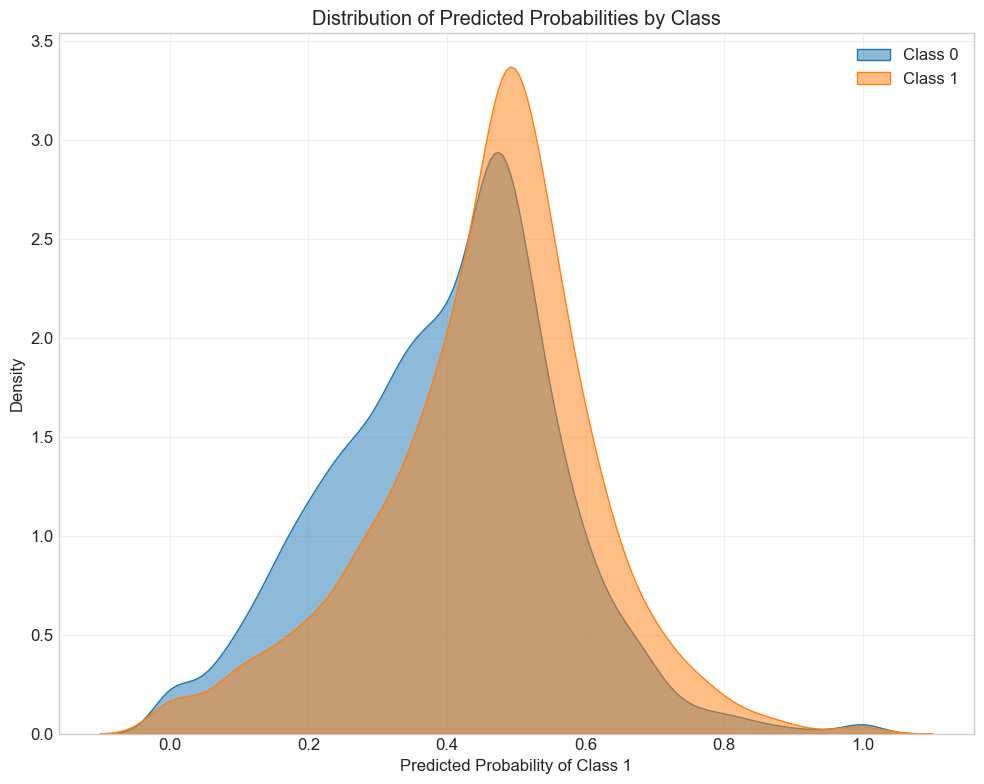

2025-03-19 21:17:44,902 - training_pipeline - INFO - Plotting feature importance...


2025-03-19 21:17:44,919 - training_pipeline - WARNING - Could not plot feature importance: The 'estimator' parameter of permutation_importance must be an object implementing 'fit'. Got <function NeuralNetworkModel.plot_feature_importance.<locals>.predict_fn at 0x00000124DEA59940> instead.


2025-03-19 21:17:44,923 - training_pipeline - INFO - Saving model...


2025-03-19 21:17:44,960 - training_pipeline - INFO - Saving training history...


2025-03-19 21:17:44,962 - training_pipeline - INFO - Training history saved to models\NeuralNetwork_Churn_Predictor_history_20250319_211744.joblib


2025-03-19 21:17:44,963 - training_pipeline - INFO - Training pipeline completed in 192.53 seconds


Model saved to models\NeuralNetwork_Churn_Predictor


In [7]:
# Run the training pipeline for Neural Network
nn_results = nn_trainer.run_training_pipeline(
    X_train, y_train,
    tune_hyperparameters=False,
    tune_threshold=True,
    cross_validate=True,
    cv=5,
    save_model=True,
    save_history=True,
    plot_cm=True,
    plot_roc=True,
    plot_pr=True,
    plot_prob_dist=True,
    plot_importance=True,  # Will use permutation importance
    importance_top_n=20,
    threshold_metric='f1',
    train_params={
        'validation_split': 0.2,
        'verbose': 1
    }
)

## 7. Compare Models

2025-03-19 21:17:44,992 - training_pipeline - INFO - Training and evaluating XGBoost_Churn_Predictor...


2025-03-19 21:17:44,992 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:17:44,993 - training_pipeline - INFO - Original class distribution: {0: 7268, 1: 2942}


2025-03-19 21:17:45,318 - training_pipeline - INFO - Resampled class distribution: {0: 7268, 1: 3634}


2025-03-19 21:17:45,319 - training_pipeline - INFO - Training XGBoost_Churn_Predictor...


Set scale_pos_weight to 2.0 based on class distribution


C:\Users\alex5\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


2025-03-19 21:17:46,304 - training_pipeline - INFO - Training completed in 0.98 seconds


2025-03-19 21:17:46,305 - training_pipeline - INFO - Evaluating XGBoost_Churn_Predictor...


2025-03-19 21:17:46,386 - training_pipeline - INFO - Evaluation metrics: {'accuracy': 0.7778648383937317, 'precision': 0.5945566778900112, 'recall': 0.7202583276682529, 'f1': 0.651398708884107, 'threshold': 0.5, 'auc': 0.8470495625011458, 'average_precision': 0.6989819364942824}


2025-03-19 21:17:46,387 - training_pipeline - INFO - Training and evaluating LightGBM_Churn_Predictor...


2025-03-19 21:17:46,388 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:17:46,389 - training_pipeline - INFO - Original class distribution: {0: 7268, 1: 2942}


2025-03-19 21:17:46,697 - training_pipeline - INFO - Resampled class distribution: {0: 7268, 1: 3634}


2025-03-19 21:17:46,701 - training_pipeline - INFO - Training LightGBM_Churn_Predictor...


[LightGBM] [Info] Number of positive: 3634, number of negative: 7268
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10499
[LightGBM] [Info] Number of data points in the train set: 10902, number of used features: 220
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147


2025-03-19 21:17:47,006 - training_pipeline - INFO - Training completed in 0.30 seconds


2025-03-19 21:17:47,007 - training_pipeline - INFO - Evaluating LightGBM_Churn_Predictor...


2025-03-19 21:17:47,078 - training_pipeline - INFO - Evaluation metrics: {'accuracy': 0.820568070519099, 'precision': 0.9342723004694836, 'recall': 0.40584636301835486, 'f1': 0.5658767772511848, 'threshold': 0.5, 'auc': 0.9308165535334202, 'average_precision': 0.858744376292355}


2025-03-19 21:17:47,079 - training_pipeline - INFO - Training and evaluating NeuralNetwork_Churn_Predictor...


2025-03-19 21:17:47,080 - training_pipeline - INFO - Applying resampling strategy: smote


2025-03-19 21:17:47,081 - training_pipeline - INFO - Original class distribution: {0: 7268, 1: 2942}


2025-03-19 21:17:47,379 - training_pipeline - INFO - Resampled class distribution: {0: 7268, 1: 3634}


2025-03-19 21:17:47,383 - training_pipeline - INFO - Training NeuralNetwork_Churn_Predictor...


Epoch 1/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 1:54 839ms/step - accuracy: 0.6406 - auc: 0.6795 - loss: 0.5301 - precision: 0.2381 - recall: 0.4167

 30/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6240 - auc: 0.5960 - loss: 0.6779 - precision: 0.3245 - recall: 0.3909    

 58/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6271 - auc: 0.5971 - loss: 0.6881 - precision: 0.3437 - recall: 0.3983

 87/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6258 - auc: 0.5952 - loss: 0.6940 - precision: 0.3479 - recall: 0.4027

116/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6248 - auc: 0.5935 - loss: 0.6976 - precision: 0.3486 - recall: 0.4051

137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6245 - auc: 0.5928 - loss: 0.6998 - precision: 0.3501 - recall: 0.4061 - val_accuracy: 0.5497 - val_auc: 0.6011 - val_loss: 0.7229 - val_precision: 0.6117 - val_recall: 0.3775 - learning_rate: 1.5625e-05


Epoch 2/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7656 - auc: 0.7997 - loss: 0.5203 - precision: 0.4286 - recall: 0.7500

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6415 - auc: 0.6084 - loss: 0.6595 - precision: 0.3498 - recall: 0.4176 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6405 - auc: 0.6074 - loss: 0.6697 - precision: 0.3648 - recall: 0.4220

 92/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6381 - auc: 0.6050 - loss: 0.6769 - precision: 0.3664 - recall: 0.4246

123/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - auc: 0.6031 - loss: 0.6817 - precision: 0.3664 - recall: 0.4241

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6363 - auc: 0.6027 - loss: 0.6837 - precision: 0.3672 - recall: 0.4240 - val_accuracy: 0.5470 - val_auc: 0.6012 - val_loss: 0.7189 - val_precision: 0.6089 - val_recall: 0.3705 - learning_rate: 1.5625e-05


Epoch 3/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7188 - auc: 0.7332 - loss: 0.5533 - precision: 0.3750 - recall: 0.7500

 29/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6356 - auc: 0.5837 - loss: 0.6891 - precision: 0.3388 - recall: 0.4092 

 57/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6329 - auc: 0.5857 - loss: 0.6919 - precision: 0.3495 - recall: 0.4020

 87/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6303 - auc: 0.5865 - loss: 0.6939 - precision: 0.3520 - recall: 0.4023

115/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6297 - auc: 0.5867 - loss: 0.6953 - precision: 0.3529 - recall: 0.4032

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6299 - auc: 0.5871 - loss: 0.6966 - precision: 0.3551 - recall: 0.4042 - val_accuracy: 0.5470 - val_auc: 0.6017 - val_loss: 0.7153 - val_precision: 0.6115 - val_recall: 0.3635 - learning_rate: 1.5625e-05


Epoch 4/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6719 - auc: 0.7091 - loss: 0.5487 - precision: 0.3043 - recall: 0.5833

 27/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6240 - auc: 0.5790 - loss: 0.6698 - precision: 0.3158 - recall: 0.3750 

 53/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - auc: 0.5834 - loss: 0.6746 - precision: 0.3298 - recall: 0.3746

 81/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6219 - auc: 0.5845 - loss: 0.6779 - precision: 0.3357 - recall: 0.3769

111/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6214 - auc: 0.5849 - loss: 0.6808 - precision: 0.3370 - recall: 0.3785

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6219 - auc: 0.5856 - loss: 0.6832 - precision: 0.3399 - recall: 0.3800 - val_accuracy: 0.5461 - val_auc: 0.6024 - val_loss: 0.7126 - val_precision: 0.6114 - val_recall: 0.3591 - learning_rate: 1.5625e-05


Epoch 5/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6406 - auc: 0.6771 - loss: 0.5620 - precision: 0.2800 - recall: 0.5833

 29/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6278 - auc: 0.5646 - loss: 0.6786 - precision: 0.3258 - recall: 0.3885 

 60/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6303 - auc: 0.5771 - loss: 0.6787 - precision: 0.3446 - recall: 0.3882

 89/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6308 - auc: 0.5821 - loss: 0.6802 - precision: 0.3499 - recall: 0.3902

120/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6314 - auc: 0.5845 - loss: 0.6817 - precision: 0.3525 - recall: 0.3917

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6321 - auc: 0.5859 - loss: 0.6827 - precision: 0.3551 - recall: 0.3932 - val_accuracy: 0.5429 - val_auc: 0.6026 - val_loss: 0.7103 - val_precision: 0.6086 - val_recall: 0.3494 - learning_rate: 1.5625e-05


Epoch 6/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7188 - auc: 0.6242 - loss: 0.5557 - precision: 0.3500 - recall: 0.5833

 28/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - auc: 0.5651 - loss: 0.6784 - precision: 0.3181 - recall: 0.3679 

 56/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6276 - auc: 0.5756 - loss: 0.6805 - precision: 0.3354 - recall: 0.3723

 86/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6271 - auc: 0.5795 - loss: 0.6825 - precision: 0.3419 - recall: 0.3778

114/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6270 - auc: 0.5806 - loss: 0.6843 - precision: 0.3435 - recall: 0.3796

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6273 - auc: 0.5820 - loss: 0.6858 - precision: 0.3463 - recall: 0.3818 - val_accuracy: 0.5410 - val_auc: 0.6030 - val_loss: 0.7082 - val_precision: 0.6092 - val_recall: 0.3380 - learning_rate: 1.5625e-05


Epoch 7/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6875 - auc: 0.6370 - loss: 0.5775 - precision: 0.2778 - recall: 0.4167

 25/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6345 - auc: 0.5844 - loss: 0.6524 - precision: 0.3302 - recall: 0.3904 

 51/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6334 - auc: 0.5854 - loss: 0.6624 - precision: 0.3456 - recall: 0.3915

 77/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - auc: 0.5868 - loss: 0.6674 - precision: 0.3519 - recall: 0.3921

104/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6323 - auc: 0.5871 - loss: 0.6705 - precision: 0.3527 - recall: 0.3927

133/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - auc: 0.5885 - loss: 0.6723 - precision: 0.3562 - recall: 0.3940

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6334 - auc: 0.5889 - loss: 0.6726 - precision: 0.3569 - recall: 0.3942 - val_accuracy: 0.5387 - val_auc: 0.6037 - val_loss: 0.7066 - val_precision: 0.6067 - val_recall: 0.3319 - learning_rate: 1.5625e-05


Epoch 8/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7344 - auc: 0.7540 - loss: 0.5258 - precision: 0.3684 - recall: 0.5833

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - auc: 0.5810 - loss: 0.6743 - precision: 0.3298 - recall: 0.3773 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - auc: 0.5839 - loss: 0.6771 - precision: 0.3447 - recall: 0.3735

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6328 - auc: 0.5853 - loss: 0.6779 - precision: 0.3480 - recall: 0.3749

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6336 - auc: 0.5862 - loss: 0.6789 - precision: 0.3512 - recall: 0.3763

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6339 - auc: 0.5868 - loss: 0.6795 - precision: 0.3527 - recall: 0.3767 - val_accuracy: 0.5397 - val_auc: 0.6038 - val_loss: 0.7050 - val_precision: 0.6098 - val_recall: 0.3292 - learning_rate: 1.5625e-05


Epoch 9/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7656 - auc: 0.7492 - loss: 0.5358 - precision: 0.4286 - recall: 0.7500

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6593 - auc: 0.6056 - loss: 0.6616 - precision: 0.3687 - recall: 0.4077 

 64/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6512 - auc: 0.6040 - loss: 0.6644 - precision: 0.3716 - recall: 0.3954

 96/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - auc: 0.6021 - loss: 0.6667 - precision: 0.3703 - recall: 0.3944

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6446 - auc: 0.6003 - loss: 0.6691 - precision: 0.3683 - recall: 0.3920

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - auc: 0.6000 - loss: 0.6698 - precision: 0.3685 - recall: 0.3915 - val_accuracy: 0.5392 - val_auc: 0.6037 - val_loss: 0.7037 - val_precision: 0.6102 - val_recall: 0.3257 - learning_rate: 1.5625e-05


Epoch 10/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6562 - auc: 0.6266 - loss: 0.5559 - precision: 0.2222 - recall: 0.3333

 33/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6371 - auc: 0.5804 - loss: 0.6561 - precision: 0.3355 - recall: 0.3757 

 64/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6353 - auc: 0.5836 - loss: 0.6616 - precision: 0.3476 - recall: 0.3748

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6339 - auc: 0.5853 - loss: 0.6646 - precision: 0.3494 - recall: 0.3752

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6331 - auc: 0.5860 - loss: 0.6668 - precision: 0.3502 - recall: 0.3752

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - auc: 0.5866 - loss: 0.6676 - precision: 0.3512 - recall: 0.3755 - val_accuracy: 0.5383 - val_auc: 0.6043 - val_loss: 0.7025 - val_precision: 0.6100 - val_recall: 0.3213 - learning_rate: 1.5625e-05


Epoch 11/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6719 - auc: 0.6659 - loss: 0.5818 - precision: 0.3043 - recall: 0.5833

 33/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6460 - auc: 0.5714 - loss: 0.6697 - precision: 0.3445 - recall: 0.3703 

 64/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6455 - auc: 0.5799 - loss: 0.6730 - precision: 0.3605 - recall: 0.3764

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - auc: 0.5820 - loss: 0.6741 - precision: 0.3601 - recall: 0.3786

127/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - auc: 0.5839 - loss: 0.6749 - precision: 0.3610 - recall: 0.3804

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - auc: 0.5846 - loss: 0.6750 - precision: 0.3620 - recall: 0.3810 - val_accuracy: 0.5383 - val_auc: 0.6045 - val_loss: 0.7014 - val_precision: 0.6111 - val_recall: 0.3187 - learning_rate: 1.5625e-05


Epoch 12/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6719 - auc: 0.6450 - loss: 0.5586 - precision: 0.2632 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6342 - auc: 0.5762 - loss: 0.6723 - precision: 0.3240 - recall: 0.3513 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6345 - auc: 0.5824 - loss: 0.6728 - precision: 0.3404 - recall: 0.3546

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6349 - auc: 0.5849 - loss: 0.6726 - precision: 0.3462 - recall: 0.3599

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6355 - auc: 0.5864 - loss: 0.6732 - precision: 0.3497 - recall: 0.3634

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6357 - auc: 0.5870 - loss: 0.6736 - precision: 0.3512 - recall: 0.3640 - val_accuracy: 0.5360 - val_auc: 0.6049 - val_loss: 0.7005 - val_precision: 0.6085 - val_recall: 0.3126 - learning_rate: 1.5625e-05


Epoch 13/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7031 - auc: 0.6979 - loss: 0.5675 - precision: 0.3333 - recall: 0.5833

 33/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6388 - auc: 0.5943 - loss: 0.6587 - precision: 0.3324 - recall: 0.3606 

 64/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - auc: 0.6002 - loss: 0.6618 - precision: 0.3551 - recall: 0.3674

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - auc: 0.6000 - loss: 0.6632 - precision: 0.3587 - recall: 0.3703

127/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6422 - auc: 0.6000 - loss: 0.6642 - precision: 0.3609 - recall: 0.3732

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6423 - auc: 0.6002 - loss: 0.6645 - precision: 0.3622 - recall: 0.3741 - val_accuracy: 0.5360 - val_auc: 0.6054 - val_loss: 0.6996 - val_precision: 0.6093 - val_recall: 0.3108 - learning_rate: 1.5625e-05


Epoch 14/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6719 - auc: 0.6562 - loss: 0.5690 - precision: 0.2857 - recall: 0.5000

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6477 - auc: 0.5841 - loss: 0.6501 - precision: 0.3428 - recall: 0.3594 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6486 - auc: 0.5934 - loss: 0.6547 - precision: 0.3611 - recall: 0.3651

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6455 - auc: 0.5935 - loss: 0.6570 - precision: 0.3612 - recall: 0.3659

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6435 - auc: 0.5928 - loss: 0.6587 - precision: 0.3605 - recall: 0.3661

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6430 - auc: 0.5929 - loss: 0.6594 - precision: 0.3611 - recall: 0.3663 - val_accuracy: 0.5337 - val_auc: 0.6055 - val_loss: 0.6988 - val_precision: 0.6066 - val_recall: 0.3047 - learning_rate: 1.5625e-05


Epoch 15/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8125 - auc: 0.7917 - loss: 0.5345 - precision: 0.5000 - recall: 0.7500

 33/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - auc: 0.6130 - loss: 0.6419 - precision: 0.3739 - recall: 0.3880 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - auc: 0.6088 - loss: 0.6495 - precision: 0.3734 - recall: 0.3739

 90/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - auc: 0.6058 - loss: 0.6525 - precision: 0.3708 - recall: 0.3709

118/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - auc: 0.6039 - loss: 0.6548 - precision: 0.3690 - recall: 0.3695

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6488 - auc: 0.6034 - loss: 0.6563 - precision: 0.3691 - recall: 0.3692 - val_accuracy: 0.5309 - val_auc: 0.6056 - val_loss: 0.6981 - val_precision: 0.6036 - val_recall: 0.2968 - learning_rate: 1.5625e-05


Epoch 16/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6406 - auc: 0.5986 - loss: 0.5837 - precision: 0.2105 - recall: 0.3333

 28/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - auc: 0.5821 - loss: 0.6574 - precision: 0.3023 - recall: 0.3186 

 57/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - auc: 0.5935 - loss: 0.6570 - precision: 0.3311 - recall: 0.3344

 87/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6348 - auc: 0.5957 - loss: 0.6590 - precision: 0.3408 - recall: 0.3427

118/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6363 - auc: 0.5959 - loss: 0.6608 - precision: 0.3456 - recall: 0.3475

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6374 - auc: 0.5964 - loss: 0.6617 - precision: 0.3493 - recall: 0.3499 - val_accuracy: 0.5323 - val_auc: 0.6061 - val_loss: 0.6974 - val_precision: 0.6076 - val_recall: 0.2950 - learning_rate: 1.5625e-05


Epoch 17/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7188 - auc: 0.6418 - loss: 0.5660 - precision: 0.2857 - recall: 0.3333

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - auc: 0.5814 - loss: 0.6464 - precision: 0.3457 - recall: 0.3479 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - auc: 0.5884 - loss: 0.6503 - precision: 0.3607 - recall: 0.3476

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - auc: 0.5903 - loss: 0.6532 - precision: 0.3618 - recall: 0.3514

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6479 - auc: 0.5914 - loss: 0.6554 - precision: 0.3629 - recall: 0.3541

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6479 - auc: 0.5922 - loss: 0.6562 - precision: 0.3644 - recall: 0.3555 - val_accuracy: 0.5309 - val_auc: 0.6060 - val_loss: 0.6969 - val_precision: 0.6066 - val_recall: 0.2897 - learning_rate: 1.5625e-05


Epoch 18/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7500 - auc: 0.6683 - loss: 0.5675 - precision: 0.3889 - recall: 0.5833

 28/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - auc: 0.5759 - loss: 0.6422 - precision: 0.3197 - recall: 0.3179 

 55/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6446 - auc: 0.5892 - loss: 0.6465 - precision: 0.3423 - recall: 0.3322

 81/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6436 - auc: 0.5921 - loss: 0.6498 - precision: 0.3496 - recall: 0.3396

108/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6436 - auc: 0.5925 - loss: 0.6529 - precision: 0.3521 - recall: 0.3431

134/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6441 - auc: 0.5929 - loss: 0.6555 - precision: 0.3556 - recall: 0.3455

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6441 - auc: 0.5930 - loss: 0.6558 - precision: 0.3562 - recall: 0.3458 - val_accuracy: 0.5305 - val_auc: 0.6069 - val_loss: 0.6962 - val_precision: 0.6071 - val_recall: 0.2862 - learning_rate: 1.5625e-05


Epoch 19/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6875 - auc: 0.6675 - loss: 0.5560 - precision: 0.2778 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - auc: 0.5839 - loss: 0.6538 - precision: 0.3206 - recall: 0.3186 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6417 - auc: 0.5879 - loss: 0.6570 - precision: 0.3392 - recall: 0.3222

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6424 - auc: 0.5896 - loss: 0.6585 - precision: 0.3461 - recall: 0.3285

127/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - auc: 0.5903 - loss: 0.6597 - precision: 0.3492 - recall: 0.3314

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - auc: 0.5907 - loss: 0.6602 - precision: 0.3506 - recall: 0.3323 - val_accuracy: 0.5309 - val_auc: 0.6071 - val_loss: 0.6956 - val_precision: 0.6090 - val_recall: 0.2845 - learning_rate: 1.5625e-05


Epoch 20/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6719 - auc: 0.6554 - loss: 0.5571 - precision: 0.2353 - recall: 0.3333

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6509 - auc: 0.5898 - loss: 0.6477 - precision: 0.3380 - recall: 0.3314 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6508 - auc: 0.5921 - loss: 0.6538 - precision: 0.3556 - recall: 0.3368

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - auc: 0.5918 - loss: 0.6565 - precision: 0.3586 - recall: 0.3400

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6490 - auc: 0.5919 - loss: 0.6578 - precision: 0.3610 - recall: 0.3426

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - auc: 0.5924 - loss: 0.6583 - precision: 0.3627 - recall: 0.3437 - val_accuracy: 0.5291 - val_auc: 0.6074 - val_loss: 0.6951 - val_precision: 0.6061 - val_recall: 0.2809 - learning_rate: 1.5625e-05


Epoch 21/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6719 - auc: 0.6242 - loss: 0.5642 - precision: 0.2632 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - auc: 0.5854 - loss: 0.6501 - precision: 0.3349 - recall: 0.3526 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6469 - auc: 0.5938 - loss: 0.6553 - precision: 0.3579 - recall: 0.3594

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - auc: 0.5958 - loss: 0.6578 - precision: 0.3628 - recall: 0.3615

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - auc: 0.5962 - loss: 0.6590 - precision: 0.3649 - recall: 0.3614

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6481 - auc: 0.5968 - loss: 0.6594 - precision: 0.3667 - recall: 0.3615 - val_accuracy: 0.5305 - val_auc: 0.6075 - val_loss: 0.6945 - val_precision: 0.6095 - val_recall: 0.2809 - learning_rate: 1.5625e-05


Epoch 22/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7188 - auc: 0.6338 - loss: 0.5742 - precision: 0.3125 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - auc: 0.5925 - loss: 0.6491 - precision: 0.3407 - recall: 0.3298 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - auc: 0.6002 - loss: 0.6539 - precision: 0.3652 - recall: 0.3414

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - auc: 0.6005 - loss: 0.6558 - precision: 0.3673 - recall: 0.3437

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - auc: 0.6000 - loss: 0.6578 - precision: 0.3683 - recall: 0.3441

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - auc: 0.6000 - loss: 0.6587 - precision: 0.3692 - recall: 0.3444 - val_accuracy: 0.5305 - val_auc: 0.6077 - val_loss: 0.6940 - val_precision: 0.6108 - val_recall: 0.2783 - learning_rate: 1.5625e-05


Epoch 23/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7188 - auc: 0.6723 - loss: 0.5456 - precision: 0.3333 - recall: 0.5000

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - auc: 0.6028 - loss: 0.6383 - precision: 0.3590 - recall: 0.3684 

 64/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6590 - auc: 0.6067 - loss: 0.6434 - precision: 0.3751 - recall: 0.3616

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6565 - auc: 0.6051 - loss: 0.6469 - precision: 0.3739 - recall: 0.3567

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6553 - auc: 0.6035 - loss: 0.6495 - precision: 0.3733 - recall: 0.3532

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - auc: 0.6034 - loss: 0.6502 - precision: 0.3739 - recall: 0.3526 - val_accuracy: 0.5300 - val_auc: 0.6078 - val_loss: 0.6936 - val_precision: 0.6105 - val_recall: 0.2766 - learning_rate: 1.5625e-05


Epoch 24/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6719 - auc: 0.7019 - loss: 0.5550 - precision: 0.3043 - recall: 0.5833

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6514 - auc: 0.5877 - loss: 0.6449 - precision: 0.3413 - recall: 0.3423 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6480 - auc: 0.5900 - loss: 0.6499 - precision: 0.3520 - recall: 0.3377

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6471 - auc: 0.5901 - loss: 0.6514 - precision: 0.3550 - recall: 0.3382

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6477 - auc: 0.5909 - loss: 0.6523 - precision: 0.3580 - recall: 0.3389

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6480 - auc: 0.5914 - loss: 0.6529 - precision: 0.3598 - recall: 0.3393 - val_accuracy: 0.5291 - val_auc: 0.6076 - val_loss: 0.6933 - val_precision: 0.6094 - val_recall: 0.2739 - learning_rate: 1.5625e-05


Epoch 25/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7344 - auc: 0.7011 - loss: 0.5372 - precision: 0.3529 - recall: 0.5000

 26/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - auc: 0.6082 - loss: 0.6276 - precision: 0.3512 - recall: 0.3346 

 53/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - auc: 0.6057 - loss: 0.6388 - precision: 0.3600 - recall: 0.3294

 80/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - auc: 0.6040 - loss: 0.6437 - precision: 0.3625 - recall: 0.3294

106/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - auc: 0.6028 - loss: 0.6455 - precision: 0.3619 - recall: 0.3298

132/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.6028 - loss: 0.6472 - precision: 0.3641 - recall: 0.3313

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6532 - auc: 0.6029 - loss: 0.6475 - precision: 0.3648 - recall: 0.3317 - val_accuracy: 0.5296 - val_auc: 0.6079 - val_loss: 0.6930 - val_precision: 0.6114 - val_recall: 0.2722 - learning_rate: 1.5625e-05


Epoch 26/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5938 - auc: 0.5080 - loss: 0.5979 - precision: 0.1111 - recall: 0.1667

 30/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6472 - auc: 0.5705 - loss: 0.6435 - precision: 0.3250 - recall: 0.3077 

 61/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - auc: 0.5820 - loss: 0.6484 - precision: 0.3470 - recall: 0.3146

 91/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6486 - auc: 0.5842 - loss: 0.6506 - precision: 0.3515 - recall: 0.3174

123/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6486 - auc: 0.5855 - loss: 0.6520 - precision: 0.3542 - recall: 0.3205

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6488 - auc: 0.5863 - loss: 0.6527 - precision: 0.3562 - recall: 0.3216 - val_accuracy: 0.5273 - val_auc: 0.6083 - val_loss: 0.6927 - val_precision: 0.6080 - val_recall: 0.2669 - learning_rate: 1.5625e-05


Epoch 27/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7500 - auc: 0.7500 - loss: 0.5427 - precision: 0.3889 - recall: 0.5833

 33/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - auc: 0.5996 - loss: 0.6347 - precision: 0.3584 - recall: 0.3368 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - auc: 0.6012 - loss: 0.6425 - precision: 0.3676 - recall: 0.3298

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6580 - auc: 0.6006 - loss: 0.6458 - precision: 0.3679 - recall: 0.3301

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - auc: 0.6001 - loss: 0.6478 - precision: 0.3688 - recall: 0.3310

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6568 - auc: 0.6001 - loss: 0.6486 - precision: 0.3699 - recall: 0.3312 - val_accuracy: 0.5264 - val_auc: 0.6088 - val_loss: 0.6925 - val_precision: 0.6073 - val_recall: 0.2634 - learning_rate: 1.5625e-05


Epoch 28/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6562 - auc: 0.6482 - loss: 0.5617 - precision: 0.2222 - recall: 0.3333

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6520 - auc: 0.5722 - loss: 0.6477 - precision: 0.3280 - recall: 0.2970 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6555 - auc: 0.5847 - loss: 0.6512 - precision: 0.3536 - recall: 0.3082

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6553 - auc: 0.5896 - loss: 0.6517 - precision: 0.3597 - recall: 0.3142

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6559 - auc: 0.5924 - loss: 0.6522 - precision: 0.3635 - recall: 0.3173

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6559 - auc: 0.5934 - loss: 0.6526 - precision: 0.3651 - recall: 0.3180 - val_accuracy: 0.5254 - val_auc: 0.6090 - val_loss: 0.6921 - val_precision: 0.6066 - val_recall: 0.2599 - learning_rate: 1.5625e-05


Epoch 29/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6875 - auc: 0.6755 - loss: 0.5627 - precision: 0.3000 - recall: 0.5000

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - auc: 0.5805 - loss: 0.6406 - precision: 0.3385 - recall: 0.3212 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6543 - auc: 0.5884 - loss: 0.6446 - precision: 0.3540 - recall: 0.3137

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6540 - auc: 0.5910 - loss: 0.6459 - precision: 0.3576 - recall: 0.3135

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - auc: 0.5921 - loss: 0.6474 - precision: 0.3590 - recall: 0.3139

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - auc: 0.5923 - loss: 0.6481 - precision: 0.3597 - recall: 0.3138 - val_accuracy: 0.5254 - val_auc: 0.6096 - val_loss: 0.6919 - val_precision: 0.6079 - val_recall: 0.2572 - learning_rate: 1.5625e-05


Epoch 30/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7031 - auc: 0.6739 - loss: 0.5668 - precision: 0.3158 - recall: 0.5000

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6620 - auc: 0.5844 - loss: 0.6440 - precision: 0.3454 - recall: 0.3118 

 61/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6607 - auc: 0.5938 - loss: 0.6480 - precision: 0.3630 - recall: 0.3161

 91/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6593 - auc: 0.5962 - loss: 0.6500 - precision: 0.3672 - recall: 0.3209

121/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - auc: 0.5968 - loss: 0.6514 - precision: 0.3681 - recall: 0.3224

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - auc: 0.5974 - loss: 0.6522 - precision: 0.3701 - recall: 0.3236 - val_accuracy: 0.5259 - val_auc: 0.6097 - val_loss: 0.6915 - val_precision: 0.6101 - val_recall: 0.2555 - learning_rate: 1.5625e-05


Epoch 31/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6562 - auc: 0.6290 - loss: 0.5793 - precision: 0.2222 - recall: 0.3333

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - auc: 0.5911 - loss: 0.6417 - precision: 0.3428 - recall: 0.3120 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6569 - auc: 0.5991 - loss: 0.6445 - precision: 0.3563 - recall: 0.3099

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - auc: 0.6024 - loss: 0.6457 - precision: 0.3600 - recall: 0.3137

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6553 - auc: 0.6038 - loss: 0.6465 - precision: 0.3624 - recall: 0.3165

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6554 - auc: 0.6046 - loss: 0.6468 - precision: 0.3640 - recall: 0.3175 - val_accuracy: 0.5241 - val_auc: 0.6096 - val_loss: 0.6913 - val_precision: 0.6072 - val_recall: 0.2511 - learning_rate: 1.5625e-05


Epoch 32/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7500 - auc: 0.6731 - loss: 0.5569 - precision: 0.3750 - recall: 0.5000

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - auc: 0.5978 - loss: 0.6378 - precision: 0.3465 - recall: 0.3174 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6593 - auc: 0.6014 - loss: 0.6450 - precision: 0.3615 - recall: 0.3159

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6588 - auc: 0.6032 - loss: 0.6463 - precision: 0.3656 - recall: 0.3172

127/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - auc: 0.6034 - loss: 0.6474 - precision: 0.3681 - recall: 0.3171

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - auc: 0.6037 - loss: 0.6480 - precision: 0.3695 - recall: 0.3172 - val_accuracy: 0.5232 - val_auc: 0.6103 - val_loss: 0.6910 - val_precision: 0.6060 - val_recall: 0.2485 - learning_rate: 1.5625e-05


Epoch 33/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7969 - auc: 0.7276 - loss: 0.5529 - precision: 0.4667 - recall: 0.5833

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - auc: 0.5914 - loss: 0.6423 - precision: 0.3496 - recall: 0.3133 

 64/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6607 - auc: 0.5952 - loss: 0.6474 - precision: 0.3613 - recall: 0.3098

 96/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6584 - auc: 0.5954 - loss: 0.6489 - precision: 0.3624 - recall: 0.3105

127/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6576 - auc: 0.5962 - loss: 0.6497 - precision: 0.3636 - recall: 0.3109

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6574 - auc: 0.5967 - loss: 0.6501 - precision: 0.3646 - recall: 0.3110 - val_accuracy: 0.5227 - val_auc: 0.6108 - val_loss: 0.6908 - val_precision: 0.6056 - val_recall: 0.2467 - learning_rate: 1.5625e-05


Epoch 34/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7500 - auc: 0.7212 - loss: 0.5509 - precision: 0.3571 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - auc: 0.5895 - loss: 0.6380 - precision: 0.3362 - recall: 0.2956 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - auc: 0.5967 - loss: 0.6437 - precision: 0.3556 - recall: 0.3026

 92/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - auc: 0.5991 - loss: 0.6454 - precision: 0.3621 - recall: 0.3073

123/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - auc: 0.6004 - loss: 0.6465 - precision: 0.3650 - recall: 0.3106

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - auc: 0.6013 - loss: 0.6470 - precision: 0.3671 - recall: 0.3119 - val_accuracy: 0.5218 - val_auc: 0.6109 - val_loss: 0.6906 - val_precision: 0.6043 - val_recall: 0.2441 - learning_rate: 1.5625e-05


Epoch 35/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7031 - auc: 0.6907 - loss: 0.5550 - precision: 0.3158 - recall: 0.5000

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - auc: 0.6048 - loss: 0.6373 - precision: 0.3561 - recall: 0.3207 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - auc: 0.6084 - loss: 0.6421 - precision: 0.3709 - recall: 0.3180

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6629 - auc: 0.6090 - loss: 0.6447 - precision: 0.3724 - recall: 0.3192

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - auc: 0.6086 - loss: 0.6467 - precision: 0.3732 - recall: 0.3208

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6614 - auc: 0.6085 - loss: 0.6475 - precision: 0.3742 - recall: 0.3213 - val_accuracy: 0.5218 - val_auc: 0.6111 - val_loss: 0.6903 - val_precision: 0.6053 - val_recall: 0.2423 - learning_rate: 1.5625e-05


Epoch 36/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7031 - auc: 0.6675 - loss: 0.5653 - precision: 0.3333 - recall: 0.5833

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - auc: 0.5895 - loss: 0.6385 - precision: 0.3639 - recall: 0.3339 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - auc: 0.5967 - loss: 0.6434 - precision: 0.3800 - recall: 0.3301

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6665 - auc: 0.5987 - loss: 0.6449 - precision: 0.3806 - recall: 0.3282

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6656 - auc: 0.6001 - loss: 0.6457 - precision: 0.3810 - recall: 0.3269

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6654 - auc: 0.6008 - loss: 0.6461 - precision: 0.3821 - recall: 0.3266 - val_accuracy: 0.5213 - val_auc: 0.6113 - val_loss: 0.6902 - val_precision: 0.6044 - val_recall: 0.2414 - learning_rate: 1.5625e-05


Epoch 37/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7031 - auc: 0.6715 - loss: 0.5558 - precision: 0.2941 - recall: 0.4167

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6631 - auc: 0.5935 - loss: 0.6357 - precision: 0.3416 - recall: 0.2976 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - auc: 0.5994 - loss: 0.6433 - precision: 0.3593 - recall: 0.3036

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6604 - auc: 0.6024 - loss: 0.6454 - precision: 0.3647 - recall: 0.3076

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6607 - auc: 0.6042 - loss: 0.6464 - precision: 0.3685 - recall: 0.3111

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - auc: 0.6050 - loss: 0.6469 - precision: 0.3707 - recall: 0.3122 - val_accuracy: 0.5222 - val_auc: 0.6116 - val_loss: 0.6900 - val_precision: 0.6085 - val_recall: 0.2388 - learning_rate: 1.5625e-05


Epoch 38/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7812 - auc: 0.7131 - loss: 0.5583 - precision: 0.4286 - recall: 0.5000

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - auc: 0.6042 - loss: 0.6333 - precision: 0.3575 - recall: 0.2996 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - auc: 0.6091 - loss: 0.6385 - precision: 0.3727 - recall: 0.3069

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - auc: 0.6099 - loss: 0.6409 - precision: 0.3741 - recall: 0.3103

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - auc: 0.6099 - loss: 0.6423 - precision: 0.3742 - recall: 0.3107

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - auc: 0.6103 - loss: 0.6429 - precision: 0.3752 - recall: 0.3113 - val_accuracy: 0.5209 - val_auc: 0.6119 - val_loss: 0.6899 - val_precision: 0.6063 - val_recall: 0.2353 - learning_rate: 1.5625e-05


Epoch 39/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6875 - auc: 0.6779 - loss: 0.5701 - precision: 0.2500 - recall: 0.3333

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - auc: 0.5917 - loss: 0.6534 - precision: 0.3378 - recall: 0.2814 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - auc: 0.6017 - loss: 0.6517 - precision: 0.3596 - recall: 0.2909

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - auc: 0.6045 - loss: 0.6502 - precision: 0.3668 - recall: 0.2983

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6639 - auc: 0.6056 - loss: 0.6498 - precision: 0.3710 - recall: 0.3023

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6640 - auc: 0.6061 - loss: 0.6498 - precision: 0.3730 - recall: 0.3036 - val_accuracy: 0.5213 - val_auc: 0.6116 - val_loss: 0.6897 - val_precision: 0.6077 - val_recall: 0.2353 - learning_rate: 1.5625e-05


Epoch 40/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7812 - auc: 0.6955 - loss: 0.5539 - precision: 0.4167 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - auc: 0.5938 - loss: 0.6400 - precision: 0.3677 - recall: 0.2906 

 64/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - auc: 0.5996 - loss: 0.6442 - precision: 0.3713 - recall: 0.2957

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6662 - auc: 0.6012 - loss: 0.6448 - precision: 0.3720 - recall: 0.3004

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - auc: 0.6020 - loss: 0.6457 - precision: 0.3735 - recall: 0.3035

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - auc: 0.6026 - loss: 0.6461 - precision: 0.3749 - recall: 0.3047 - val_accuracy: 0.5222 - val_auc: 0.6119 - val_loss: 0.6896 - val_precision: 0.6120 - val_recall: 0.2327 - learning_rate: 1.5625e-05


Epoch 41/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6875 - auc: 0.6154 - loss: 0.5783 - precision: 0.2778 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - auc: 0.5961 - loss: 0.6368 - precision: 0.3734 - recall: 0.3217 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - auc: 0.6021 - loss: 0.6415 - precision: 0.3878 - recall: 0.3183

 92/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6744 - auc: 0.6059 - loss: 0.6429 - precision: 0.3925 - recall: 0.3215

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6735 - auc: 0.6073 - loss: 0.6441 - precision: 0.3931 - recall: 0.3217

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6731 - auc: 0.6079 - loss: 0.6446 - precision: 0.3939 - recall: 0.3215 - val_accuracy: 0.5213 - val_auc: 0.6124 - val_loss: 0.6895 - val_precision: 0.6102 - val_recall: 0.2309 - learning_rate: 1.5625e-05


Epoch 42/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7500 - auc: 0.6450 - loss: 0.5843 - precision: 0.3000 - recall: 0.2500

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6665 - auc: 0.6006 - loss: 0.6456 - precision: 0.3354 - recall: 0.2639 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - auc: 0.6079 - loss: 0.6462 - precision: 0.3565 - recall: 0.2768

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - auc: 0.6073 - loss: 0.6463 - precision: 0.3598 - recall: 0.2828

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - auc: 0.6076 - loss: 0.6463 - precision: 0.3632 - recall: 0.2875

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6620 - auc: 0.6079 - loss: 0.6465 - precision: 0.3648 - recall: 0.2890 - val_accuracy: 0.5213 - val_auc: 0.6126 - val_loss: 0.6893 - val_precision: 0.6107 - val_recall: 0.2300 - learning_rate: 1.5625e-05


Epoch 43/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7500 - auc: 0.6835 - loss: 0.5626 - precision: 0.3750 - recall: 0.5000

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6687 - auc: 0.5983 - loss: 0.6413 - precision: 0.3422 - recall: 0.2759 

 64/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6658 - auc: 0.6031 - loss: 0.6438 - precision: 0.3601 - recall: 0.2824

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - auc: 0.6042 - loss: 0.6442 - precision: 0.3646 - recall: 0.2873

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - auc: 0.6041 - loss: 0.6446 - precision: 0.3670 - recall: 0.2900

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - auc: 0.6044 - loss: 0.6449 - precision: 0.3687 - recall: 0.2910 - val_accuracy: 0.5218 - val_auc: 0.6132 - val_loss: 0.6892 - val_precision: 0.6121 - val_recall: 0.2300 - learning_rate: 1.5625e-05


Epoch 44/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7344 - auc: 0.6859 - loss: 0.5682 - precision: 0.3077 - recall: 0.3333

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - auc: 0.5858 - loss: 0.6403 - precision: 0.3251 - recall: 0.2587 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - auc: 0.5969 - loss: 0.6447 - precision: 0.3506 - recall: 0.2735

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - auc: 0.6016 - loss: 0.6458 - precision: 0.3599 - recall: 0.2828

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - auc: 0.6038 - loss: 0.6462 - precision: 0.3658 - recall: 0.2881

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - auc: 0.6048 - loss: 0.6465 - precision: 0.3684 - recall: 0.2900 - val_accuracy: 0.5209 - val_auc: 0.6133 - val_loss: 0.6890 - val_precision: 0.6098 - val_recall: 0.2291 - learning_rate: 1.5625e-05


Epoch 45/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7344 - auc: 0.6290 - loss: 0.5763 - precision: 0.3333 - recall: 0.4167

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - auc: 0.6061 - loss: 0.6312 - precision: 0.3962 - recall: 0.3411 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - auc: 0.6078 - loss: 0.6373 - precision: 0.3954 - recall: 0.3249

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - auc: 0.6090 - loss: 0.6397 - precision: 0.3904 - recall: 0.3178

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6722 - auc: 0.6105 - loss: 0.6409 - precision: 0.3890 - recall: 0.3158

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - auc: 0.6112 - loss: 0.6413 - precision: 0.3896 - recall: 0.3157 - val_accuracy: 0.5213 - val_auc: 0.6133 - val_loss: 0.6888 - val_precision: 0.6123 - val_recall: 0.2274 - learning_rate: 1.5625e-05


Epoch 46/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7031 - auc: 0.6218 - loss: 0.5669 - precision: 0.2667 - recall: 0.3333

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - auc: 0.5961 - loss: 0.6314 - precision: 0.3521 - recall: 0.2959 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6689 - auc: 0.6065 - loss: 0.6367 - precision: 0.3718 - recall: 0.3014

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6687 - auc: 0.6100 - loss: 0.6384 - precision: 0.3777 - recall: 0.3052

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - auc: 0.6112 - loss: 0.6397 - precision: 0.3818 - recall: 0.3077

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - auc: 0.6119 - loss: 0.6403 - precision: 0.3840 - recall: 0.3088 - val_accuracy: 0.5209 - val_auc: 0.6136 - val_loss: 0.6887 - val_precision: 0.6114 - val_recall: 0.2265 - learning_rate: 1.5625e-05


Epoch 47/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7500 - auc: 0.7420 - loss: 0.5460 - precision: 0.3750 - recall: 0.5000

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - auc: 0.6099 - loss: 0.6372 - precision: 0.3573 - recall: 0.3054 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6717 - auc: 0.6141 - loss: 0.6399 - precision: 0.3773 - recall: 0.3040

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6709 - auc: 0.6145 - loss: 0.6410 - precision: 0.3815 - recall: 0.3057

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - auc: 0.6144 - loss: 0.6419 - precision: 0.3842 - recall: 0.3071

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - auc: 0.6147 - loss: 0.6423 - precision: 0.3857 - recall: 0.3076 - val_accuracy: 0.5209 - val_auc: 0.6139 - val_loss: 0.6886 - val_precision: 0.6114 - val_recall: 0.2265 - learning_rate: 1.5625e-05


Epoch 48/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7188 - auc: 0.7027 - loss: 0.5635 - precision: 0.3125 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - auc: 0.6089 - loss: 0.6332 - precision: 0.3703 - recall: 0.3048 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - auc: 0.6130 - loss: 0.6387 - precision: 0.3823 - recall: 0.2984

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - auc: 0.6135 - loss: 0.6403 - precision: 0.3836 - recall: 0.2979

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6728 - auc: 0.6136 - loss: 0.6413 - precision: 0.3855 - recall: 0.2990

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6727 - auc: 0.6139 - loss: 0.6417 - precision: 0.3869 - recall: 0.2999 - val_accuracy: 0.5204 - val_auc: 0.6139 - val_loss: 0.6885 - val_precision: 0.6110 - val_recall: 0.2248 - learning_rate: 1.5625e-05


Epoch 49/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6562 - auc: 0.6627 - loss: 0.5666 - precision: 0.1875 - recall: 0.2500

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - auc: 0.5921 - loss: 0.6375 - precision: 0.3463 - recall: 0.2652 

 64/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - auc: 0.6005 - loss: 0.6408 - precision: 0.3711 - recall: 0.2809

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - auc: 0.6041 - loss: 0.6410 - precision: 0.3773 - recall: 0.2895

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - auc: 0.6069 - loss: 0.6411 - precision: 0.3819 - recall: 0.2957

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - auc: 0.6082 - loss: 0.6414 - precision: 0.3838 - recall: 0.2975 - val_accuracy: 0.5209 - val_auc: 0.6142 - val_loss: 0.6884 - val_precision: 0.6119 - val_recall: 0.2256 - learning_rate: 1.5625e-05


Epoch 50/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7344 - auc: 0.6410 - loss: 0.5621 - precision: 0.3077 - recall: 0.3333

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6803 - auc: 0.6120 - loss: 0.6253 - precision: 0.3785 - recall: 0.3236 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - auc: 0.6173 - loss: 0.6312 - precision: 0.3945 - recall: 0.3188

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6780 - auc: 0.6185 - loss: 0.6333 - precision: 0.3977 - recall: 0.3181

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - auc: 0.6189 - loss: 0.6347 - precision: 0.3995 - recall: 0.3185

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6775 - auc: 0.6191 - loss: 0.6354 - precision: 0.4008 - recall: 0.3189 - val_accuracy: 0.5204 - val_auc: 0.6144 - val_loss: 0.6883 - val_precision: 0.6105 - val_recall: 0.2256 - learning_rate: 1.5625e-05


Epoch 51/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6562 - auc: 0.6226 - loss: 0.5851 - precision: 0.2222 - recall: 0.3333

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - auc: 0.5959 - loss: 0.6393 - precision: 0.3378 - recall: 0.2925 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - auc: 0.6081 - loss: 0.6410 - precision: 0.3664 - recall: 0.2990

 92/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6672 - auc: 0.6118 - loss: 0.6416 - precision: 0.3762 - recall: 0.3047

122/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6689 - auc: 0.6131 - loss: 0.6418 - precision: 0.3820 - recall: 0.3082

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6697 - auc: 0.6140 - loss: 0.6420 - precision: 0.3853 - recall: 0.3097 - val_accuracy: 0.5209 - val_auc: 0.6144 - val_loss: 0.6882 - val_precision: 0.6119 - val_recall: 0.2256 - learning_rate: 1.5625e-05


Epoch 52/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6875 - auc: 0.6258 - loss: 0.5801 - precision: 0.2500 - recall: 0.3333

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - auc: 0.5872 - loss: 0.6335 - precision: 0.3332 - recall: 0.2566 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - auc: 0.5960 - loss: 0.6397 - precision: 0.3583 - recall: 0.2688

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - auc: 0.5992 - loss: 0.6420 - precision: 0.3660 - recall: 0.2777

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6678 - auc: 0.6022 - loss: 0.6428 - precision: 0.3714 - recall: 0.2836

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - auc: 0.6035 - loss: 0.6430 - precision: 0.3738 - recall: 0.2856 - val_accuracy: 0.5218 - val_auc: 0.6149 - val_loss: 0.6881 - val_precision: 0.6148 - val_recall: 0.2256 - learning_rate: 1.5625e-05


Epoch 53/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6719 - auc: 0.6571 - loss: 0.5580 - precision: 0.2632 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - auc: 0.6142 - loss: 0.6294 - precision: 0.3894 - recall: 0.3270 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - auc: 0.6139 - loss: 0.6352 - precision: 0.3906 - recall: 0.3107

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6725 - auc: 0.6122 - loss: 0.6375 - precision: 0.3844 - recall: 0.3042

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6706 - auc: 0.6113 - loss: 0.6390 - precision: 0.3829 - recall: 0.3026

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6702 - auc: 0.6116 - loss: 0.6395 - precision: 0.3834 - recall: 0.3023 - val_accuracy: 0.5213 - val_auc: 0.6154 - val_loss: 0.6880 - val_precision: 0.6134 - val_recall: 0.2256 - learning_rate: 1.5625e-05


Epoch 54/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7500 - auc: 0.6803 - loss: 0.5667 - precision: 0.3750 - recall: 0.5000

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - auc: 0.6234 - loss: 0.6318 - precision: 0.3851 - recall: 0.3066 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6821 - auc: 0.6249 - loss: 0.6368 - precision: 0.3963 - recall: 0.3050

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6783 - auc: 0.6226 - loss: 0.6388 - precision: 0.3941 - recall: 0.3039

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6770 - auc: 0.6219 - loss: 0.6396 - precision: 0.3943 - recall: 0.3046

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6768 - auc: 0.6220 - loss: 0.6401 - precision: 0.3957 - recall: 0.3055 - val_accuracy: 0.5222 - val_auc: 0.6152 - val_loss: 0.6878 - val_precision: 0.6158 - val_recall: 0.2265 - learning_rate: 1.5625e-05


Epoch 55/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6875 - auc: 0.6026 - loss: 0.5722 - precision: 0.2500 - recall: 0.3333

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6640 - auc: 0.5995 - loss: 0.6348 - precision: 0.3472 - recall: 0.3000 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6679 - auc: 0.6096 - loss: 0.6376 - precision: 0.3722 - recall: 0.3010

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6687 - auc: 0.6132 - loss: 0.6382 - precision: 0.3787 - recall: 0.3040

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6693 - auc: 0.6142 - loss: 0.6391 - precision: 0.3821 - recall: 0.3059

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - auc: 0.6149 - loss: 0.6396 - precision: 0.3844 - recall: 0.3070 - val_accuracy: 0.5227 - val_auc: 0.6153 - val_loss: 0.6877 - val_precision: 0.6167 - val_recall: 0.2274 - learning_rate: 1.5625e-05


Epoch 56/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8125 - auc: 0.6939 - loss: 0.5682 - precision: 0.5000 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6894 - auc: 0.6036 - loss: 0.6315 - precision: 0.3929 - recall: 0.3092 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - auc: 0.6066 - loss: 0.6368 - precision: 0.3923 - recall: 0.3071

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - auc: 0.6087 - loss: 0.6387 - precision: 0.3908 - recall: 0.3085

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - auc: 0.6093 - loss: 0.6399 - precision: 0.3895 - recall: 0.3081

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - auc: 0.6099 - loss: 0.6405 - precision: 0.3901 - recall: 0.3081 - val_accuracy: 0.5222 - val_auc: 0.6158 - val_loss: 0.6876 - val_precision: 0.6163 - val_recall: 0.2256 - learning_rate: 1.5625e-05


Epoch 57/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8125 - auc: 0.7732 - loss: 0.5454 - precision: 0.5000 - recall: 0.5833

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6923 - auc: 0.6030 - loss: 0.6340 - precision: 0.3961 - recall: 0.3115 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6872 - auc: 0.6104 - loss: 0.6365 - precision: 0.4067 - recall: 0.3086

 92/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - auc: 0.6140 - loss: 0.6368 - precision: 0.4062 - recall: 0.3083

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6821 - auc: 0.6158 - loss: 0.6370 - precision: 0.4044 - recall: 0.3068

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - auc: 0.6167 - loss: 0.6371 - precision: 0.4048 - recall: 0.3063 - val_accuracy: 0.5232 - val_auc: 0.6158 - val_loss: 0.6875 - val_precision: 0.6181 - val_recall: 0.2274 - learning_rate: 1.5625e-05


Epoch 58/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7188 - auc: 0.7083 - loss: 0.5549 - precision: 0.3125 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6642 - auc: 0.6123 - loss: 0.6292 - precision: 0.3442 - recall: 0.2965 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6642 - auc: 0.6181 - loss: 0.6345 - precision: 0.3633 - recall: 0.2970

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6643 - auc: 0.6199 - loss: 0.6363 - precision: 0.3692 - recall: 0.3009

123/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - auc: 0.6206 - loss: 0.6374 - precision: 0.3741 - recall: 0.3048

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6658 - auc: 0.6212 - loss: 0.6380 - precision: 0.3770 - recall: 0.3065 - val_accuracy: 0.5236 - val_auc: 0.6157 - val_loss: 0.6874 - val_precision: 0.6196 - val_recall: 0.2274 - learning_rate: 1.5625e-05


Epoch 59/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7656 - auc: 0.7612 - loss: 0.5383 - precision: 0.4000 - recall: 0.5000

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6976 - auc: 0.6190 - loss: 0.6423 - precision: 0.4033 - recall: 0.2982 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - auc: 0.6252 - loss: 0.6416 - precision: 0.4103 - recall: 0.2990

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6860 - auc: 0.6255 - loss: 0.6415 - precision: 0.4082 - recall: 0.3008

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6839 - auc: 0.6255 - loss: 0.6417 - precision: 0.4070 - recall: 0.3013

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - auc: 0.6255 - loss: 0.6420 - precision: 0.4075 - recall: 0.3016 - val_accuracy: 0.5232 - val_auc: 0.6161 - val_loss: 0.6873 - val_precision: 0.6181 - val_recall: 0.2274 - learning_rate: 1.5625e-05


Epoch 60/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7969 - auc: 0.7909 - loss: 0.5314 - precision: 0.4545 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - auc: 0.6286 - loss: 0.6221 - precision: 0.3864 - recall: 0.2973 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6795 - auc: 0.6227 - loss: 0.6307 - precision: 0.3878 - recall: 0.2924

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6754 - auc: 0.6203 - loss: 0.6340 - precision: 0.3866 - recall: 0.2953

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6741 - auc: 0.6203 - loss: 0.6352 - precision: 0.3875 - recall: 0.2984

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - auc: 0.6206 - loss: 0.6357 - precision: 0.3886 - recall: 0.2995 - val_accuracy: 0.5241 - val_auc: 0.6161 - val_loss: 0.6872 - val_precision: 0.6200 - val_recall: 0.2291 - learning_rate: 1.5625e-05


Epoch 61/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6562 - auc: 0.6683 - loss: 0.5639 - precision: 0.1429 - recall: 0.1667

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6627 - auc: 0.6140 - loss: 0.6258 - precision: 0.3410 - recall: 0.2919 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - auc: 0.6158 - loss: 0.6328 - precision: 0.3614 - recall: 0.2951

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - auc: 0.6159 - loss: 0.6355 - precision: 0.3669 - recall: 0.2980

123/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - auc: 0.6162 - loss: 0.6369 - precision: 0.3700 - recall: 0.3000

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6639 - auc: 0.6167 - loss: 0.6376 - precision: 0.3724 - recall: 0.3009 - val_accuracy: 0.5236 - val_auc: 0.6160 - val_loss: 0.6872 - val_precision: 0.6185 - val_recall: 0.2291 - learning_rate: 1.5625e-05


Epoch 62/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7031 - auc: 0.5946 - loss: 0.5779 - precision: 0.2667 - recall: 0.3333

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6699 - auc: 0.5967 - loss: 0.6324 - precision: 0.3288 - recall: 0.2403 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - auc: 0.6088 - loss: 0.6360 - precision: 0.3625 - recall: 0.2662

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - auc: 0.6132 - loss: 0.6374 - precision: 0.3754 - recall: 0.2805

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6741 - auc: 0.6156 - loss: 0.6379 - precision: 0.3828 - recall: 0.2886

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - auc: 0.6168 - loss: 0.6383 - precision: 0.3864 - recall: 0.2919 - val_accuracy: 0.5227 - val_auc: 0.6161 - val_loss: 0.6871 - val_precision: 0.6161 - val_recall: 0.2283 - learning_rate: 1.5625e-05


Epoch 63/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7656 - auc: 0.7131 - loss: 0.5560 - precision: 0.4000 - recall: 0.5000

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - auc: 0.5857 - loss: 0.6390 - precision: 0.3539 - recall: 0.2776 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - auc: 0.6008 - loss: 0.6403 - precision: 0.3786 - recall: 0.2866

 92/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - auc: 0.6066 - loss: 0.6402 - precision: 0.3866 - recall: 0.2934

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - auc: 0.6098 - loss: 0.6402 - precision: 0.3903 - recall: 0.2967

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - auc: 0.6109 - loss: 0.6404 - precision: 0.3922 - recall: 0.2978 - val_accuracy: 0.5232 - val_auc: 0.6163 - val_loss: 0.6869 - val_precision: 0.6170 - val_recall: 0.2291 - learning_rate: 1.5625e-05


Epoch 64/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8125 - auc: 0.7324 - loss: 0.5526 - precision: 0.5000 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - auc: 0.6198 - loss: 0.6346 - precision: 0.3774 - recall: 0.2853 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - auc: 0.6246 - loss: 0.6371 - precision: 0.3972 - recall: 0.2967

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6802 - auc: 0.6241 - loss: 0.6380 - precision: 0.3970 - recall: 0.2998

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6785 - auc: 0.6234 - loss: 0.6386 - precision: 0.3965 - recall: 0.3009

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - auc: 0.6234 - loss: 0.6389 - precision: 0.3969 - recall: 0.3012 - val_accuracy: 0.5227 - val_auc: 0.6166 - val_loss: 0.6869 - val_precision: 0.6167 - val_recall: 0.2274 - learning_rate: 1.5625e-05


Epoch 65/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7969 - auc: 0.8125 - loss: 0.5415 - precision: 0.4706 - recall: 0.6667

 26/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6940 - auc: 0.6374 - loss: 0.6179 - precision: 0.4004 - recall: 0.3467 

 52/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6912 - auc: 0.6381 - loss: 0.6256 - precision: 0.4160 - recall: 0.3377

 77/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - auc: 0.6365 - loss: 0.6295 - precision: 0.4175 - recall: 0.3328

102/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6860 - auc: 0.6344 - loss: 0.6310 - precision: 0.4153 - recall: 0.3297

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6850 - auc: 0.6332 - loss: 0.6323 - precision: 0.4151 - recall: 0.3279

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6846 - auc: 0.6328 - loss: 0.6329 - precision: 0.4156 - recall: 0.3272 - val_accuracy: 0.5241 - val_auc: 0.6167 - val_loss: 0.6868 - val_precision: 0.6194 - val_recall: 0.2300 - learning_rate: 1.5625e-05


Epoch 66/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8125 - auc: 0.7300 - loss: 0.5514 - precision: 0.5000 - recall: 0.6667

 33/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - auc: 0.6105 - loss: 0.6336 - precision: 0.3992 - recall: 0.3378 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - auc: 0.6168 - loss: 0.6373 - precision: 0.4018 - recall: 0.3271

 89/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6795 - auc: 0.6182 - loss: 0.6382 - precision: 0.4006 - recall: 0.3238

116/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6783 - auc: 0.6192 - loss: 0.6385 - precision: 0.4000 - recall: 0.3220

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6777 - auc: 0.6200 - loss: 0.6391 - precision: 0.4012 - recall: 0.3214 - val_accuracy: 0.5241 - val_auc: 0.6168 - val_loss: 0.6867 - val_precision: 0.6188 - val_recall: 0.2309 - learning_rate: 1.5625e-05


Epoch 67/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6875 - auc: 0.6747 - loss: 0.5581 - precision: 0.3000 - recall: 0.5000

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6786 - auc: 0.6230 - loss: 0.6267 - precision: 0.3769 - recall: 0.3299 

 60/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6728 - auc: 0.6248 - loss: 0.6324 - precision: 0.3815 - recall: 0.3143

 88/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6697 - auc: 0.6242 - loss: 0.6349 - precision: 0.3800 - recall: 0.3084

117/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - auc: 0.6234 - loss: 0.6359 - precision: 0.3800 - recall: 0.3072

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6688 - auc: 0.6234 - loss: 0.6367 - precision: 0.3823 - recall: 0.3076 - val_accuracy: 0.5232 - val_auc: 0.6174 - val_loss: 0.6866 - val_precision: 0.6165 - val_recall: 0.2300 - learning_rate: 1.5625e-05


Epoch 68/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7344 - auc: 0.6538 - loss: 0.5641 - precision: 0.2727 - recall: 0.2500

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6804 - auc: 0.6178 - loss: 0.6285 - precision: 0.3700 - recall: 0.3001 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6823 - auc: 0.6263 - loss: 0.6322 - precision: 0.3988 - recall: 0.3159

 88/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6818 - auc: 0.6269 - loss: 0.6338 - precision: 0.4042 - recall: 0.3211

112/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - auc: 0.6267 - loss: 0.6344 - precision: 0.4060 - recall: 0.3231

134/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - auc: 0.6268 - loss: 0.6352 - precision: 0.4084 - recall: 0.3243

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - auc: 0.6269 - loss: 0.6353 - precision: 0.4090 - recall: 0.3245 - val_accuracy: 0.5232 - val_auc: 0.6168 - val_loss: 0.6865 - val_precision: 0.6165 - val_recall: 0.2300 - learning_rate: 1.5625e-05


Epoch 69/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7188 - auc: 0.7083 - loss: 0.5548 - precision: 0.3125 - recall: 0.4167

 30/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - auc: 0.6194 - loss: 0.6278 - precision: 0.3641 - recall: 0.2976 

 57/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - auc: 0.6256 - loss: 0.6318 - precision: 0.3818 - recall: 0.3012

 87/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - auc: 0.6285 - loss: 0.6332 - precision: 0.3888 - recall: 0.3048

118/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - auc: 0.6299 - loss: 0.6335 - precision: 0.3913 - recall: 0.3074

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - auc: 0.6306 - loss: 0.6340 - precision: 0.3938 - recall: 0.3090 - val_accuracy: 0.5227 - val_auc: 0.6171 - val_loss: 0.6864 - val_precision: 0.6145 - val_recall: 0.2309 - learning_rate: 1.5625e-05


Epoch 70/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7031 - auc: 0.7171 - loss: 0.5533 - precision: 0.3333 - recall: 0.5833

 34/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6806 - auc: 0.6260 - loss: 0.6234 - precision: 0.3786 - recall: 0.3189 

 64/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6768 - auc: 0.6290 - loss: 0.6284 - precision: 0.3894 - recall: 0.3135

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - auc: 0.6300 - loss: 0.6300 - precision: 0.3920 - recall: 0.3128

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6745 - auc: 0.6305 - loss: 0.6308 - precision: 0.3920 - recall: 0.3122

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6741 - auc: 0.6307 - loss: 0.6313 - precision: 0.3927 - recall: 0.3122 - val_accuracy: 0.5232 - val_auc: 0.6172 - val_loss: 0.6863 - val_precision: 0.6148 - val_recall: 0.2327 - learning_rate: 1.5625e-05


Epoch 71/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7656 - auc: 0.7484 - loss: 0.5465 - precision: 0.4000 - recall: 0.5000

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - auc: 0.6267 - loss: 0.6263 - precision: 0.3848 - recall: 0.3211 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6805 - auc: 0.6279 - loss: 0.6322 - precision: 0.3973 - recall: 0.3196

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6786 - auc: 0.6265 - loss: 0.6343 - precision: 0.3989 - recall: 0.3203

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6780 - auc: 0.6262 - loss: 0.6354 - precision: 0.4002 - recall: 0.3208

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - auc: 0.6262 - loss: 0.6360 - precision: 0.4013 - recall: 0.3211 - val_accuracy: 0.5232 - val_auc: 0.6176 - val_loss: 0.6863 - val_precision: 0.6143 - val_recall: 0.2335 - learning_rate: 1.5625e-05


Epoch 72/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7344 - auc: 0.5609 - loss: 0.5778 - precision: 0.3077 - recall: 0.3333

 30/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6821 - auc: 0.6006 - loss: 0.6301 - precision: 0.3697 - recall: 0.2915 

 61/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6799 - auc: 0.6139 - loss: 0.6348 - precision: 0.3890 - recall: 0.2954

 91/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - auc: 0.6176 - loss: 0.6364 - precision: 0.3932 - recall: 0.3015

122/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6769 - auc: 0.6190 - loss: 0.6372 - precision: 0.3940 - recall: 0.3047

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6768 - auc: 0.6201 - loss: 0.6376 - precision: 0.3959 - recall: 0.3061 - val_accuracy: 0.5236 - val_auc: 0.6176 - val_loss: 0.6862 - val_precision: 0.6147 - val_recall: 0.2353 - learning_rate: 1.5625e-05


Epoch 73/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7031 - auc: 0.6731 - loss: 0.5772 - precision: 0.3158 - recall: 0.5000

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6813 - auc: 0.6290 - loss: 0.6284 - precision: 0.3747 - recall: 0.3032 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - auc: 0.6317 - loss: 0.6330 - precision: 0.3907 - recall: 0.3048

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6769 - auc: 0.6320 - loss: 0.6339 - precision: 0.3933 - recall: 0.3092

123/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - auc: 0.6318 - loss: 0.6344 - precision: 0.3940 - recall: 0.3118

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6754 - auc: 0.6318 - loss: 0.6349 - precision: 0.3954 - recall: 0.3131 - val_accuracy: 0.5236 - val_auc: 0.6179 - val_loss: 0.6861 - val_precision: 0.6136 - val_recall: 0.2371 - learning_rate: 1.5625e-05


Epoch 74/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7812 - auc: 0.6899 - loss: 0.5535 - precision: 0.4167 - recall: 0.4167

 29/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6944 - auc: 0.6156 - loss: 0.6261 - precision: 0.3955 - recall: 0.3088 

 59/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - auc: 0.6253 - loss: 0.6304 - precision: 0.4059 - recall: 0.3159

 89/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - auc: 0.6271 - loss: 0.6323 - precision: 0.4051 - recall: 0.3188

120/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6804 - auc: 0.6281 - loss: 0.6330 - precision: 0.4044 - recall: 0.3214

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6799 - auc: 0.6289 - loss: 0.6337 - precision: 0.4058 - recall: 0.3233 - val_accuracy: 0.5241 - val_auc: 0.6177 - val_loss: 0.6860 - val_precision: 0.6145 - val_recall: 0.2379 - learning_rate: 1.5625e-05


Epoch 75/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7031 - auc: 0.6106 - loss: 0.5735 - precision: 0.2667 - recall: 0.3333

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6874 - auc: 0.6223 - loss: 0.6314 - precision: 0.3921 - recall: 0.3253 

 63/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - auc: 0.6283 - loss: 0.6343 - precision: 0.4022 - recall: 0.3187

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6802 - auc: 0.6278 - loss: 0.6357 - precision: 0.4013 - recall: 0.3164

123/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - auc: 0.6271 - loss: 0.6365 - precision: 0.4011 - recall: 0.3157

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6786 - auc: 0.6272 - loss: 0.6370 - precision: 0.4021 - recall: 0.3160 - val_accuracy: 0.5241 - val_auc: 0.6177 - val_loss: 0.6859 - val_precision: 0.6145 - val_recall: 0.2379 - learning_rate: 1.5625e-05


Epoch 76/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7344 - auc: 0.6755 - loss: 0.5586 - precision: 0.3529 - recall: 0.5000

 33/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6825 - auc: 0.6178 - loss: 0.6310 - precision: 0.3855 - recall: 0.3322 

 64/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - auc: 0.6182 - loss: 0.6356 - precision: 0.3978 - recall: 0.3235

 95/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6787 - auc: 0.6215 - loss: 0.6358 - precision: 0.4007 - recall: 0.3251

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6786 - auc: 0.6239 - loss: 0.6358 - precision: 0.4028 - recall: 0.3254

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6786 - auc: 0.6249 - loss: 0.6359 - precision: 0.4045 - recall: 0.3258 - val_accuracy: 0.5232 - val_auc: 0.6182 - val_loss: 0.6857 - val_precision: 0.6117 - val_recall: 0.2379 - learning_rate: 1.5625e-05


Epoch 77/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7344 - auc: 0.6386 - loss: 0.5667 - precision: 0.3333 - recall: 0.4167

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - auc: 0.6139 - loss: 0.6266 - precision: 0.3599 - recall: 0.3147 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6698 - auc: 0.6220 - loss: 0.6302 - precision: 0.3788 - recall: 0.3168

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6707 - auc: 0.6253 - loss: 0.6314 - precision: 0.3856 - recall: 0.3187

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - auc: 0.6275 - loss: 0.6317 - precision: 0.3894 - recall: 0.3214

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6717 - auc: 0.6285 - loss: 0.6320 - precision: 0.3917 - recall: 0.3226 - val_accuracy: 0.5241 - val_auc: 0.6183 - val_loss: 0.6857 - val_precision: 0.6135 - val_recall: 0.2397 - learning_rate: 1.5625e-05


Epoch 78/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7188 - auc: 0.7236 - loss: 0.5582 - precision: 0.2857 - recall: 0.3333

 28/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - auc: 0.6350 - loss: 0.6243 - precision: 0.3603 - recall: 0.2915 

 58/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6765 - auc: 0.6341 - loss: 0.6309 - precision: 0.3832 - recall: 0.3018

 85/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - auc: 0.6328 - loss: 0.6334 - precision: 0.3874 - recall: 0.3055

114/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - auc: 0.6319 - loss: 0.6342 - precision: 0.3893 - recall: 0.3083

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6742 - auc: 0.6320 - loss: 0.6349 - precision: 0.3924 - recall: 0.3106 - val_accuracy: 0.5232 - val_auc: 0.6185 - val_loss: 0.6856 - val_precision: 0.6112 - val_recall: 0.2388 - learning_rate: 1.5625e-05


Epoch 79/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7500 - auc: 0.6867 - loss: 0.5621 - precision: 0.3750 - recall: 0.5000

 31/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6573 - auc: 0.5993 - loss: 0.6316 - precision: 0.3355 - recall: 0.3032 

 61/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6611 - auc: 0.6123 - loss: 0.6342 - precision: 0.3628 - recall: 0.3130

 91/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - auc: 0.6170 - loss: 0.6348 - precision: 0.3715 - recall: 0.3165

117/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6642 - auc: 0.6189 - loss: 0.6349 - precision: 0.3760 - recall: 0.3187

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - auc: 0.6202 - loss: 0.6352 - precision: 0.3804 - recall: 0.3205 - val_accuracy: 0.5232 - val_auc: 0.6185 - val_loss: 0.6856 - val_precision: 0.6112 - val_recall: 0.2388 - learning_rate: 1.5625e-05


Epoch 80/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7500 - auc: 0.7644 - loss: 0.5504 - precision: 0.3889 - recall: 0.5833

 27/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6745 - auc: 0.6346 - loss: 0.6182 - precision: 0.3630 - recall: 0.3288 

 53/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6723 - auc: 0.6343 - loss: 0.6254 - precision: 0.3781 - recall: 0.3197

 81/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - auc: 0.6336 - loss: 0.6291 - precision: 0.3839 - recall: 0.3173

110/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - auc: 0.6334 - loss: 0.6303 - precision: 0.3869 - recall: 0.3185

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6721 - auc: 0.6334 - loss: 0.6315 - precision: 0.3911 - recall: 0.3196 - val_accuracy: 0.5241 - val_auc: 0.6183 - val_loss: 0.6855 - val_precision: 0.6130 - val_recall: 0.2406 - learning_rate: 1.5625e-05


Epoch 81/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7344 - auc: 0.7468 - loss: 0.5508 - precision: 0.3333 - recall: 0.4167

 32/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6794 - auc: 0.6242 - loss: 0.6255 - precision: 0.3700 - recall: 0.3018 

 62/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6804 - auc: 0.6296 - loss: 0.6297 - precision: 0.3946 - recall: 0.3116

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - auc: 0.6315 - loss: 0.6307 - precision: 0.4018 - recall: 0.3159

117/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - auc: 0.6320 - loss: 0.6311 - precision: 0.4038 - recall: 0.3174

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6808 - auc: 0.6328 - loss: 0.6317 - precision: 0.4065 - recall: 0.3186 - val_accuracy: 0.5250 - val_auc: 0.6182 - val_loss: 0.6854 - val_precision: 0.6137 - val_recall: 0.2441 - learning_rate: 1.5625e-05


Epoch 82/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6875 - auc: 0.5441 - loss: 0.5795 - precision: 0.2143 - recall: 0.2500

 26/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - auc: 0.6011 - loss: 0.6249 - precision: 0.3567 - recall: 0.3006 

 49/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - auc: 0.6147 - loss: 0.6273 - precision: 0.3780 - recall: 0.3089

 74/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - auc: 0.6210 - loss: 0.6292 - precision: 0.3880 - recall: 0.3153

 99/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - auc: 0.6232 - loss: 0.6296 - precision: 0.3878 - recall: 0.3179

126/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - auc: 0.6254 - loss: 0.6302 - precision: 0.3908 - recall: 0.3209

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6727 - auc: 0.6266 - loss: 0.6305 - precision: 0.3929 - recall: 0.3226 - val_accuracy: 0.5250 - val_auc: 0.6185 - val_loss: 0.6853 - val_precision: 0.6137 - val_recall: 0.2441 - learning_rate: 1.5625e-05


Epoch 83/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7656 - auc: 0.6554 - loss: 0.5605 - precision: 0.3846 - recall: 0.4167

 24/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6894 - auc: 0.6168 - loss: 0.6221 - precision: 0.3877 - recall: 0.3351 

 49/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.6275 - loss: 0.6262 - precision: 0.3992 - recall: 0.3278

 73/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6834 - auc: 0.6328 - loss: 0.6281 - precision: 0.4077 - recall: 0.3303

 99/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - auc: 0.6346 - loss: 0.6289 - precision: 0.4101 - recall: 0.3322

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - auc: 0.6355 - loss: 0.6298 - precision: 0.4114 - recall: 0.3329

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6823 - auc: 0.6363 - loss: 0.6303 - precision: 0.4128 - recall: 0.3337 - val_accuracy: 0.5250 - val_auc: 0.6186 - val_loss: 0.6853 - val_precision: 0.6137 - val_recall: 0.2441 - learning_rate: 1.5625e-05


Epoch 84/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7031 - auc: 0.7139 - loss: 0.5517 - precision: 0.3158 - recall: 0.5000

 27/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - auc: 0.6133 - loss: 0.6262 - precision: 0.3556 - recall: 0.3296 

 54/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6689 - auc: 0.6227 - loss: 0.6307 - precision: 0.3782 - recall: 0.3330

 81/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - auc: 0.6270 - loss: 0.6322 - precision: 0.3888 - recall: 0.3380

108/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - auc: 0.6289 - loss: 0.6323 - precision: 0.3934 - recall: 0.3416

135/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - auc: 0.6304 - loss: 0.6328 - precision: 0.3978 - recall: 0.3437

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6725 - auc: 0.6306 - loss: 0.6329 - precision: 0.3982 - recall: 0.3439 - val_accuracy: 0.5254 - val_auc: 0.6187 - val_loss: 0.6852 - val_precision: 0.6145 - val_recall: 0.2450 - learning_rate: 1.5625e-05


Epoch 85/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7031 - auc: 0.6731 - loss: 0.5434 - precision: 0.2667 - recall: 0.3333

 28/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6683 - auc: 0.6133 - loss: 0.6176 - precision: 0.3442 - recall: 0.2912 

 54/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - auc: 0.6225 - loss: 0.6234 - precision: 0.3713 - recall: 0.3041

 82/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - auc: 0.6270 - loss: 0.6261 - precision: 0.3824 - recall: 0.3101

108/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - auc: 0.6291 - loss: 0.6266 - precision: 0.3861 - recall: 0.3134

135/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6725 - auc: 0.6308 - loss: 0.6276 - precision: 0.3908 - recall: 0.3167

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6725 - auc: 0.6310 - loss: 0.6277 - precision: 0.3913 - recall: 0.3170 - val_accuracy: 0.5277 - val_auc: 0.6190 - val_loss: 0.6851 - val_precision: 0.6177 - val_recall: 0.2511 - learning_rate: 1.5625e-05


Epoch 86/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8125 - auc: 0.7260 - loss: 0.5475 - precision: 0.5000 - recall: 0.6667

 28/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6909 - auc: 0.6231 - loss: 0.6299 - precision: 0.4003 - recall: 0.3612 

 54/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - auc: 0.6271 - loss: 0.6333 - precision: 0.4120 - recall: 0.3556

 81/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.6291 - loss: 0.6343 - precision: 0.4156 - recall: 0.3538

106/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - auc: 0.6293 - loss: 0.6340 - precision: 0.4145 - recall: 0.3535

128/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6819 - auc: 0.6295 - loss: 0.6343 - precision: 0.4151 - recall: 0.3541

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6818 - auc: 0.6299 - loss: 0.6345 - precision: 0.4160 - recall: 0.3546 - val_accuracy: 0.5282 - val_auc: 0.6189 - val_loss: 0.6850 - val_precision: 0.6185 - val_recall: 0.2520 - learning_rate: 1.5625e-05


Epoch 87/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7812 - auc: 0.7452 - loss: 0.5423 - precision: 0.4286 - recall: 0.5000

 28/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6855 - auc: 0.6253 - loss: 0.6222 - precision: 0.3872 - recall: 0.3431 

 54/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - auc: 0.6269 - loss: 0.6276 - precision: 0.3924 - recall: 0.3361

 80/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6745 - auc: 0.6271 - loss: 0.6299 - precision: 0.3937 - recall: 0.3321

106/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - auc: 0.6273 - loss: 0.6304 - precision: 0.3937 - recall: 0.3313

130/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6739 - auc: 0.6285 - loss: 0.6309 - precision: 0.3966 - recall: 0.3326

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - auc: 0.6290 - loss: 0.6311 - precision: 0.3978 - recall: 0.3330 - val_accuracy: 0.5309 - val_auc: 0.6189 - val_loss: 0.6849 - val_precision: 0.6229 - val_recall: 0.2581 - learning_rate: 1.5625e-05


Epoch 88/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7344 - auc: 0.7340 - loss: 0.5478 - precision: 0.3684 - recall: 0.5833

 27/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6915 - auc: 0.6444 - loss: 0.6213 - precision: 0.4046 - recall: 0.3786 

 52/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - auc: 0.6441 - loss: 0.6270 - precision: 0.4135 - recall: 0.3623

 72/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - auc: 0.6439 - loss: 0.6292 - precision: 0.4171 - recall: 0.3591

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - auc: 0.6427 - loss: 0.6301 - precision: 0.4168 - recall: 0.3580

115/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6832 - auc: 0.6423 - loss: 0.6305 - precision: 0.4169 - recall: 0.3571

136/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6827 - auc: 0.6421 - loss: 0.6311 - precision: 0.4180 - recall: 0.3568

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6826 - auc: 0.6421 - loss: 0.6312 - precision: 0.4181 - recall: 0.3568 - val_accuracy: 0.5323 - val_auc: 0.6190 - val_loss: 0.6848 - val_precision: 0.6258 - val_recall: 0.2599 - learning_rate: 1.5625e-05


Epoch 89/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6250 - auc: 0.6362 - loss: 0.5567 - precision: 0.1667 - recall: 0.2500

 24/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6574 - auc: 0.5968 - loss: 0.6319 - precision: 0.3216 - recall: 0.2821 

 47/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - auc: 0.6081 - loss: 0.6352 - precision: 0.3535 - recall: 0.3023

 72/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6632 - auc: 0.6131 - loss: 0.6373 - precision: 0.3681 - recall: 0.3099

 96/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - auc: 0.6157 - loss: 0.6375 - precision: 0.3724 - recall: 0.3140

123/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - auc: 0.6187 - loss: 0.6372 - precision: 0.3772 - recall: 0.3177

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6656 - auc: 0.6206 - loss: 0.6371 - precision: 0.3805 - recall: 0.3195 - val_accuracy: 0.5332 - val_auc: 0.6192 - val_loss: 0.6847 - val_precision: 0.6279 - val_recall: 0.2608 - learning_rate: 1.5625e-05


Epoch 90/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7344 - auc: 0.7115 - loss: 0.5553 - precision: 0.3529 - recall: 0.5000

 25/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - auc: 0.6310 - loss: 0.6163 - precision: 0.3962 - recall: 0.3477 

 50/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - auc: 0.6320 - loss: 0.6231 - precision: 0.4077 - recall: 0.3429

 74/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - auc: 0.6352 - loss: 0.6256 - precision: 0.4124 - recall: 0.3427

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6829 - auc: 0.6357 - loss: 0.6268 - precision: 0.4120 - recall: 0.3429

117/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6819 - auc: 0.6361 - loss: 0.6277 - precision: 0.4118 - recall: 0.3426

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - auc: 0.6370 - loss: 0.6285 - precision: 0.4132 - recall: 0.3426 - val_accuracy: 0.5337 - val_auc: 0.6196 - val_loss: 0.6847 - val_precision: 0.6271 - val_recall: 0.2643 - learning_rate: 1.5625e-05


Epoch 91/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7500 - auc: 0.7404 - loss: 0.5413 - precision: 0.3571 - recall: 0.4167

 26/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - auc: 0.6227 - loss: 0.6177 - precision: 0.3799 - recall: 0.3057 

 49/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6883 - auc: 0.6308 - loss: 0.6228 - precision: 0.4043 - recall: 0.3211

 73/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - auc: 0.6340 - loss: 0.6260 - precision: 0.4129 - recall: 0.3287

 94/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6849 - auc: 0.6344 - loss: 0.6272 - precision: 0.4130 - recall: 0.3322

119/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6834 - auc: 0.6340 - loss: 0.6285 - precision: 0.4125 - recall: 0.3339

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6825 - auc: 0.6339 - loss: 0.6294 - precision: 0.4132 - recall: 0.3352 - val_accuracy: 0.5332 - val_auc: 0.6197 - val_loss: 0.6846 - val_precision: 0.6253 - val_recall: 0.2651 - learning_rate: 1.5625e-05


Epoch 92/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7188 - auc: 0.7348 - loss: 0.5360 - precision: 0.3333 - recall: 0.5000

 28/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - auc: 0.6181 - loss: 0.6212 - precision: 0.3643 - recall: 0.3175 

 56/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6745 - auc: 0.6228 - loss: 0.6279 - precision: 0.3848 - recall: 0.3222

 83/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - auc: 0.6252 - loss: 0.6302 - precision: 0.3914 - recall: 0.3258

109/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - auc: 0.6274 - loss: 0.6308 - precision: 0.3941 - recall: 0.3291

134/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - auc: 0.6290 - loss: 0.6315 - precision: 0.3974 - recall: 0.3321

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6741 - auc: 0.6292 - loss: 0.6317 - precision: 0.3979 - recall: 0.3324 - val_accuracy: 0.5332 - val_auc: 0.6196 - val_loss: 0.6845 - val_precision: 0.6253 - val_recall: 0.2651 - learning_rate: 1.5625e-05


Epoch 93/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7500 - auc: 0.7260 - loss: 0.5431 - precision: 0.3571 - recall: 0.4167

 26/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - auc: 0.6253 - loss: 0.6257 - precision: 0.3453 - recall: 0.3040 

 51/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6660 - auc: 0.6314 - loss: 0.6289 - precision: 0.3647 - recall: 0.3112

 78/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - auc: 0.6344 - loss: 0.6301 - precision: 0.3784 - recall: 0.3204

104/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6687 - auc: 0.6353 - loss: 0.6300 - precision: 0.3840 - recall: 0.3272

131/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6704 - auc: 0.6364 - loss: 0.6304 - precision: 0.3909 - recall: 0.3340

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6708 - auc: 0.6368 - loss: 0.6305 - precision: 0.3928 - recall: 0.3355 - val_accuracy: 0.5346 - val_auc: 0.6196 - val_loss: 0.6845 - val_precision: 0.6281 - val_recall: 0.2669 - learning_rate: 1.5625e-05


Epoch 94/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7656 - auc: 0.7292 - loss: 0.5517 - precision: 0.4000 - recall: 0.5000

 28/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - auc: 0.6425 - loss: 0.6244 - precision: 0.4016 - recall: 0.3657 

 53/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - auc: 0.6423 - loss: 0.6288 - precision: 0.4099 - recall: 0.3582

 77/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6827 - auc: 0.6426 - loss: 0.6304 - precision: 0.4130 - recall: 0.3566

102/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - auc: 0.6428 - loss: 0.6302 - precision: 0.4129 - recall: 0.3570

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6810 - auc: 0.6430 - loss: 0.6304 - precision: 0.4138 - recall: 0.3570

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6808 - auc: 0.6433 - loss: 0.6306 - precision: 0.4149 - recall: 0.3571 - val_accuracy: 0.5360 - val_auc: 0.6200 - val_loss: 0.6844 - val_precision: 0.6309 - val_recall: 0.2687 - learning_rate: 1.5625e-05


Epoch 95/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7656 - auc: 0.7700 - loss: 0.5333 - precision: 0.4118 - recall: 0.5833

 22/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6778 - auc: 0.6337 - loss: 0.6140 - precision: 0.3616 - recall: 0.3245 

 44/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - auc: 0.6350 - loss: 0.6212 - precision: 0.3771 - recall: 0.3218

 66/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - auc: 0.6380 - loss: 0.6245 - precision: 0.3921 - recall: 0.3298

 88/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - auc: 0.6387 - loss: 0.6260 - precision: 0.3969 - recall: 0.3346

113/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - auc: 0.6390 - loss: 0.6268 - precision: 0.3992 - recall: 0.3381

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - auc: 0.6395 - loss: 0.6277 - precision: 0.4020 - recall: 0.3405 - val_accuracy: 0.5346 - val_auc: 0.6202 - val_loss: 0.6844 - val_precision: 0.6265 - val_recall: 0.2695 - learning_rate: 1.5625e-05


Epoch 96/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6875 - auc: 0.7147 - loss: 0.5617 - precision: 0.2778 - recall: 0.4167

 27/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - auc: 0.6378 - loss: 0.6194 - precision: 0.3611 - recall: 0.3531 

 51/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6704 - auc: 0.6397 - loss: 0.6243 - precision: 0.3854 - recall: 0.3548

 75/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - auc: 0.6414 - loss: 0.6266 - precision: 0.3948 - recall: 0.3538

100/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - auc: 0.6413 - loss: 0.6274 - precision: 0.3958 - recall: 0.3523

124/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - auc: 0.6413 - loss: 0.6282 - precision: 0.3984 - recall: 0.3528

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6722 - auc: 0.6417 - loss: 0.6287 - precision: 0.4004 - recall: 0.3531 - val_accuracy: 0.5355 - val_auc: 0.6205 - val_loss: 0.6843 - val_precision: 0.6280 - val_recall: 0.2713 - learning_rate: 1.5625e-05


Epoch 97/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7812 - auc: 0.7676 - loss: 0.5382 - precision: 0.4500 - recall: 0.7500

 25/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6863 - auc: 0.6302 - loss: 0.6171 - precision: 0.3930 - recall: 0.3842 

 48/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - auc: 0.6341 - loss: 0.6224 - precision: 0.3997 - recall: 0.3708

 70/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - auc: 0.6350 - loss: 0.6256 - precision: 0.4032 - recall: 0.3648

 93/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - auc: 0.6355 - loss: 0.6266 - precision: 0.4031 - recall: 0.3612

113/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - auc: 0.6369 - loss: 0.6267 - precision: 0.4041 - recall: 0.3601

134/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - auc: 0.6383 - loss: 0.6270 - precision: 0.4062 - recall: 0.3599

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6758 - auc: 0.6385 - loss: 0.6271 - precision: 0.4067 - recall: 0.3598 - val_accuracy: 0.5351 - val_auc: 0.6205 - val_loss: 0.6843 - val_precision: 0.6253 - val_recall: 0.2739 - learning_rate: 1.5625e-05


Epoch 98/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6562 - auc: 0.5994 - loss: 0.5733 - precision: 0.1875 - recall: 0.2500

 24/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6921 - auc: 0.6393 - loss: 0.6158 - precision: 0.4026 - recall: 0.3738 

 47/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - auc: 0.6410 - loss: 0.6218 - precision: 0.4125 - recall: 0.3619

 70/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - auc: 0.6420 - loss: 0.6246 - precision: 0.4174 - recall: 0.3594

 92/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6840 - auc: 0.6417 - loss: 0.6258 - precision: 0.4175 - recall: 0.3588

116/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6833 - auc: 0.6411 - loss: 0.6265 - precision: 0.4177 - recall: 0.3585

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - auc: 0.6413 - loss: 0.6271 - precision: 0.4195 - recall: 0.3595 - val_accuracy: 0.5369 - val_auc: 0.6204 - val_loss: 0.6842 - val_precision: 0.6282 - val_recall: 0.2774 - learning_rate: 1.5625e-05


Epoch 99/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7344 - auc: 0.6995 - loss: 0.5685 - precision: 0.3333 - recall: 0.4167

 26/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6962 - auc: 0.6358 - loss: 0.6309 - precision: 0.4108 - recall: 0.3721 

 51/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - auc: 0.6418 - loss: 0.6322 - precision: 0.4259 - recall: 0.3748

 76/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6895 - auc: 0.6434 - loss: 0.6329 - precision: 0.4278 - recall: 0.3733

100/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - auc: 0.6435 - loss: 0.6324 - precision: 0.4248 - recall: 0.3711

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - auc: 0.6435 - loss: 0.6323 - precision: 0.4225 - recall: 0.3693

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - auc: 0.6436 - loss: 0.6324 - precision: 0.4223 - recall: 0.3684 - val_accuracy: 0.5360 - val_auc: 0.6209 - val_loss: 0.6841 - val_precision: 0.6257 - val_recall: 0.2774 - learning_rate: 1.5625e-05


Epoch 100/100


  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6875 - auc: 0.6787 - loss: 0.5467 - precision: 0.3000 - recall: 0.5000

 27/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - auc: 0.6296 - loss: 0.6173 - precision: 0.3855 - recall: 0.3494 

 52/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6795 - auc: 0.6308 - loss: 0.6242 - precision: 0.3969 - recall: 0.3417

 78/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - auc: 0.6313 - loss: 0.6276 - precision: 0.3979 - recall: 0.3392

100/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - auc: 0.6321 - loss: 0.6282 - precision: 0.3969 - recall: 0.3389

125/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6741 - auc: 0.6339 - loss: 0.6286 - precision: 0.3987 - recall: 0.3399

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6742 - auc: 0.6349 - loss: 0.6288 - precision: 0.4004 - recall: 0.3407 - val_accuracy: 0.5374 - val_auc: 0.6206 - val_loss: 0.6840 - val_precision: 0.6270 - val_recall: 0.2818 - learning_rate: 1.5625e-05


2025-03-19 21:18:25,793 - training_pipeline - INFO - Training completed in 38.41 seconds


2025-03-19 21:18:25,795 - training_pipeline - INFO - Evaluating NeuralNetwork_Churn_Predictor...


  1/320 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step

 66/320 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step

132/320 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step

202/320 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step

272/320 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step


2025-03-19 21:18:26,309 - training_pipeline - INFO - Evaluation metrics: {'accuracy': 0.6952007835455436, 'precision': 0.4602059925093633, 'recall': 0.3341264445955133, 'f1': 0.38716029933044505, 'threshold': 0.5, 'auc': 0.6646904593186114, 'average_precision': 0.4312251308888939}


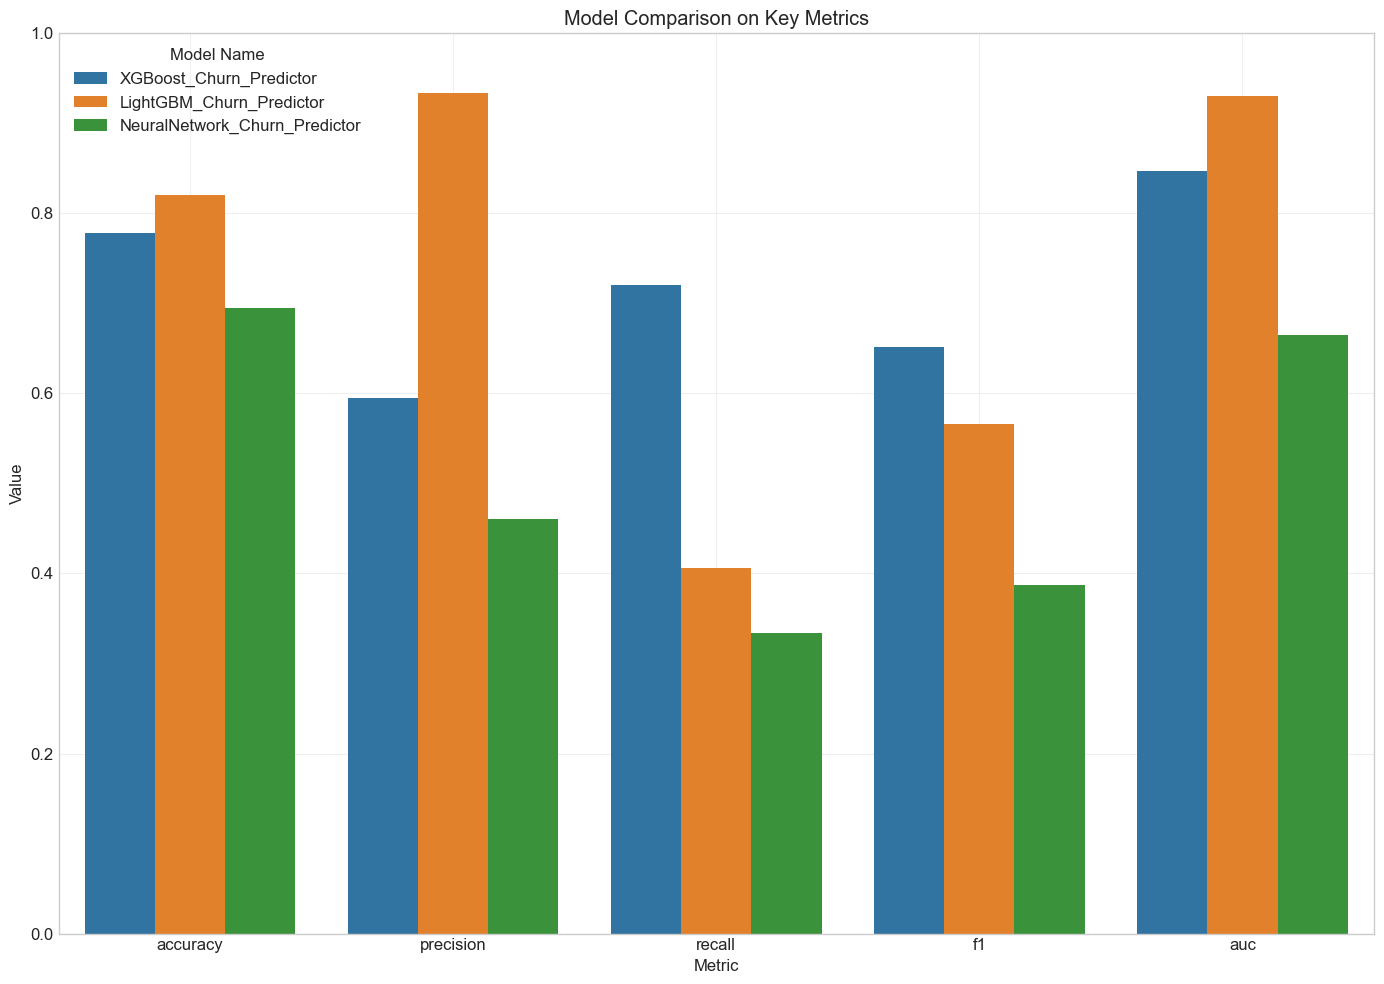

In [8]:
# Compare all models
trainers = [xgb_trainer, lgb_trainer, nn_trainer]
comparison_df = compare_models(
    trainers=trainers,
    X=X_val,
    y=y_val,
    test_size=0.0,  # Use the entire validation set
    metrics=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    plot=True,
    figsize=(14, 10)
)

In [9]:
# Determine the best model based on F1 score
best_model_name = comparison_df.loc['f1'].idxmax()
print(f"Best model based on F1 score: {best_model_name}")

# Get the corresponding trainer
if best_model_name == 'XGBoost_Churn_Predictor':
    best_trainer = xgb_trainer
elif best_model_name == 'LightGBM_Churn_Predictor':
    best_trainer = lgb_trainer
else:
    best_trainer = nn_trainer

Best model based on F1 score: XGBoost_Churn_Predictor


## 8. Evaluate on Holdout Set

Now we'll evaluate the best model on the holdout set. First, we need to align the features between the training and holdout sets.

In [10]:
# Check for feature differences
train_features = set(X_train.columns)
holdout_features = set(X_holdout.columns)

print(f"Number of features in training set: {len(train_features)}")
print(f"Number of features in holdout set: {len(holdout_features)}")
print(f"Features in training but not in holdout: {train_features - holdout_features}")
print(f"Features in holdout but not in training: {holdout_features - train_features}")

Number of features in training set: 822
Number of features in holdout set: 822
Features in training but not in holdout: set()
Features in holdout but not in training: set()


In [11]:
# Align the holdout features with the training features
X_holdout_aligned = align_features(X_train, X_holdout)

# Verify the alignment
print(f"Aligned holdout set shape: {X_holdout_aligned.shape}")
print(f"Features match training set: {list(X_train.columns) == list(X_holdout_aligned.columns)}")

Aligned holdout set shape: (20000, 822)
Features match training set: True


2025-03-19 21:18:27,056 - training_pipeline - INFO - Evaluating XGBoost_Churn_Predictor...


Using optimal threshold: 0.4500


2025-03-19 21:18:27,146 - training_pipeline - WARNING - Only one class present in y_test. ROC AUC and Average Precision are not defined.


2025-03-19 21:18:27,147 - training_pipeline - INFO - Evaluation metrics: {'accuracy': 0.54395, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'threshold': 0.45, 'auc': None, 'average_precision': None}


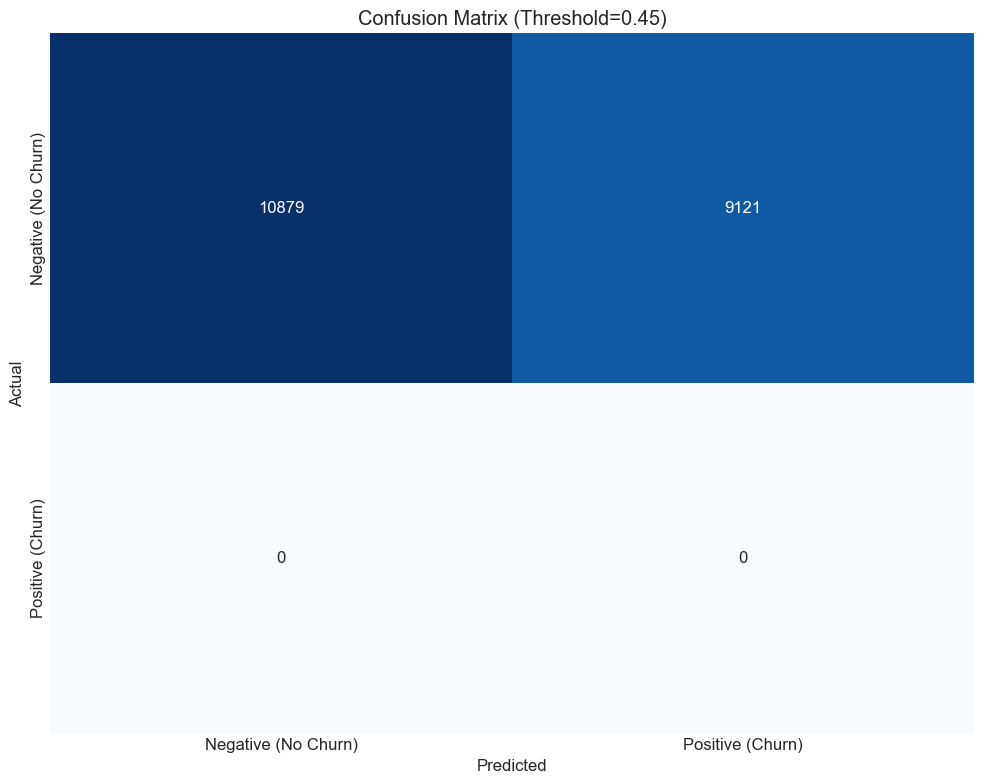

2025-03-19 21:18:27,347 - training_pipeline - INFO - Classification Report:
              precision    recall  f1-score      support
0               1.00000  0.543950  0.704621  20000.00000
1               0.00000  0.000000  0.000000      0.00000
accuracy        0.54395  0.543950  0.543950      0.54395
macro avg       0.50000  0.271975  0.352311  20000.00000
weighted avg    1.00000  0.543950  0.704621  20000.00000


2025-03-19 21:18:27,349 - training_pipeline - WARNING - Only one class present in y_test. ROC curve cannot be computed.


2025-03-19 21:18:27,349 - training_pipeline - WARNING - Only one class present in y_test. Precision-Recall curve cannot be computed.


In [12]:
# Evaluate the best model on the holdout set
if y_holdout is not None:
    # Get the optimal threshold from validation
    optimal_threshold = best_trainer.training_history.get('optimal_threshold', {}).get('value', 0.5)

    print(f"Using optimal threshold: {optimal_threshold:.4f}")

    # Evaluate on holdout set
    holdout_metrics = best_trainer.evaluate_model(X_holdout_aligned, y_holdout, threshold=optimal_threshold)

    # Plot confusion matrix
    best_trainer.plot_confusion_matrix(X_holdout_aligned, y_holdout, threshold=optimal_threshold)

    # Plot ROC curve
    best_trainer.plot_roc_curve(X_holdout_aligned, y_holdout)

    # Plot Precision-Recall curve
    best_trainer.plot_precision_recall_curve(X_holdout_aligned, y_holdout)
else:
    print("Holdout set does not have target labels for evaluation.")

## 9. Save the Best Model for Deployment

In [13]:
# Save the best model for deployment
best_model_path = best_trainer.model.save_model(model_dir='../models/deployment')
print(f"Best model saved to: {best_model_path}")

# Save the optimal threshold
import json
threshold_info = {
    'model_name': best_trainer.model.model_name,
    'optimal_threshold': optimal_threshold,
    'metrics': holdout_metrics
}

with open(f"../models/deployment/{best_trainer.model.model_name}_threshold.json", 'w') as f:
    json.dump(threshold_info, f, indent=4)

print(f"Threshold information saved to: ../models/deployment/{best_trainer.model.model_name}_threshold.json")

Model saved to ../models/deployment\XGBoost_Churn_Predictor.joblib
Best model saved to: ../models/deployment\XGBoost_Churn_Predictor.joblib
Threshold information saved to: ../models/deployment/XGBoost_Churn_Predictor_threshold.json
